In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# General Data Exploration

In [4]:
doc2vec25_data = pd.read_pickle('documentvec.pkl')

In [5]:
doc2vec25_data.head()

index  year  caseid  opinion_type  judge_name  decision       date  \
0   2304  1993  X35807  contentMajOp  PER CURIAM  affirmed 1993-08-04   
1   2796  1992  X3AD9D  contentMajOp       LOGAN  affirmed 1992-11-13   
2   2805  1992  X3ADTB  contentMajOp       LOGAN  reversed 1992-12-29   
3   2814  1997  X37GPR  contentMajOp      JOHN C  affirmed 1997-02-11   
4   2816  1999  X4QAM7  contentMajOp    HOLLOWAY  affirmed 1999-01-04   

     Author  Affirmed  AffirmedInPart    ...           16        17        18  \
0                 1.0             0.0    ...    -0.015896  0.061231 -0.126908   
1     LOGAN       1.0             0.0    ...    -0.644557  1.343933 -0.374269   
2     LOGAN       0.0             0.0    ...     0.004175  1.354613 -0.505990   
3  PORFILIO       1.0             0.0    ...    -0.137829  1.081693 -0.326547   
4  HOLLOWAY       1.0             0.0    ...    -0.450902  3.696071 -2.333135   

         19        20        21        22        23        24        25  
0 -0.002955  0.213550 -0.131750  0.228531  0.042944 -0.171523  0.067503  
1  1.679431  0.029173 -1.362654  1.248829  0.541124 -0.957147 -0.719336  
2  1.299452  0.829362 -1.393812  0.731786  0.097624 -0.681422  0.108787  
3  1.383826  0.039796 -1.208854  0.476434  0.370994 -0.581173 -0.224242  
4  4.640374  0.820736 -3.130388  1.930407  0.186511 -0.921918 -3.437350  

[5 rows x 285 columns]

In [6]:
doc2vec25_data.columns.values

array(['index', 'year', 'caseid', 'opinion_type', 'judge_name',
       'decision', 'date', 'Author', 'Affirmed', 'AffirmedInPart',
       'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart',
       'Circuit', 'judgeid1', 'judgeid2', 'judgeid3', 'x_dem_x',
       'x_republican_x', 'x_instate_ba_x', 'x_elev_x', 'x_unity_x',
       'x_aba_x', 'x_crossa_x', 'x_pfedjdge_x', 'x_pindreg1_x',
       'x_plawprof_x', 'x_pscab_x', 'x_pcab_x', 'x_pusa_x',
       'x_pssenate_x', 'x_paag_x', 'x_psp_x', 'x_pslc_x', 'x_pssc_x',
       'x_pshouse_x', 'x_psg_x', 'x_psgo_x', 'x_psenate_x', 'x_psatty_x',
       'x_pprivate_x', 'x_pmayor_x', 'x_plocct_x', 'x_phouse_x',
       'x_pgov_x', 'x_pda_x', 'x_pcc_x', 'x_pccoun_x', 'x_pausa_x',
       'x_pasatty_x', 'x_pag_x', 'x_pada_x', 'x_pgovt_x', 'x_llm_sjd_x',
       'x_protestant_x', 'x_evangelical_x', 'x_mainline_x',
       'x_noreligion_x', 'x_catholic_x', 'x_jewish_x', 'x_black_x',
       'x_nonwhite_x', 'x_female_x', 'x_jd_public_x', 'x_ba_public_x'

In [7]:
#doc2vec 10:

In [8]:
doc2vec10_data = pd.read_pickle('documentvec10.pkl')

In [9]:
doc2vec10_data.head()

index  year  caseid  opinion_type  judge_name  decision       date  \
0   2304  1993  X35807  contentMajOp  PER CURIAM  affirmed 1993-08-04   
1   2796  1992  X3AD9D  contentMajOp       LOGAN  affirmed 1992-11-13   
2   2805  1992  X3ADTB  contentMajOp       LOGAN  reversed 1992-12-29   
3   2814  1997  X37GPR  contentMajOp      JOHN C  affirmed 1997-02-11   
4   2816  1999  X4QAM7  contentMajOp    HOLLOWAY  affirmed 1999-01-04   

     Author  Affirmed  AffirmedInPart    ...            1         2         3  \
0                 1.0             0.0    ...    -0.182661  0.139385  0.056974   
1     LOGAN       1.0             0.0    ...     0.644300  1.338564 -0.137683   
2     LOGAN       0.0             0.0    ...     0.175842  1.442408  0.064712   
3  PORFILIO       1.0             0.0    ...     0.199542  0.792197  0.337556   
4  HOLLOWAY       1.0             0.0    ...     3.031099  5.072269 -1.254424   

          4         5         6         7         8         9        10  
0  0.108285 -0.040595  0.107841 -0.179712  0.202334 -0.127400 -0.096071  
1 -0.042596 -0.022399 -0.158822  1.472183 -0.095168 -1.752346  0.532028  
2  0.171689  0.400354 -0.043951  1.224744  0.102581 -1.751274  0.369089  
3 -0.409457  0.276247 -0.573847  1.458445 -0.080440 -2.104647  1.003248  
4  0.058288  0.552829 -1.181539  2.966521 -1.068622 -4.255784  2.675666  

[5 rows x 270 columns]

In [10]:
doc2vec10_data.columns.values

array(['index', 'year', 'caseid', 'opinion_type', 'judge_name',
       'decision', 'date', 'Author', 'Affirmed', 'AffirmedInPart',
       'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart',
       'Circuit', 'judgeid1', 'judgeid2', 'judgeid3', 'x_dem_x',
       'x_republican_x', 'x_instate_ba_x', 'x_elev_x', 'x_unity_x',
       'x_aba_x', 'x_crossa_x', 'x_pfedjdge_x', 'x_pindreg1_x',
       'x_plawprof_x', 'x_pscab_x', 'x_pcab_x', 'x_pusa_x',
       'x_pssenate_x', 'x_paag_x', 'x_psp_x', 'x_pslc_x', 'x_pssc_x',
       'x_pshouse_x', 'x_psg_x', 'x_psgo_x', 'x_psenate_x', 'x_psatty_x',
       'x_pprivate_x', 'x_pmayor_x', 'x_plocct_x', 'x_phouse_x',
       'x_pgov_x', 'x_pda_x', 'x_pcc_x', 'x_pccoun_x', 'x_pausa_x',
       'x_pasatty_x', 'x_pag_x', 'x_pada_x', 'x_pgovt_x', 'x_llm_sjd_x',
       'x_protestant_x', 'x_evangelical_x', 'x_mainline_x',
       'x_noreligion_x', 'x_catholic_x', 'x_jewish_x', 'x_black_x',
       'x_nonwhite_x', 'x_female_x', 'x_jd_public_x', 'x_ba_public_x'

In [11]:
data = pd.read_csv("cc_merged_0429.csv",sep='\t',engine='python')

In [12]:
data.head(5)

Unnamed: 0  index  year  caseid  opinion_type  judge_name  decision  \
0           0   2304  1993  X35807  contentMajOp  PER CURIAM  affirmed   
1           1   2796  1992  X3AD9D  contentMajOp       LOGAN  affirmed   
2           2   2805  1992  X3ADTB  contentMajOp       LOGAN  reversed   
3           3   2814  1997  X37GPR  contentMajOp      JOHN C  affirmed   
4           4   2816  1999  X4QAM7  contentMajOp    HOLLOWAY  affirmed   

         date    Author  Affirmed      ...        month_3m_b   month_3_b  \
0  1993-08-04       NaN       1.0      ...        1993-05-04  1993-05-04   
1  1992-11-13     LOGAN       1.0      ...        1992-08-13  1992-08-13   
2  1992-12-29     LOGAN       0.0      ...        1992-09-29  1992-09-29   
3  1997-02-11  PORFILIO       1.0      ...        1996-11-11  1996-11-11   
4  1999-01-04  HOLLOWAY       1.0      ...        1998-10-04  1998-10-04   

   length_3m_dif                                                txt   x_dem_p  \
0      -1.099144   per curiam: charo appeals his sentence for co...  0.292902   
1       1.663181   logan , circuit judge. the only issue in this...  0.328425   
2      -3.563471   logan , circuit judge. defendant bernard d. r...  0.328425   
3       0.760434   john c. porfilio , circuit judge. defendant b...  0.360773   
4      -0.630426   holloway , circuit judge. mr. unser brings th...  0.411135   

   length_3m_af  length_3m_be  length_be_dm  length_af_dm  length_dif_dm  
0     49.758998     50.858142     -3.877441     -4.976585      -1.099144  
1     52.334119     50.670939     -5.166051     -3.502871       1.663181  
2     50.282495     53.845966     -1.991025     -5.554496      -3.563471  
3     51.570342     50.809909     -5.027082     -4.266648       0.760434  
4     59.568882     60.199308      4.362317      3.731892      -0.630426  

[5 rows x 261 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8434 entries, 0 to 8433
Columns: 261 entries, Unnamed: 0 to length_dif_dm
dtypes: float64(216), int64(19), object(26)
memory usage: 16.8+ MB


In [14]:
data.columns.values

array(['Unnamed: 0', 'index', 'year', 'caseid', 'opinion_type',
       'judge_name', 'decision', 'date', 'Author', 'Affirmed',
       'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated',
       'VacatedInPart', 'Circuit', 'judgeid1', 'judgeid2', 'judgeid3',
       'x_dem_x', 'x_republican_x', 'x_instate_ba_x', 'x_elev_x',
       'x_unity_x', 'x_aba_x', 'x_crossa_x', 'x_pfedjdge_x',
       'x_pindreg1_x', 'x_plawprof_x', 'x_pscab_x', 'x_pcab_x',
       'x_pusa_x', 'x_pssenate_x', 'x_paag_x', 'x_psp_x', 'x_pslc_x',
       'x_pssc_x', 'x_pshouse_x', 'x_psg_x', 'x_psgo_x', 'x_psenate_x',
       'x_psatty_x', 'x_pprivate_x', 'x_pmayor_x', 'x_plocct_x',
       'x_phouse_x', 'x_pgov_x', 'x_pda_x', 'x_pcc_x', 'x_pccoun_x',
       'x_pausa_x', 'x_pasatty_x', 'x_pag_x', 'x_pada_x', 'x_pgovt_x',
       'x_llm_sjd_x', 'x_protestant_x', 'x_evangelical_x', 'x_mainline_x',
       'x_noreligion_x', 'x_catholic_x', 'x_jewish_x', 'x_black_x',
       'x_nonwhite_x', 'x_female_x', 'x_jd_public_x', '

In [15]:
data_use = data[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','txt','length_3m_dif']]

In [16]:
data_use.head(5)

index  Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  \
0   2304       1.0             0.0       0.0             0.0      0.0   
1   2796       1.0             0.0       0.0             0.0      0.0   
2   2805       0.0             0.0       1.0             0.0      0.0   
3   2814       1.0             0.0       0.0             0.0      0.0   
4   2816       1.0             0.0       0.0             0.0      0.0   

   VacatedInPart                                                txt  \
0            0.0   per curiam: charo appeals his sentence for co...   
1            0.0   logan , circuit judge. the only issue in this...   
2            0.0   logan , circuit judge. defendant bernard d. r...   
3            0.0   john c. porfilio , circuit judge. defendant b...   
4            0.0   holloway , circuit judge. mr. unser brings th...   

   length_3m_dif  
0      -1.099144  
1       1.663181  
2      -3.563471  
3       0.760434  
4      -0.630426

In [17]:
data_use['txt'].iloc[0]

' per curiam: charo appeals his sentence for conspiracy to possess with intent to distribute cocaine and money laundering. he maintains that the district court erred in refusing to grant him a two-level reduction for acceptance of responsibility under u.s.s.g. 3e1.1(a) . he contends that he manifested acceptance of responsibility by admitting his involvement in the offense, showing remorse, and cooperating with law enforcement officials. the government responds that the district court\'s finding that charo had not accepted responsibility for the offense conduct was not clearly erroneous. the sentencing court\'s determination that a defendant is not entitled to a reduction for acceptance of responsibility is entitled to great deference and will not be overturned unless it is clearly erroneous. united states v. spraggins , 868 f.2d 1541, 1543 (11th cir.1989). section 3e1.1(a) requires a sentencing court to reduce the offense level by two levels "if the defendant clearly demonstrates a re

In [18]:
#all the following steps are using the same train test split
#train test split:

In [19]:
from sklearn.cross_validation import train_test_split
from numpy.random import RandomState

RS1 = RandomState(1)
train_data = data_use.sample(frac = 0.75, random_state = 200)
test_data = data_use.drop(train_data.index)

print(train_data.shape)
print(test_data.shape)

(6326, 9)
(2108, 9)


/Users/zhe/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
#save the train test split data
train_data.to_csv("train_data.csv", sep=',')
test_data.to_csv("test_data.csv", sep=',')

In [19]:
#each time load the data to avoid confusion
train_data = pd.read_csv("train_data.csv", sep=',')
test_data = pd.read_csv("test_data.csv", sep=',')

In [20]:
#features and labels
x_train = train_data['txt']
x_test = test_data['txt']
Y_train = train_data['length_3m_dif']
Y_test = test_data['length_3m_dif']

In [16]:
# tokenize the text using tfidf and count vectorizer, select the vectorizer
# that perform better for our task

In [26]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer_1gram = CountVectorizer(stop_words = 'english', binary = False)
count_vectorizer_2gram = CountVectorizer(stop_words = 'english', ngram_range = (1,2) , binary = False)
tfid_vectorizer_1gram = TfidfVectorizer(stop_words = 'english', binary = False)
tfid_vectorizer_2gram = TfidfVectorizer(stop_words = 'english', ngram_range= (1,2), binary = False)

count_vectorizer_1gram.fit(x_train)
count_vectorizer_2gram.fit(x_train)

tfid_vectorizer_1gram.fit(x_train)
tfid_vectorizer_2gram.fit(x_train)


#count_vectorizer
count_train_1gram = count_vectorizer_1gram.transform(x_train)
count_test_1gram = count_vectorizer_1gram.transform(x_test)

count_train_2gram = count_vectorizer_2gram.transform(x_train)
count_test_2gram = count_vectorizer_2gram.transform(x_test)

#tfid_vectorizer
tf_train_1gram = tfid_vectorizer_1gram.transform(x_train)
tf_test_1gram = tfid_vectorizer_1gram.transform(x_test)

tf_train_2gram = tfid_vectorizer_2gram.transform(x_train)
tf_test_2gram = tfid_vectorizer_2gram.transform(x_test)

CPU times: user 2min 48s, sys: 2.44 s, total: 2min 51s
Wall time: 2min 51s


In [27]:
#no need to rerun
#save the tfidf result
with open("tf_train_2gram.pkl", 'wb') as handle:
                    pickle.dump(tf_train_2gram, handle)
with open("tf_test_2gram.pkl", 'wb') as handle:
                    pickle.dump(tf_test_2gram, handle)

In [21]:
#load the content
tf_train_2gram = pickle.load(open("tf_train_2gram.pkl", "rb" ) )
tf_test_2gram = pickle.load(open("tf_test_2gram.pkl", "rb" ) )

In [22]:
tf_train_2gram

<6326x3168803 sparse matrix of type '<class 'numpy.float64'>'
	with 11233810 stored elements in Compressed Sparse Row format>

In [23]:
tf_test_2gram

<2108x3168803 sparse matrix of type '<class 'numpy.float64'>'
	with 2998867 stored elements in Compressed Sparse Row format>

In [19]:
#count 1 gram:

In [26]:
lr_base_count_1gram = linear_model.LinearRegression()
lr_base_count_1gram.fit(count_train_1gram, Y_train)
lr_base_count_1gram_pred = lr_base_count_1gram.predict(count_test_1gram)
count_1gram_base_mae = mean_absolute_error(Y_test, lr_base_count_1gram_pred)

In [27]:
count_1gram_base_mae

2.699640865752485

In [18]:
count_1gram_base_mae_r2 = r2_score(Y_test, lr_base_count_1gram_pred)

In [19]:
count_1gram_base_mae_r2

-2.8035214992717261

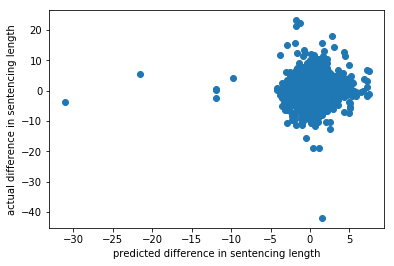

In [268]:
plt.scatter(Y_test,lr_base_count_1gram_pred)
plt.xlabel('predicted difference in sentencing length')
plt.ylabel('actual difference in sentencing length')
plt.show()

In [21]:
#count 2 gram:

In [22]:
lr_base_count_2gram = linear_model.LinearRegression()
lr_base_count_2gram.fit(count_train_2gram, Y_train)
lr_base_count_2gram_pred = lr_base_count_2gram.predict(count_test_2gram)
count_2gram_base_mae = mean_absolute_error(Y_test, lr_base_count_2gram_pred)

In [23]:
count_2gram_base_mae

1.7585600238429082

In [24]:
count_2gram_base_mae_r2 = r2_score(Y_test, lr_base_count_2gram_pred)

In [25]:
count_2gram_base_mae_r2

-0.53133179890467885

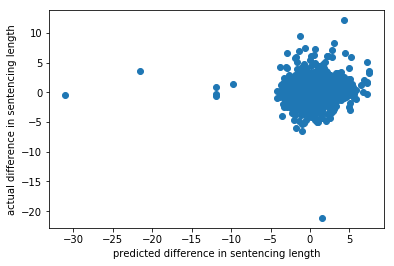

In [267]:
plt.scatter(Y_test,lr_base_count_2gram_pred)
plt.xlabel('predicted difference in sentencing length')
plt.ylabel('actual difference in sentencing length')
plt.show()

In [27]:
# tfidf 1 gram:

In [28]:
lr_base_tfidf_1gram = linear_model.LinearRegression()
lr_base_tfidf_1gram.fit(tf_train_1gram, Y_train)
lr_base_tfidf_1gram_pred = lr_base_tfidf_1gram.predict(tf_test_1gram)
tfidf_1gram_base_mae = mean_absolute_error(Y_test, lr_base_tfidf_1gram_pred)

In [29]:
tfidf_1gram_base_mae

1.7085882973015794

In [30]:
tfidf_1gram_base_mae_r2 = r2_score(Y_test, lr_base_tfidf_1gram_pred)

In [31]:
tfidf_1gram_base_mae_r2

-0.37162225423885853

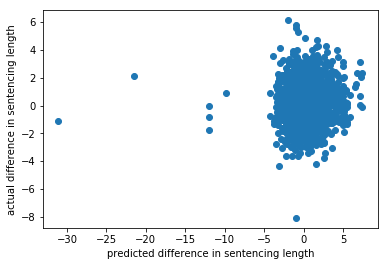

In [269]:
plt.scatter(Y_test,lr_base_tfidf_1gram_pred)
plt.xlabel('predicted difference in sentencing length')
plt.ylabel('actual difference in sentencing length')
plt.show()

In [33]:
# tfidf 2 gram:

In [34]:
lr_base_tfidf_2gram = linear_model.LinearRegression()
lr_base_tfidf_2gram.fit(tf_train_2gram, Y_train)
lr_base_tfidf_2gram_pred = lr_base_tfidf_2gram.predict(tf_test_2gram)
tfidf_2gram_base_mae = mean_absolute_error(Y_test, lr_base_tfidf_2gram_pred)

In [35]:
tfidf_2gram_base_mae

1.4516721052128747

In [36]:
tfidf_2gram_base_mae_r2 = r2_score(Y_test, lr_base_tfidf_2gram_pred)

In [37]:
tfidf_2gram_base_mae_r2

-0.072263646659945113

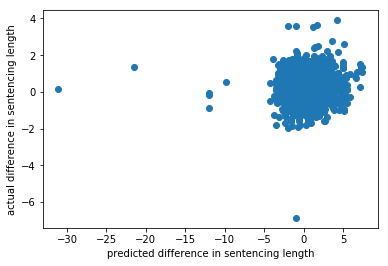

In [270]:
plt.scatter(Y_test,lr_base_tfidf_2gram_pred)
plt.xlabel('predicted difference in sentencing length')
plt.ylabel('actual difference in sentencing length')
plt.show()

# fitting the text feature combined with the reversed/affirm decision into a neural network. To see how our data perform in a deep nerual net model.

In [31]:
#80 dimension:

In [32]:
#select the final number of component based on explained_variancde 
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix

svd = TruncatedSVD(n_components=80, n_iter=7, random_state=42)
svd.fit(tf_train_2gram)  

svd_80_train = svd.transform(tf_train_2gram)
svd_80_test = svd.transform(tf_test_2gram)
print(svd.explained_variance_ratio_)  

print(svd.explained_variance_ratio_.sum())  

[0.00246613 0.00466438 0.0033177  0.00273369 0.00263453 0.00247129
 0.00233313 0.00209636 0.00202032 0.00186841 0.00175678 0.00169007
 0.00149295 0.00147398 0.00146348 0.00139788 0.00136532 0.00135417
 0.0013412  0.00131931 0.00126959 0.00121461 0.00120349 0.0011521
 0.00113406 0.00112939 0.00111907 0.00110137 0.0010816  0.00104323
 0.00103074 0.00099091 0.00097298 0.00094979 0.00094327 0.00093012
 0.00092094 0.00090753 0.00088763 0.00087595 0.00086402 0.00086237
 0.00084706 0.00083933 0.00082278 0.00081538 0.00080988 0.00080583
 0.00079532 0.00079216 0.00077237 0.00076855 0.00076194 0.00076138
 0.0007418  0.00073655 0.00073447 0.00072773 0.00072099 0.00070834
 0.00070705 0.00069969 0.00069347 0.00068781 0.0006811  0.00067255
 0.00066227 0.00065802 0.00064985 0.00064482 0.00064278 0.00063622
 0.00062344 0.000613   0.00061101 0.00060383 0.00059877 0.0005929
 0.00058696 0.00058051]
0.09065367813358854


In [34]:
#################
##dataframe approach

In [54]:
svd_80_train_df = pd.DataFrame(data = svd_80_train, index=train_data.index)

In [55]:
svd_80_test_df = pd.DataFrame(data = svd_80_test, index = test_data.index)

In [56]:
svd_80_train_df[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']] = train_data[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']]
svd_80_test_df[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']] = test_data[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']]


In [57]:
svd_80_train_df.head()

0         1         2         3         4         5         6  \
0  0.136688 -0.040999 -0.004375 -0.007436 -0.006002 -0.034239  0.046198   
1  0.100533  0.021049  0.007305  0.001948  0.001179 -0.019895 -0.008439   
2  0.157620 -0.026298 -0.043520 -0.057402 -0.039799  0.026700  0.008013   
3  0.141970 -0.026448 -0.080584 -0.054681 -0.016293  0.081749 -0.037343   
4  0.143912 -0.047580  0.005257 -0.058490  0.036348 -0.016142  0.052118   

          7         8         9      ...              78        79  index  \
0 -0.008634 -0.008428  0.013910      ...        0.033283  0.000926  35638   
1  0.018857 -0.024885 -0.014900      ...        0.003150 -0.004419  24468   
2 -0.012378 -0.011192 -0.021375      ...       -0.004125  0.002743  39230   
3  0.017813 -0.010692 -0.000912      ...        0.060335 -0.017806  22883   
4 -0.038125 -0.005855  0.016747      ...        0.000847 -0.002067  16551   

   Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  VacatedInPart  \
0       0.0             0.0       0.0             1.0      0.0            0.0   
1       1.0             0.0       0.0             0.0      0.0            0.0   
2       1.0             0.0       0.0             0.0      0.0            0.0   
3       1.0             0.0       0.0             0.0      0.0            0.0   
4       0.0             0.0       0.0             0.0      0.0            0.0   

   length_3m_dif  
0      -0.766357  
1       0.608711  
2       0.228592  
3      -3.150298  
4      -2.467751  

[5 rows x 88 columns]

In [58]:
svd_80_test_df.head()

0         1         2         3         4         5         6  \
0  0.119560 -0.025109  0.006438 -0.007404  0.016002 -0.019776  0.026109   
1  0.225139 -0.005882 -0.016542 -0.041020  0.020823 -0.080195 -0.008058   
2  0.335446 -0.088022 -0.039261 -0.161905 -0.059537  0.038900  0.040520   
3  0.099370 -0.008746  0.038461  0.022873  0.025342 -0.033024  0.035557   
4  0.248678 -0.052280 -0.046642 -0.072317 -0.028221  0.027054  0.023326   

          7         8         9      ...              78        79  index  \
0 -0.022353 -0.004703  0.016800      ...        0.009664 -0.000136   2805   
1  0.229446  0.192719 -0.001701      ...        0.024659 -0.018850   2817   
2  0.014652 -0.039186 -0.038314      ...       -0.006725  0.027584   3065   
3 -0.004343 -0.004816  0.044422      ...        0.001024  0.012109   3392   
4  0.031732 -0.029729 -0.031930      ...        0.002573 -0.002373   3498   

   Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  VacatedInPart  \
0       0.0             0.0       1.0             0.0      0.0            0.0   
1       1.0             0.0       0.0             0.0      0.0            0.0   
2       1.0             0.0       0.0             0.0      0.0            0.0   
3       1.0             0.0       0.0             0.0      0.0            0.0   
4       1.0             0.0       0.0             0.0      0.0            0.0   

   length_3m_dif  
0      -3.563471  
1       3.591201  
2       0.959357  
3      -1.595323  
4      -2.045180  

[5 rows x 88 columns]

In [59]:
svd_80_train_df['res']=svd_80_train_df['Affirmed']+svd_80_train_df['AffirmedInPart']+svd_80_train_df['Reversed']+svd_80_train_df['ReversedInPart']+svd_80_train_df['Vacated']+svd_80_train_df['VacatedInPart']
svd_80_test_df['res']=svd_80_test_df['Affirmed']+svd_80_test_df['AffirmedInPart']+svd_80_test_df['Reversed']+svd_80_test_df['ReversedInPart']+svd_80_test_df['Vacated']+svd_80_test_df['VacatedInPart']

In [60]:
#keep only row with res ==1
svd_80_train_df=svd_80_train_df[svd_80_train_df['res']==1]
svd_80_test_df=svd_80_test_df[svd_80_test_df['res']==1]

In [61]:
def combine_reverse(row):
    if row['Reversed']==1:
        return 2
    
    elif row['Vacated']==1:
        return 2
    
    elif row['Affirmed']==1:
        return 1

In [62]:
svd_80_train_df['Res_binary'] = svd_80_train_df.apply(combine_reverse, axis=1)
svd_80_test_df['Res_binary'] = svd_80_test_df.apply(combine_reverse, axis=1)

In [63]:
svd_80_train_df=svd_80_train_df[(svd_80_train_df['Res_binary']==1) | (svd_80_train_df['Res_binary']==2)]
svd_80_test_df=svd_80_test_df[(svd_80_test_df['Res_binary']==1) | (svd_80_test_df['Res_binary']==2)]

In [64]:
svd_80_train_df= svd_80_train_df.drop(['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','res'],axis=1)
svd_80_test_df= svd_80_test_df.drop(['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','res'],axis=1)

In [51]:
#slicing is a view not a copy, change the view change original dataframe
#svd_80_train_nn_df = svd_80_train_df.iloc[:,:]
#svd_80_test_nn_df = svd_80_test_df.iloc[:,:]

In [65]:
svd_80_train_df['y'] = svd_80_train_df['length_3m_dif']
svd_80_test_df['y'] = svd_80_test_df['length_3m_dif']

In [66]:
svd_80_train_df.drop(['length_3m_dif','index'],axis=1, inplace=True)
svd_80_test_df.drop(['length_3m_dif','index'],axis=1,inplace=True)

In [67]:
svd_80_train_df.head()

0         1         2         3         4         5         6  \
1  0.100533  0.021049  0.007305  0.001948  0.001179 -0.019895 -0.008439   
2  0.157620 -0.026298 -0.043520 -0.057402 -0.039799  0.026700  0.008013   
3  0.141970 -0.026448 -0.080584 -0.054681 -0.016293  0.081749 -0.037343   
5  0.190061  0.104727  0.008652  0.053561  0.034232  0.072467  0.050863   
6  0.228796 -0.007014  0.070923 -0.003444 -0.030451 -0.000764  0.019736   

          7         8         9    ...           72        73        74  \
1  0.018857 -0.024885 -0.014900    ...     0.007469 -0.002709  0.018256   
2 -0.012378 -0.011192 -0.021375    ...     0.003264  0.016863 -0.008680   
3  0.017813 -0.010692 -0.000912    ...     0.018319  0.009916  0.033197   
5 -0.012928 -0.008381  0.014233    ...     0.030851 -0.009701  0.009954   
6 -0.031986 -0.012740  0.044786    ...     0.029470 -0.000433  0.028144   

         75        76        77        78        79  Res_binary         y  
1  0.000921 -0.016751 -0.000313  0.003150 -0.004419         1.0  0.608711  
2  0.017289 -0.012610 -0.027626 -0.004125  0.002743         1.0  0.228592  
3 -0.019105  0.019378  0.109131  0.060335 -0.017806         1.0 -3.150298  
5 -0.044379 -0.006101 -0.011122 -0.019106 -0.000104         1.0 -1.195514  
6 -0.002859  0.019277 -0.010504  0.002817 -0.016495         2.0 -0.082692  

[5 rows x 82 columns]

In [68]:
#save the data (after dimension reduction)
svd_80_train_df.to_csv("svd_80_train_df.csv", sep=',')
svd_80_test_df.to_csv("svd_80_test_df.csv", sep=',')

In [16]:
#load the data to avoid confusion
svd_80_train_df = pd.read_csv("svd_80_train_df.csv", sep=',')
svd_80_test_df = pd.read_csv("svd_80_test_df.csv", sep=',')

In [17]:
svd_80_train_df

Unnamed: 0         0         1         2         3         4         5  \
0              1  0.100533  0.021049  0.007305  0.001948  0.001179 -0.019895   
1              2  0.157620 -0.026298 -0.043520 -0.057402 -0.039799  0.026700   
2              3  0.141970 -0.026448 -0.080584 -0.054681 -0.016293  0.081749   
3              5  0.190061  0.104727  0.008652  0.053561  0.034232  0.072467   
4              6  0.228796 -0.007014  0.070923 -0.003444 -0.030451 -0.000764   
5              7  0.144139  0.128313 -0.015371  0.029075 -0.019189 -0.068175   
6              8  0.095873 -0.019261  0.031074 -0.017900  0.007718 -0.023413   
7              9  0.195317  0.067205  0.000734  0.048019  0.072217  0.043359   
8             10  0.150863 -0.070331 -0.008770 -0.027240 -0.048602 -0.031284   
9             12  0.121016 -0.015463 -0.021101 -0.043039  0.038102  0.030395   
10            13  0.192685 -0.079692 -0.010976 -0.043918  0.003020 -0.011606   
11            14  0.078289 -0.006438  0.073342  0.056635  0.032931  0.058917   
12            15  0.219425 -0.012205  0.059353 -0.049863 -0.019195 -0.069487   
13            16  0.127055 -0.019013  0.118781  0.054853  0.019987  0.042690   
14            17  0.099552 -0.028892  0.015528 -0.051345 -0.017393  0.032032   
15            19  0.133894  0.063301 -0.070460 -0.013220 -0.029290  0.049852   
16            20  0.155718 -0.111228 -0.120305  0.155237 -0.054127 -0.000899   
17            22  0.166352 -0.039814 -0.113195  0.065394 -0.062233  0.074337   
18            23  0.048166 -0.007195  0.012581 -0.007364  0.022536 -0.003720   
19            24  0.156574  0.079739  0.038049  0.008960 -0.038234  0.006534   
20            25  0.133434 -0.052769 -0.025043 -0.065400 -0.022372  0.026441   
21            26  0.095227 -0.062701 -0.040025  0.088440 -0.033644 -0.010209   
22            27  0.131985 -0.026506  0.025754  0.001737  0.038123 -0.013229   
23            28  0.206417  0.045811  0.030511  0.019107  0.074435  0.067970   
24            29  0.075323 -0.023357  0.000669 -0.010337  0.014655 -0.013482   
25            30  0.139106  0.043822 -0.021138 -0.001695 -0.010085  0.014545   
26            31  0.143460 -0.017018 -0.030724  0.050332  0.006545 -0.042576   
27            32  0.134029 -0.010522  0.203619  0.078687  0.039703  0.071488   
28            34  0.225110 -0.073467  0.185777 -0.015088 -0.072543  0.011396   
29            35  0.200990  0.043904  0.074057 -0.019388 -0.130346 -0.010877   
...          ...       ...       ...       ...       ...       ...       ...   
5503        6287  0.150534 -0.015949 -0.022612 -0.033062 -0.028675  0.003069   
5504        6288  0.145553 -0.040859 -0.008375 -0.022534  0.036042 -0.048114   
5505        6291  0.229772 -0.026551  0.012175 -0.037859  0.043613 -0.039462   
5506        6293  0.263038  0.057229 -0.069019 -0.047101 -0.090173 -0.037458   
5507        6294  0.119530 -0.067560 -0.067543  0.055900 -0.041115  0.008681   
5508        6295  0.171899  0.061994  0.059988  0.010991 -0.085747 -0.043814   
5509        6296  0.100591 -0.016462  0.031444 -0.009137  0.026286 -0.061675   
5510        6297  0.207419  0.050917 -0.029363 -0.007535 -0.040500 -0.007163   
5511        6299  0.170570 -0.015747  0.001329 -0.011597  0.056934  0.014344   
5512        6300  0.121275 -0.058882  0.038314 -0.009521  0.026572  0.012267   
5513        6302  0.089379 -0.061137 -0.053345  0.090525 -0.017230 -0.010795   
5514        6303  0.126746 -0.017160  0.075593  0.001232 -0.000182  0.022183   
5515        6304  0.226011 -0.100552 -0.088662  0.085863  0.125240 -0.022861   
5516        6305  0.180950 -0.019347  0.001499 -0.005292  0.088634  0.019674   
5517        6306  0.142842  0.042324 -0.004093 -0.030485  0.004498 -0.027680   
5518        6307  0.110946 -0.083216 -0.058415  0.113529 -0.040173 -0.037633   
5519        6308  0.170574  0.057503  0.028613 -0.019403 -0.070091 -0.036897   
5520        6309  0.075246 -0.041916  0.029104 -0.023082  0.007251 -0.008412   
5521  

In [25]:
#basic nn architecture:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F

#used for batch training:
import torch.utils.data as Data

In [26]:
xy_train = np.loadtxt("svd_80_train_df.csv", delimiter = ',' ,skiprows=1, dtype= np.float64 )
xy_test = np.loadtxt("svd_80_test_df.csv", delimiter = ',', skiprows =1 ,dtype = np.float64)

In [27]:
xy_train.shape

(5533, 83)

In [28]:
#########################
#########################
#prepare data 

In [29]:
x_test = torch.from_numpy(xy_test[:,1:-1])
y_test = torch.from_numpy(xy_test[:,[-1]])
x_test = Variable(x_test.float())
y_test = Variable(y_test.float())

In [30]:
x_validation = torch.from_numpy(xy_train[:1260,1:-1])
y_validation = torch.from_numpy(xy_train[:1260,[-1]])
x_train = torch.from_numpy(xy_train[1260:,1:-1])
y_train = torch.from_numpy(xy_train[1260:,[-1]])

x_train_total = torch.from_numpy(xy_train[:,1:-1])
y_train_total = torch.from_numpy(xy_train[:,[-1]])

In [31]:
#define our own nn:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden) 
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict=torch.nn.Linear(n_hidden,1) 
    #forward:
    def forward(self,x):
        x=F.relu(self.hidden(x)) 
        x=self.hidden2(x)
        x=self.predict(x) 
        return x

In [32]:
#initialize the net:
n_features = 81
net_svd80 = Net(81, 40, 1)

In [33]:
print(net_svd80)

Net (
  (hidden): Linear (81 -> 40)
  (hidden2): Linear (40 -> 40)
  (predict): Linear (40 -> 1)
)


In [34]:
optimizer=torch.optim.SGD(net_svd80.parameters(),lr=0.03)
loss_func=torch.nn.MSELoss()
loss_func_MAe=torch.nn.L1Loss()

In [35]:
#batch training:


Train_BATCH_SIZE = 200
Validate_BATCH_SIZE = 126

torch_dataset_train = Data.TensorDataset(data_tensor = x_train, target_tensor = y_train)
train_loader = Data.DataLoader(
    dataset = torch_dataset_train,
    batch_size = Train_BATCH_SIZE,
    shuffle = False,
    num_workers = 2,)

torch_dataset_validate = Data.TensorDataset(data_tensor = x_validation, target_tensor = y_validation)
validate_loader = Data.DataLoader(
    dataset = torch_dataset_validate,
    batch_size = Validate_BATCH_SIZE,
    shuffle = False,
    num_workers = 2,)

torch_dataset_train_total = Data.TensorDataset(data_tensor = x_train_total, target_tensor = y_train_total)
train_total_loader = Data.DataLoader(
    dataset = torch_dataset_train_total,
    batch_size = Train_BATCH_SIZE,
    shuffle = False,
    num_workers = 2,)


In [36]:
#training:
#train too many steps will leads to overfit
#how to determine what is the stopping criterion of the training:
#---- one solution is 
validation_loss = []

#find optimal training epoch
for epoch in range(300):
    for step, (batch_x, batch_y) in enumerate(train_loader):
        print('Epoch:', epoch, '| Step: ', step)
        
        b_x = Variable(batch_x.float())
        b_y = Variable(batch_y.float())
        
        optimizer.zero_grad()
        prediction = net_svd80(b_x)
        train_loss = loss_func(prediction, b_y)
        print('training loss is: ',train_loss.data[0])
        print('\n')

        
        train_loss.backward()
        optimizer.step()
        
        #validation loss:
        #if (step+1) % 13 ==0:
    sum_validation_loss = 0
    for s, (batch_x_validate, batch_y_validate) in enumerate(validate_loader):
        batch_x_validate = Variable(batch_x_validate.float())
        batch_y_validate = Variable(batch_y_validate.float())
        validation_output = net_svd80(batch_x_validate)
        #print(loss_func(validation_output, batch_y_validate).data[0])
        sum_validation_loss += loss_func(validation_output, batch_y_validate).data[0]
    validation_loss.append(sum_validation_loss/s+1)
    #print(s+1)
    print("validation loss is {}".format(validation_loss[-1]))
    print('\n')
    print('\n')

            

Epoch: 0 | Step:  0
training loss is:  2.8665647506713867


Epoch: 0 | Step:  1
training loss is:  3.10849666595459


Epoch: 0 | Step:  2
training loss is:  2.7247140407562256


Epoch: 0 | Step:  3
training loss is:  2.974648952484131


Epoch: 0 | Step:  4
training loss is:  3.0867490768432617


Epoch: 0 | Step:  5
training loss is:  2.6492421627044678


Epoch: 0 | Step:  6
training loss is:  3.6702890396118164


Epoch: 0 | Step:  7
training loss is:  2.73032808303833


Epoch: 0 | Step:  8
training loss is:  3.052011013031006


Epoch: 0 | Step:  9
training loss is:  3.366135597229004


Epoch: 0 | Step:  10
training loss is:  3.3708550930023193


Epoch: 0 | Step:  11
training loss is:  4.817227363586426


Epoch: 0 | Step:  12
training loss is:  3.510075092315674


Epoch: 0 | Step:  13
training loss is:  2.830120801925659


Epoch: 0 | Step:  14
training loss is:  3.4008677005767822


Epoch: 0 | Step:  15
training loss is:  3.3617007732391357


Epoch: 0 | Step:  16
training loss is:  2.97

Epoch: 6 | Step:  7
training loss is:  2.7345447540283203


Epoch: 6 | Step:  8
training loss is:  3.0728342533111572


Epoch: 6 | Step:  9
training loss is:  3.3832688331604004


Epoch: 6 | Step:  10
training loss is:  3.3450927734375


Epoch: 6 | Step:  11
training loss is:  4.833346366882324


Epoch: 6 | Step:  12
training loss is:  3.513627290725708


Epoch: 6 | Step:  13
training loss is:  2.8112375736236572


Epoch: 6 | Step:  14
training loss is:  3.411508083343506


Epoch: 6 | Step:  15
training loss is:  3.358419179916382


Epoch: 6 | Step:  16
training loss is:  2.965167760848999


Epoch: 6 | Step:  17
training loss is:  2.8192319869995117


Epoch: 6 | Step:  18
training loss is:  3.628610849380493


Epoch: 6 | Step:  19
training loss is:  3.391355037689209


Epoch: 6 | Step:  20
training loss is:  2.925116539001465


Epoch: 6 | Step:  21
training loss is:  3.0844168663024902


validation loss is 4.328237056732178




Epoch: 7 | Step:  0
training loss is:  2.8530993461608887



Epoch: 12 | Step:  8
training loss is:  3.071014642715454


Epoch: 12 | Step:  9
training loss is:  3.3834311962127686


Epoch: 12 | Step:  10
training loss is:  3.343380928039551


Epoch: 12 | Step:  11
training loss is:  4.83743953704834


Epoch: 12 | Step:  12
training loss is:  3.511831045150757


Epoch: 12 | Step:  13
training loss is:  2.8104066848754883


Epoch: 12 | Step:  14
training loss is:  3.4117040634155273


Epoch: 12 | Step:  15
training loss is:  3.3580336570739746


Epoch: 12 | Step:  16
training loss is:  2.9626758098602295


Epoch: 12 | Step:  17
training loss is:  2.8199188709259033


Epoch: 12 | Step:  18
training loss is:  3.6281259059906006


Epoch: 12 | Step:  19
training loss is:  3.391592502593994


Epoch: 12 | Step:  20
training loss is:  2.924875259399414


Epoch: 12 | Step:  21
training loss is:  3.0845019817352295


validation loss is 4.327822287877401




Epoch: 13 | Step:  0
training loss is:  2.8532986640930176


Epoch: 13 | Step:  1
training loss is:

training loss is:  3.341703176498413


Epoch: 18 | Step:  11
training loss is:  4.841372489929199


Epoch: 18 | Step:  12
training loss is:  3.5101845264434814


Epoch: 18 | Step:  13
training loss is:  2.8096535205841064


Epoch: 18 | Step:  14
training loss is:  3.411881923675537


Epoch: 18 | Step:  15
training loss is:  3.357539653778076


Epoch: 18 | Step:  16
training loss is:  2.960312604904175


Epoch: 18 | Step:  17
training loss is:  2.820704936981201


Epoch: 18 | Step:  18
training loss is:  3.6275594234466553


Epoch: 18 | Step:  19
training loss is:  3.391887903213501


Epoch: 18 | Step:  20
training loss is:  2.9246644973754883


Epoch: 18 | Step:  21
training loss is:  3.084451198577881


validation loss is 4.327539947297838




Epoch: 19 | Step:  0
training loss is:  2.8534274101257324


Epoch: 19 | Step:  1
training loss is:  3.0234787464141846


Epoch: 19 | Step:  2
training loss is:  2.689512252807617


Epoch: 19 | Step:  3
training loss is:  2.9013664722442627


Ep

training loss is:  3.3401553630828857


Epoch: 24 | Step:  11
training loss is:  4.8453755378723145


Epoch: 24 | Step:  12
training loss is:  3.5085577964782715


Epoch: 24 | Step:  13
training loss is:  2.808943748474121


Epoch: 24 | Step:  14
training loss is:  3.4120683670043945


Epoch: 24 | Step:  15
training loss is:  3.357135057449341


Epoch: 24 | Step:  16
training loss is:  2.9580564498901367


Epoch: 24 | Step:  17
training loss is:  2.8215460777282715


Epoch: 24 | Step:  18
training loss is:  3.6271402835845947


Epoch: 24 | Step:  19
training loss is:  3.392270565032959


Epoch: 24 | Step:  20
training loss is:  2.924395799636841


Epoch: 24 | Step:  21
training loss is:  3.084538221359253


validation loss is 4.327283779780069




Epoch: 25 | Step:  0
training loss is:  2.8537659645080566


Epoch: 25 | Step:  1
training loss is:  3.0231292247772217


Epoch: 25 | Step:  2
training loss is:  2.6911160945892334


Epoch: 25 | Step:  3
training loss is:  2.898740768432617



Epoch: 30 | Step:  10
training loss is:  3.3387179374694824


Epoch: 30 | Step:  11
training loss is:  4.849291801452637


Epoch: 30 | Step:  12
training loss is:  3.506988763809204


Epoch: 30 | Step:  13
training loss is:  2.8083324432373047


Epoch: 30 | Step:  14
training loss is:  3.4122438430786133


Epoch: 30 | Step:  15
training loss is:  3.3567721843719482


Epoch: 30 | Step:  16
training loss is:  2.9559409618377686


Epoch: 30 | Step:  17
training loss is:  2.822451591491699


Epoch: 30 | Step:  18
training loss is:  3.6266629695892334


Epoch: 30 | Step:  19
training loss is:  3.3926873207092285


Epoch: 30 | Step:  20
training loss is:  2.9241461753845215


Epoch: 30 | Step:  21
training loss is:  3.084604024887085


validation loss is 4.327096859614054




Epoch: 31 | Step:  0
training loss is:  2.854114055633545


Epoch: 31 | Step:  1
training loss is:  3.0228583812713623


Epoch: 31 | Step:  2
training loss is:  2.692701816558838


Epoch: 31 | Step:  3
training loss is:

Epoch: 36 | Step:  10
training loss is:  3.3373634815216064


Epoch: 36 | Step:  11
training loss is:  4.852984428405762


Epoch: 36 | Step:  12
training loss is:  3.505542039871216


Epoch: 36 | Step:  13
training loss is:  2.8077967166900635


Epoch: 36 | Step:  14
training loss is:  3.412355899810791


Epoch: 36 | Step:  15
training loss is:  3.356422185897827


Epoch: 36 | Step:  16
training loss is:  2.9540183544158936


Epoch: 36 | Step:  17
training loss is:  2.8233754634857178


Epoch: 36 | Step:  18
training loss is:  3.6261937618255615


Epoch: 36 | Step:  19
training loss is:  3.3931002616882324


Epoch: 36 | Step:  20
training loss is:  2.923893928527832


Epoch: 36 | Step:  21
training loss is:  3.084625005722046


validation loss is 4.326974153518677




Epoch: 37 | Step:  0
training loss is:  2.854445219039917


Epoch: 37 | Step:  1
training loss is:  3.0226316452026367


Epoch: 37 | Step:  2
training loss is:  2.6942222118377686


Epoch: 37 | Step:  3
training loss is: 

Epoch: 42 | Step:  9
training loss is:  3.383227825164795


Epoch: 42 | Step:  10
training loss is:  3.336127519607544


Epoch: 42 | Step:  11
training loss is:  4.856396675109863


Epoch: 42 | Step:  12
training loss is:  3.5042295455932617


Epoch: 42 | Step:  13
training loss is:  2.807310104370117


Epoch: 42 | Step:  14
training loss is:  3.4123952388763428


Epoch: 42 | Step:  15
training loss is:  3.356069326400757


Epoch: 42 | Step:  16
training loss is:  2.9522857666015625


Epoch: 42 | Step:  17
training loss is:  2.8243062496185303


Epoch: 42 | Step:  18
training loss is:  3.6257245540618896


Epoch: 42 | Step:  19
training loss is:  3.3934812545776367


Epoch: 42 | Step:  20
training loss is:  2.9236104488372803


Epoch: 42 | Step:  21
training loss is:  3.0845913887023926


validation loss is 4.326900137795342




Epoch: 43 | Step:  0
training loss is:  2.8547613620758057


Epoch: 43 | Step:  1
training loss is:  3.0224292278289795


Epoch: 43 | Step:  2
training loss is



Epoch: 48 | Step:  11
training loss is:  4.859428405761719


Epoch: 48 | Step:  12
training loss is:  3.5030579566955566


Epoch: 48 | Step:  13
training loss is:  2.8068556785583496


Epoch: 48 | Step:  14
training loss is:  3.412327289581299


Epoch: 48 | Step:  15
training loss is:  3.3556907176971436


Epoch: 48 | Step:  16
training loss is:  2.950796127319336


Epoch: 48 | Step:  17
training loss is:  2.8252010345458984


Epoch: 48 | Step:  18
training loss is:  3.6252520084381104


Epoch: 48 | Step:  19
training loss is:  3.3938140869140625


Epoch: 48 | Step:  20
training loss is:  2.923316240310669


Epoch: 48 | Step:  21
training loss is:  3.0844550132751465


validation loss is 4.326869090398153




Epoch: 49 | Step:  0
training loss is:  2.855023145675659


Epoch: 49 | Step:  1
training loss is:  3.022226572036743


Epoch: 49 | Step:  2
training loss is:  2.696868658065796


Epoch: 49 | Step:  3
training loss is:  2.8896067142486572


Epoch: 49 | Step:  4
training loss is:

training loss is:  4.8620147705078125


Epoch: 54 | Step:  12
training loss is:  3.5020172595977783


Epoch: 54 | Step:  13
training loss is:  2.806459665298462


Epoch: 54 | Step:  14
training loss is:  3.4120988845825195


Epoch: 54 | Step:  15
training loss is:  3.355269432067871


Epoch: 54 | Step:  16
training loss is:  2.949561357498169


Epoch: 54 | Step:  17
training loss is:  2.826043128967285


Epoch: 54 | Step:  18
training loss is:  3.6247148513793945


Epoch: 54 | Step:  19
training loss is:  3.3940839767456055


Epoch: 54 | Step:  20
training loss is:  2.9229867458343506


Epoch: 54 | Step:  21
training loss is:  3.08420729637146


validation loss is 4.326869885126749




Epoch: 55 | Step:  0
training loss is:  2.855177879333496


Epoch: 55 | Step:  1
training loss is:  3.0220346450805664


Epoch: 55 | Step:  2
training loss is:  2.6979424953460693


Epoch: 55 | Step:  3
training loss is:  2.8878226280212402


Epoch: 55 | Step:  4
training loss is:  3.0185253620147705


E

Epoch: 60 | Step:  10
training loss is:  3.3330605030059814


Epoch: 60 | Step:  11
training loss is:  4.8641533851623535


Epoch: 60 | Step:  12
training loss is:  3.501103162765503


Epoch: 60 | Step:  13
training loss is:  2.806058883666992


Epoch: 60 | Step:  14
training loss is:  3.4117202758789062


Epoch: 60 | Step:  15
training loss is:  3.3548007011413574


Epoch: 60 | Step:  16
training loss is:  2.9485459327697754


Epoch: 60 | Step:  17
training loss is:  2.826814651489258


Epoch: 60 | Step:  18
training loss is:  3.624157428741455


Epoch: 60 | Step:  19
training loss is:  3.3942489624023438


Epoch: 60 | Step:  20
training loss is:  2.9225869178771973


Epoch: 60 | Step:  21
training loss is:  3.083840847015381


validation loss is 4.3268743356068935




Epoch: 61 | Step:  0
training loss is:  2.855259895324707


Epoch: 61 | Step:  1
training loss is:  3.02181339263916


Epoch: 61 | Step:  2
training loss is:  2.698805809020996


Epoch: 61 | Step:  3
training loss is:  

Epoch: 66 | Step:  10
training loss is:  3.3322489261627197


Epoch: 66 | Step:  11
training loss is:  4.865829944610596


Epoch: 66 | Step:  12
training loss is:  3.5002965927124023


Epoch: 66 | Step:  13
training loss is:  2.805664300918579


Epoch: 66 | Step:  14
training loss is:  3.411186933517456


Epoch: 66 | Step:  15
training loss is:  3.3542706966400146


Epoch: 66 | Step:  16
training loss is:  2.9477415084838867


Epoch: 66 | Step:  17
training loss is:  2.8275136947631836


Epoch: 66 | Step:  18
training loss is:  3.623591423034668


Epoch: 66 | Step:  19
training loss is:  3.394307851791382


Epoch: 66 | Step:  20
training loss is:  2.9221184253692627


Epoch: 66 | Step:  21
training loss is:  3.0833334922790527


validation loss is 4.326868798997667




Epoch: 67 | Step:  0
training loss is:  2.8552634716033936


Epoch: 67 | Step:  1
training loss is:  3.0215582847595215


Epoch: 67 | Step:  2
training loss is:  2.69943904876709


Epoch: 67 | Step:  3
training loss is: 



Epoch: 72 | Step:  10
training loss is:  3.331486463546753


Epoch: 72 | Step:  11
training loss is:  4.8671488761901855


Epoch: 72 | Step:  12
training loss is:  3.4995691776275635


Epoch: 72 | Step:  13
training loss is:  2.805262565612793


Epoch: 72 | Step:  14
training loss is:  3.4104723930358887


Epoch: 72 | Step:  15
training loss is:  3.3536651134490967


Epoch: 72 | Step:  16
training loss is:  2.9471118450164795


Epoch: 72 | Step:  17
training loss is:  2.8281619548797607


Epoch: 72 | Step:  18
training loss is:  3.622950553894043


Epoch: 72 | Step:  19
training loss is:  3.3942933082580566


Epoch: 72 | Step:  20
training loss is:  2.9215657711029053


Epoch: 72 | Step:  21
training loss is:  3.082693338394165


validation loss is 4.3268746799892845




Epoch: 73 | Step:  0
training loss is:  2.8551583290100098


Epoch: 73 | Step:  1
training loss is:  3.0212743282318115


Epoch: 73 | Step:  2
training loss is:  2.6999237537384033


Epoch: 73 | Step:  3
training los

Epoch: 78 | Step:  10
training loss is:  3.3307790756225586


Epoch: 78 | Step:  11
training loss is:  4.868078708648682


Epoch: 78 | Step:  12
training loss is:  3.498904228210449


Epoch: 78 | Step:  13
training loss is:  2.804854393005371


Epoch: 78 | Step:  14
training loss is:  3.4095458984375


Epoch: 78 | Step:  15
training loss is:  3.3529462814331055


Epoch: 78 | Step:  16
training loss is:  2.9466500282287598


Epoch: 78 | Step:  17
training loss is:  2.8287649154663086


Epoch: 78 | Step:  18
training loss is:  3.6222352981567383


Epoch: 78 | Step:  19
training loss is:  3.394179105758667


Epoch: 78 | Step:  20
training loss is:  2.920905113220215


Epoch: 78 | Step:  21
training loss is:  3.081890106201172


validation loss is 4.326869143380059




Epoch: 79 | Step:  0
training loss is:  2.8549416065216064


Epoch: 79 | Step:  1
training loss is:  3.020930290222168


Epoch: 79 | Step:  2
training loss is:  2.7002363204956055


Epoch: 79 | Step:  3
training loss is:  2.

Epoch: 84 | Step:  14
training loss is:  3.4084267616271973


Epoch: 84 | Step:  15
training loss is:  3.35212779045105


Epoch: 84 | Step:  16
training loss is:  2.9463210105895996


Epoch: 84 | Step:  17
training loss is:  2.82932186126709


Epoch: 84 | Step:  18
training loss is:  3.621457576751709


Epoch: 84 | Step:  19
training loss is:  3.393988609313965


Epoch: 84 | Step:  20
training loss is:  2.9201419353485107


Epoch: 84 | Step:  21
training loss is:  3.0808980464935303


validation loss is 4.326848003599379




Epoch: 85 | Step:  0
training loss is:  2.854614019393921


Epoch: 85 | Step:  1
training loss is:  3.02054500579834


Epoch: 85 | Step:  2
training loss is:  2.7003726959228516


Epoch: 85 | Step:  3
training loss is:  2.880812644958496


Epoch: 85 | Step:  4
training loss is:  3.011460542678833


Epoch: 85 | Step:  5
training loss is:  2.607025384902954


Epoch: 85 | Step:  6
training loss is:  3.6471118927001953


Epoch: 85 | Step:  7
training loss is:  2.716520

Epoch: 90 | Step:  17
training loss is:  2.829873561859131


Epoch: 90 | Step:  18
training loss is:  3.620623826980591


Epoch: 90 | Step:  19
training loss is:  3.393704891204834


Epoch: 90 | Step:  20
training loss is:  2.9192256927490234


Epoch: 90 | Step:  21
training loss is:  3.0797195434570312


validation loss is 4.326824188232422




Epoch: 91 | Step:  0
training loss is:  2.8541553020477295


Epoch: 91 | Step:  1
training loss is:  3.0201117992401123


Epoch: 91 | Step:  2
training loss is:  2.700385093688965


Epoch: 91 | Step:  3
training loss is:  2.8795742988586426


Epoch: 91 | Step:  4
training loss is:  3.01005220413208


Epoch: 91 | Step:  5
training loss is:  2.6065001487731934


Epoch: 91 | Step:  6
training loss is:  3.645186424255371


Epoch: 91 | Step:  7
training loss is:  2.7159621715545654


Epoch: 91 | Step:  8
training loss is:  3.057361125946045


Epoch: 91 | Step:  9
training loss is:  3.3748233318328857


Epoch: 91 | Step:  10
training loss is:  3.3293


Epoch: 96 | Step:  18
training loss is:  3.6197049617767334


Epoch: 96 | Step:  19
training loss is:  3.3933398723602295


Epoch: 96 | Step:  20
training loss is:  2.918163537979126


Epoch: 96 | Step:  21
training loss is:  3.078279972076416


validation loss is 4.326774729622735




Epoch: 97 | Step:  0
training loss is:  2.853576898574829


Epoch: 97 | Step:  1
training loss is:  3.0195770263671875


Epoch: 97 | Step:  2
training loss is:  2.700242280960083


Epoch: 97 | Step:  3
training loss is:  2.8783013820648193


Epoch: 97 | Step:  4
training loss is:  3.0085325241088867


Epoch: 97 | Step:  5
training loss is:  2.605825424194336


Epoch: 97 | Step:  6
training loss is:  3.6432507038116455


Epoch: 97 | Step:  7
training loss is:  2.7154183387756348


Epoch: 97 | Step:  8
training loss is:  3.0568692684173584


Epoch: 97 | Step:  9
training loss is:  3.372568368911743


Epoch: 97 | Step:  10
training loss is:  3.328796625137329


Epoch: 97 | Step:  11
training loss is:  4.86

training loss is:  2.946063756942749


Epoch: 102 | Step:  17
training loss is:  2.831003427505493


Epoch: 102 | Step:  18
training loss is:  3.6187098026275635


Epoch: 102 | Step:  19
training loss is:  3.3929224014282227


Epoch: 102 | Step:  20
training loss is:  2.9168479442596436


Epoch: 102 | Step:  21
training loss is:  3.0766372680664062


validation loss is 4.326716290579902




Epoch: 103 | Step:  0
training loss is:  2.8528575897216797


Epoch: 103 | Step:  1
training loss is:  3.0190000534057617


Epoch: 103 | Step:  2
training loss is:  2.6999635696411133


Epoch: 103 | Step:  3
training loss is:  2.8769257068634033


Epoch: 103 | Step:  4
training loss is:  3.006866693496704


Epoch: 103 | Step:  5
training loss is:  2.604956865310669


Epoch: 103 | Step:  6
training loss is:  3.641213893890381


Epoch: 103 | Step:  7
training loss is:  2.714911460876465


Epoch: 103 | Step:  8
training loss is:  3.0563390254974365


Epoch: 103 | Step:  9
training loss is:  3.369819641

training loss is:  2.946197271347046


Epoch: 108 | Step:  17
training loss is:  2.831632375717163


Epoch: 108 | Step:  18
training loss is:  3.617543935775757


Epoch: 108 | Step:  19
training loss is:  3.3924126625061035


Epoch: 108 | Step:  20
training loss is:  2.9152655601501465


Epoch: 108 | Step:  21
training loss is:  3.07470440864563


validation loss is 4.326656500498453




Epoch: 109 | Step:  0
training loss is:  2.8519818782806396


Epoch: 109 | Step:  1
training loss is:  3.0183064937591553


Epoch: 109 | Step:  2
training loss is:  2.699578046798706


Epoch: 109 | Step:  3
training loss is:  2.875471591949463


Epoch: 109 | Step:  4
training loss is:  3.0049972534179688


Epoch: 109 | Step:  5
training loss is:  2.6039583683013916


Epoch: 109 | Step:  6
training loss is:  3.6390013694763184


Epoch: 109 | Step:  7
training loss is:  2.7143867015838623


Epoch: 109 | Step:  8
training loss is:  3.0557146072387695


Epoch: 109 | Step:  9
training loss is:  3.3665761947

Epoch: 114 | Step:  16
training loss is:  2.946436882019043


Epoch: 114 | Step:  17
training loss is:  2.8322935104370117


Epoch: 114 | Step:  18
training loss is:  3.6163692474365234


Epoch: 114 | Step:  19
training loss is:  3.3919060230255127


Epoch: 114 | Step:  20
training loss is:  2.913520574569702


Epoch: 114 | Step:  21
training loss is:  3.072399377822876


validation loss is 4.326603757010566




Epoch: 115 | Step:  0
training loss is:  2.8509273529052734


Epoch: 115 | Step:  1
training loss is:  3.017500400543213


Epoch: 115 | Step:  2
training loss is:  2.6990411281585693


Epoch: 115 | Step:  3
training loss is:  2.8738839626312256


Epoch: 115 | Step:  4
training loss is:  3.0028622150421143


Epoch: 115 | Step:  5
training loss is:  2.6027846336364746


Epoch: 115 | Step:  6
training loss is:  3.6365597248077393


Epoch: 115 | Step:  7
training loss is:  2.7138283252716064


Epoch: 115 | Step:  8
training loss is:  3.0549795627593994


Epoch: 115 | Step:  9
train

training loss is:  3.3438503742218018


Epoch: 120 | Step:  16
training loss is:  2.9467568397521973


Epoch: 120 | Step:  17
training loss is:  2.8330657482147217


Epoch: 120 | Step:  18
training loss is:  3.6150527000427246


Epoch: 120 | Step:  19
training loss is:  3.3913419246673584


Epoch: 120 | Step:  20
training loss is:  2.9114315509796143


Epoch: 120 | Step:  21
training loss is:  3.0697200298309326


validation loss is 4.326540840996636




Epoch: 121 | Step:  0
training loss is:  2.849703073501587


Epoch: 121 | Step:  1
training loss is:  3.016558885574341


Epoch: 121 | Step:  2
training loss is:  2.698383092880249


Epoch: 121 | Step:  3
training loss is:  2.8720593452453613


Epoch: 121 | Step:  4
training loss is:  3.000349760055542


Epoch: 121 | Step:  5
training loss is:  2.601442337036133


Epoch: 121 | Step:  6
training loss is:  3.633800983428955


Epoch: 121 | Step:  7
training loss is:  2.7131872177124023


Epoch: 121 | Step:  8
training loss is:  3.05409884

training loss is:  3.341653823852539


Epoch: 126 | Step:  16
training loss is:  2.947009563446045


Epoch: 126 | Step:  17
training loss is:  2.834000587463379


Epoch: 126 | Step:  18
training loss is:  3.61378812789917


Epoch: 126 | Step:  19
training loss is:  3.3908116817474365


Epoch: 126 | Step:  20
training loss is:  2.909017562866211


Epoch: 126 | Step:  21
training loss is:  3.0666110515594482


validation loss is 4.326449049843682




Epoch: 127 | Step:  0
training loss is:  2.848422050476074


Epoch: 127 | Step:  1
training loss is:  3.0153157711029053


Epoch: 127 | Step:  2
training loss is:  2.6976239681243896


Epoch: 127 | Step:  3
training loss is:  2.8699698448181152


Epoch: 127 | Step:  4
training loss is:  2.997429132461548


Epoch: 127 | Step:  5
training loss is:  2.5999557971954346


Epoch: 127 | Step:  6
training loss is:  3.630704641342163


Epoch: 127 | Step:  7
training loss is:  2.7124085426330566


Epoch: 127 | Step:  8
training loss is:  3.05289363861

training loss is:  2.9472763538360596


Epoch: 132 | Step:  17
training loss is:  2.835085868835449


Epoch: 132 | Step:  18
training loss is:  3.612461566925049


Epoch: 132 | Step:  19
training loss is:  3.3904268741607666


Epoch: 132 | Step:  20
training loss is:  2.9062743186950684


Epoch: 132 | Step:  21
training loss is:  3.0630178451538086


validation loss is 4.326412704255846




Epoch: 133 | Step:  0
training loss is:  2.846956253051758


Epoch: 133 | Step:  1
training loss is:  3.013862371444702


Epoch: 133 | Step:  2
training loss is:  2.6967689990997314


Epoch: 133 | Step:  3
training loss is:  2.8677170276641846


Epoch: 133 | Step:  4
training loss is:  2.994180679321289


Epoch: 133 | Step:  5
training loss is:  2.59836483001709


Epoch: 133 | Step:  6
training loss is:  3.6270925998687744


Epoch: 133 | Step:  7
training loss is:  2.7114529609680176


Epoch: 133 | Step:  8
training loss is:  3.0514941215515137


Epoch: 133 | Step:  9
training loss is:  3.3462297916



Epoch: 138 | Step:  16
training loss is:  2.9472861289978027


Epoch: 138 | Step:  17
training loss is:  2.836395263671875


Epoch: 138 | Step:  18
training loss is:  3.6112377643585205


Epoch: 138 | Step:  19
training loss is:  3.390293836593628


Epoch: 138 | Step:  20
training loss is:  2.9030792713165283


Epoch: 138 | Step:  21
training loss is:  3.0590553283691406


validation loss is 4.326470719443427




Epoch: 139 | Step:  0
training loss is:  2.845391273498535


Epoch: 139 | Step:  1
training loss is:  3.0121710300445557


Epoch: 139 | Step:  2
training loss is:  2.6958727836608887


Epoch: 139 | Step:  3
training loss is:  2.8650963306427


Epoch: 139 | Step:  4
training loss is:  2.9903619289398193


Epoch: 139 | Step:  5
training loss is:  2.5967352390289307


Epoch: 139 | Step:  6
training loss is:  3.6228225231170654


Epoch: 139 | Step:  7
training loss is:  2.710193157196045


Epoch: 139 | Step:  8
training loss is:  3.049325942993164


Epoch: 139 | Step:  9
trainin

Epoch: 144 | Step:  16
training loss is:  2.9472970962524414


Epoch: 144 | Step:  17
training loss is:  2.8380141258239746


Epoch: 144 | Step:  18
training loss is:  3.6096441745758057


Epoch: 144 | Step:  19
training loss is:  3.39060115814209


Epoch: 144 | Step:  20
training loss is:  2.8992722034454346


Epoch: 144 | Step:  21
training loss is:  3.054678440093994


validation loss is 4.326542165544298




Epoch: 145 | Step:  0
training loss is:  2.843759536743164


Epoch: 145 | Step:  1
training loss is:  3.010049343109131


Epoch: 145 | Step:  2
training loss is:  2.694892168045044


Epoch: 145 | Step:  3
training loss is:  2.8622896671295166


Epoch: 145 | Step:  4
training loss is:  2.986116647720337


Epoch: 145 | Step:  5
training loss is:  2.595076322555542


Epoch: 145 | Step:  6
training loss is:  3.617983102798462


Epoch: 145 | Step:  7
training loss is:  2.708616018295288


Epoch: 145 | Step:  8
training loss is:  3.046598434448242


Epoch: 145 | Step:  9
training los

Epoch: 150 | Step:  17
training loss is:  2.8399505615234375


Epoch: 150 | Step:  18
training loss is:  3.607736825942993


Epoch: 150 | Step:  19
training loss is:  3.3917810916900635


Epoch: 150 | Step:  20
training loss is:  2.8950726985931396


Epoch: 150 | Step:  21
training loss is:  3.049731731414795


validation loss is 4.326713191138373




Epoch: 151 | Step:  0
training loss is:  2.842226266860962


Epoch: 151 | Step:  1
training loss is:  3.007673740386963


Epoch: 151 | Step:  2
training loss is:  2.693798542022705


Epoch: 151 | Step:  3
training loss is:  2.859462022781372


Epoch: 151 | Step:  4
training loss is:  2.981490135192871


Epoch: 151 | Step:  5
training loss is:  2.593446969985962


Epoch: 151 | Step:  6
training loss is:  3.6124114990234375


Epoch: 151 | Step:  7
training loss is:  2.7067787647247314


Epoch: 151 | Step:  8
training loss is:  3.0433902740478516


Epoch: 151 | Step:  9
training loss is:  3.3210744857788086


Epoch: 151 | Step:  10
training 

Epoch: 156 | Step:  16
training loss is:  2.9469149112701416


Epoch: 156 | Step:  17
training loss is:  2.842327356338501


Epoch: 156 | Step:  18
training loss is:  3.6052803993225098


Epoch: 156 | Step:  19
training loss is:  3.3940842151641846


Epoch: 156 | Step:  20
training loss is:  2.8904218673706055


Epoch: 156 | Step:  21
training loss is:  3.0443708896636963


validation loss is 4.327104091644287




Epoch: 157 | Step:  0
training loss is:  2.840799570083618


Epoch: 157 | Step:  1
training loss is:  3.0049829483032227


Epoch: 157 | Step:  2
training loss is:  2.6929149627685547


Epoch: 157 | Step:  3
training loss is:  2.856666326522827


Epoch: 157 | Step:  4
training loss is:  2.976581335067749


Epoch: 157 | Step:  5
training loss is:  2.591991662979126


Epoch: 157 | Step:  6
training loss is:  3.6056008338928223


Epoch: 157 | Step:  7
training loss is:  2.7042946815490723


Epoch: 157 | Step:  8
training loss is:  3.0393929481506348


Epoch: 157 | Step:  9
traini

training loss is:  2.9462978839874268


Epoch: 162 | Step:  17
training loss is:  2.8451857566833496


Epoch: 162 | Step:  18
training loss is:  3.6020734310150146


Epoch: 162 | Step:  19
training loss is:  3.3974175453186035


Epoch: 162 | Step:  20
training loss is:  2.8848721981048584


Epoch: 162 | Step:  21
training loss is:  3.0389513969421387


validation loss is 4.327533271577623




Epoch: 163 | Step:  0
training loss is:  2.8395581245422363


Epoch: 163 | Step:  1
training loss is:  3.002066135406494


Epoch: 163 | Step:  2
training loss is:  2.692002534866333


Epoch: 163 | Step:  3
training loss is:  2.8548500537872314


Epoch: 163 | Step:  4
training loss is:  2.971817970275879


Epoch: 163 | Step:  5
training loss is:  2.590017080307007


Epoch: 163 | Step:  6
training loss is:  3.59836483001709


Epoch: 163 | Step:  7
training loss is:  2.7024166584014893


Epoch: 163 | Step:  8
training loss is:  3.035824775695801


Epoch: 163 | Step:  9
training loss is:  3.2996881008

training loss is:  2.9459352493286133


Epoch: 168 | Step:  17
training loss is:  2.8486292362213135


Epoch: 168 | Step:  18
training loss is:  3.5973060131073


Epoch: 168 | Step:  19
training loss is:  3.403371810913086


Epoch: 168 | Step:  20
training loss is:  2.8790762424468994


Epoch: 168 | Step:  21
training loss is:  3.032881736755371


validation loss is 4.328261110517714




Epoch: 169 | Step:  0
training loss is:  2.837890625


Epoch: 169 | Step:  1
training loss is:  2.9991683959960938


Epoch: 169 | Step:  2
training loss is:  2.691777229309082


Epoch: 169 | Step:  3
training loss is:  2.8522818088531494


Epoch: 169 | Step:  4
training loss is:  2.9664523601531982


Epoch: 169 | Step:  5
training loss is:  2.5887105464935303


Epoch: 169 | Step:  6
training loss is:  3.589193820953369


Epoch: 169 | Step:  7
training loss is:  2.6996402740478516


Epoch: 169 | Step:  8
training loss is:  3.0317113399505615


Epoch: 169 | Step:  9
training loss is:  3.2888541221618652


training loss is:  2.7845985889434814


Epoch: 174 | Step:  14
training loss is:  3.3620266914367676


Epoch: 174 | Step:  15
training loss is:  3.3188376426696777


Epoch: 174 | Step:  16
training loss is:  2.945502996444702


Epoch: 174 | Step:  17
training loss is:  2.852537155151367


Epoch: 174 | Step:  18
training loss is:  3.592195987701416


Epoch: 174 | Step:  19
training loss is:  3.410841941833496


Epoch: 174 | Step:  20
training loss is:  2.873278856277466


Epoch: 174 | Step:  21
training loss is:  3.0267491340637207


validation loss is 4.329460620880127




Epoch: 175 | Step:  0
training loss is:  2.8367350101470947


Epoch: 175 | Step:  1
training loss is:  2.9961800575256348


Epoch: 175 | Step:  2
training loss is:  2.691406488418579


Epoch: 175 | Step:  3
training loss is:  2.8505055904388428


Epoch: 175 | Step:  4
training loss is:  2.9609737396240234


Epoch: 175 | Step:  5
training loss is:  2.587479591369629


Epoch: 175 | Step:  6
training loss is:  3.5801038

Epoch: 186 | Step:  6
training loss is:  3.5632169246673584


Epoch: 186 | Step:  7
training loss is:  2.692959785461426


Epoch: 186 | Step:  8
training loss is:  3.021249294281006


Epoch: 186 | Step:  9
training loss is:  3.2605507373809814


Epoch: 186 | Step:  10
training loss is:  3.327195167541504


Epoch: 186 | Step:  11
training loss is:  4.879598140716553


Epoch: 186 | Step:  12
training loss is:  3.469082832336426


Epoch: 186 | Step:  13
training loss is:  2.7762093544006348


Epoch: 186 | Step:  14
training loss is:  3.3596506118774414


Epoch: 186 | Step:  15
training loss is:  3.316250801086426


Epoch: 186 | Step:  16
training loss is:  2.9435057640075684


Epoch: 186 | Step:  17
training loss is:  2.8611843585968018


Epoch: 186 | Step:  18
training loss is:  3.579230546951294


Epoch: 186 | Step:  19
training loss is:  3.430417060852051


Epoch: 186 | Step:  20
training loss is:  2.862201452255249


Epoch: 186 | Step:  21
training loss is:  3.014343023300171


valida

Epoch: 192 | Step:  8
training loss is:  3.0180869102478027


Epoch: 192 | Step:  9
training loss is:  3.2521615028381348


Epoch: 192 | Step:  10
training loss is:  3.3242239952087402


Epoch: 192 | Step:  11
training loss is:  4.885616302490234


Epoch: 192 | Step:  12
training loss is:  3.466721534729004


Epoch: 192 | Step:  13
training loss is:  2.772613525390625


Epoch: 192 | Step:  14
training loss is:  3.35856556892395


Epoch: 192 | Step:  15
training loss is:  3.3158504962921143


Epoch: 192 | Step:  16
training loss is:  2.9430594444274902


Epoch: 192 | Step:  17
training loss is:  2.865077257156372


Epoch: 192 | Step:  18
training loss is:  3.5717337131500244


Epoch: 192 | Step:  19
training loss is:  3.4400391578674316


Epoch: 192 | Step:  20
training loss is:  2.857470750808716


Epoch: 192 | Step:  21
training loss is:  3.008021831512451


validation loss is 4.334937731424967




Epoch: 193 | Step:  0
training loss is:  2.8343324661254883


Epoch: 193 | Step:  1
tra

Epoch: 198 | Step:  8
training loss is:  3.0164051055908203


Epoch: 198 | Step:  9
training loss is:  3.244060754776001


Epoch: 198 | Step:  10
training loss is:  3.3195278644561768


Epoch: 198 | Step:  11
training loss is:  4.891096115112305


Epoch: 198 | Step:  12
training loss is:  3.4641189575195312


Epoch: 198 | Step:  13
training loss is:  2.771360397338867


Epoch: 198 | Step:  14
training loss is:  3.3560822010040283


Epoch: 198 | Step:  15
training loss is:  3.315422773361206


Epoch: 198 | Step:  16
training loss is:  2.941622257232666


Epoch: 198 | Step:  17
training loss is:  2.8685474395751953


Epoch: 198 | Step:  18
training loss is:  3.5648672580718994


Epoch: 198 | Step:  19
training loss is:  3.4504804611206055


Epoch: 198 | Step:  20
training loss is:  2.8529510498046875


Epoch: 198 | Step:  21
training loss is:  3.002659320831299


validation loss is 4.336818271213108




Epoch: 199 | Step:  0
training loss is:  2.834527015686035


Epoch: 199 | Step:  1
tr

Epoch: 204 | Step:  10
training loss is:  3.317366600036621


Epoch: 204 | Step:  11
training loss is:  4.898815155029297


Epoch: 204 | Step:  12
training loss is:  3.461599111557007


Epoch: 204 | Step:  13
training loss is:  2.7656784057617188


Epoch: 204 | Step:  14
training loss is:  3.356461763381958


Epoch: 204 | Step:  15
training loss is:  3.3159990310668945


Epoch: 204 | Step:  16
training loss is:  2.9378867149353027


Epoch: 204 | Step:  17
training loss is:  2.872293472290039


Epoch: 204 | Step:  18
training loss is:  3.5586233139038086


Epoch: 204 | Step:  19
training loss is:  3.458648681640625


Epoch: 204 | Step:  20
training loss is:  2.850323438644409


Epoch: 204 | Step:  21
training loss is:  2.9957520961761475


validation loss is 4.339229769176907




Epoch: 205 | Step:  0
training loss is:  2.8344526290893555


Epoch: 205 | Step:  1
training loss is:  2.9769911766052246


Epoch: 205 | Step:  2
training loss is:  2.693408727645874


Epoch: 205 | Step:  3
tra

Epoch: 210 | Step:  9
training loss is:  3.2320384979248047


Epoch: 210 | Step:  10
training loss is:  3.3063225746154785


Epoch: 210 | Step:  11
training loss is:  4.903770923614502


Epoch: 210 | Step:  12
training loss is:  3.45963978767395


Epoch: 210 | Step:  13
training loss is:  2.7674148082733154


Epoch: 210 | Step:  14
training loss is:  3.353649377822876


Epoch: 210 | Step:  15
training loss is:  3.3188631534576416


Epoch: 210 | Step:  16
training loss is:  2.9355368614196777


Epoch: 210 | Step:  17
training loss is:  2.8752074241638184


Epoch: 210 | Step:  18
training loss is:  3.5511887073516846


Epoch: 210 | Step:  19
training loss is:  3.4661648273468018


Epoch: 210 | Step:  20
training loss is:  2.8468363285064697


Epoch: 210 | Step:  21
training loss is:  2.990513563156128


validation loss is 4.340813848707411




Epoch: 211 | Step:  0
training loss is:  2.835644006729126


Epoch: 211 | Step:  1
training loss is:  2.970909833908081


Epoch: 211 | Step:  2
tr

training loss is:  3.4577858448028564


Epoch: 216 | Step:  13
training loss is:  2.7619335651397705


Epoch: 216 | Step:  14
training loss is:  3.352346897125244


Epoch: 216 | Step:  15
training loss is:  3.3197433948516846


Epoch: 216 | Step:  16
training loss is:  2.9342916011810303


Epoch: 216 | Step:  17
training loss is:  2.877924919128418


Epoch: 216 | Step:  18
training loss is:  3.545431613922119


Epoch: 216 | Step:  19
training loss is:  3.471480369567871


Epoch: 216 | Step:  20
training loss is:  2.8443520069122314


Epoch: 216 | Step:  21
training loss is:  2.9852261543273926


validation loss is 4.342765967051188




Epoch: 217 | Step:  0
training loss is:  2.8359508514404297


Epoch: 217 | Step:  1
training loss is:  2.9661545753479004


Epoch: 217 | Step:  2
training loss is:  2.695965051651001


Epoch: 217 | Step:  3
training loss is:  2.851616621017456


Epoch: 217 | Step:  4
training loss is:  2.9263734817504883


Epoch: 217 | Step:  5
training loss is:  2.57993

Epoch: 222 | Step:  9
training loss is:  3.2225089073181152


Epoch: 222 | Step:  10
training loss is:  3.2992424964904785


Epoch: 222 | Step:  11
training loss is:  4.912763595581055


Epoch: 222 | Step:  12
training loss is:  3.454735040664673


Epoch: 222 | Step:  13
training loss is:  2.7599434852600098


Epoch: 222 | Step:  14
training loss is:  3.3509790897369385


Epoch: 222 | Step:  15
training loss is:  3.322516679763794


Epoch: 222 | Step:  16
training loss is:  2.932455062866211


Epoch: 222 | Step:  17
training loss is:  2.879455327987671


Epoch: 222 | Step:  18
training loss is:  3.542539596557617


Epoch: 222 | Step:  19
training loss is:  3.4765875339508057


Epoch: 222 | Step:  20
training loss is:  2.8410067558288574


Epoch: 222 | Step:  21
training loss is:  2.9804704189300537


validation loss is 4.344592889149984




Epoch: 223 | Step:  0
training loss is:  2.83659291267395


Epoch: 223 | Step:  1
training loss is:  2.9610414505004883


Epoch: 223 | Step:  2
tra

Epoch: 228 | Step:  9
training loss is:  3.2191317081451416


Epoch: 228 | Step:  10
training loss is:  3.3003146648406982


Epoch: 228 | Step:  11
training loss is:  4.914897441864014


Epoch: 228 | Step:  12
training loss is:  3.4518532752990723


Epoch: 228 | Step:  13
training loss is:  2.7582406997680664


Epoch: 228 | Step:  14
training loss is:  3.3496901988983154


Epoch: 228 | Step:  15
training loss is:  3.3229358196258545


Epoch: 228 | Step:  16
training loss is:  2.9312708377838135


Epoch: 228 | Step:  17
training loss is:  2.880575656890869


Epoch: 228 | Step:  18
training loss is:  3.538320541381836


Epoch: 228 | Step:  19
training loss is:  3.4786934852600098


Epoch: 228 | Step:  20
training loss is:  2.8387362957000732


Epoch: 228 | Step:  21
training loss is:  2.975978374481201


validation loss is 4.34603050020006




Epoch: 229 | Step:  0
training loss is:  2.8371970653533936


Epoch: 229 | Step:  1
training loss is:  2.956088066101074


Epoch: 229 | Step:  2
t

training loss is:  3.2937369346618652


Epoch: 234 | Step:  11
training loss is:  4.916852951049805


Epoch: 234 | Step:  12
training loss is:  3.450289726257324


Epoch: 234 | Step:  13
training loss is:  2.7574498653411865


Epoch: 234 | Step:  14
training loss is:  3.348273515701294


Epoch: 234 | Step:  15
training loss is:  3.323253870010376


Epoch: 234 | Step:  16
training loss is:  2.931018590927124


Epoch: 234 | Step:  17
training loss is:  2.8820013999938965


Epoch: 234 | Step:  18
training loss is:  3.534672498703003


Epoch: 234 | Step:  19
training loss is:  3.4812798500061035


Epoch: 234 | Step:  20
training loss is:  2.8367981910705566


Epoch: 234 | Step:  21
training loss is:  2.9714536666870117


validation loss is 4.347707404030694




Epoch: 235 | Step:  0
training loss is:  2.8374462127685547


Epoch: 235 | Step:  1
training loss is:  2.9532735347747803


Epoch: 235 | Step:  2
training loss is:  2.698801279067993


Epoch: 235 | Step:  3
training loss is:  2.8525

Epoch: 240 | Step:  16
training loss is:  2.9313361644744873


Epoch: 240 | Step:  17
training loss is:  2.8832788467407227


Epoch: 240 | Step:  18
training loss is:  3.5322797298431396


Epoch: 240 | Step:  19
training loss is:  3.481509208679199


Epoch: 240 | Step:  20
training loss is:  2.8346359729766846


Epoch: 240 | Step:  21
training loss is:  2.9672460556030273


validation loss is 4.349033037821451




Epoch: 241 | Step:  0
training loss is:  2.8380119800567627


Epoch: 241 | Step:  1
training loss is:  2.9479923248291016


Epoch: 241 | Step:  2
training loss is:  2.698774814605713


Epoch: 241 | Step:  3
training loss is:  2.853806972503662


Epoch: 241 | Step:  4
training loss is:  2.913532018661499


Epoch: 241 | Step:  5
training loss is:  2.576594352722168


Epoch: 241 | Step:  6
training loss is:  3.5131990909576416


Epoch: 241 | Step:  7
training loss is:  2.686413526535034


Epoch: 241 | Step:  8
training loss is:  3.002439260482788


Epoch: 241 | Step:  9
training

Epoch: 246 | Step:  16
training loss is:  2.9305853843688965


Epoch: 246 | Step:  17
training loss is:  2.8843448162078857


Epoch: 246 | Step:  18
training loss is:  3.529874563217163


Epoch: 246 | Step:  19
training loss is:  3.481006383895874


Epoch: 246 | Step:  20
training loss is:  2.8318207263946533


Epoch: 246 | Step:  21
training loss is:  2.963287591934204


validation loss is 4.350361982981363




Epoch: 247 | Step:  0
training loss is:  2.838318109512329


Epoch: 247 | Step:  1
training loss is:  2.943366765975952


Epoch: 247 | Step:  2
training loss is:  2.7006661891937256


Epoch: 247 | Step:  3
training loss is:  2.8547720909118652


Epoch: 247 | Step:  4
training loss is:  2.9116711616516113


Epoch: 247 | Step:  5
training loss is:  2.5755159854888916


Epoch: 247 | Step:  6
training loss is:  3.5096595287323


Epoch: 247 | Step:  7
training loss is:  2.686311960220337


Epoch: 247 | Step:  8
training loss is:  3.0016937255859375


Epoch: 247 | Step:  9
training l

Epoch: 252 | Step:  19
training loss is:  3.4815871715545654


Epoch: 252 | Step:  20
training loss is:  2.828582525253296


Epoch: 252 | Step:  21
training loss is:  2.9601142406463623


validation loss is 4.351730797025892




Epoch: 253 | Step:  0
training loss is:  2.838571071624756


Epoch: 253 | Step:  1
training loss is:  2.939452886581421


Epoch: 253 | Step:  2
training loss is:  2.6985466480255127


Epoch: 253 | Step:  3
training loss is:  2.8537938594818115


Epoch: 253 | Step:  4
training loss is:  2.9093363285064697


Epoch: 253 | Step:  5
training loss is:  2.5736770629882812


Epoch: 253 | Step:  6
training loss is:  3.508955955505371


Epoch: 253 | Step:  7
training loss is:  2.685911178588867


Epoch: 253 | Step:  8
training loss is:  2.9967479705810547


Epoch: 253 | Step:  9
training loss is:  3.212024211883545


Epoch: 253 | Step:  10
training loss is:  3.293095111846924


Epoch: 253 | Step:  11
training loss is:  4.912408351898193


Epoch: 253 | Step:  12
training 

training loss is:  2.885481357574463


Epoch: 258 | Step:  18
training loss is:  3.52449893951416


Epoch: 258 | Step:  19
training loss is:  3.4784884452819824


Epoch: 258 | Step:  20
training loss is:  2.8257575035095215


Epoch: 258 | Step:  21
training loss is:  2.954049587249756


validation loss is 4.352740367253622




Epoch: 259 | Step:  0
training loss is:  2.8407769203186035


Epoch: 259 | Step:  1
training loss is:  2.9278218746185303


Epoch: 259 | Step:  2
training loss is:  2.698073625564575


Epoch: 259 | Step:  3
training loss is:  2.8559012413024902


Epoch: 259 | Step:  4
training loss is:  2.907984972000122


Epoch: 259 | Step:  5
training loss is:  2.572758436203003


Epoch: 259 | Step:  6
training loss is:  3.5073165893554688


Epoch: 259 | Step:  7
training loss is:  2.686486005783081


Epoch: 259 | Step:  8
training loss is:  2.9952826499938965


Epoch: 259 | Step:  9
training loss is:  3.2080161571502686


Epoch: 259 | Step:  10
training loss is:  3.28386402130

Epoch: 264 | Step:  17
training loss is:  2.886883497238159


Epoch: 264 | Step:  18
training loss is:  3.522629976272583


Epoch: 264 | Step:  19
training loss is:  3.477940082550049


Epoch: 264 | Step:  20
training loss is:  2.823673963546753


Epoch: 264 | Step:  21
training loss is:  2.950127363204956


validation loss is 4.354548984103733




Epoch: 265 | Step:  0
training loss is:  2.840963840484619


Epoch: 265 | Step:  1
training loss is:  2.924936294555664


Epoch: 265 | Step:  2
training loss is:  2.698979139328003


Epoch: 265 | Step:  3
training loss is:  2.8552772998809814


Epoch: 265 | Step:  4
training loss is:  2.905972957611084


Epoch: 265 | Step:  5
training loss is:  2.5725443363189697


Epoch: 265 | Step:  6
training loss is:  3.5043671131134033


Epoch: 265 | Step:  7
training loss is:  2.686119318008423


Epoch: 265 | Step:  8
training loss is:  2.9929754734039307


Epoch: 265 | Step:  9
training loss is:  3.2054555416107178


Epoch: 265 | Step:  10
training lo

training loss is:  2.888012647628784


Epoch: 270 | Step:  18
training loss is:  3.5202553272247314


Epoch: 270 | Step:  19
training loss is:  3.4796407222747803


Epoch: 270 | Step:  20
training loss is:  2.8219823837280273


Epoch: 270 | Step:  21
training loss is:  2.9461560249328613


validation loss is 4.356537050671047




Epoch: 271 | Step:  0
training loss is:  2.8408923149108887


Epoch: 271 | Step:  1
training loss is:  2.9216620922088623


Epoch: 271 | Step:  2
training loss is:  2.700100898742676


Epoch: 271 | Step:  3
training loss is:  2.8565621376037598


Epoch: 271 | Step:  4
training loss is:  2.9038848876953125


Epoch: 271 | Step:  5
training loss is:  2.572042226791382


Epoch: 271 | Step:  6
training loss is:  3.5018529891967773


Epoch: 271 | Step:  7
training loss is:  2.686459541320801


Epoch: 271 | Step:  8
training loss is:  2.9931795597076416


Epoch: 271 | Step:  9
training loss is:  3.2016115188598633


Epoch: 271 | Step:  10
training loss is:  3.2778265


Epoch: 276 | Step:  17
training loss is:  2.8889706134796143


Epoch: 276 | Step:  18
training loss is:  3.517967462539673


Epoch: 276 | Step:  19
training loss is:  3.4785983562469482


Epoch: 276 | Step:  20
training loss is:  2.8199472427368164


Epoch: 276 | Step:  21
training loss is:  2.9421885013580322


validation loss is 4.357920222812229




Epoch: 277 | Step:  0
training loss is:  2.8412787914276123


Epoch: 277 | Step:  1
training loss is:  2.9172840118408203


Epoch: 277 | Step:  2
training loss is:  2.6998987197875977


Epoch: 277 | Step:  3
training loss is:  2.857208251953125


Epoch: 277 | Step:  4
training loss is:  2.9024124145507812


Epoch: 277 | Step:  5
training loss is:  2.571126937866211


Epoch: 277 | Step:  6
training loss is:  3.499526262283325


Epoch: 277 | Step:  7
training loss is:  2.6864888668060303


Epoch: 277 | Step:  8
training loss is:  2.9922964572906494


Epoch: 277 | Step:  9
training loss is:  3.1985886096954346


Epoch: 277 | Step:  10
trai



Epoch: 282 | Step:  17
training loss is:  2.889284133911133


Epoch: 282 | Step:  18
training loss is:  3.516073703765869


Epoch: 282 | Step:  19
training loss is:  3.4775097370147705


Epoch: 282 | Step:  20
training loss is:  2.8181087970733643


Epoch: 282 | Step:  21
training loss is:  2.9387047290802


validation loss is 4.359305567211575




Epoch: 283 | Step:  0
training loss is:  2.841303825378418


Epoch: 283 | Step:  1
training loss is:  2.914529800415039


Epoch: 283 | Step:  2
training loss is:  2.70011568069458


Epoch: 283 | Step:  3
training loss is:  2.8571436405181885


Epoch: 283 | Step:  4
training loss is:  2.900852680206299


Epoch: 283 | Step:  5
training loss is:  2.570803642272949


Epoch: 283 | Step:  6
training loss is:  3.4978559017181396


Epoch: 283 | Step:  7
training loss is:  2.6861705780029297


Epoch: 283 | Step:  8
training loss is:  2.9917690753936768


Epoch: 283 | Step:  9
training loss is:  3.1964163780212402


Epoch: 283 | Step:  10
training l

Epoch: 288 | Step:  14
training loss is:  3.3397154808044434


Epoch: 288 | Step:  15
training loss is:  3.3117759227752686


Epoch: 288 | Step:  16
training loss is:  2.929447650909424


Epoch: 288 | Step:  17
training loss is:  2.8904693126678467


Epoch: 288 | Step:  18
training loss is:  3.5128324031829834


Epoch: 288 | Step:  19
training loss is:  3.475177049636841


Epoch: 288 | Step:  20
training loss is:  2.8169257640838623


Epoch: 288 | Step:  21
training loss is:  2.9357664585113525


validation loss is 4.360442638397217




Epoch: 289 | Step:  0
training loss is:  2.8418385982513428


Epoch: 289 | Step:  1
training loss is:  2.911015033721924


Epoch: 289 | Step:  2
training loss is:  2.700557231903076


Epoch: 289 | Step:  3
training loss is:  2.8565618991851807


Epoch: 289 | Step:  4
training loss is:  2.899181604385376


Epoch: 289 | Step:  5
training loss is:  2.5705018043518066


Epoch: 289 | Step:  6
training loss is:  3.4959218502044678


Epoch: 289 | Step:  7
trai

In [37]:
#print(list(net_svd80.parameters())[0])

In [38]:
#problem: optimal training epoch is not stable
#find where the validation error is the at minimum:
np.argmin(validation_loss)

131

In [39]:
validation_loss

[4.33010811275906,
 4.328748411602444,
 4.3285822073618565,
 4.328487263785468,
 4.328399949603611,
 4.328315708372328,
 4.328237056732178,
 4.32816399468316,
 4.32809336980184,
 4.328018850750393,
 4.3279484907786046,
 4.327883031633165,
 4.327822287877401,
 4.32776853773329,
 4.327721701727973,
 4.327676163779365,
 4.327630625830756,
 4.327586597866482,
 4.327539947297838,
 4.32749252849155,
 4.3274455070495605,
 4.327403810289171,
 4.327362404929267,
 4.32732187377082,
 4.327283779780069,
 4.327247884538439,
 4.327213525772095,
 4.327181869082981,
 4.3271500799391,
 4.327122767766317,
 4.327096859614054,
 4.327073256174723,
 4.327049308353001,
 4.327027691735162,
 4.327007638083564,
 4.3269880347781715,
 4.326974153518677,
 4.326956378089057,
 4.3269429206848145,
 4.326930152045356,
 4.3269189198811855,
 4.326908085081312,
 4.326900137795342,
 4.32689913113912,
 4.326893859439426,
 4.32688922352261,
 4.32688389884101,
 4.326878521177504,
 4.326869090398153,
 4.326875024371677,
 4.32

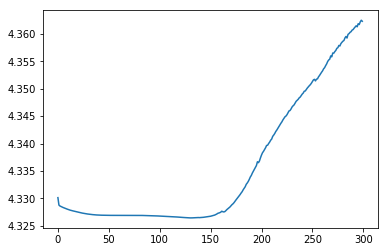

In [40]:
plt.plot([i for i in range(300)],validation_loss)
plt.show()

In [41]:
#re-initialize this net (so re-initialize the parameters)
net_svd80 = Net(81, 40, 1)
#print(list(net_svd80.parameters())[0])

In [42]:
#final model for svd_80_nn:
for epoch in range(131):
    for step, (batch_x, batch_y) in enumerate(train_total_loader):
        print('Epoch:', epoch, '| Step: ', step)
        optimizer.zero_grad()
        b_x = Variable(batch_x.float())
        b_y = Variable(batch_y.float())
        
        #print(list(net_svd80.parameters())[0])
        prediction = net_svd80(b_x)
        
        train_loss = loss_func(prediction, b_y)
        print('training loss is: ',train_loss.data[0])
        print('\n')

        train_loss.backward()
        optimizer.step()

        

Epoch: 0 | Step:  0
training loss is:  3.451821804046631


Epoch: 0 | Step:  1
training loss is:  3.3276166915893555


Epoch: 0 | Step:  2
training loss is:  3.1672377586364746


Epoch: 0 | Step:  3
training loss is:  3.262434720993042


Epoch: 0 | Step:  4
training loss is:  2.9731369018554688


Epoch: 0 | Step:  5
training loss is:  3.0231266021728516


Epoch: 0 | Step:  6
training loss is:  3.2265100479125977


Epoch: 0 | Step:  7
training loss is:  3.733872413635254


Epoch: 0 | Step:  8
training loss is:  2.639873743057251


Epoch: 0 | Step:  9
training loss is:  3.5619518756866455


Epoch: 0 | Step:  10
training loss is:  3.517547845840454


Epoch: 0 | Step:  11
training loss is:  3.0149173736572266


Epoch: 0 | Step:  12
training loss is:  2.888415813446045


Epoch: 0 | Step:  13
training loss is:  3.947006940841675


Epoch: 0 | Step:  14
training loss is:  2.651672601699829


Epoch: 0 | Step:  15
training loss is:  3.5436954498291016


Epoch: 0 | Step:  16
training loss is:  3.

Epoch: 5 | Step:  0
training loss is:  3.451821804046631


Epoch: 5 | Step:  1
training loss is:  3.3276166915893555


Epoch: 5 | Step:  2
training loss is:  3.1672377586364746


Epoch: 5 | Step:  3
training loss is:  3.262434720993042


Epoch: 5 | Step:  4
training loss is:  2.9731369018554688


Epoch: 5 | Step:  5
training loss is:  3.0231266021728516


Epoch: 5 | Step:  6
training loss is:  3.2265100479125977


Epoch: 5 | Step:  7
training loss is:  3.733872413635254


Epoch: 5 | Step:  8
training loss is:  2.639873743057251


Epoch: 5 | Step:  9
training loss is:  3.5619518756866455


Epoch: 5 | Step:  10
training loss is:  3.517547845840454


Epoch: 5 | Step:  11
training loss is:  3.0149173736572266


Epoch: 5 | Step:  12
training loss is:  2.888415813446045


Epoch: 5 | Step:  13
training loss is:  3.947006940841675


Epoch: 5 | Step:  14
training loss is:  2.651672601699829


Epoch: 5 | Step:  15
training loss is:  3.5436954498291016


Epoch: 5 | Step:  16
training loss is:  3.

Epoch: 10 | Step:  0
training loss is:  3.451821804046631


Epoch: 10 | Step:  1
training loss is:  3.3276166915893555


Epoch: 10 | Step:  2
training loss is:  3.1672377586364746


Epoch: 10 | Step:  3
training loss is:  3.262434720993042


Epoch: 10 | Step:  4
training loss is:  2.9731369018554688


Epoch: 10 | Step:  5
training loss is:  3.0231266021728516


Epoch: 10 | Step:  6
training loss is:  3.2265100479125977


Epoch: 10 | Step:  7
training loss is:  3.733872413635254


Epoch: 10 | Step:  8
training loss is:  2.639873743057251


Epoch: 10 | Step:  9
training loss is:  3.5619518756866455


Epoch: 10 | Step:  10
training loss is:  3.517547845840454


Epoch: 10 | Step:  11
training loss is:  3.0149173736572266


Epoch: 10 | Step:  12
training loss is:  2.888415813446045


Epoch: 10 | Step:  13
training loss is:  3.947006940841675


Epoch: 10 | Step:  14
training loss is:  2.651672601699829


Epoch: 10 | Step:  15
training loss is:  3.5436954498291016


Epoch: 10 | Step:  16
trai

Epoch: 15 | Step:  0
training loss is:  3.451821804046631


Epoch: 15 | Step:  1
training loss is:  3.3276166915893555


Epoch: 15 | Step:  2
training loss is:  3.1672377586364746


Epoch: 15 | Step:  3
training loss is:  3.262434720993042


Epoch: 15 | Step:  4
training loss is:  2.9731369018554688


Epoch: 15 | Step:  5
training loss is:  3.0231266021728516


Epoch: 15 | Step:  6
training loss is:  3.2265100479125977


Epoch: 15 | Step:  7
training loss is:  3.733872413635254


Epoch: 15 | Step:  8
training loss is:  2.639873743057251


Epoch: 15 | Step:  9
training loss is:  3.5619518756866455


Epoch: 15 | Step:  10
training loss is:  3.517547845840454


Epoch: 15 | Step:  11
training loss is:  3.0149173736572266


Epoch: 15 | Step:  12
training loss is:  2.888415813446045


Epoch: 15 | Step:  13
training loss is:  3.947006940841675


Epoch: 15 | Step:  14
training loss is:  2.651672601699829


Epoch: 15 | Step:  15
training loss is:  3.5436954498291016


Epoch: 15 | Step:  16
trai

Epoch: 20 | Step:  0
training loss is:  3.451821804046631


Epoch: 20 | Step:  1
training loss is:  3.3276166915893555


Epoch: 20 | Step:  2
training loss is:  3.1672377586364746


Epoch: 20 | Step:  3
training loss is:  3.262434720993042


Epoch: 20 | Step:  4
training loss is:  2.9731369018554688


Epoch: 20 | Step:  5
training loss is:  3.0231266021728516


Epoch: 20 | Step:  6
training loss is:  3.2265100479125977


Epoch: 20 | Step:  7
training loss is:  3.733872413635254


Epoch: 20 | Step:  8
training loss is:  2.639873743057251


Epoch: 20 | Step:  9
training loss is:  3.5619518756866455


Epoch: 20 | Step:  10
training loss is:  3.517547845840454


Epoch: 20 | Step:  11
training loss is:  3.0149173736572266


Epoch: 20 | Step:  12
training loss is:  2.888415813446045


Epoch: 20 | Step:  13
training loss is:  3.947006940841675


Epoch: 20 | Step:  14
training loss is:  2.651672601699829


Epoch: 20 | Step:  15
training loss is:  3.5436954498291016


Epoch: 20 | Step:  16
trai

Epoch: 24 | Step:  27
training loss is:  3.567110776901245


Epoch: 25 | Step:  0
training loss is:  3.451821804046631


Epoch: 25 | Step:  1
training loss is:  3.3276166915893555


Epoch: 25 | Step:  2
training loss is:  3.1672377586364746


Epoch: 25 | Step:  3
training loss is:  3.262434720993042


Epoch: 25 | Step:  4
training loss is:  2.9731369018554688


Epoch: 25 | Step:  5
training loss is:  3.0231266021728516


Epoch: 25 | Step:  6
training loss is:  3.2265100479125977


Epoch: 25 | Step:  7
training loss is:  3.733872413635254


Epoch: 25 | Step:  8
training loss is:  2.639873743057251


Epoch: 25 | Step:  9
training loss is:  3.5619518756866455


Epoch: 25 | Step:  10
training loss is:  3.517547845840454


Epoch: 25 | Step:  11
training loss is:  3.0149173736572266


Epoch: 25 | Step:  12
training loss is:  2.888415813446045


Epoch: 25 | Step:  13
training loss is:  3.947006940841675


Epoch: 25 | Step:  14
training loss is:  2.651672601699829


Epoch: 25 | Step:  15
train

Epoch: 29 | Step:  21
training loss is:  3.1508824825286865


Epoch: 29 | Step:  22
training loss is:  3.745298385620117


Epoch: 29 | Step:  23
training loss is:  3.7677314281463623


Epoch: 29 | Step:  24
training loss is:  3.0684757232666016


Epoch: 29 | Step:  25
training loss is:  3.8302013874053955


Epoch: 29 | Step:  26
training loss is:  2.8649446964263916


Epoch: 29 | Step:  27
training loss is:  3.567110776901245


Epoch: 30 | Step:  0
training loss is:  3.451821804046631


Epoch: 30 | Step:  1
training loss is:  3.3276166915893555


Epoch: 30 | Step:  2
training loss is:  3.1672377586364746


Epoch: 30 | Step:  3
training loss is:  3.262434720993042


Epoch: 30 | Step:  4
training loss is:  2.9731369018554688


Epoch: 30 | Step:  5
training loss is:  3.0231266021728516


Epoch: 30 | Step:  6
training loss is:  3.2265100479125977


Epoch: 30 | Step:  7
training loss is:  3.733872413635254


Epoch: 30 | Step:  8
training loss is:  2.639873743057251


Epoch: 30 | Step:  9
tr

Epoch: 34 | Step:  20
training loss is:  3.7453548908233643


Epoch: 34 | Step:  21
training loss is:  3.1508824825286865


Epoch: 34 | Step:  22
training loss is:  3.745298385620117


Epoch: 34 | Step:  23
training loss is:  3.7677314281463623


Epoch: 34 | Step:  24
training loss is:  3.0684757232666016


Epoch: 34 | Step:  25
training loss is:  3.8302013874053955


Epoch: 34 | Step:  26
training loss is:  2.8649446964263916


Epoch: 34 | Step:  27
training loss is:  3.567110776901245


Epoch: 35 | Step:  0
training loss is:  3.451821804046631


Epoch: 35 | Step:  1
training loss is:  3.3276166915893555


Epoch: 35 | Step:  2
training loss is:  3.1672377586364746


Epoch: 35 | Step:  3
training loss is:  3.262434720993042


Epoch: 35 | Step:  4
training loss is:  2.9731369018554688


Epoch: 35 | Step:  5
training loss is:  3.0231266021728516


Epoch: 35 | Step:  6
training loss is:  3.2265100479125977


Epoch: 35 | Step:  7
training loss is:  3.733872413635254


Epoch: 35 | Step:  8



Epoch: 39 | Step:  22
training loss is:  3.745298385620117


Epoch: 39 | Step:  23
training loss is:  3.7677314281463623


Epoch: 39 | Step:  24
training loss is:  3.0684757232666016


Epoch: 39 | Step:  25
training loss is:  3.8302013874053955


Epoch: 39 | Step:  26
training loss is:  2.8649446964263916


Epoch: 39 | Step:  27
training loss is:  3.567110776901245


Epoch: 40 | Step:  0
training loss is:  3.451821804046631


Epoch: 40 | Step:  1
training loss is:  3.3276166915893555


Epoch: 40 | Step:  2
training loss is:  3.1672377586364746


Epoch: 40 | Step:  3
training loss is:  3.262434720993042


Epoch: 40 | Step:  4
training loss is:  2.9731369018554688


Epoch: 40 | Step:  5
training loss is:  3.0231266021728516


Epoch: 40 | Step:  6
training loss is:  3.2265100479125977


Epoch: 40 | Step:  7
training loss is:  3.733872413635254


Epoch: 40 | Step:  8
training loss is:  2.639873743057251


Epoch: 40 | Step:  9
training loss is:  3.5619518756866455


Epoch: 40 | Step:  10
t

Epoch: 44 | Step:  21
training loss is:  3.1508824825286865


Epoch: 44 | Step:  22
training loss is:  3.745298385620117


Epoch: 44 | Step:  23
training loss is:  3.7677314281463623


Epoch: 44 | Step:  24
training loss is:  3.0684757232666016


Epoch: 44 | Step:  25
training loss is:  3.8302013874053955


Epoch: 44 | Step:  26
training loss is:  2.8649446964263916


Epoch: 44 | Step:  27
training loss is:  3.567110776901245


Epoch: 45 | Step:  0
training loss is:  3.451821804046631


Epoch: 45 | Step:  1
training loss is:  3.3276166915893555


Epoch: 45 | Step:  2
training loss is:  3.1672377586364746


Epoch: 45 | Step:  3
training loss is:  3.262434720993042


Epoch: 45 | Step:  4
training loss is:  2.9731369018554688


Epoch: 45 | Step:  5
training loss is:  3.0231266021728516


Epoch: 45 | Step:  6
training loss is:  3.2265100479125977


Epoch: 45 | Step:  7
training loss is:  3.733872413635254


Epoch: 45 | Step:  8
training loss is:  2.639873743057251


Epoch: 45 | Step:  9
tr

Epoch: 49 | Step:  20
training loss is:  3.7453548908233643


Epoch: 49 | Step:  21
training loss is:  3.1508824825286865


Epoch: 49 | Step:  22
training loss is:  3.745298385620117


Epoch: 49 | Step:  23
training loss is:  3.7677314281463623


Epoch: 49 | Step:  24
training loss is:  3.0684757232666016


Epoch: 49 | Step:  25
training loss is:  3.8302013874053955


Epoch: 49 | Step:  26
training loss is:  2.8649446964263916


Epoch: 49 | Step:  27
training loss is:  3.567110776901245


Epoch: 50 | Step:  0
training loss is:  3.451821804046631


Epoch: 50 | Step:  1
training loss is:  3.3276166915893555


Epoch: 50 | Step:  2
training loss is:  3.1672377586364746


Epoch: 50 | Step:  3
training loss is:  3.262434720993042


Epoch: 50 | Step:  4
training loss is:  2.9731369018554688


Epoch: 50 | Step:  5
training loss is:  3.0231266021728516


Epoch: 50 | Step:  6
training loss is:  3.2265100479125977


Epoch: 50 | Step:  7
training loss is:  3.733872413635254


Epoch: 50 | Step:  8


Epoch: 54 | Step:  20
training loss is:  3.7453548908233643


Epoch: 54 | Step:  21
training loss is:  3.1508824825286865


Epoch: 54 | Step:  22
training loss is:  3.745298385620117


Epoch: 54 | Step:  23
training loss is:  3.7677314281463623


Epoch: 54 | Step:  24
training loss is:  3.0684757232666016


Epoch: 54 | Step:  25
training loss is:  3.8302013874053955


Epoch: 54 | Step:  26
training loss is:  2.8649446964263916


Epoch: 54 | Step:  27
training loss is:  3.567110776901245


Epoch: 55 | Step:  0
training loss is:  3.451821804046631


Epoch: 55 | Step:  1
training loss is:  3.3276166915893555


Epoch: 55 | Step:  2
training loss is:  3.1672377586364746


Epoch: 55 | Step:  3
training loss is:  3.262434720993042


Epoch: 55 | Step:  4
training loss is:  2.9731369018554688


Epoch: 55 | Step:  5
training loss is:  3.0231266021728516


Epoch: 55 | Step:  6
training loss is:  3.2265100479125977


Epoch: 55 | Step:  7
training loss is:  3.733872413635254


Epoch: 55 | Step:  8


training loss is:  3.7453548908233643


Epoch: 59 | Step:  21
training loss is:  3.1508824825286865


Epoch: 59 | Step:  22
training loss is:  3.745298385620117


Epoch: 59 | Step:  23
training loss is:  3.7677314281463623


Epoch: 59 | Step:  24
training loss is:  3.0684757232666016


Epoch: 59 | Step:  25
training loss is:  3.8302013874053955


Epoch: 59 | Step:  26
training loss is:  2.8649446964263916


Epoch: 59 | Step:  27
training loss is:  3.567110776901245


Epoch: 60 | Step:  0
training loss is:  3.451821804046631


Epoch: 60 | Step:  1
training loss is:  3.3276166915893555


Epoch: 60 | Step:  2
training loss is:  3.1672377586364746


Epoch: 60 | Step:  3
training loss is:  3.262434720993042


Epoch: 60 | Step:  4
training loss is:  2.9731369018554688


Epoch: 60 | Step:  5
training loss is:  3.0231266021728516


Epoch: 60 | Step:  6
training loss is:  3.2265100479125977


Epoch: 60 | Step:  7
training loss is:  3.733872413635254


Epoch: 60 | Step:  8
training loss is:  2.6

Epoch: 64 | Step:  20
training loss is:  3.7453548908233643


Epoch: 64 | Step:  21
training loss is:  3.1508824825286865


Epoch: 64 | Step:  22
training loss is:  3.745298385620117


Epoch: 64 | Step:  23
training loss is:  3.7677314281463623


Epoch: 64 | Step:  24
training loss is:  3.0684757232666016


Epoch: 64 | Step:  25
training loss is:  3.8302013874053955


Epoch: 64 | Step:  26
training loss is:  2.8649446964263916


Epoch: 64 | Step:  27
training loss is:  3.567110776901245


Epoch: 65 | Step:  0
training loss is:  3.451821804046631


Epoch: 65 | Step:  1
training loss is:  3.3276166915893555


Epoch: 65 | Step:  2
training loss is:  3.1672377586364746


Epoch: 65 | Step:  3
training loss is:  3.262434720993042


Epoch: 65 | Step:  4
training loss is:  2.9731369018554688


Epoch: 65 | Step:  5
training loss is:  3.0231266021728516


Epoch: 65 | Step:  6
training loss is:  3.2265100479125977


Epoch: 65 | Step:  7
training loss is:  3.733872413635254


Epoch: 65 | Step:  8




Epoch: 69 | Step:  20
training loss is:  3.7453548908233643


Epoch: 69 | Step:  21
training loss is:  3.1508824825286865


Epoch: 69 | Step:  22
training loss is:  3.745298385620117


Epoch: 69 | Step:  23
training loss is:  3.7677314281463623


Epoch: 69 | Step:  24
training loss is:  3.0684757232666016


Epoch: 69 | Step:  25
training loss is:  3.8302013874053955


Epoch: 69 | Step:  26
training loss is:  2.8649446964263916


Epoch: 69 | Step:  27
training loss is:  3.567110776901245


Epoch: 70 | Step:  0
training loss is:  3.451821804046631


Epoch: 70 | Step:  1
training loss is:  3.3276166915893555


Epoch: 70 | Step:  2
training loss is:  3.1672377586364746


Epoch: 70 | Step:  3
training loss is:  3.262434720993042


Epoch: 70 | Step:  4
training loss is:  2.9731369018554688


Epoch: 70 | Step:  5
training loss is:  3.0231266021728516


Epoch: 70 | Step:  6
training loss is:  3.2265100479125977


Epoch: 70 | Step:  7
training loss is:  3.733872413635254


Epoch: 70 | Step:  

training loss is:  3.7453548908233643


Epoch: 74 | Step:  21
training loss is:  3.1508824825286865


Epoch: 74 | Step:  22
training loss is:  3.745298385620117


Epoch: 74 | Step:  23
training loss is:  3.7677314281463623


Epoch: 74 | Step:  24
training loss is:  3.0684757232666016


Epoch: 74 | Step:  25
training loss is:  3.8302013874053955


Epoch: 74 | Step:  26
training loss is:  2.8649446964263916


Epoch: 74 | Step:  27
training loss is:  3.567110776901245


Epoch: 75 | Step:  0
training loss is:  3.451821804046631


Epoch: 75 | Step:  1
training loss is:  3.3276166915893555


Epoch: 75 | Step:  2
training loss is:  3.1672377586364746


Epoch: 75 | Step:  3
training loss is:  3.262434720993042


Epoch: 75 | Step:  4
training loss is:  2.9731369018554688


Epoch: 75 | Step:  5
training loss is:  3.0231266021728516


Epoch: 75 | Step:  6
training loss is:  3.2265100479125977


Epoch: 75 | Step:  7
training loss is:  3.733872413635254


Epoch: 75 | Step:  8
training loss is:  2.6

Epoch: 79 | Step:  21
training loss is:  3.1508824825286865


Epoch: 79 | Step:  22
training loss is:  3.745298385620117


Epoch: 79 | Step:  23
training loss is:  3.7677314281463623


Epoch: 79 | Step:  24
training loss is:  3.0684757232666016


Epoch: 79 | Step:  25
training loss is:  3.8302013874053955


Epoch: 79 | Step:  26
training loss is:  2.8649446964263916


Epoch: 79 | Step:  27
training loss is:  3.567110776901245


Epoch: 80 | Step:  0
training loss is:  3.451821804046631


Epoch: 80 | Step:  1
training loss is:  3.3276166915893555


Epoch: 80 | Step:  2
training loss is:  3.1672377586364746


Epoch: 80 | Step:  3
training loss is:  3.262434720993042


Epoch: 80 | Step:  4
training loss is:  2.9731369018554688


Epoch: 80 | Step:  5
training loss is:  3.0231266021728516


Epoch: 80 | Step:  6
training loss is:  3.2265100479125977


Epoch: 80 | Step:  7
training loss is:  3.733872413635254


Epoch: 80 | Step:  8
training loss is:  2.639873743057251


Epoch: 80 | Step:  9
tr

Epoch: 84 | Step:  20
training loss is:  3.7453548908233643


Epoch: 84 | Step:  21
training loss is:  3.1508824825286865


Epoch: 84 | Step:  22
training loss is:  3.745298385620117


Epoch: 84 | Step:  23
training loss is:  3.7677314281463623


Epoch: 84 | Step:  24
training loss is:  3.0684757232666016


Epoch: 84 | Step:  25
training loss is:  3.8302013874053955


Epoch: 84 | Step:  26
training loss is:  2.8649446964263916


Epoch: 84 | Step:  27
training loss is:  3.567110776901245


Epoch: 85 | Step:  0
training loss is:  3.451821804046631


Epoch: 85 | Step:  1
training loss is:  3.3276166915893555


Epoch: 85 | Step:  2
training loss is:  3.1672377586364746


Epoch: 85 | Step:  3
training loss is:  3.262434720993042


Epoch: 85 | Step:  4
training loss is:  2.9731369018554688


Epoch: 85 | Step:  5
training loss is:  3.0231266021728516


Epoch: 85 | Step:  6
training loss is:  3.2265100479125977


Epoch: 85 | Step:  7
training loss is:  3.733872413635254


Epoch: 85 | Step:  8


Epoch: 89 | Step:  20
training loss is:  3.7453548908233643


Epoch: 89 | Step:  21
training loss is:  3.1508824825286865


Epoch: 89 | Step:  22
training loss is:  3.745298385620117


Epoch: 89 | Step:  23
training loss is:  3.7677314281463623


Epoch: 89 | Step:  24
training loss is:  3.0684757232666016


Epoch: 89 | Step:  25
training loss is:  3.8302013874053955


Epoch: 89 | Step:  26
training loss is:  2.8649446964263916


Epoch: 89 | Step:  27
training loss is:  3.567110776901245


Epoch: 90 | Step:  0
training loss is:  3.451821804046631


Epoch: 90 | Step:  1
training loss is:  3.3276166915893555


Epoch: 90 | Step:  2
training loss is:  3.1672377586364746


Epoch: 90 | Step:  3
training loss is:  3.262434720993042


Epoch: 90 | Step:  4
training loss is:  2.9731369018554688


Epoch: 90 | Step:  5
training loss is:  3.0231266021728516


Epoch: 90 | Step:  6
training loss is:  3.2265100479125977


Epoch: 90 | Step:  7
training loss is:  3.733872413635254


Epoch: 90 | Step:  8


Epoch: 94 | Step:  21
training loss is:  3.1508824825286865


Epoch: 94 | Step:  22
training loss is:  3.745298385620117


Epoch: 94 | Step:  23
training loss is:  3.7677314281463623


Epoch: 94 | Step:  24
training loss is:  3.0684757232666016


Epoch: 94 | Step:  25
training loss is:  3.8302013874053955


Epoch: 94 | Step:  26
training loss is:  2.8649446964263916


Epoch: 94 | Step:  27
training loss is:  3.567110776901245


Epoch: 95 | Step:  0
training loss is:  3.451821804046631


Epoch: 95 | Step:  1
training loss is:  3.3276166915893555


Epoch: 95 | Step:  2
training loss is:  3.1672377586364746


Epoch: 95 | Step:  3
training loss is:  3.262434720993042


Epoch: 95 | Step:  4
training loss is:  2.9731369018554688


Epoch: 95 | Step:  5
training loss is:  3.0231266021728516


Epoch: 95 | Step:  6
training loss is:  3.2265100479125977


Epoch: 95 | Step:  7
training loss is:  3.733872413635254


Epoch: 95 | Step:  8
training loss is:  2.639873743057251


Epoch: 95 | Step:  9
tr

training loss is:  3.1508824825286865


Epoch: 99 | Step:  22
training loss is:  3.745298385620117


Epoch: 99 | Step:  23
training loss is:  3.7677314281463623


Epoch: 99 | Step:  24
training loss is:  3.0684757232666016


Epoch: 99 | Step:  25
training loss is:  3.8302013874053955


Epoch: 99 | Step:  26
training loss is:  2.8649446964263916


Epoch: 99 | Step:  27
training loss is:  3.567110776901245


Epoch: 100 | Step:  0
training loss is:  3.451821804046631


Epoch: 100 | Step:  1
training loss is:  3.3276166915893555


Epoch: 100 | Step:  2
training loss is:  3.1672377586364746


Epoch: 100 | Step:  3
training loss is:  3.262434720993042


Epoch: 100 | Step:  4
training loss is:  2.9731369018554688


Epoch: 100 | Step:  5
training loss is:  3.0231266021728516


Epoch: 100 | Step:  6
training loss is:  3.2265100479125977


Epoch: 100 | Step:  7
training loss is:  3.733872413635254


Epoch: 100 | Step:  8
training loss is:  2.639873743057251


Epoch: 100 | Step:  9
training loss 

training loss is:  5.3946428298950195


Epoch: 104 | Step:  19
training loss is:  3.0693721771240234


Epoch: 104 | Step:  20
training loss is:  3.7453548908233643


Epoch: 104 | Step:  21
training loss is:  3.1508824825286865


Epoch: 104 | Step:  22
training loss is:  3.745298385620117


Epoch: 104 | Step:  23
training loss is:  3.7677314281463623


Epoch: 104 | Step:  24
training loss is:  3.0684757232666016


Epoch: 104 | Step:  25
training loss is:  3.8302013874053955


Epoch: 104 | Step:  26
training loss is:  2.8649446964263916


Epoch: 104 | Step:  27
training loss is:  3.567110776901245


Epoch: 105 | Step:  0
training loss is:  3.451821804046631


Epoch: 105 | Step:  1
training loss is:  3.3276166915893555


Epoch: 105 | Step:  2
training loss is:  3.1672377586364746


Epoch: 105 | Step:  3
training loss is:  3.262434720993042


Epoch: 105 | Step:  4
training loss is:  2.9731369018554688


Epoch: 105 | Step:  5
training loss is:  3.0231266021728516


Epoch: 105 | Step:  6
tra

Epoch: 110 | Step:  0
training loss is:  3.451821804046631


Epoch: 110 | Step:  1
training loss is:  3.3276166915893555


Epoch: 110 | Step:  2
training loss is:  3.1672377586364746


Epoch: 110 | Step:  3
training loss is:  3.262434720993042


Epoch: 110 | Step:  4
training loss is:  2.9731369018554688


Epoch: 110 | Step:  5
training loss is:  3.0231266021728516


Epoch: 110 | Step:  6
training loss is:  3.2265100479125977


Epoch: 110 | Step:  7
training loss is:  3.733872413635254


Epoch: 110 | Step:  8
training loss is:  2.639873743057251


Epoch: 110 | Step:  9
training loss is:  3.5619518756866455


Epoch: 110 | Step:  10
training loss is:  3.517547845840454


Epoch: 110 | Step:  11
training loss is:  3.0149173736572266


Epoch: 110 | Step:  12
training loss is:  2.888415813446045


Epoch: 110 | Step:  13
training loss is:  3.947006940841675


Epoch: 110 | Step:  14
training loss is:  2.651672601699829


Epoch: 110 | Step:  15
training loss is:  3.5436954498291016


Epoch: 110

Epoch: 114 | Step:  22
training loss is:  3.745298385620117


Epoch: 114 | Step:  23
training loss is:  3.7677314281463623


Epoch: 114 | Step:  24
training loss is:  3.0684757232666016


Epoch: 114 | Step:  25
training loss is:  3.8302013874053955


Epoch: 114 | Step:  26
training loss is:  2.8649446964263916


Epoch: 114 | Step:  27
training loss is:  3.567110776901245


Epoch: 115 | Step:  0
training loss is:  3.451821804046631


Epoch: 115 | Step:  1
training loss is:  3.3276166915893555


Epoch: 115 | Step:  2
training loss is:  3.1672377586364746


Epoch: 115 | Step:  3
training loss is:  3.262434720993042


Epoch: 115 | Step:  4
training loss is:  2.9731369018554688


Epoch: 115 | Step:  5
training loss is:  3.0231266021728516


Epoch: 115 | Step:  6
training loss is:  3.2265100479125977


Epoch: 115 | Step:  7
training loss is:  3.733872413635254


Epoch: 115 | Step:  8
training loss is:  2.639873743057251


Epoch: 115 | Step:  9
training loss is:  3.5619518756866455


Epoch: 1

training loss is:  3.0693721771240234


Epoch: 119 | Step:  20
training loss is:  3.7453548908233643


Epoch: 119 | Step:  21
training loss is:  3.1508824825286865


Epoch: 119 | Step:  22
training loss is:  3.745298385620117


Epoch: 119 | Step:  23
training loss is:  3.7677314281463623


Epoch: 119 | Step:  24
training loss is:  3.0684757232666016


Epoch: 119 | Step:  25
training loss is:  3.8302013874053955


Epoch: 119 | Step:  26
training loss is:  2.8649446964263916


Epoch: 119 | Step:  27
training loss is:  3.567110776901245


Epoch: 120 | Step:  0
training loss is:  3.451821804046631


Epoch: 120 | Step:  1
training loss is:  3.3276166915893555


Epoch: 120 | Step:  2
training loss is:  3.1672377586364746


Epoch: 120 | Step:  3
training loss is:  3.262434720993042


Epoch: 120 | Step:  4
training loss is:  2.9731369018554688


Epoch: 120 | Step:  5
training loss is:  3.0231266021728516


Epoch: 120 | Step:  6
training loss is:  3.2265100479125977


Epoch: 120 | Step:  7
trai

Epoch: 124 | Step:  12
training loss is:  2.888415813446045


Epoch: 124 | Step:  13
training loss is:  3.947006940841675


Epoch: 124 | Step:  14
training loss is:  2.651672601699829


Epoch: 124 | Step:  15
training loss is:  3.5436954498291016


Epoch: 124 | Step:  16
training loss is:  3.625674247741699


Epoch: 124 | Step:  17
training loss is:  3.2709805965423584


Epoch: 124 | Step:  18
training loss is:  5.3946428298950195


Epoch: 124 | Step:  19
training loss is:  3.0693721771240234


Epoch: 124 | Step:  20
training loss is:  3.7453548908233643


Epoch: 124 | Step:  21
training loss is:  3.1508824825286865


Epoch: 124 | Step:  22
training loss is:  3.745298385620117


Epoch: 124 | Step:  23
training loss is:  3.7677314281463623


Epoch: 124 | Step:  24
training loss is:  3.0684757232666016


Epoch: 124 | Step:  25
training loss is:  3.8302013874053955


Epoch: 124 | Step:  26
training loss is:  2.8649446964263916


Epoch: 124 | Step:  27
training loss is:  3.567110776901245


Epoch: 129 | Step:  12
training loss is:  2.888415813446045


Epoch: 129 | Step:  13
training loss is:  3.947006940841675


Epoch: 129 | Step:  14
training loss is:  2.651672601699829


Epoch: 129 | Step:  15
training loss is:  3.5436954498291016


Epoch: 129 | Step:  16
training loss is:  3.625674247741699


Epoch: 129 | Step:  17
training loss is:  3.2709805965423584


Epoch: 129 | Step:  18
training loss is:  5.3946428298950195


Epoch: 129 | Step:  19
training loss is:  3.0693721771240234


Epoch: 129 | Step:  20
training loss is:  3.7453548908233643


Epoch: 129 | Step:  21
training loss is:  3.1508824825286865


Epoch: 129 | Step:  22
training loss is:  3.745298385620117


Epoch: 129 | Step:  23
training loss is:  3.7677314281463623


Epoch: 129 | Step:  24
training loss is:  3.0684757232666016


Epoch: 129 | Step:  25
training loss is:  3.8302013874053955


Epoch: 129 | Step:  26
training loss is:  2.8649446964263916


Epoch: 129 | Step:  27
training loss is:  3.567110776901245


In [72]:
#save the network
torch.save(net_svd80.state_dict(),'net_svd80.pkl')

In [43]:
#restore the network
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden) 
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict=torch.nn.Linear(n_hidden,1) 
    #forward:
    def forward(self,x):
        x=F.relu(self.hidden(x)) 
        x=self.hidden2(x)
        x=self.predict(x) 
        return x
    
net_svd80 = Net(81, 40, 1)
optimizer=torch.optim.SGD(net_svd80.parameters(),lr=0.03)
loss_func=torch.nn.MSELoss()
loss_func_MAe=torch.nn.L1Loss()

net_svd80.load_state_dict(torch.load('net_svd80.pkl'))

In [44]:
#final prediction
final_prediction_y = net_svd80(x_test).data.numpy()
true_y = y_test.data.numpy()
plt.scatter(true_y, final_prediction_y)

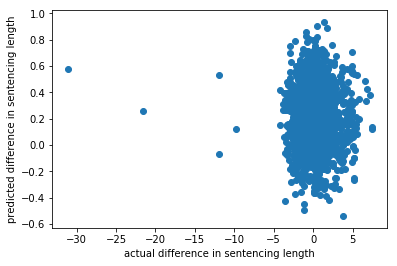

In [45]:
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

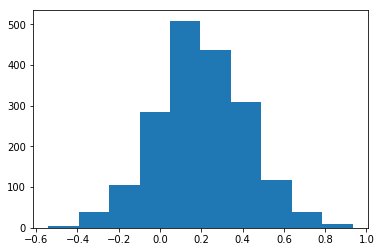

In [46]:
plt.hist(final_prediction_y)
plt.show()

In [77]:
#final result avoid overfitting
print('mean squared error is: {}'.format(mean_squared_error(true_y, final_prediction_y)))
print('mean absolute error is {}'.format(mean_absolute_error(true_y, final_prediction_y)))

mean squared error is: 4.177138328552246
mean absolute error is 1.408657431602478


In [47]:
#std 
np.std(final_prediction_y)

0.21994314

In [48]:
#mean
np.mean(final_prediction_y)

0.20254607

In [49]:
print('R2 is {}'.format(r2_score(true_y, final_prediction_y)))

R2 is -0.01787363350664073


## 25 dimension

In [70]:
#select the final number of component based on explained_variancde 
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix

svd = TruncatedSVD(n_components=25, n_iter=7, random_state=42)
svd.fit(tf_train_2gram)  
TruncatedSVD(algorithm='randomized', n_components=25, n_iter=7,
        random_state=42, tol=0.0)

svd_25_train = svd.transform(tf_train_2gram)
svd_25_test = svd.transform(tf_test_2gram)
print(svd.explained_variance_ratio_)  

print(svd.explained_variance_ratio_.sum())  

[0.00246613 0.00466438 0.0033177  0.00273369 0.00263453 0.00247128
 0.00233313 0.00209632 0.00202027 0.0018684  0.00175662 0.00168994
 0.0014926  0.00147321 0.0014626  0.00139681 0.0013638  0.00135306
 0.00133958 0.00131582 0.00126272 0.00120527 0.00119394 0.00114342
 0.00112008]
0.04717529901134199


In [71]:
svd_25_train_df = pd.DataFrame(data = svd_25_train, index=train_data.index)
svd_25_test_df = pd.DataFrame(data = svd_25_test, index = test_data.index)

In [72]:
svd_25_train_df[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']] = train_data[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']]
svd_25_test_df[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']] = test_data[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']]


In [73]:
svd_25_train_df.head()

0         1         2         3         4         5         6  \
0  0.136688 -0.040999 -0.004376 -0.007439 -0.006004 -0.034260  0.046218   
1  0.100533  0.021049  0.007306  0.001950  0.001177 -0.019885 -0.008458   
2  0.157620 -0.026298 -0.043520 -0.057412 -0.039803  0.026673  0.008052   
3  0.141970 -0.026448 -0.080584 -0.054686 -0.016306  0.081739 -0.037346   
4  0.143912 -0.047581  0.005258 -0.058497  0.036337 -0.016155  0.052143   

          7         8         9      ...              23        24  index  \
0 -0.008581 -0.008434  0.013896      ...        0.016048  0.008822  35638   
1  0.018879 -0.024918 -0.014877      ...        0.003840 -0.003227  24468   
2 -0.012448 -0.011200 -0.021245      ...        0.009395  0.010931  39230   
3  0.017909 -0.010613 -0.000932      ...        0.009760  0.020639  22883   
4 -0.038086 -0.005947  0.016851      ...       -0.009558 -0.034240  16551   

   Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  VacatedInPart  \
0       0.0             0.0       0.0             1.0      0.0            0.0   
1       1.0             0.0       0.0             0.0      0.0            0.0   
2       1.0             0.0       0.0             0.0      0.0            0.0   
3       1.0             0.0       0.0             0.0      0.0            0.0   
4       0.0             0.0       0.0             0.0      0.0            0.0   

   length_3m_dif  
0      -0.766357  
1       0.608711  
2       0.228592  
3      -3.150298  
4      -2.467751  

[5 rows x 33 columns]

In [74]:
svd_25_test_df.head()

0         1         2         3         4         5         6  \
0  0.119560 -0.025109  0.006438 -0.007403  0.016007 -0.019776  0.026116   
1  0.225139 -0.005882 -0.016541 -0.041018  0.020817 -0.080179 -0.008049   
2  0.335446 -0.088022 -0.039259 -0.161896 -0.059553  0.038914  0.040434   
3  0.099370 -0.008746  0.038461  0.022877  0.025353 -0.033024  0.035538   
4  0.248678 -0.052279 -0.046643 -0.072322 -0.028227  0.027050  0.023338   

          7         8         9      ...              23        24  index  \
0 -0.022396 -0.004759  0.016801      ...       -0.008434 -0.010712   2805   
1  0.229289  0.192550 -0.001704      ...       -0.049668 -0.002731   2817   
2  0.014779 -0.039393 -0.038272      ...       -0.027673  0.010503   3065   
3 -0.004255 -0.004725  0.044369      ...        0.000286  0.020970   3392   
4  0.031693 -0.029706 -0.031873      ...       -0.037845  0.009001   3498   

   Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  VacatedInPart  \
0       0.0             0.0       1.0             0.0      0.0            0.0   
1       1.0             0.0       0.0             0.0      0.0            0.0   
2       1.0             0.0       0.0             0.0      0.0            0.0   
3       1.0             0.0       0.0             0.0      0.0            0.0   
4       1.0             0.0       0.0             0.0      0.0            0.0   

   length_3m_dif  
0      -3.563471  
1       3.591201  
2       0.959357  
3      -1.595323  
4      -2.045180  

[5 rows x 33 columns]

In [75]:
svd_25_train_df['res']=svd_25_train_df['Affirmed']+svd_25_train_df['AffirmedInPart']+svd_25_train_df['Reversed']+svd_25_train_df['ReversedInPart']+svd_25_train_df['Vacated']+svd_25_train_df['VacatedInPart']
svd_25_test_df['res']=svd_25_test_df['Affirmed']+svd_25_test_df['AffirmedInPart']+svd_25_test_df['Reversed']+svd_25_test_df['ReversedInPart']+svd_25_test_df['Vacated']+svd_25_test_df['VacatedInPart']

In [76]:
#keep only row with res ==1
svd_25_train_df=svd_25_train_df[svd_25_train_df['res']==1]
svd_25_test_df=svd_25_test_df[svd_25_test_df['res']==1]

In [77]:
def combine_reverse(row):
    if row['Reversed']==1:
        return 2
    
    elif row['Vacated']==1:
        return 2
    
    elif row['Affirmed']==1:
        return 1

In [78]:
svd_25_train_df['Res_binary'] = svd_25_train_df.apply(combine_reverse, axis=1)
svd_25_test_df['Res_binary'] = svd_25_test_df.apply(combine_reverse, axis=1)

In [79]:
svd_25_train_df=svd_25_train_df[(svd_25_train_df['Res_binary']==1) | (svd_25_train_df['Res_binary']==2)]
svd_25_test_df=svd_25_test_df[(svd_25_test_df['Res_binary']==1) | (svd_25_test_df['Res_binary']==2)]

In [80]:
svd_25_train_df= svd_25_train_df.drop(['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','res'],axis=1)
svd_25_test_df= svd_25_test_df.drop(['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','res'],axis=1)

In [321]:
#svd_25_train_nn_df = svd_25_train_df.iloc[:,:]
#svd_25_test_nn_df = svd_25_test_df.iloc[:,:]

In [81]:
svd_25_train_df['y'] = svd_25_train_df['length_3m_dif']
svd_25_test_df['y'] = svd_25_test_df['length_3m_dif']

In [82]:
svd_25_train_df.drop(['length_3m_dif','index'],axis=1, inplace=True)
svd_25_test_df.drop(['length_3m_dif','index'],axis=1,inplace=True)

In [84]:
#save the data (after dimension reduction)
svd_25_train_df.to_csv("svd_25_train_df.csv", sep=',')
svd_25_test_df.to_csv("svd_25_test_df.csv", sep=',')

In [15]:
#load data to avoid confusion
svd_25_train_df = pd.read_csv("svd_25_train_df.csv", sep=',')
svd_25_test_df = pd.read_csv("svd_25_test_df.csv", sep=',')

In [51]:
#basic nn architecture:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F

#used for batch training:
import torch.utils.data as Data

In [52]:
xy_train = np.loadtxt("svd_25_train_df.csv", delimiter = ',' ,skiprows=1, dtype= np.float64 )
xy_test = np.loadtxt("svd_25_test_df.csv", delimiter = ',', skiprows =1 ,dtype = np.float64)

In [53]:
xy_train.shape

(5533, 28)

In [54]:
#########################
#########################
#prepare data 

In [55]:
x_test = torch.from_numpy(xy_test[:,1:-1])
y_test = torch.from_numpy(xy_test[:,[-1]])
x_test = Variable(x_test.float())
y_test = Variable(y_test.float())

In [56]:
x_validation = torch.from_numpy(xy_train[:1260,1:-1])
y_validation = torch.from_numpy(xy_train[:1260,[-1]])
x_train = torch.from_numpy(xy_train[1260:,1:-1])
y_train = torch.from_numpy(xy_train[1260:,[-1]])

x_train_total = torch.from_numpy(xy_train[:,1:-1])
y_train_total = torch.from_numpy(xy_train[:,[-1]])

In [57]:
#define our own nn:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden) 
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict=torch.nn.Linear(n_hidden,1) 
    #forward:
    def forward(self,x):
        x=F.relu(self.hidden(x)) 
        x=self.hidden2(x)
        x=self.predict(x) 
        return x

In [58]:
#initialize the net:
n_features = 26
net_svd25 = Net(26, 13, 1)

In [59]:
print(net_svd25)

Net (
  (hidden): Linear (26 -> 13)
  (hidden2): Linear (13 -> 13)
  (predict): Linear (13 -> 1)
)


In [60]:
optimizer=torch.optim.SGD(net_svd25.parameters(),lr=0.03)
loss_func=torch.nn.MSELoss()
loss_func_MAe=torch.nn.L1Loss()

In [61]:
#batch training:
Train_BATCH_SIZE = 200
Validate_BATCH_SIZE = 126

torch_dataset_train = Data.TensorDataset(data_tensor = x_train, target_tensor = y_train)
train_loader = Data.DataLoader(
    dataset = torch_dataset_train,
    batch_size = Train_BATCH_SIZE,
    shuffle = False,
    num_workers = 2,)

torch_dataset_validate = Data.TensorDataset(data_tensor = x_validation, target_tensor = y_validation)
validate_loader = Data.DataLoader(
    dataset = torch_dataset_validate,
    batch_size = Validate_BATCH_SIZE,
    shuffle = False,
    num_workers = 2,)

torch_dataset_train_total = Data.TensorDataset(data_tensor = x_train_total, target_tensor = y_train_total)
train_total_loader = Data.DataLoader(
    dataset = torch_dataset_train_total,
    batch_size = Train_BATCH_SIZE,
    shuffle = False,
    num_workers = 2,)


In [144]:
#training:
#train too many steps will leads to overfit
#how to determine what is the stopping criterion of the training:
#---- one solution is 
validation_loss = []

#find optimal training epoch
for epoch in range(300):
    for step, (batch_x, batch_y) in enumerate(train_loader):
        print('Epoch:', epoch, '| Step: ', step)
        
        b_x = Variable(batch_x.float())
        b_y = Variable(batch_y.float())
        
        prediction = net_svd25(b_x)
        train_loss = loss_func(prediction, b_y)
        print('training loss is: ',train_loss.data[0])
        print('\n')

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

    sum_validation_loss = 0
    for s, (batch_x_validate, batch_y_validate) in enumerate(validate_loader):
        batch_x_validate = Variable(batch_x_validate.float())
        batch_y_validate = Variable(batch_y_validate.float())
        validation_output = net_svd25(batch_x_validate)
        #print(loss_func(validation_output, batch_y_validate).data[0])
        sum_validation_loss += loss_func(validation_output, batch_y_validate).data[0]
    validation_loss.append(sum_validation_loss/(s+1))
    #print(s+1)
    print("validation loss is {}".format(validation_loss[-1]))
    print('\n')
    print('\n')

            

Epoch: 0 | Step:  0
training loss is:  2.8515548706054688


Epoch: 0 | Step:  1
training loss is:  3.0287487506866455


Epoch: 0 | Step:  2
training loss is:  2.6844823360443115


Epoch: 0 | Step:  3
training loss is:  2.9165375232696533


Epoch: 0 | Step:  4
training loss is:  3.0436017513275146


Epoch: 0 | Step:  5
training loss is:  2.6061630249023438


Epoch: 0 | Step:  6
training loss is:  3.6902217864990234


Epoch: 0 | Step:  7
training loss is:  2.7397310733795166


Epoch: 0 | Step:  8
training loss is:  3.0773751735687256


Epoch: 0 | Step:  9
training loss is:  3.3831753730773926


Epoch: 0 | Step:  10
training loss is:  3.349971294403076


Epoch: 0 | Step:  11
training loss is:  4.82567834854126


Epoch: 0 | Step:  12
training loss is:  3.517116069793701


Epoch: 0 | Step:  13
training loss is:  2.8147687911987305


Epoch: 0 | Step:  14
training loss is:  3.408890962600708


Epoch: 0 | Step:  15
training loss is:  3.3591527938842773


Epoch: 0 | Step:  16
training loss is: 

Epoch: 6 | Step:  9
training loss is:  3.384575605392456


Epoch: 6 | Step:  10
training loss is:  3.346114158630371


Epoch: 6 | Step:  11
training loss is:  4.832298755645752


Epoch: 6 | Step:  12
training loss is:  3.514650344848633


Epoch: 6 | Step:  13
training loss is:  2.812394618988037


Epoch: 6 | Step:  14
training loss is:  3.4100959300994873


Epoch: 6 | Step:  15
training loss is:  3.358978509902954


Epoch: 6 | Step:  16
training loss is:  2.968562602996826


Epoch: 6 | Step:  17
training loss is:  2.8190479278564453


Epoch: 6 | Step:  18
training loss is:  3.627706527709961


Epoch: 6 | Step:  19
training loss is:  3.3912177085876465


Epoch: 6 | Step:  20
training loss is:  2.9242849349975586


Epoch: 6 | Step:  21
training loss is:  3.0845000743865967


validation loss is 2.9955793142318727




Epoch: 7 | Step:  0
training loss is:  2.852888822555542


Epoch: 7 | Step:  1
training loss is:  3.024484872817993


Epoch: 7 | Step:  2
training loss is:  2.685537815093994

Epoch: 12 | Step:  15
training loss is:  3.358863592147827


Epoch: 12 | Step:  16
training loss is:  2.9658138751983643


Epoch: 12 | Step:  17
training loss is:  2.8196167945861816


Epoch: 12 | Step:  18
training loss is:  3.6268765926361084


Epoch: 12 | Step:  19
training loss is:  3.391676425933838


Epoch: 12 | Step:  20
training loss is:  2.9241955280303955


Epoch: 12 | Step:  21
training loss is:  3.084836006164551


validation loss is 2.9951269388198853




Epoch: 13 | Step:  0
training loss is:  2.853031873703003


Epoch: 13 | Step:  1
training loss is:  3.024059534072876


Epoch: 13 | Step:  2
training loss is:  2.6869821548461914


Epoch: 13 | Step:  3
training loss is:  2.906083345413208


Epoch: 13 | Step:  4
training loss is:  3.033860206604004


Epoch: 13 | Step:  5
training loss is:  2.6048083305358887


Epoch: 13 | Step:  6
training loss is:  3.6819751262664795


Epoch: 13 | Step:  7
training loss is:  2.734257221221924


Epoch: 13 | Step:  8
training loss is:  3.07

Epoch: 18 | Step:  17
training loss is:  2.8202435970306396


Epoch: 18 | Step:  18
training loss is:  3.6261184215545654


Epoch: 18 | Step:  19
training loss is:  3.3922061920166016


Epoch: 18 | Step:  20
training loss is:  2.9239678382873535


Epoch: 18 | Step:  21
training loss is:  3.0850884914398193


validation loss is 2.9946893215179444




Epoch: 19 | Step:  0
training loss is:  2.853238105773926


Epoch: 19 | Step:  1
training loss is:  3.0236480236053467


Epoch: 19 | Step:  2
training loss is:  2.688448190689087


Epoch: 19 | Step:  3
training loss is:  2.9032039642333984


Epoch: 19 | Step:  4
training loss is:  3.030911445617676


Epoch: 19 | Step:  5
training loss is:  2.604980230331421


Epoch: 19 | Step:  6
training loss is:  3.678344488143921


Epoch: 19 | Step:  7
training loss is:  2.731991767883301


Epoch: 19 | Step:  8
training loss is:  3.07281494140625


Epoch: 19 | Step:  9
training loss is:  3.3849520683288574


Epoch: 19 | Step:  10
training loss is:  3.342

training loss is:  2.9238007068634033


Epoch: 24 | Step:  21
training loss is:  3.08530592918396


validation loss is 2.994334506988525




Epoch: 25 | Step:  0
training loss is:  2.853483200073242


Epoch: 25 | Step:  1
training loss is:  3.0233044624328613


Epoch: 25 | Step:  2
training loss is:  2.690136432647705


Epoch: 25 | Step:  3
training loss is:  2.9004290103912354


Epoch: 25 | Step:  4
training loss is:  3.0280938148498535


Epoch: 25 | Step:  5
training loss is:  2.605177640914917


Epoch: 25 | Step:  6
training loss is:  3.6747896671295166


Epoch: 25 | Step:  7
training loss is:  2.7297744750976562


Epoch: 25 | Step:  8
training loss is:  3.0712456703186035


Epoch: 25 | Step:  9
training loss is:  3.385206699371338


Epoch: 25 | Step:  10
training loss is:  3.341078996658325


Epoch: 25 | Step:  11
training loss is:  4.846164226531982


Epoch: 25 | Step:  12
training loss is:  3.5086255073547363


Epoch: 25 | Step:  13
training loss is:  2.810610771179199


Epoch: 2

validation loss is 2.9940293550491335




Epoch: 31 | Step:  0
training loss is:  2.8538269996643066


Epoch: 31 | Step:  1
training loss is:  3.022993564605713


Epoch: 31 | Step:  2
training loss is:  2.6918201446533203


Epoch: 31 | Step:  3
training loss is:  2.8977293968200684


Epoch: 31 | Step:  4
training loss is:  3.025409460067749


Epoch: 31 | Step:  5
training loss is:  2.605393409729004


Epoch: 31 | Step:  6
training loss is:  3.6713008880615234


Epoch: 31 | Step:  7
training loss is:  2.7277626991271973


Epoch: 31 | Step:  8
training loss is:  3.069812536239624


Epoch: 31 | Step:  9
training loss is:  3.3854236602783203


Epoch: 31 | Step:  10
training loss is:  3.339695453643799


Epoch: 31 | Step:  11
training loss is:  4.850485324859619


Epoch: 31 | Step:  12
training loss is:  3.506864547729492


Epoch: 31 | Step:  13
training loss is:  2.81028413772583


Epoch: 31 | Step:  14
training loss is:  3.411543607711792


Epoch: 31 | Step:  15
training loss is:  3.35876

validation loss is 2.9937655210494993




Epoch: 37 | Step:  0
training loss is:  2.85410737991333


Epoch: 37 | Step:  1
training loss is:  3.0231690406799316


Epoch: 37 | Step:  2
training loss is:  2.6936287879943848


Epoch: 37 | Step:  3
training loss is:  2.895265817642212


Epoch: 37 | Step:  4
training loss is:  3.0228633880615234


Epoch: 37 | Step:  5
training loss is:  2.6056759357452393


Epoch: 37 | Step:  6
training loss is:  3.6679699420928955


Epoch: 37 | Step:  7
training loss is:  2.72587513923645


Epoch: 37 | Step:  8
training loss is:  3.0682778358459473


Epoch: 37 | Step:  9
training loss is:  3.3855719566345215


Epoch: 37 | Step:  10
training loss is:  3.3383841514587402


Epoch: 37 | Step:  11
training loss is:  4.8543925285339355


Epoch: 37 | Step:  12
training loss is:  3.5053369998931885


Epoch: 37 | Step:  13
training loss is:  2.8099396228790283


Epoch: 37 | Step:  14
training loss is:  3.411738872528076


Epoch: 37 | Step:  15
training loss is:  3.3

validation loss is 2.993595027923584




Epoch: 43 | Step:  0
training loss is:  2.8544228076934814


Epoch: 43 | Step:  1
training loss is:  3.0230929851531982


Epoch: 43 | Step:  2
training loss is:  2.6951122283935547


Epoch: 43 | Step:  3
training loss is:  2.893113374710083


Epoch: 43 | Step:  4
training loss is:  3.0207457542419434


Epoch: 43 | Step:  5
training loss is:  2.6058690547943115


Epoch: 43 | Step:  6
training loss is:  3.6650664806365967


Epoch: 43 | Step:  7
training loss is:  2.7242867946624756


Epoch: 43 | Step:  8
training loss is:  3.067272663116455


Epoch: 43 | Step:  9
training loss is:  3.385674238204956


Epoch: 43 | Step:  10
training loss is:  3.3373219966888428


Epoch: 43 | Step:  11
training loss is:  4.857990264892578


Epoch: 43 | Step:  12
training loss is:  3.504131555557251


Epoch: 43 | Step:  13
training loss is:  2.8095955848693848


Epoch: 43 | Step:  14
training loss is:  3.411921977996826


Epoch: 43 | Step:  15
training loss is:  3.35

validation loss is 2.9934730768203734




Epoch: 49 | Step:  0
training loss is:  2.8545970916748047


Epoch: 49 | Step:  1
training loss is:  3.023073673248291


Epoch: 49 | Step:  2
training loss is:  2.6964621543884277


Epoch: 49 | Step:  3
training loss is:  2.8912274837493896


Epoch: 49 | Step:  4
training loss is:  3.0189638137817383


Epoch: 49 | Step:  5
training loss is:  2.6060802936553955


Epoch: 49 | Step:  6
training loss is:  3.6624679565429688


Epoch: 49 | Step:  7
training loss is:  2.722902774810791


Epoch: 49 | Step:  8
training loss is:  3.0663552284240723


Epoch: 49 | Step:  9
training loss is:  3.385658025741577


Epoch: 49 | Step:  10
training loss is:  3.3364458084106445


Epoch: 49 | Step:  11
training loss is:  4.861135482788086


Epoch: 49 | Step:  12
training loss is:  3.503098964691162


Epoch: 49 | Step:  13
training loss is:  2.8093276023864746


Epoch: 49 | Step:  14
training loss is:  3.4120469093322754


Epoch: 49 | Step:  15
training loss is:  3.

Epoch: 54 | Step:  20
training loss is:  2.9223852157592773


Epoch: 54 | Step:  21
training loss is:  3.0856902599334717


validation loss is 2.9933883428573607




Epoch: 55 | Step:  0
training loss is:  2.8547000885009766


Epoch: 55 | Step:  1
training loss is:  3.0232584476470947


Epoch: 55 | Step:  2
training loss is:  2.69758677482605


Epoch: 55 | Step:  3
training loss is:  2.889766216278076


Epoch: 55 | Step:  4
training loss is:  3.017573356628418


Epoch: 55 | Step:  5
training loss is:  2.606149196624756


Epoch: 55 | Step:  6
training loss is:  3.6599960327148438


Epoch: 55 | Step:  7
training loss is:  2.7217719554901123


Epoch: 55 | Step:  8
training loss is:  3.065798044204712


Epoch: 55 | Step:  9
training loss is:  3.385420799255371


Epoch: 55 | Step:  10
training loss is:  3.3358266353607178


Epoch: 55 | Step:  11
training loss is:  4.863515853881836


Epoch: 55 | Step:  12
training loss is:  3.502316474914551


Epoch: 55 | Step:  13
training loss is:  2.8091

training loss is:  2.9220070838928223


Epoch: 60 | Step:  21
training loss is:  3.085442304611206


validation loss is 2.9932807445526124




Epoch: 61 | Step:  0
training loss is:  2.8547301292419434


Epoch: 61 | Step:  1
training loss is:  3.023360252380371


Epoch: 61 | Step:  2
training loss is:  2.698521614074707


Epoch: 61 | Step:  3
training loss is:  2.8883774280548096


Epoch: 61 | Step:  4
training loss is:  3.016458034515381


Epoch: 61 | Step:  5
training loss is:  2.6061551570892334


Epoch: 61 | Step:  6
training loss is:  3.657886266708374


Epoch: 61 | Step:  7
training loss is:  2.720808982849121


Epoch: 61 | Step:  8
training loss is:  3.0653164386749268


Epoch: 61 | Step:  9
training loss is:  3.3852415084838867


Epoch: 61 | Step:  10
training loss is:  3.3351778984069824


Epoch: 61 | Step:  11
training loss is:  4.865692615509033


Epoch: 61 | Step:  12
training loss is:  3.501695156097412


Epoch: 61 | Step:  13
training loss is:  2.80889892578125


Epoch: 6

training loss is:  2.9216678142547607


Epoch: 66 | Step:  21
training loss is:  3.085073471069336


validation loss is 2.993187689781189




Epoch: 67 | Step:  0
training loss is:  2.854672431945801


Epoch: 67 | Step:  1
training loss is:  3.023455858230591


Epoch: 67 | Step:  2
training loss is:  2.699317693710327


Epoch: 67 | Step:  3
training loss is:  2.887219190597534


Epoch: 67 | Step:  4
training loss is:  3.0154287815093994


Epoch: 67 | Step:  5
training loss is:  2.6061971187591553


Epoch: 67 | Step:  6
training loss is:  3.6560192108154297


Epoch: 67 | Step:  7
training loss is:  2.720015525817871


Epoch: 67 | Step:  8
training loss is:  3.0648908615112305


Epoch: 67 | Step:  9
training loss is:  3.384885549545288


Epoch: 67 | Step:  10
training loss is:  3.334660530090332


Epoch: 67 | Step:  11
training loss is:  4.867398262023926


Epoch: 67 | Step:  12
training loss is:  3.501204013824463


Epoch: 67 | Step:  13
training loss is:  2.808657646179199


Epoch: 67 



Epoch: 72 | Step:  19
training loss is:  3.396151065826416


Epoch: 72 | Step:  20
training loss is:  2.9214067459106445


Epoch: 72 | Step:  21
training loss is:  3.084629535675049


validation loss is 2.9930664777755736




Epoch: 73 | Step:  0
training loss is:  2.8544297218322754


Epoch: 73 | Step:  1
training loss is:  3.02348256111145


Epoch: 73 | Step:  2
training loss is:  2.700023889541626


Epoch: 73 | Step:  3
training loss is:  2.8860960006713867


Epoch: 73 | Step:  4
training loss is:  3.0144600868225098


Epoch: 73 | Step:  5
training loss is:  2.606276035308838


Epoch: 73 | Step:  6
training loss is:  3.6542186737060547


Epoch: 73 | Step:  7
training loss is:  2.7193329334259033


Epoch: 73 | Step:  8
training loss is:  3.064549446105957


Epoch: 73 | Step:  9
training loss is:  3.3843941688537598


Epoch: 73 | Step:  10
training loss is:  3.334254264831543


Epoch: 73 | Step:  11
training loss is:  4.868740558624268


Epoch: 73 | Step:  12
training loss is:  3.50

training loss is:  3.39616060256958


Epoch: 78 | Step:  20
training loss is:  2.920853614807129


Epoch: 78 | Step:  21
training loss is:  3.084040641784668


validation loss is 2.9929623126983644




Epoch: 79 | Step:  0
training loss is:  2.854257583618164


Epoch: 79 | Step:  1
training loss is:  3.0236639976501465


Epoch: 79 | Step:  2
training loss is:  2.700472116470337


Epoch: 79 | Step:  3
training loss is:  2.885324478149414


Epoch: 79 | Step:  4
training loss is:  3.0139007568359375


Epoch: 79 | Step:  5
training loss is:  2.6060800552368164


Epoch: 79 | Step:  6
training loss is:  3.652787208557129


Epoch: 79 | Step:  7
training loss is:  2.7188751697540283


Epoch: 79 | Step:  8
training loss is:  3.064481258392334


Epoch: 79 | Step:  9
training loss is:  3.383878707885742


Epoch: 79 | Step:  10
training loss is:  3.333789587020874


Epoch: 79 | Step:  11
training loss is:  4.869814395904541


Epoch: 79 | Step:  12
training loss is:  3.5005459785461426


Epoch: 79 

training loss is:  3.3960318565368652


Epoch: 90 | Step:  20
training loss is:  2.9197585582733154


Epoch: 90 | Step:  21
training loss is:  3.082554578781128


validation loss is 2.992700290679932




Epoch: 91 | Step:  0
training loss is:  2.8536365032196045


Epoch: 91 | Step:  1
training loss is:  3.0238614082336426


Epoch: 91 | Step:  2
training loss is:  2.7012135982513428


Epoch: 91 | Step:  3
training loss is:  2.8838231563568115


Epoch: 91 | Step:  4
training loss is:  3.012662649154663


Epoch: 91 | Step:  5
training loss is:  2.6056711673736572


Epoch: 91 | Step:  6
training loss is:  3.6499462127685547


Epoch: 91 | Step:  7
training loss is:  2.7180418968200684


Epoch: 91 | Step:  8
training loss is:  3.0642876625061035


Epoch: 91 | Step:  9
training loss is:  3.382453680038452


Epoch: 91 | Step:  10
training loss is:  3.333117961883545


Epoch: 91 | Step:  11
training loss is:  4.871120452880859


Epoch: 91 | Step:  12
training loss is:  3.5001909732818604


Epoc

Epoch: 96 | Step:  20
training loss is:  2.9191620349884033


Epoch: 96 | Step:  21
training loss is:  3.081707715988159


validation loss is 2.9925496578216553




Epoch: 97 | Step:  0
training loss is:  2.8532183170318604


Epoch: 97 | Step:  1
training loss is:  3.02398681640625


Epoch: 97 | Step:  2
training loss is:  2.701495409011841


Epoch: 97 | Step:  3
training loss is:  2.8830416202545166


Epoch: 97 | Step:  4
training loss is:  3.012038230895996


Epoch: 97 | Step:  5
training loss is:  2.605424404144287


Epoch: 97 | Step:  6
training loss is:  3.6485414505004883


Epoch: 97 | Step:  7
training loss is:  2.717665910720825


Epoch: 97 | Step:  8
training loss is:  3.0642499923706055


Epoch: 97 | Step:  9
training loss is:  3.3815441131591797


Epoch: 97 | Step:  10
training loss is:  3.33284330368042


Epoch: 97 | Step:  11
training loss is:  4.871659278869629


Epoch: 97 | Step:  12
training loss is:  3.500039577484131


Epoch: 97 | Step:  13
training loss is:  2.807387

validation loss is 2.9923926830291747




Epoch: 103 | Step:  0
training loss is:  2.8527638912200928


Epoch: 103 | Step:  1
training loss is:  3.0241503715515137


Epoch: 103 | Step:  2
training loss is:  2.70170521736145


Epoch: 103 | Step:  3
training loss is:  2.882335901260376


Epoch: 103 | Step:  4
training loss is:  3.011439561843872


Epoch: 103 | Step:  5
training loss is:  2.6051273345947266


Epoch: 103 | Step:  6
training loss is:  3.64711856842041


Epoch: 103 | Step:  7
training loss is:  2.7173211574554443


Epoch: 103 | Step:  8
training loss is:  3.064298391342163


Epoch: 103 | Step:  9
training loss is:  3.380513906478882


Epoch: 103 | Step:  10
training loss is:  3.3326005935668945


Epoch: 103 | Step:  11
training loss is:  4.872010707855225


Epoch: 103 | Step:  12
training loss is:  3.499950885772705


Epoch: 103 | Step:  13
training loss is:  2.807098388671875


Epoch: 103 | Step:  14
training loss is:  3.408029794692993


Epoch: 103 | Step:  15
training los

Epoch: 108 | Step:  20
training loss is:  2.9177725315093994


Epoch: 108 | Step:  21
training loss is:  3.0797131061553955


validation loss is 2.9922199726104735




Epoch: 109 | Step:  0
training loss is:  2.852229595184326


Epoch: 109 | Step:  1
training loss is:  3.024343490600586


Epoch: 109 | Step:  2
training loss is:  2.701892375946045


Epoch: 109 | Step:  3
training loss is:  2.881654739379883


Epoch: 109 | Step:  4
training loss is:  3.0107622146606445


Epoch: 109 | Step:  5
training loss is:  2.6048038005828857


Epoch: 109 | Step:  6
training loss is:  3.645688056945801


Epoch: 109 | Step:  7
training loss is:  2.7170190811157227


Epoch: 109 | Step:  8
training loss is:  3.064365863800049


Epoch: 109 | Step:  9
training loss is:  3.3794028759002686


Epoch: 109 | Step:  10
training loss is:  3.3323230743408203


Epoch: 109 | Step:  11
training loss is:  4.872325420379639


Epoch: 109 | Step:  12
training loss is:  3.499894618988037


Epoch: 109 | Step:  13
training

Epoch: 114 | Step:  18
training loss is:  3.6141631603240967


Epoch: 114 | Step:  19
training loss is:  3.3955211639404297


Epoch: 114 | Step:  20
training loss is:  2.9170186519622803


Epoch: 114 | Step:  21
training loss is:  3.0785560607910156


validation loss is 2.992031693458557




Epoch: 115 | Step:  0
training loss is:  2.851597785949707


Epoch: 115 | Step:  1
training loss is:  3.024519681930542


Epoch: 115 | Step:  2
training loss is:  2.7020843029022217


Epoch: 115 | Step:  3
training loss is:  2.8809316158294678


Epoch: 115 | Step:  4
training loss is:  3.0100882053375244


Epoch: 115 | Step:  5
training loss is:  2.6044793128967285


Epoch: 115 | Step:  6
training loss is:  3.6441550254821777


Epoch: 115 | Step:  7
training loss is:  2.7166967391967773


Epoch: 115 | Step:  8
training loss is:  3.0644257068634033


Epoch: 115 | Step:  9
training loss is:  3.3781309127807617


Epoch: 115 | Step:  10
training loss is:  3.332118034362793


Epoch: 115 | Step:  11
trai

training loss is:  3.613131523132324


Epoch: 120 | Step:  19
training loss is:  3.3953356742858887


Epoch: 120 | Step:  20
training loss is:  2.9161672592163086


Epoch: 120 | Step:  21
training loss is:  3.07727313041687


validation loss is 2.9918238878250123




Epoch: 121 | Step:  0
training loss is:  2.8509323596954346


Epoch: 121 | Step:  1
training loss is:  3.0246949195861816


Epoch: 121 | Step:  2
training loss is:  2.702202558517456


Epoch: 121 | Step:  3
training loss is:  2.8801865577697754


Epoch: 121 | Step:  4
training loss is:  3.0093634128570557


Epoch: 121 | Step:  5
training loss is:  2.6040902137756348


Epoch: 121 | Step:  6
training loss is:  3.642599582672119


Epoch: 121 | Step:  7
training loss is:  2.7163655757904053


Epoch: 121 | Step:  8
training loss is:  3.0645153522491455


Epoch: 121 | Step:  9
training loss is:  3.376690149307251


Epoch: 121 | Step:  10
training loss is:  3.3319573402404785


Epoch: 121 | Step:  11
training loss is:  4.87254524

Epoch: 126 | Step:  19
training loss is:  3.395158052444458


Epoch: 126 | Step:  20
training loss is:  2.9152448177337646


Epoch: 126 | Step:  21
training loss is:  3.075876474380493


validation loss is 2.991606044769287




Epoch: 127 | Step:  0
training loss is:  2.8501675128936768


Epoch: 127 | Step:  1
training loss is:  3.024925470352173


Epoch: 127 | Step:  2
training loss is:  2.702313184738159


Epoch: 127 | Step:  3
training loss is:  2.8794021606445312


Epoch: 127 | Step:  4
training loss is:  3.008617877960205


Epoch: 127 | Step:  5
training loss is:  2.6036651134490967


Epoch: 127 | Step:  6
training loss is:  3.6409802436828613


Epoch: 127 | Step:  7
training loss is:  2.7160489559173584


Epoch: 127 | Step:  8
training loss is:  3.064626693725586


Epoch: 127 | Step:  9
training loss is:  3.3751275539398193


Epoch: 127 | Step:  10
training loss is:  3.3318097591400146


Epoch: 127 | Step:  11
training loss is:  4.8725690841674805


Epoch: 127 | Step:  12
trainin

training loss is:  3.394963026046753


Epoch: 132 | Step:  20
training loss is:  2.91422700881958


Epoch: 132 | Step:  21
training loss is:  3.074326515197754


validation loss is 2.991374969482422




Epoch: 133 | Step:  0
training loss is:  2.8493471145629883


Epoch: 133 | Step:  1
training loss is:  3.0251729488372803


Epoch: 133 | Step:  2
training loss is:  2.70237398147583


Epoch: 133 | Step:  3
training loss is:  2.8786239624023438


Epoch: 133 | Step:  4
training loss is:  3.0078377723693848


Epoch: 133 | Step:  5
training loss is:  2.6031954288482666


Epoch: 133 | Step:  6
training loss is:  3.639277696609497


Epoch: 133 | Step:  7
training loss is:  2.715724229812622


Epoch: 133 | Step:  8
training loss is:  3.0647215843200684


Epoch: 133 | Step:  9
training loss is:  3.3733086585998535


Epoch: 133 | Step:  10
training loss is:  3.3317747116088867


Epoch: 133 | Step:  11
training loss is:  4.872350692749023


Epoch: 133 | Step:  12
training loss is:  3.499876737594

validation loss is 2.9911226987838746




Epoch: 139 | Step:  0
training loss is:  2.848421335220337


Epoch: 139 | Step:  1
training loss is:  3.0254738330841064


Epoch: 139 | Step:  2
training loss is:  2.702418327331543


Epoch: 139 | Step:  3
training loss is:  2.8778018951416016


Epoch: 139 | Step:  4
training loss is:  3.0070278644561768


Epoch: 139 | Step:  5
training loss is:  2.6026902198791504


Epoch: 139 | Step:  6
training loss is:  3.6375179290771484


Epoch: 139 | Step:  7
training loss is:  2.715400457382202


Epoch: 139 | Step:  8
training loss is:  3.064898729324341


Epoch: 139 | Step:  9
training loss is:  3.371314287185669


Epoch: 139 | Step:  10
training loss is:  3.331688165664673


Epoch: 139 | Step:  11
training loss is:  4.872137546539307


Epoch: 139 | Step:  12
training loss is:  3.4999523162841797


Epoch: 139 | Step:  13
training loss is:  2.805267095565796


Epoch: 139 | Step:  14
training loss is:  3.4005587100982666


Epoch: 139 | Step:  15
training


Epoch: 144 | Step:  19
training loss is:  3.3946421146392822


Epoch: 144 | Step:  20
training loss is:  2.911897659301758


Epoch: 144 | Step:  21
training loss is:  3.0707523822784424


validation loss is 2.9908843278884887




Epoch: 145 | Step:  0
training loss is:  2.847437858581543


Epoch: 145 | Step:  1
training loss is:  3.025829792022705


Epoch: 145 | Step:  2
training loss is:  2.702432870864868


Epoch: 145 | Step:  3
training loss is:  2.8769822120666504


Epoch: 145 | Step:  4
training loss is:  3.0061612129211426


Epoch: 145 | Step:  5
training loss is:  2.602170944213867


Epoch: 145 | Step:  6
training loss is:  3.6356353759765625


Epoch: 145 | Step:  7
training loss is:  2.71504282951355


Epoch: 145 | Step:  8
training loss is:  3.0650012493133545


Epoch: 145 | Step:  9
training loss is:  3.3690426349639893


Epoch: 145 | Step:  10
training loss is:  3.3317325115203857


Epoch: 145 | Step:  11
training loss is:  4.871738910675049


Epoch: 145 | Step:  12
trainin

validation loss is 2.990622878074646




Epoch: 151 | Step:  0
training loss is:  2.8464412689208984


Epoch: 151 | Step:  1
training loss is:  3.0261549949645996


Epoch: 151 | Step:  2
training loss is:  2.7023940086364746


Epoch: 151 | Step:  3
training loss is:  2.8760550022125244


Epoch: 151 | Step:  4
training loss is:  3.0052216053009033


Epoch: 151 | Step:  5
training loss is:  2.601609468460083


Epoch: 151 | Step:  6
training loss is:  3.6337268352508545


Epoch: 151 | Step:  7
training loss is:  2.714613676071167


Epoch: 151 | Step:  8
training loss is:  3.0649924278259277


Epoch: 151 | Step:  9
training loss is:  3.3664257526397705


Epoch: 151 | Step:  10
training loss is:  3.3319525718688965


Epoch: 151 | Step:  11
training loss is:  4.871244430541992


Epoch: 151 | Step:  12
training loss is:  3.500204086303711


Epoch: 151 | Step:  13
training loss is:  2.8045716285705566


Epoch: 151 | Step:  14
training loss is:  3.3970558643341064


Epoch: 151 | Step:  15
train

training loss is:  2.8421781063079834


Epoch: 162 | Step:  18
training loss is:  3.605151414871216


Epoch: 162 | Step:  19
training loss is:  3.394423007965088


Epoch: 162 | Step:  20
training loss is:  2.907576322555542


Epoch: 162 | Step:  21
training loss is:  3.064112424850464


validation loss is 2.99012610912323




Epoch: 163 | Step:  0
training loss is:  2.8443100452423096


Epoch: 163 | Step:  1
training loss is:  3.0269665718078613


Epoch: 163 | Step:  2
training loss is:  2.70225191116333


Epoch: 163 | Step:  3
training loss is:  2.8741273880004883


Epoch: 163 | Step:  4
training loss is:  3.003159284591675


Epoch: 163 | Step:  5
training loss is:  2.6005136966705322


Epoch: 163 | Step:  6
training loss is:  3.6295180320739746


Epoch: 163 | Step:  7
training loss is:  2.713743209838867


Epoch: 163 | Step:  8
training loss is:  3.0650200843811035


Epoch: 163 | Step:  9
training loss is:  3.3605661392211914


Epoch: 163 | Step:  10
training loss is:  3.332444190979

training loss is:  3.6041383743286133


Epoch: 168 | Step:  19
training loss is:  3.394486665725708


Epoch: 168 | Step:  20
training loss is:  2.905902624130249


Epoch: 168 | Step:  21
training loss is:  3.061621904373169


validation loss is 2.989887547492981




Epoch: 169 | Step:  0
training loss is:  2.8432822227478027


Epoch: 169 | Step:  1
training loss is:  3.0274763107299805


Epoch: 169 | Step:  2
training loss is:  2.7021050453186035


Epoch: 169 | Step:  3
training loss is:  2.873154640197754


Epoch: 169 | Step:  4
training loss is:  3.0021023750305176


Epoch: 169 | Step:  5
training loss is:  2.5999417304992676


Epoch: 169 | Step:  6
training loss is:  3.6272006034851074


Epoch: 169 | Step:  7
training loss is:  2.71317982673645


Epoch: 169 | Step:  8
training loss is:  3.0648059844970703


Epoch: 169 | Step:  9
training loss is:  3.3570609092712402


Epoch: 169 | Step:  10
training loss is:  3.333005905151367


Epoch: 169 | Step:  11
training loss is:  4.8692121505

validation loss is 2.9896629571914675




Epoch: 175 | Step:  0
training loss is:  2.84220552444458


Epoch: 175 | Step:  1
training loss is:  3.028031587600708


Epoch: 175 | Step:  2
training loss is:  2.7020139694213867


Epoch: 175 | Step:  3
training loss is:  2.872149705886841


Epoch: 175 | Step:  4
training loss is:  3.000974655151367


Epoch: 175 | Step:  5
training loss is:  2.599454641342163


Epoch: 175 | Step:  6
training loss is:  3.624730110168457


Epoch: 175 | Step:  7
training loss is:  2.7125537395477295


Epoch: 175 | Step:  8
training loss is:  3.064607620239258


Epoch: 175 | Step:  9
training loss is:  3.353503465652466


Epoch: 175 | Step:  10
training loss is:  3.3334648609161377


Epoch: 175 | Step:  11
training loss is:  4.868522644042969


Epoch: 175 | Step:  12
training loss is:  3.501239538192749


Epoch: 175 | Step:  13
training loss is:  2.8031885623931885


Epoch: 175 | Step:  14
training loss is:  3.38899564743042


Epoch: 175 | Step:  15
training loss

Epoch: 180 | Step:  19
training loss is:  3.394951105117798


Epoch: 180 | Step:  20
training loss is:  2.9022574424743652


Epoch: 180 | Step:  21
training loss is:  3.055978775024414


validation loss is 2.989456558227539




Epoch: 181 | Step:  0
training loss is:  2.841071367263794


Epoch: 181 | Step:  1
training loss is:  3.0286200046539307


Epoch: 181 | Step:  2
training loss is:  2.7018816471099854


Epoch: 181 | Step:  3
training loss is:  2.8712282180786133


Epoch: 181 | Step:  4
training loss is:  2.999856472015381


Epoch: 181 | Step:  5
training loss is:  2.598992347717285


Epoch: 181 | Step:  6
training loss is:  3.6222805976867676


Epoch: 181 | Step:  7
training loss is:  2.711951971054077


Epoch: 181 | Step:  8
training loss is:  3.064333915710449


Epoch: 181 | Step:  9
training loss is:  3.349564790725708


Epoch: 181 | Step:  10
training loss is:  3.334174394607544


Epoch: 181 | Step:  11
training loss is:  4.867562294006348


Epoch: 181 | Step:  12
training lo


validation loss is 2.989283061027527




Epoch: 187 | Step:  0
training loss is:  2.839966058731079


Epoch: 187 | Step:  1
training loss is:  3.0292580127716064


Epoch: 187 | Step:  2
training loss is:  2.701742649078369


Epoch: 187 | Step:  3
training loss is:  2.8702995777130127


Epoch: 187 | Step:  4
training loss is:  2.998713493347168


Epoch: 187 | Step:  5
training loss is:  2.598644733428955


Epoch: 187 | Step:  6
training loss is:  3.6193795204162598


Epoch: 187 | Step:  7
training loss is:  2.711277484893799


Epoch: 187 | Step:  8
training loss is:  3.0640265941619873


Epoch: 187 | Step:  9
training loss is:  3.345564365386963


Epoch: 187 | Step:  10
training loss is:  3.334733247756958


Epoch: 187 | Step:  11
training loss is:  4.866960525512695


Epoch: 187 | Step:  12
training loss is:  3.5021133422851562


Epoch: 187 | Step:  13
training loss is:  2.8020546436309814


Epoch: 187 | Step:  14
training loss is:  3.3847763538360596


Epoch: 187 | Step:  15
training

validation loss is 2.9891947746276855




Epoch: 193 | Step:  0
training loss is:  2.838817834854126


Epoch: 193 | Step:  1
training loss is:  3.0300137996673584


Epoch: 193 | Step:  2
training loss is:  2.7016522884368896


Epoch: 193 | Step:  3
training loss is:  2.869431972503662


Epoch: 193 | Step:  4
training loss is:  2.997528076171875


Epoch: 193 | Step:  5
training loss is:  2.5984745025634766


Epoch: 193 | Step:  6
training loss is:  3.6166598796844482


Epoch: 193 | Step:  7
training loss is:  2.710237741470337


Epoch: 193 | Step:  8
training loss is:  3.0632550716400146


Epoch: 193 | Step:  9
training loss is:  3.341129779815674


Epoch: 193 | Step:  10
training loss is:  3.335575580596924


Epoch: 193 | Step:  11
training loss is:  4.8661298751831055


Epoch: 193 | Step:  12
training loss is:  3.5026440620422363


Epoch: 193 | Step:  13
training loss is:  2.801436424255371


Epoch: 193 | Step:  14
training loss is:  3.382739305496216


Epoch: 193 | Step:  15
training

validation loss is 2.989111328125




Epoch: 199 | Step:  0
training loss is:  2.837704658508301


Epoch: 199 | Step:  1
training loss is:  3.030832529067993


Epoch: 199 | Step:  2
training loss is:  2.7014822959899902


Epoch: 199 | Step:  3
training loss is:  2.868711471557617


Epoch: 199 | Step:  4
training loss is:  2.996586799621582


Epoch: 199 | Step:  5
training loss is:  2.5982699394226074


Epoch: 199 | Step:  6
training loss is:  3.6134743690490723


Epoch: 199 | Step:  7
training loss is:  2.709515333175659


Epoch: 199 | Step:  8
training loss is:  3.0628662109375


Epoch: 199 | Step:  9
training loss is:  3.3368425369262695


Epoch: 199 | Step:  10
training loss is:  3.336164951324463


Epoch: 199 | Step:  11
training loss is:  4.8654704093933105


Epoch: 199 | Step:  12
training loss is:  3.5032577514648438


Epoch: 199 | Step:  13
training loss is:  2.8006844520568848


Epoch: 199 | Step:  14
training loss is:  3.380767822265625


Epoch: 199 | Step:  15
training loss 

validation loss is 2.989092540740967




Epoch: 205 | Step:  0
training loss is:  2.836709976196289


Epoch: 205 | Step:  1
training loss is:  3.03151273727417


Epoch: 205 | Step:  2
training loss is:  2.7015204429626465


Epoch: 205 | Step:  3
training loss is:  2.8679206371307373


Epoch: 205 | Step:  4
training loss is:  2.995427131652832


Epoch: 205 | Step:  5
training loss is:  2.5983095169067383


Epoch: 205 | Step:  6
training loss is:  3.6103453636169434


Epoch: 205 | Step:  7
training loss is:  2.7083663940429688


Epoch: 205 | Step:  8
training loss is:  3.061846971511841


Epoch: 205 | Step:  9
training loss is:  3.332308053970337


Epoch: 205 | Step:  10
training loss is:  3.336893320083618


Epoch: 205 | Step:  11
training loss is:  4.864792346954346


Epoch: 205 | Step:  12
training loss is:  3.503906011581421


Epoch: 205 | Step:  13
training loss is:  2.7998409271240234


Epoch: 205 | Step:  14
training loss is:  3.3788907527923584


Epoch: 205 | Step:  15
training l

Epoch: 210 | Step:  21
training loss is:  3.0396711826324463


validation loss is 2.9891132593154905




Epoch: 211 | Step:  0
training loss is:  2.8358559608459473


Epoch: 211 | Step:  1
training loss is:  3.0322272777557373


Epoch: 211 | Step:  2
training loss is:  2.7015509605407715


Epoch: 211 | Step:  3
training loss is:  2.8672399520874023


Epoch: 211 | Step:  4
training loss is:  2.994448661804199


Epoch: 211 | Step:  5
training loss is:  2.598402738571167


Epoch: 211 | Step:  6
training loss is:  3.607090711593628


Epoch: 211 | Step:  7
training loss is:  2.707343339920044


Epoch: 211 | Step:  8
training loss is:  3.061051368713379


Epoch: 211 | Step:  9
training loss is:  3.3280301094055176


Epoch: 211 | Step:  10
training loss is:  3.3373711109161377


Epoch: 211 | Step:  11
training loss is:  4.864409923553467


Epoch: 211 | Step:  12
training loss is:  3.5045578479766846


Epoch: 211 | Step:  13
training loss is:  2.798783302307129


Epoch: 211 | Step:  14
trainin

Epoch: 216 | Step:  20
training loss is:  2.8903937339782715


Epoch: 216 | Step:  21
training loss is:  3.0362353324890137


validation loss is 2.989209508895874




Epoch: 217 | Step:  0
training loss is:  2.8351192474365234


Epoch: 217 | Step:  1
training loss is:  3.0328826904296875


Epoch: 217 | Step:  2
training loss is:  2.701653480529785


Epoch: 217 | Step:  3
training loss is:  2.8666470050811768


Epoch: 217 | Step:  4
training loss is:  2.993483781814575


Epoch: 217 | Step:  5
training loss is:  2.59871768951416


Epoch: 217 | Step:  6
training loss is:  3.6040494441986084


Epoch: 217 | Step:  7
training loss is:  2.7060394287109375


Epoch: 217 | Step:  8
training loss is:  3.059920310974121


Epoch: 217 | Step:  9
training loss is:  3.3236000537872314


Epoch: 217 | Step:  10
training loss is:  3.3379857540130615


Epoch: 217 | Step:  11
training loss is:  4.863866806030273


Epoch: 217 | Step:  12
training loss is:  3.50522518157959


Epoch: 217 | Step:  13
training 

Epoch: 222 | Step:  19
training loss is:  3.402229070663452


Epoch: 222 | Step:  20
training loss is:  2.8885419368743896


Epoch: 222 | Step:  21
training loss is:  3.0328683853149414


validation loss is 2.9893614530563353




Epoch: 223 | Step:  0
training loss is:  2.834409713745117


Epoch: 223 | Step:  1
training loss is:  3.0336031913757324


Epoch: 223 | Step:  2
training loss is:  2.70170521736145


Epoch: 223 | Step:  3
training loss is:  2.8662912845611572


Epoch: 223 | Step:  4
training loss is:  2.9926576614379883


Epoch: 223 | Step:  5
training loss is:  2.5990307331085205


Epoch: 223 | Step:  6
training loss is:  3.6007981300354004


Epoch: 223 | Step:  7
training loss is:  2.705015182495117


Epoch: 223 | Step:  8
training loss is:  3.0589981079101562


Epoch: 223 | Step:  9
training loss is:  3.3194668292999268


Epoch: 223 | Step:  10
training loss is:  3.3382961750030518


Epoch: 223 | Step:  11
training loss is:  4.863157272338867


Epoch: 223 | Step:  12
traini

validation loss is 2.9895523309707643




Epoch: 229 | Step:  0
training loss is:  2.8337512016296387


Epoch: 229 | Step:  1
training loss is:  3.034275531768799


Epoch: 229 | Step:  2
training loss is:  2.7016968727111816


Epoch: 229 | Step:  3
training loss is:  2.8662843704223633


Epoch: 229 | Step:  4
training loss is:  2.9922451972961426


Epoch: 229 | Step:  5
training loss is:  2.599433183670044


Epoch: 229 | Step:  6
training loss is:  3.597522258758545


Epoch: 229 | Step:  7
training loss is:  2.704164743423462


Epoch: 229 | Step:  8
training loss is:  3.0583386421203613


Epoch: 229 | Step:  9
training loss is:  3.3158271312713623


Epoch: 229 | Step:  10
training loss is:  3.3380823135375977


Epoch: 229 | Step:  11
training loss is:  4.862844467163086


Epoch: 229 | Step:  12
training loss is:  3.506641149520874


Epoch: 229 | Step:  13
training loss is:  2.7959933280944824


Epoch: 229 | Step:  14
training loss is:  3.3723762035369873


Epoch: 229 | Step:  15
traini

validation loss is 2.9897990465164184




Epoch: 235 | Step:  0
training loss is:  2.833223581314087


Epoch: 235 | Step:  1
training loss is:  3.0348644256591797


Epoch: 235 | Step:  2
training loss is:  2.701725721359253


Epoch: 235 | Step:  3
training loss is:  2.8663625717163086


Epoch: 235 | Step:  4
training loss is:  2.991503953933716


Epoch: 235 | Step:  5
training loss is:  2.599893569946289


Epoch: 235 | Step:  6
training loss is:  3.5946872234344482


Epoch: 235 | Step:  7
training loss is:  2.7032153606414795


Epoch: 235 | Step:  8
training loss is:  3.0573761463165283


Epoch: 235 | Step:  9
training loss is:  3.3121652603149414


Epoch: 235 | Step:  10
training loss is:  3.338068962097168


Epoch: 235 | Step:  11
training loss is:  4.862307548522949


Epoch: 235 | Step:  12
training loss is:  3.5073599815368652


Epoch: 235 | Step:  13
training loss is:  2.794973134994507


Epoch: 235 | Step:  14
training loss is:  3.371048927307129


Epoch: 235 | Step:  15
training

Epoch: 240 | Step:  19
training loss is:  3.4080541133880615


Epoch: 240 | Step:  20
training loss is:  2.8835973739624023


Epoch: 240 | Step:  21
training loss is:  3.023249864578247


validation loss is 2.9900803089141847




Epoch: 241 | Step:  0
training loss is:  2.832789897918701


Epoch: 241 | Step:  1
training loss is:  3.035404682159424


Epoch: 241 | Step:  2
training loss is:  2.701835870742798


Epoch: 241 | Step:  3
training loss is:  2.8665666580200195


Epoch: 241 | Step:  4
training loss is:  2.990776777267456


Epoch: 241 | Step:  5
training loss is:  2.600490093231201


Epoch: 241 | Step:  6
training loss is:  3.591740131378174


Epoch: 241 | Step:  7
training loss is:  2.7020423412323


Epoch: 241 | Step:  8
training loss is:  3.056147813796997


Epoch: 241 | Step:  9
training loss is:  3.3087143898010254


Epoch: 241 | Step:  10
training loss is:  3.3379178047180176


Epoch: 241 | Step:  11
training loss is:  4.862014293670654


Epoch: 241 | Step:  12
training los

Epoch: 246 | Step:  20
training loss is:  2.882162570953369


Epoch: 246 | Step:  21
training loss is:  3.0204083919525146


validation loss is 2.9903212785720825




Epoch: 247 | Step:  0
training loss is:  2.8326778411865234


Epoch: 247 | Step:  1
training loss is:  3.0356979370117188


Epoch: 247 | Step:  2
training loss is:  2.7019236087799072


Epoch: 247 | Step:  3
training loss is:  2.8667778968811035


Epoch: 247 | Step:  4
training loss is:  2.99006724357605


Epoch: 247 | Step:  5
training loss is:  2.6011393070220947


Epoch: 247 | Step:  6
training loss is:  3.5890917778015137


Epoch: 247 | Step:  7
training loss is:  2.7010271549224854


Epoch: 247 | Step:  8
training loss is:  3.055116891860962


Epoch: 247 | Step:  9
training loss is:  3.3056344985961914


Epoch: 247 | Step:  10
training loss is:  3.3375742435455322


Epoch: 247 | Step:  11
training loss is:  4.86169958114624


Epoch: 247 | Step:  12
training loss is:  3.5086159706115723


Epoch: 247 | Step:  13
traini

validation loss is 2.9906754016876222




Epoch: 253 | Step:  0
training loss is:  2.8324859142303467


Epoch: 253 | Step:  1
training loss is:  3.0361764430999756


Epoch: 253 | Step:  2
training loss is:  2.7018866539001465


Epoch: 253 | Step:  3
training loss is:  2.8674020767211914


Epoch: 253 | Step:  4
training loss is:  2.989626407623291


Epoch: 253 | Step:  5
training loss is:  2.601654052734375


Epoch: 253 | Step:  6
training loss is:  3.5866329669952393


Epoch: 253 | Step:  7
training loss is:  2.700169086456299


Epoch: 253 | Step:  8
training loss is:  3.0541956424713135


Epoch: 253 | Step:  9
training loss is:  3.302842617034912


Epoch: 253 | Step:  10
training loss is:  3.3371431827545166


Epoch: 253 | Step:  11
training loss is:  4.861181259155273


Epoch: 253 | Step:  12
training loss is:  3.50917387008667


Epoch: 253 | Step:  13
training loss is:  2.79209041595459


Epoch: 253 | Step:  14
training loss is:  3.3678903579711914


Epoch: 253 | Step:  15
training 

validation loss is 2.990986180305481




Epoch: 259 | Step:  0
training loss is:  2.8325045108795166


Epoch: 259 | Step:  1
training loss is:  3.0364670753479004


Epoch: 259 | Step:  2
training loss is:  2.702089786529541


Epoch: 259 | Step:  3
training loss is:  2.867795944213867


Epoch: 259 | Step:  4
training loss is:  2.9890661239624023


Epoch: 259 | Step:  5
training loss is:  2.6022393703460693


Epoch: 259 | Step:  6
training loss is:  3.5842764377593994


Epoch: 259 | Step:  7
training loss is:  2.6994152069091797


Epoch: 259 | Step:  8
training loss is:  3.0533041954040527


Epoch: 259 | Step:  9
training loss is:  3.30043888092041


Epoch: 259 | Step:  10
training loss is:  3.3363349437713623


Epoch: 259 | Step:  11
training loss is:  4.8606977462768555


Epoch: 259 | Step:  12
training loss is:  3.5096123218536377


Epoch: 259 | Step:  13
training loss is:  2.791198968887329


Epoch: 259 | Step:  14
training loss is:  3.366999626159668


Epoch: 259 | Step:  15
trainin

Epoch: 264 | Step:  20
training loss is:  2.878666877746582


Epoch: 264 | Step:  21
training loss is:  3.0126218795776367


validation loss is 2.9912388563156127




Epoch: 265 | Step:  0
training loss is:  2.832706928253174


Epoch: 265 | Step:  1
training loss is:  3.0369503498077393


Epoch: 265 | Step:  2
training loss is:  2.702066659927368


Epoch: 265 | Step:  3
training loss is:  2.8685975074768066


Epoch: 265 | Step:  4
training loss is:  2.9885916709899902


Epoch: 265 | Step:  5
training loss is:  2.602858066558838


Epoch: 265 | Step:  6
training loss is:  3.5820889472961426


Epoch: 265 | Step:  7
training loss is:  2.698807716369629


Epoch: 265 | Step:  8
training loss is:  3.052699089050293


Epoch: 265 | Step:  9
training loss is:  3.298344135284424


Epoch: 265 | Step:  10
training loss is:  3.335418462753296


Epoch: 265 | Step:  11
training loss is:  4.860315322875977


Epoch: 265 | Step:  12
training loss is:  3.5100388526916504


Epoch: 265 | Step:  13
training 

Epoch: 270 | Step:  19
training loss is:  3.417001247406006


Epoch: 270 | Step:  20
training loss is:  2.8777518272399902


Epoch: 270 | Step:  21
training loss is:  3.0101819038391113


validation loss is 2.9915844440460204




Epoch: 271 | Step:  0
training loss is:  2.8327629566192627


Epoch: 271 | Step:  1
training loss is:  3.0371625423431396


Epoch: 271 | Step:  2
training loss is:  2.701950788497925


Epoch: 271 | Step:  3
training loss is:  2.8692421913146973


Epoch: 271 | Step:  4
training loss is:  2.9881951808929443


Epoch: 271 | Step:  5
training loss is:  2.603447198867798


Epoch: 271 | Step:  6
training loss is:  3.5804343223571777


Epoch: 271 | Step:  7
training loss is:  2.697882890701294


Epoch: 271 | Step:  8
training loss is:  3.0515758991241455


Epoch: 271 | Step:  9
training loss is:  3.296081304550171


Epoch: 271 | Step:  10
training loss is:  3.334676504135132


Epoch: 271 | Step:  11
training loss is:  4.8595757484436035


Epoch: 271 | Step:  12
traini

validation loss is 2.9918856620788574




Epoch: 277 | Step:  0
training loss is:  2.8329784870147705


Epoch: 277 | Step:  1
training loss is:  3.0372235774993896


Epoch: 277 | Step:  2
training loss is:  2.701988458633423


Epoch: 277 | Step:  3
training loss is:  2.869860887527466


Epoch: 277 | Step:  4
training loss is:  2.9877514839172363


Epoch: 277 | Step:  5
training loss is:  2.603959560394287


Epoch: 277 | Step:  6
training loss is:  3.578732967376709


Epoch: 277 | Step:  7
training loss is:  2.697216510772705


Epoch: 277 | Step:  8
training loss is:  3.050694227218628


Epoch: 277 | Step:  9
training loss is:  3.294318199157715


Epoch: 277 | Step:  10
training loss is:  3.333951950073242


Epoch: 277 | Step:  11
training loss is:  4.858520030975342


Epoch: 277 | Step:  12
training loss is:  3.510948896408081


Epoch: 277 | Step:  13
training loss is:  2.7885658740997314


Epoch: 277 | Step:  14
training loss is:  3.3644628524780273


Epoch: 277 | Step:  15
training l

validation loss is 2.9921717405319215




Epoch: 283 | Step:  0
training loss is:  2.8333957195281982


Epoch: 283 | Step:  1
training loss is:  3.0372154712677


Epoch: 283 | Step:  2
training loss is:  2.7018792629241943


Epoch: 283 | Step:  3
training loss is:  2.8705801963806152


Epoch: 283 | Step:  4
training loss is:  2.9875218868255615


Epoch: 283 | Step:  5
training loss is:  2.6044492721557617


Epoch: 283 | Step:  6
training loss is:  3.5772268772125244


Epoch: 283 | Step:  7
training loss is:  2.696821928024292


Epoch: 283 | Step:  8
training loss is:  3.0503461360931396


Epoch: 283 | Step:  9
training loss is:  3.2928998470306396


Epoch: 283 | Step:  10
training loss is:  3.332488775253296


Epoch: 283 | Step:  11
training loss is:  4.858639717102051


Epoch: 283 | Step:  12
training loss is:  3.5110671520233154


Epoch: 283 | Step:  13
training loss is:  2.787884473800659


Epoch: 283 | Step:  14
training loss is:  3.3636562824249268


Epoch: 283 | Step:  15
trainin

Epoch: 288 | Step:  20
training loss is:  2.8755319118499756


Epoch: 288 | Step:  21
training loss is:  3.00396466255188


validation loss is 2.9924411296844484




Epoch: 289 | Step:  0
training loss is:  2.833754062652588


Epoch: 289 | Step:  1
training loss is:  3.037074565887451


Epoch: 289 | Step:  2
training loss is:  2.7020199298858643


Epoch: 289 | Step:  3
training loss is:  2.871135950088501


Epoch: 289 | Step:  4
training loss is:  2.9870693683624268


Epoch: 289 | Step:  5
training loss is:  2.605073928833008


Epoch: 289 | Step:  6
training loss is:  3.5749595165252686


Epoch: 289 | Step:  7
training loss is:  2.6959519386291504


Epoch: 289 | Step:  8
training loss is:  3.0495312213897705


Epoch: 289 | Step:  9
training loss is:  3.291487216949463


Epoch: 289 | Step:  10
training loss is:  3.3315441608428955


Epoch: 289 | Step:  11
training loss is:  4.857642650604248


Epoch: 289 | Step:  12
training loss is:  3.511249303817749


Epoch: 289 | Step:  13
training 

training loss is:  3.4215004444122314


Epoch: 294 | Step:  20
training loss is:  2.8749465942382812


Epoch: 294 | Step:  21
training loss is:  3.0022096633911133


validation loss is 2.992702674865723




Epoch: 295 | Step:  0
training loss is:  2.8341362476348877


Epoch: 295 | Step:  1
training loss is:  3.037060260772705


Epoch: 295 | Step:  2
training loss is:  2.701960563659668


Epoch: 295 | Step:  3
training loss is:  2.8716979026794434


Epoch: 295 | Step:  4
training loss is:  2.9865338802337646


Epoch: 295 | Step:  5
training loss is:  2.605647087097168


Epoch: 295 | Step:  6
training loss is:  3.574526309967041


Epoch: 295 | Step:  7
training loss is:  2.695096731185913


Epoch: 295 | Step:  8
training loss is:  3.049100399017334


Epoch: 295 | Step:  9
training loss is:  3.290391206741333


Epoch: 295 | Step:  10
training loss is:  3.3303868770599365


Epoch: 295 | Step:  11
training loss is:  4.856876373291016


Epoch: 295 | Step:  12
training loss is:  3.51128625869

In [145]:
#problem: optimal training epoch is not stable
#find where the validation error is the at minimum:
np.argmin(validation_loss)

204

In [146]:
validation_loss

[2.9964864015579225,
 2.9962530612945555,
 2.996079349517822,
 2.9959414482116697,
 2.9958007097244264,
 2.9956618785858153,
 2.9955793142318727,
 2.995500993728638,
 2.995429444313049,
 2.995356035232544,
 2.9952786207199096,
 2.9952040910720825,
 2.9951269388198853,
 2.9950459480285643,
 2.9949722290039062,
 2.9948993921279907,
 2.994828534126282,
 2.9947564125061037,
 2.9946893215179444,
 2.9946242809295653,
 2.9945654392242433,
 2.9945061445236205,
 2.9944464206695556,
 2.9943913221359253,
 2.994334506988525,
 2.9942841053009035,
 2.994229626655579,
 2.994180107116699,
 2.994131326675415,
 2.99407958984375,
 2.9940293550491335,
 2.9939685344696043,
 2.9939204931259153,
 2.993875241279602,
 2.9938350915908813,
 2.99380145072937,
 2.9937655210494993,
 2.9937260866165163,
 2.99369740486145,
 2.9936697006225588,
 2.993643808364868,
 2.993617868423462,
 2.993595027923584,
 2.993571376800537,
 2.9935523509979247,
 2.9935308933258056,
 2.993511772155762,
 2.99349365234375,
 2.993473076820

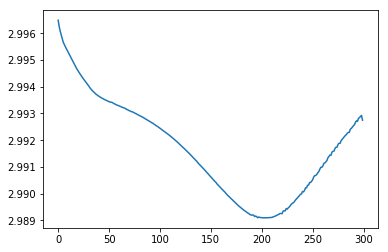

In [147]:
plt.plot([i for i in range(300)],validation_loss)
plt.show()

In [148]:
#re-initialize this net (so re-initialize the parameters)
net_svd25 = Net(26, 13, 1)
#print(list(net_svd80.parameters())[0])

In [149]:
#final model for svd_25_nn:

for epoch in range(204):
    for step, (batch_x, batch_y) in enumerate(train_total_loader):
        print('Epoch:', epoch, '| Step: ', step)
        
        b_x = Variable(batch_x.float())
        b_y = Variable(batch_y.float())
        
        prediction = net_svd25(b_x)
        train_loss = loss_func(prediction, b_y)
        print('training loss is: ',train_loss.data[0])
        print('\n')

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        

Epoch: 0 | Step:  0
training loss is:  3.2078075408935547


Epoch: 0 | Step:  1
training loss is:  3.147918701171875


Epoch: 0 | Step:  2
training loss is:  2.929027795791626


Epoch: 0 | Step:  3
training loss is:  3.118325710296631


Epoch: 0 | Step:  4
training loss is:  2.802255630493164


Epoch: 0 | Step:  5
training loss is:  2.7367489337921143


Epoch: 0 | Step:  6
training loss is:  2.993697166442871


Epoch: 0 | Step:  7
training loss is:  3.5121729373931885


Epoch: 0 | Step:  8
training loss is:  2.42962384223938


Epoch: 0 | Step:  9
training loss is:  3.260617256164551


Epoch: 0 | Step:  10
training loss is:  3.1747515201568604


Epoch: 0 | Step:  11
training loss is:  2.759303331375122


Epoch: 0 | Step:  12
training loss is:  2.6603760719299316


Epoch: 0 | Step:  13
training loss is:  3.8179855346679688


Epoch: 0 | Step:  14
training loss is:  2.493589401245117


Epoch: 0 | Step:  15
training loss is:  3.4278271198272705


Epoch: 0 | Step:  16
training loss is:  3.43

Epoch: 4 | Step:  25
training loss is:  3.727396249771118


Epoch: 4 | Step:  26
training loss is:  2.653099298477173


Epoch: 4 | Step:  27
training loss is:  3.273613452911377


Epoch: 5 | Step:  0
training loss is:  3.2078075408935547


Epoch: 5 | Step:  1
training loss is:  3.147918701171875


Epoch: 5 | Step:  2
training loss is:  2.929027795791626


Epoch: 5 | Step:  3
training loss is:  3.118325710296631


Epoch: 5 | Step:  4
training loss is:  2.802255630493164


Epoch: 5 | Step:  5
training loss is:  2.7367489337921143


Epoch: 5 | Step:  6
training loss is:  2.993697166442871


Epoch: 5 | Step:  7
training loss is:  3.5121729373931885


Epoch: 5 | Step:  8
training loss is:  2.42962384223938


Epoch: 5 | Step:  9
training loss is:  3.260617256164551


Epoch: 5 | Step:  10
training loss is:  3.1747515201568604


Epoch: 5 | Step:  11
training loss is:  2.759303331375122


Epoch: 5 | Step:  12
training loss is:  2.6603760719299316


Epoch: 5 | Step:  13
training loss is:  3.8179

Epoch: 9 | Step:  26
training loss is:  2.653099298477173


Epoch: 9 | Step:  27
training loss is:  3.273613452911377


Epoch: 10 | Step:  0
training loss is:  3.2078075408935547


Epoch: 10 | Step:  1
training loss is:  3.147918701171875


Epoch: 10 | Step:  2
training loss is:  2.929027795791626


Epoch: 10 | Step:  3
training loss is:  3.118325710296631


Epoch: 10 | Step:  4
training loss is:  2.802255630493164


Epoch: 10 | Step:  5
training loss is:  2.7367489337921143


Epoch: 10 | Step:  6
training loss is:  2.993697166442871


Epoch: 10 | Step:  7
training loss is:  3.5121729373931885


Epoch: 10 | Step:  8
training loss is:  2.42962384223938


Epoch: 10 | Step:  9
training loss is:  3.260617256164551


Epoch: 10 | Step:  10
training loss is:  3.1747515201568604


Epoch: 10 | Step:  11
training loss is:  2.759303331375122


Epoch: 10 | Step:  12
training loss is:  2.6603760719299316


Epoch: 10 | Step:  13
training loss is:  3.8179855346679688


Epoch: 10 | Step:  14
training 

Epoch: 15 | Step:  0
training loss is:  3.2078075408935547


Epoch: 15 | Step:  1
training loss is:  3.147918701171875


Epoch: 15 | Step:  2
training loss is:  2.929027795791626


Epoch: 15 | Step:  3
training loss is:  3.118325710296631


Epoch: 15 | Step:  4
training loss is:  2.802255630493164


Epoch: 15 | Step:  5
training loss is:  2.7367489337921143


Epoch: 15 | Step:  6
training loss is:  2.993697166442871


Epoch: 15 | Step:  7
training loss is:  3.5121729373931885


Epoch: 15 | Step:  8
training loss is:  2.42962384223938


Epoch: 15 | Step:  9
training loss is:  3.260617256164551


Epoch: 15 | Step:  10
training loss is:  3.1747515201568604


Epoch: 15 | Step:  11
training loss is:  2.759303331375122


Epoch: 15 | Step:  12
training loss is:  2.6603760719299316


Epoch: 15 | Step:  13
training loss is:  3.8179855346679688


Epoch: 15 | Step:  14
training loss is:  2.493589401245117


Epoch: 15 | Step:  15
training loss is:  3.4278271198272705


Epoch: 15 | Step:  16
traini

Epoch: 19 | Step:  24
training loss is:  3.054119348526001


Epoch: 19 | Step:  25
training loss is:  3.727396249771118


Epoch: 19 | Step:  26
training loss is:  2.653099298477173


Epoch: 19 | Step:  27
training loss is:  3.273613452911377


Epoch: 20 | Step:  0
training loss is:  3.2078075408935547


Epoch: 20 | Step:  1
training loss is:  3.147918701171875


Epoch: 20 | Step:  2
training loss is:  2.929027795791626


Epoch: 20 | Step:  3
training loss is:  3.118325710296631


Epoch: 20 | Step:  4
training loss is:  2.802255630493164


Epoch: 20 | Step:  5
training loss is:  2.7367489337921143


Epoch: 20 | Step:  6
training loss is:  2.993697166442871


Epoch: 20 | Step:  7
training loss is:  3.5121729373931885


Epoch: 20 | Step:  8
training loss is:  2.42962384223938


Epoch: 20 | Step:  9
training loss is:  3.260617256164551


Epoch: 20 | Step:  10
training loss is:  3.1747515201568604


Epoch: 20 | Step:  11
training loss is:  2.759303331375122


Epoch: 20 | Step:  12
training 

training loss is:  2.653099298477173


Epoch: 24 | Step:  27
training loss is:  3.273613452911377


Epoch: 25 | Step:  0
training loss is:  3.2078075408935547


Epoch: 25 | Step:  1
training loss is:  3.147918701171875


Epoch: 25 | Step:  2
training loss is:  2.929027795791626


Epoch: 25 | Step:  3
training loss is:  3.118325710296631


Epoch: 25 | Step:  4
training loss is:  2.802255630493164


Epoch: 25 | Step:  5
training loss is:  2.7367489337921143


Epoch: 25 | Step:  6
training loss is:  2.993697166442871


Epoch: 25 | Step:  7
training loss is:  3.5121729373931885


Epoch: 25 | Step:  8
training loss is:  2.42962384223938


Epoch: 25 | Step:  9
training loss is:  3.260617256164551


Epoch: 25 | Step:  10
training loss is:  3.1747515201568604


Epoch: 25 | Step:  11
training loss is:  2.759303331375122


Epoch: 25 | Step:  12
training loss is:  2.6603760719299316


Epoch: 25 | Step:  13
training loss is:  3.8179855346679688


Epoch: 25 | Step:  14
training loss is:  2.49358940

Epoch: 30 | Step:  0
training loss is:  3.2078075408935547


Epoch: 30 | Step:  1
training loss is:  3.147918701171875


Epoch: 30 | Step:  2
training loss is:  2.929027795791626


Epoch: 30 | Step:  3
training loss is:  3.118325710296631


Epoch: 30 | Step:  4
training loss is:  2.802255630493164


Epoch: 30 | Step:  5
training loss is:  2.7367489337921143


Epoch: 30 | Step:  6
training loss is:  2.993697166442871


Epoch: 30 | Step:  7
training loss is:  3.5121729373931885


Epoch: 30 | Step:  8
training loss is:  2.42962384223938


Epoch: 30 | Step:  9
training loss is:  3.260617256164551


Epoch: 30 | Step:  10
training loss is:  3.1747515201568604


Epoch: 30 | Step:  11
training loss is:  2.759303331375122


Epoch: 30 | Step:  12
training loss is:  2.6603760719299316


Epoch: 30 | Step:  13
training loss is:  3.8179855346679688


Epoch: 30 | Step:  14
training loss is:  2.493589401245117


Epoch: 30 | Step:  15
training loss is:  3.4278271198272705


Epoch: 30 | Step:  16
traini

Epoch: 35 | Step:  0
training loss is:  3.2078075408935547


Epoch: 35 | Step:  1
training loss is:  3.147918701171875


Epoch: 35 | Step:  2
training loss is:  2.929027795791626


Epoch: 35 | Step:  3
training loss is:  3.118325710296631


Epoch: 35 | Step:  4
training loss is:  2.802255630493164


Epoch: 35 | Step:  5
training loss is:  2.7367489337921143


Epoch: 35 | Step:  6
training loss is:  2.993697166442871


Epoch: 35 | Step:  7
training loss is:  3.5121729373931885


Epoch: 35 | Step:  8
training loss is:  2.42962384223938


Epoch: 35 | Step:  9
training loss is:  3.260617256164551


Epoch: 35 | Step:  10
training loss is:  3.1747515201568604


Epoch: 35 | Step:  11
training loss is:  2.759303331375122


Epoch: 35 | Step:  12
training loss is:  2.6603760719299316


Epoch: 35 | Step:  13
training loss is:  3.8179855346679688


Epoch: 35 | Step:  14
training loss is:  2.493589401245117


Epoch: 35 | Step:  15
training loss is:  3.4278271198272705


Epoch: 35 | Step:  16
traini

Epoch: 40 | Step:  0
training loss is:  3.2078075408935547


Epoch: 40 | Step:  1
training loss is:  3.147918701171875


Epoch: 40 | Step:  2
training loss is:  2.929027795791626


Epoch: 40 | Step:  3
training loss is:  3.118325710296631


Epoch: 40 | Step:  4
training loss is:  2.802255630493164


Epoch: 40 | Step:  5
training loss is:  2.7367489337921143


Epoch: 40 | Step:  6
training loss is:  2.993697166442871


Epoch: 40 | Step:  7
training loss is:  3.5121729373931885


Epoch: 40 | Step:  8
training loss is:  2.42962384223938


Epoch: 40 | Step:  9
training loss is:  3.260617256164551


Epoch: 40 | Step:  10
training loss is:  3.1747515201568604


Epoch: 40 | Step:  11
training loss is:  2.759303331375122


Epoch: 40 | Step:  12
training loss is:  2.6603760719299316


Epoch: 40 | Step:  13
training loss is:  3.8179855346679688


Epoch: 40 | Step:  14
training loss is:  2.493589401245117


Epoch: 40 | Step:  15
training loss is:  3.4278271198272705


Epoch: 40 | Step:  16
traini

Epoch: 45 | Step:  0
training loss is:  3.2078075408935547


Epoch: 45 | Step:  1
training loss is:  3.147918701171875


Epoch: 45 | Step:  2
training loss is:  2.929027795791626


Epoch: 45 | Step:  3
training loss is:  3.118325710296631


Epoch: 45 | Step:  4
training loss is:  2.802255630493164


Epoch: 45 | Step:  5
training loss is:  2.7367489337921143


Epoch: 45 | Step:  6
training loss is:  2.993697166442871


Epoch: 45 | Step:  7
training loss is:  3.5121729373931885


Epoch: 45 | Step:  8
training loss is:  2.42962384223938


Epoch: 45 | Step:  9
training loss is:  3.260617256164551


Epoch: 45 | Step:  10
training loss is:  3.1747515201568604


Epoch: 45 | Step:  11
training loss is:  2.759303331375122


Epoch: 45 | Step:  12
training loss is:  2.6603760719299316


Epoch: 45 | Step:  13
training loss is:  3.8179855346679688


Epoch: 45 | Step:  14
training loss is:  2.493589401245117


Epoch: 45 | Step:  15
training loss is:  3.4278271198272705


Epoch: 45 | Step:  16
traini

Epoch: 50 | Step:  0
training loss is:  3.2078075408935547


Epoch: 50 | Step:  1
training loss is:  3.147918701171875


Epoch: 50 | Step:  2
training loss is:  2.929027795791626


Epoch: 50 | Step:  3
training loss is:  3.118325710296631


Epoch: 50 | Step:  4
training loss is:  2.802255630493164


Epoch: 50 | Step:  5
training loss is:  2.7367489337921143


Epoch: 50 | Step:  6
training loss is:  2.993697166442871


Epoch: 50 | Step:  7
training loss is:  3.5121729373931885


Epoch: 50 | Step:  8
training loss is:  2.42962384223938


Epoch: 50 | Step:  9
training loss is:  3.260617256164551


Epoch: 50 | Step:  10
training loss is:  3.1747515201568604


Epoch: 50 | Step:  11
training loss is:  2.759303331375122


Epoch: 50 | Step:  12
training loss is:  2.6603760719299316


Epoch: 50 | Step:  13
training loss is:  3.8179855346679688


Epoch: 50 | Step:  14
training loss is:  2.493589401245117


Epoch: 50 | Step:  15
training loss is:  3.4278271198272705


Epoch: 50 | Step:  16
traini

Epoch: 55 | Step:  0
training loss is:  3.2078075408935547


Epoch: 55 | Step:  1
training loss is:  3.147918701171875


Epoch: 55 | Step:  2
training loss is:  2.929027795791626


Epoch: 55 | Step:  3
training loss is:  3.118325710296631


Epoch: 55 | Step:  4
training loss is:  2.802255630493164


Epoch: 55 | Step:  5
training loss is:  2.7367489337921143


Epoch: 55 | Step:  6
training loss is:  2.993697166442871


Epoch: 55 | Step:  7
training loss is:  3.5121729373931885


Epoch: 55 | Step:  8
training loss is:  2.42962384223938


Epoch: 55 | Step:  9
training loss is:  3.260617256164551


Epoch: 55 | Step:  10
training loss is:  3.1747515201568604


Epoch: 55 | Step:  11
training loss is:  2.759303331375122


Epoch: 55 | Step:  12
training loss is:  2.6603760719299316


Epoch: 55 | Step:  13
training loss is:  3.8179855346679688


Epoch: 55 | Step:  14
training loss is:  2.493589401245117


Epoch: 55 | Step:  15
training loss is:  3.4278271198272705


Epoch: 55 | Step:  16
traini

training loss is:  3.3969500064849854


Epoch: 59 | Step:  24
training loss is:  3.054119348526001


Epoch: 59 | Step:  25
training loss is:  3.727396249771118


Epoch: 59 | Step:  26
training loss is:  2.653099298477173


Epoch: 59 | Step:  27
training loss is:  3.273613452911377


Epoch: 60 | Step:  0
training loss is:  3.2078075408935547


Epoch: 60 | Step:  1
training loss is:  3.147918701171875


Epoch: 60 | Step:  2
training loss is:  2.929027795791626


Epoch: 60 | Step:  3
training loss is:  3.118325710296631


Epoch: 60 | Step:  4
training loss is:  2.802255630493164


Epoch: 60 | Step:  5
training loss is:  2.7367489337921143


Epoch: 60 | Step:  6
training loss is:  2.993697166442871


Epoch: 60 | Step:  7
training loss is:  3.5121729373931885


Epoch: 60 | Step:  8
training loss is:  2.42962384223938


Epoch: 60 | Step:  9
training loss is:  3.260617256164551


Epoch: 60 | Step:  10
training loss is:  3.1747515201568604


Epoch: 60 | Step:  11
training loss is:  2.759303331

Epoch: 65 | Step:  0
training loss is:  3.2078075408935547


Epoch: 65 | Step:  1
training loss is:  3.147918701171875


Epoch: 65 | Step:  2
training loss is:  2.929027795791626


Epoch: 65 | Step:  3
training loss is:  3.118325710296631


Epoch: 65 | Step:  4
training loss is:  2.802255630493164


Epoch: 65 | Step:  5
training loss is:  2.7367489337921143


Epoch: 65 | Step:  6
training loss is:  2.993697166442871


Epoch: 65 | Step:  7
training loss is:  3.5121729373931885


Epoch: 65 | Step:  8
training loss is:  2.42962384223938


Epoch: 65 | Step:  9
training loss is:  3.260617256164551


Epoch: 65 | Step:  10
training loss is:  3.1747515201568604


Epoch: 65 | Step:  11
training loss is:  2.759303331375122


Epoch: 65 | Step:  12
training loss is:  2.6603760719299316


Epoch: 65 | Step:  13
training loss is:  3.8179855346679688


Epoch: 65 | Step:  14
training loss is:  2.493589401245117


Epoch: 65 | Step:  15
training loss is:  3.4278271198272705


Epoch: 65 | Step:  16
traini


Epoch: 70 | Step:  0
training loss is:  3.2078075408935547


Epoch: 70 | Step:  1
training loss is:  3.147918701171875


Epoch: 70 | Step:  2
training loss is:  2.929027795791626


Epoch: 70 | Step:  3
training loss is:  3.118325710296631


Epoch: 70 | Step:  4
training loss is:  2.802255630493164


Epoch: 70 | Step:  5
training loss is:  2.7367489337921143


Epoch: 70 | Step:  6
training loss is:  2.993697166442871


Epoch: 70 | Step:  7
training loss is:  3.5121729373931885


Epoch: 70 | Step:  8
training loss is:  2.42962384223938


Epoch: 70 | Step:  9
training loss is:  3.260617256164551


Epoch: 70 | Step:  10
training loss is:  3.1747515201568604


Epoch: 70 | Step:  11
training loss is:  2.759303331375122


Epoch: 70 | Step:  12
training loss is:  2.6603760719299316


Epoch: 70 | Step:  13
training loss is:  3.8179855346679688


Epoch: 70 | Step:  14
training loss is:  2.493589401245117


Epoch: 70 | Step:  15
training loss is:  3.4278271198272705


Epoch: 70 | Step:  16
train

training loss is:  3.054119348526001


Epoch: 79 | Step:  25
training loss is:  3.727396249771118


Epoch: 79 | Step:  26
training loss is:  2.653099298477173


Epoch: 79 | Step:  27
training loss is:  3.273613452911377


Epoch: 80 | Step:  0
training loss is:  3.2078075408935547


Epoch: 80 | Step:  1
training loss is:  3.147918701171875


Epoch: 80 | Step:  2
training loss is:  2.929027795791626


Epoch: 80 | Step:  3
training loss is:  3.118325710296631


Epoch: 80 | Step:  4
training loss is:  2.802255630493164


Epoch: 80 | Step:  5
training loss is:  2.7367489337921143


Epoch: 80 | Step:  6
training loss is:  2.993697166442871


Epoch: 80 | Step:  7
training loss is:  3.5121729373931885


Epoch: 80 | Step:  8
training loss is:  2.42962384223938


Epoch: 80 | Step:  9
training loss is:  3.260617256164551


Epoch: 80 | Step:  10
training loss is:  3.1747515201568604


Epoch: 80 | Step:  11
training loss is:  2.759303331375122


Epoch: 80 | Step:  12
training loss is:  2.6603760719

training loss is:  3.054119348526001


Epoch: 84 | Step:  25
training loss is:  3.727396249771118


Epoch: 84 | Step:  26
training loss is:  2.653099298477173


Epoch: 84 | Step:  27
training loss is:  3.273613452911377


Epoch: 85 | Step:  0
training loss is:  3.2078075408935547


Epoch: 85 | Step:  1
training loss is:  3.147918701171875


Epoch: 85 | Step:  2
training loss is:  2.929027795791626


Epoch: 85 | Step:  3
training loss is:  3.118325710296631


Epoch: 85 | Step:  4
training loss is:  2.802255630493164


Epoch: 85 | Step:  5
training loss is:  2.7367489337921143


Epoch: 85 | Step:  6
training loss is:  2.993697166442871


Epoch: 85 | Step:  7
training loss is:  3.5121729373931885


Epoch: 85 | Step:  8
training loss is:  2.42962384223938


Epoch: 85 | Step:  9
training loss is:  3.260617256164551


Epoch: 85 | Step:  10
training loss is:  3.1747515201568604


Epoch: 85 | Step:  11
training loss is:  2.759303331375122


Epoch: 85 | Step:  12
training loss is:  2.6603760719

Epoch: 90 | Step:  0
training loss is:  3.2078075408935547


Epoch: 90 | Step:  1
training loss is:  3.147918701171875


Epoch: 90 | Step:  2
training loss is:  2.929027795791626


Epoch: 90 | Step:  3
training loss is:  3.118325710296631


Epoch: 90 | Step:  4
training loss is:  2.802255630493164


Epoch: 90 | Step:  5
training loss is:  2.7367489337921143


Epoch: 90 | Step:  6
training loss is:  2.993697166442871


Epoch: 90 | Step:  7
training loss is:  3.5121729373931885


Epoch: 90 | Step:  8
training loss is:  2.42962384223938


Epoch: 90 | Step:  9
training loss is:  3.260617256164551


Epoch: 90 | Step:  10
training loss is:  3.1747515201568604


Epoch: 90 | Step:  11
training loss is:  2.759303331375122


Epoch: 90 | Step:  12
training loss is:  2.6603760719299316


Epoch: 90 | Step:  13
training loss is:  3.8179855346679688


Epoch: 90 | Step:  14
training loss is:  2.493589401245117


Epoch: 90 | Step:  15
training loss is:  3.4278271198272705


Epoch: 90 | Step:  16
traini

Epoch: 95 | Step:  0
training loss is:  3.2078075408935547


Epoch: 95 | Step:  1
training loss is:  3.147918701171875


Epoch: 95 | Step:  2
training loss is:  2.929027795791626


Epoch: 95 | Step:  3
training loss is:  3.118325710296631


Epoch: 95 | Step:  4
training loss is:  2.802255630493164


Epoch: 95 | Step:  5
training loss is:  2.7367489337921143


Epoch: 95 | Step:  6
training loss is:  2.993697166442871


Epoch: 95 | Step:  7
training loss is:  3.5121729373931885


Epoch: 95 | Step:  8
training loss is:  2.42962384223938


Epoch: 95 | Step:  9
training loss is:  3.260617256164551


Epoch: 95 | Step:  10
training loss is:  3.1747515201568604


Epoch: 95 | Step:  11
training loss is:  2.759303331375122


Epoch: 95 | Step:  12
training loss is:  2.6603760719299316


Epoch: 95 | Step:  13
training loss is:  3.8179855346679688


Epoch: 95 | Step:  14
training loss is:  2.493589401245117


Epoch: 95 | Step:  15
training loss is:  3.4278271198272705


Epoch: 95 | Step:  16
traini

Epoch: 100 | Step:  0
training loss is:  3.2078075408935547


Epoch: 100 | Step:  1
training loss is:  3.147918701171875


Epoch: 100 | Step:  2
training loss is:  2.929027795791626


Epoch: 100 | Step:  3
training loss is:  3.118325710296631


Epoch: 100 | Step:  4
training loss is:  2.802255630493164


Epoch: 100 | Step:  5
training loss is:  2.7367489337921143


Epoch: 100 | Step:  6
training loss is:  2.993697166442871


Epoch: 100 | Step:  7
training loss is:  3.5121729373931885


Epoch: 100 | Step:  8
training loss is:  2.42962384223938


Epoch: 100 | Step:  9
training loss is:  3.260617256164551


Epoch: 100 | Step:  10
training loss is:  3.1747515201568604


Epoch: 100 | Step:  11
training loss is:  2.759303331375122


Epoch: 100 | Step:  12
training loss is:  2.6603760719299316


Epoch: 100 | Step:  13
training loss is:  3.8179855346679688


Epoch: 100 | Step:  14
training loss is:  2.493589401245117


Epoch: 100 | Step:  15
training loss is:  3.4278271198272705


Epoch: 100 |

Epoch: 105 | Step:  0
training loss is:  3.2078075408935547


Epoch: 105 | Step:  1
training loss is:  3.147918701171875


Epoch: 105 | Step:  2
training loss is:  2.929027795791626


Epoch: 105 | Step:  3
training loss is:  3.118325710296631


Epoch: 105 | Step:  4
training loss is:  2.802255630493164


Epoch: 105 | Step:  5
training loss is:  2.7367489337921143


Epoch: 105 | Step:  6
training loss is:  2.993697166442871


Epoch: 105 | Step:  7
training loss is:  3.5121729373931885


Epoch: 105 | Step:  8
training loss is:  2.42962384223938


Epoch: 105 | Step:  9
training loss is:  3.260617256164551


Epoch: 105 | Step:  10
training loss is:  3.1747515201568604


Epoch: 105 | Step:  11
training loss is:  2.759303331375122


Epoch: 105 | Step:  12
training loss is:  2.6603760719299316


Epoch: 105 | Step:  13
training loss is:  3.8179855346679688


Epoch: 105 | Step:  14
training loss is:  2.493589401245117


Epoch: 105 | Step:  15
training loss is:  3.4278271198272705


Epoch: 105 |

Epoch: 110 | Step:  0
training loss is:  3.2078075408935547


Epoch: 110 | Step:  1
training loss is:  3.147918701171875


Epoch: 110 | Step:  2
training loss is:  2.929027795791626


Epoch: 110 | Step:  3
training loss is:  3.118325710296631


Epoch: 110 | Step:  4
training loss is:  2.802255630493164


Epoch: 110 | Step:  5
training loss is:  2.7367489337921143


Epoch: 110 | Step:  6
training loss is:  2.993697166442871


Epoch: 110 | Step:  7
training loss is:  3.5121729373931885


Epoch: 110 | Step:  8
training loss is:  2.42962384223938


Epoch: 110 | Step:  9
training loss is:  3.260617256164551


Epoch: 110 | Step:  10
training loss is:  3.1747515201568604


Epoch: 110 | Step:  11
training loss is:  2.759303331375122


Epoch: 110 | Step:  12
training loss is:  2.6603760719299316


Epoch: 110 | Step:  13
training loss is:  3.8179855346679688


Epoch: 110 | Step:  14
training loss is:  2.493589401245117


Epoch: 110 | Step:  15
training loss is:  3.4278271198272705


Epoch: 110 |

Epoch: 115 | Step:  0
training loss is:  3.2078075408935547


Epoch: 115 | Step:  1
training loss is:  3.147918701171875


Epoch: 115 | Step:  2
training loss is:  2.929027795791626


Epoch: 115 | Step:  3
training loss is:  3.118325710296631


Epoch: 115 | Step:  4
training loss is:  2.802255630493164


Epoch: 115 | Step:  5
training loss is:  2.7367489337921143


Epoch: 115 | Step:  6
training loss is:  2.993697166442871


Epoch: 115 | Step:  7
training loss is:  3.5121729373931885


Epoch: 115 | Step:  8
training loss is:  2.42962384223938


Epoch: 115 | Step:  9
training loss is:  3.260617256164551


Epoch: 115 | Step:  10
training loss is:  3.1747515201568604


Epoch: 115 | Step:  11
training loss is:  2.759303331375122


Epoch: 115 | Step:  12
training loss is:  2.6603760719299316


Epoch: 115 | Step:  13
training loss is:  3.8179855346679688


Epoch: 115 | Step:  14
training loss is:  2.493589401245117


Epoch: 115 | Step:  15
training loss is:  3.4278271198272705


Epoch: 115 |

training loss is:  3.273613452911377


Epoch: 120 | Step:  0
training loss is:  3.2078075408935547


Epoch: 120 | Step:  1
training loss is:  3.147918701171875


Epoch: 120 | Step:  2
training loss is:  2.929027795791626


Epoch: 120 | Step:  3
training loss is:  3.118325710296631


Epoch: 120 | Step:  4
training loss is:  2.802255630493164


Epoch: 120 | Step:  5
training loss is:  2.7367489337921143


Epoch: 120 | Step:  6
training loss is:  2.993697166442871


Epoch: 120 | Step:  7
training loss is:  3.5121729373931885


Epoch: 120 | Step:  8
training loss is:  2.42962384223938


Epoch: 120 | Step:  9
training loss is:  3.260617256164551


Epoch: 120 | Step:  10
training loss is:  3.1747515201568604


Epoch: 120 | Step:  11
training loss is:  2.759303331375122


Epoch: 120 | Step:  12
training loss is:  2.6603760719299316


Epoch: 120 | Step:  13
training loss is:  3.8179855346679688


Epoch: 120 | Step:  14
training loss is:  2.493589401245117


Epoch: 120 | Step:  15
training loss

Epoch: 125 | Step:  0
training loss is:  3.2078075408935547


Epoch: 125 | Step:  1
training loss is:  3.147918701171875


Epoch: 125 | Step:  2
training loss is:  2.929027795791626


Epoch: 125 | Step:  3
training loss is:  3.118325710296631


Epoch: 125 | Step:  4
training loss is:  2.802255630493164


Epoch: 125 | Step:  5
training loss is:  2.7367489337921143


Epoch: 125 | Step:  6
training loss is:  2.993697166442871


Epoch: 125 | Step:  7
training loss is:  3.5121729373931885


Epoch: 125 | Step:  8
training loss is:  2.42962384223938


Epoch: 125 | Step:  9
training loss is:  3.260617256164551


Epoch: 125 | Step:  10
training loss is:  3.1747515201568604


Epoch: 125 | Step:  11
training loss is:  2.759303331375122


Epoch: 125 | Step:  12
training loss is:  2.6603760719299316


Epoch: 125 | Step:  13
training loss is:  3.8179855346679688


Epoch: 125 | Step:  14
training loss is:  2.493589401245117


Epoch: 125 | Step:  15
training loss is:  3.4278271198272705


Epoch: 125 |

Epoch: 130 | Step:  0
training loss is:  3.2078075408935547


Epoch: 130 | Step:  1
training loss is:  3.147918701171875


Epoch: 130 | Step:  2
training loss is:  2.929027795791626


Epoch: 130 | Step:  3
training loss is:  3.118325710296631


Epoch: 130 | Step:  4
training loss is:  2.802255630493164


Epoch: 130 | Step:  5
training loss is:  2.7367489337921143


Epoch: 130 | Step:  6
training loss is:  2.993697166442871


Epoch: 130 | Step:  7
training loss is:  3.5121729373931885


Epoch: 130 | Step:  8
training loss is:  2.42962384223938


Epoch: 130 | Step:  9
training loss is:  3.260617256164551


Epoch: 130 | Step:  10
training loss is:  3.1747515201568604


Epoch: 130 | Step:  11
training loss is:  2.759303331375122


Epoch: 130 | Step:  12
training loss is:  2.6603760719299316


Epoch: 130 | Step:  13
training loss is:  3.8179855346679688


Epoch: 130 | Step:  14
training loss is:  2.493589401245117


Epoch: 130 | Step:  15
training loss is:  3.4278271198272705


Epoch: 130 |

Epoch: 135 | Step:  0
training loss is:  3.2078075408935547


Epoch: 135 | Step:  1
training loss is:  3.147918701171875


Epoch: 135 | Step:  2
training loss is:  2.929027795791626


Epoch: 135 | Step:  3
training loss is:  3.118325710296631


Epoch: 135 | Step:  4
training loss is:  2.802255630493164


Epoch: 135 | Step:  5
training loss is:  2.7367489337921143


Epoch: 135 | Step:  6
training loss is:  2.993697166442871


Epoch: 135 | Step:  7
training loss is:  3.5121729373931885


Epoch: 135 | Step:  8
training loss is:  2.42962384223938


Epoch: 135 | Step:  9
training loss is:  3.260617256164551


Epoch: 135 | Step:  10
training loss is:  3.1747515201568604


Epoch: 135 | Step:  11
training loss is:  2.759303331375122


Epoch: 135 | Step:  12
training loss is:  2.6603760719299316


Epoch: 135 | Step:  13
training loss is:  3.8179855346679688


Epoch: 135 | Step:  14
training loss is:  2.493589401245117


Epoch: 135 | Step:  15
training loss is:  3.4278271198272705


Epoch: 135 |

Epoch: 140 | Step:  0
training loss is:  3.2078075408935547


Epoch: 140 | Step:  1
training loss is:  3.147918701171875


Epoch: 140 | Step:  2
training loss is:  2.929027795791626


Epoch: 140 | Step:  3
training loss is:  3.118325710296631


Epoch: 140 | Step:  4
training loss is:  2.802255630493164


Epoch: 140 | Step:  5
training loss is:  2.7367489337921143


Epoch: 140 | Step:  6
training loss is:  2.993697166442871


Epoch: 140 | Step:  7
training loss is:  3.5121729373931885


Epoch: 140 | Step:  8
training loss is:  2.42962384223938


Epoch: 140 | Step:  9
training loss is:  3.260617256164551


Epoch: 140 | Step:  10
training loss is:  3.1747515201568604


Epoch: 140 | Step:  11
training loss is:  2.759303331375122


Epoch: 140 | Step:  12
training loss is:  2.6603760719299316


Epoch: 140 | Step:  13
training loss is:  3.8179855346679688


Epoch: 140 | Step:  14
training loss is:  2.493589401245117


Epoch: 140 | Step:  15
training loss is:  3.4278271198272705


Epoch: 140 |

Epoch: 144 | Step:  21
training loss is:  2.9007418155670166


Epoch: 144 | Step:  22
training loss is:  3.5160152912139893


Epoch: 144 | Step:  23
training loss is:  3.3969500064849854


Epoch: 144 | Step:  24
training loss is:  3.054119348526001


Epoch: 144 | Step:  25
training loss is:  3.727396249771118


Epoch: 144 | Step:  26
training loss is:  2.653099298477173


Epoch: 144 | Step:  27
training loss is:  3.273613452911377


Epoch: 145 | Step:  0
training loss is:  3.2078075408935547


Epoch: 145 | Step:  1
training loss is:  3.147918701171875


Epoch: 145 | Step:  2
training loss is:  2.929027795791626


Epoch: 145 | Step:  3
training loss is:  3.118325710296631


Epoch: 145 | Step:  4
training loss is:  2.802255630493164


Epoch: 145 | Step:  5
training loss is:  2.7367489337921143


Epoch: 145 | Step:  6
training loss is:  2.993697166442871


Epoch: 145 | Step:  7
training loss is:  3.5121729373931885


Epoch: 145 | Step:  8
training loss is:  2.42962384223938


Epoch: 145 |

training loss is:  2.898970127105713


Epoch: 149 | Step:  20
training loss is:  3.5850307941436768


Epoch: 149 | Step:  21
training loss is:  2.9007418155670166


Epoch: 149 | Step:  22
training loss is:  3.5160152912139893


Epoch: 149 | Step:  23
training loss is:  3.3969500064849854


Epoch: 149 | Step:  24
training loss is:  3.054119348526001


Epoch: 149 | Step:  25
training loss is:  3.727396249771118


Epoch: 149 | Step:  26
training loss is:  2.653099298477173


Epoch: 149 | Step:  27
training loss is:  3.273613452911377


Epoch: 150 | Step:  0
training loss is:  3.2078075408935547


Epoch: 150 | Step:  1
training loss is:  3.147918701171875


Epoch: 150 | Step:  2
training loss is:  2.929027795791626


Epoch: 150 | Step:  3
training loss is:  3.118325710296631


Epoch: 150 | Step:  4
training loss is:  2.802255630493164


Epoch: 150 | Step:  5
training loss is:  2.7367489337921143


Epoch: 150 | Step:  6
training loss is:  2.993697166442871


Epoch: 150 | Step:  7
training l

Epoch: 155 | Step:  0
training loss is:  3.2078075408935547


Epoch: 155 | Step:  1
training loss is:  3.147918701171875


Epoch: 155 | Step:  2
training loss is:  2.929027795791626


Epoch: 155 | Step:  3
training loss is:  3.118325710296631


Epoch: 155 | Step:  4
training loss is:  2.802255630493164


Epoch: 155 | Step:  5
training loss is:  2.7367489337921143


Epoch: 155 | Step:  6
training loss is:  2.993697166442871


Epoch: 155 | Step:  7
training loss is:  3.5121729373931885


Epoch: 155 | Step:  8
training loss is:  2.42962384223938


Epoch: 155 | Step:  9
training loss is:  3.260617256164551


Epoch: 155 | Step:  10
training loss is:  3.1747515201568604


Epoch: 155 | Step:  11
training loss is:  2.759303331375122


Epoch: 155 | Step:  12
training loss is:  2.6603760719299316


Epoch: 155 | Step:  13
training loss is:  3.8179855346679688


Epoch: 155 | Step:  14
training loss is:  2.493589401245117


Epoch: 155 | Step:  15
training loss is:  3.4278271198272705


Epoch: 155 |

Epoch: 159 | Step:  26
training loss is:  2.653099298477173


Epoch: 159 | Step:  27
training loss is:  3.273613452911377


Epoch: 160 | Step:  0
training loss is:  3.2078075408935547


Epoch: 160 | Step:  1
training loss is:  3.147918701171875


Epoch: 160 | Step:  2
training loss is:  2.929027795791626


Epoch: 160 | Step:  3
training loss is:  3.118325710296631


Epoch: 160 | Step:  4
training loss is:  2.802255630493164


Epoch: 160 | Step:  5
training loss is:  2.7367489337921143


Epoch: 160 | Step:  6
training loss is:  2.993697166442871


Epoch: 160 | Step:  7
training loss is:  3.5121729373931885


Epoch: 160 | Step:  8
training loss is:  2.42962384223938


Epoch: 160 | Step:  9
training loss is:  3.260617256164551


Epoch: 160 | Step:  10
training loss is:  3.1747515201568604


Epoch: 160 | Step:  11
training loss is:  2.759303331375122


Epoch: 160 | Step:  12
training loss is:  2.6603760719299316


Epoch: 160 | Step:  13
training loss is:  3.8179855346679688


Epoch: 160 | 

training loss is:  3.3969500064849854


Epoch: 164 | Step:  24
training loss is:  3.054119348526001


Epoch: 164 | Step:  25
training loss is:  3.727396249771118


Epoch: 164 | Step:  26
training loss is:  2.653099298477173


Epoch: 164 | Step:  27
training loss is:  3.273613452911377


Epoch: 165 | Step:  0
training loss is:  3.2078075408935547


Epoch: 165 | Step:  1
training loss is:  3.147918701171875


Epoch: 165 | Step:  2
training loss is:  2.929027795791626


Epoch: 165 | Step:  3
training loss is:  3.118325710296631


Epoch: 165 | Step:  4
training loss is:  2.802255630493164


Epoch: 165 | Step:  5
training loss is:  2.7367489337921143


Epoch: 165 | Step:  6
training loss is:  2.993697166442871


Epoch: 165 | Step:  7
training loss is:  3.5121729373931885


Epoch: 165 | Step:  8
training loss is:  2.42962384223938


Epoch: 165 | Step:  9
training loss is:  3.260617256164551


Epoch: 165 | Step:  10
training loss is:  3.1747515201568604


Epoch: 165 | Step:  11
training loss 

Epoch: 170 | Step:  0
training loss is:  3.2078075408935547


Epoch: 170 | Step:  1
training loss is:  3.147918701171875


Epoch: 170 | Step:  2
training loss is:  2.929027795791626


Epoch: 170 | Step:  3
training loss is:  3.118325710296631


Epoch: 170 | Step:  4
training loss is:  2.802255630493164


Epoch: 170 | Step:  5
training loss is:  2.7367489337921143


Epoch: 170 | Step:  6
training loss is:  2.993697166442871


Epoch: 170 | Step:  7
training loss is:  3.5121729373931885


Epoch: 170 | Step:  8
training loss is:  2.42962384223938


Epoch: 170 | Step:  9
training loss is:  3.260617256164551


Epoch: 170 | Step:  10
training loss is:  3.1747515201568604


Epoch: 170 | Step:  11
training loss is:  2.759303331375122


Epoch: 170 | Step:  12
training loss is:  2.6603760719299316


Epoch: 170 | Step:  13
training loss is:  3.8179855346679688


Epoch: 170 | Step:  14
training loss is:  2.493589401245117


Epoch: 170 | Step:  15
training loss is:  3.4278271198272705


Epoch: 170 |

Epoch: 174 | Step:  25
training loss is:  3.727396249771118


Epoch: 174 | Step:  26
training loss is:  2.653099298477173


Epoch: 174 | Step:  27
training loss is:  3.273613452911377


Epoch: 175 | Step:  0
training loss is:  3.2078075408935547


Epoch: 175 | Step:  1
training loss is:  3.147918701171875


Epoch: 175 | Step:  2
training loss is:  2.929027795791626


Epoch: 175 | Step:  3
training loss is:  3.118325710296631


Epoch: 175 | Step:  4
training loss is:  2.802255630493164


Epoch: 175 | Step:  5
training loss is:  2.7367489337921143


Epoch: 175 | Step:  6
training loss is:  2.993697166442871


Epoch: 175 | Step:  7
training loss is:  3.5121729373931885


Epoch: 175 | Step:  8
training loss is:  2.42962384223938


Epoch: 175 | Step:  9
training loss is:  3.260617256164551


Epoch: 175 | Step:  10
training loss is:  3.1747515201568604


Epoch: 175 | Step:  11
training loss is:  2.759303331375122


Epoch: 175 | Step:  12
training loss is:  2.6603760719299316


Epoch: 175 | S

Epoch: 180 | Step:  0
training loss is:  3.2078075408935547


Epoch: 180 | Step:  1
training loss is:  3.147918701171875


Epoch: 180 | Step:  2
training loss is:  2.929027795791626


Epoch: 180 | Step:  3
training loss is:  3.118325710296631


Epoch: 180 | Step:  4
training loss is:  2.802255630493164


Epoch: 180 | Step:  5
training loss is:  2.7367489337921143


Epoch: 180 | Step:  6
training loss is:  2.993697166442871


Epoch: 180 | Step:  7
training loss is:  3.5121729373931885


Epoch: 180 | Step:  8
training loss is:  2.42962384223938


Epoch: 180 | Step:  9
training loss is:  3.260617256164551


Epoch: 180 | Step:  10
training loss is:  3.1747515201568604


Epoch: 180 | Step:  11
training loss is:  2.759303331375122


Epoch: 180 | Step:  12
training loss is:  2.6603760719299316


Epoch: 180 | Step:  13
training loss is:  3.8179855346679688


Epoch: 180 | Step:  14
training loss is:  2.493589401245117


Epoch: 180 | Step:  15
training loss is:  3.4278271198272705


Epoch: 180 |

Epoch: 185 | Step:  0
training loss is:  3.2078075408935547


Epoch: 185 | Step:  1
training loss is:  3.147918701171875


Epoch: 185 | Step:  2
training loss is:  2.929027795791626


Epoch: 185 | Step:  3
training loss is:  3.118325710296631


Epoch: 185 | Step:  4
training loss is:  2.802255630493164


Epoch: 185 | Step:  5
training loss is:  2.7367489337921143


Epoch: 185 | Step:  6
training loss is:  2.993697166442871


Epoch: 185 | Step:  7
training loss is:  3.5121729373931885


Epoch: 185 | Step:  8
training loss is:  2.42962384223938


Epoch: 185 | Step:  9
training loss is:  3.260617256164551


Epoch: 185 | Step:  10
training loss is:  3.1747515201568604


Epoch: 185 | Step:  11
training loss is:  2.759303331375122


Epoch: 185 | Step:  12
training loss is:  2.6603760719299316


Epoch: 185 | Step:  13
training loss is:  3.8179855346679688


Epoch: 185 | Step:  14
training loss is:  2.493589401245117


Epoch: 185 | Step:  15
training loss is:  3.4278271198272705


Epoch: 185 |

training loss is:  3.727396249771118


Epoch: 189 | Step:  26
training loss is:  2.653099298477173


Epoch: 189 | Step:  27
training loss is:  3.273613452911377


Epoch: 190 | Step:  0
training loss is:  3.2078075408935547


Epoch: 190 | Step:  1
training loss is:  3.147918701171875


Epoch: 190 | Step:  2
training loss is:  2.929027795791626


Epoch: 190 | Step:  3
training loss is:  3.118325710296631


Epoch: 190 | Step:  4
training loss is:  2.802255630493164


Epoch: 190 | Step:  5
training loss is:  2.7367489337921143


Epoch: 190 | Step:  6
training loss is:  2.993697166442871


Epoch: 190 | Step:  7
training loss is:  3.5121729373931885


Epoch: 190 | Step:  8
training loss is:  2.42962384223938


Epoch: 190 | Step:  9
training loss is:  3.260617256164551


Epoch: 190 | Step:  10
training loss is:  3.1747515201568604


Epoch: 190 | Step:  11
training loss is:  2.759303331375122


Epoch: 190 | Step:  12
training loss is:  2.6603760719299316


Epoch: 190 | Step:  13
training loss 

Epoch: 195 | Step:  0
training loss is:  3.2078075408935547


Epoch: 195 | Step:  1
training loss is:  3.147918701171875


Epoch: 195 | Step:  2
training loss is:  2.929027795791626


Epoch: 195 | Step:  3
training loss is:  3.118325710296631


Epoch: 195 | Step:  4
training loss is:  2.802255630493164


Epoch: 195 | Step:  5
training loss is:  2.7367489337921143


Epoch: 195 | Step:  6
training loss is:  2.993697166442871


Epoch: 195 | Step:  7
training loss is:  3.5121729373931885


Epoch: 195 | Step:  8
training loss is:  2.42962384223938


Epoch: 195 | Step:  9
training loss is:  3.260617256164551


Epoch: 195 | Step:  10
training loss is:  3.1747515201568604


Epoch: 195 | Step:  11
training loss is:  2.759303331375122


Epoch: 195 | Step:  12
training loss is:  2.6603760719299316


Epoch: 195 | Step:  13
training loss is:  3.8179855346679688


Epoch: 195 | Step:  14
training loss is:  2.493589401245117


Epoch: 195 | Step:  15
training loss is:  3.4278271198272705


Epoch: 195 |

Epoch: 200 | Step:  0
training loss is:  3.2078075408935547


Epoch: 200 | Step:  1
training loss is:  3.147918701171875


Epoch: 200 | Step:  2
training loss is:  2.929027795791626


Epoch: 200 | Step:  3
training loss is:  3.118325710296631


Epoch: 200 | Step:  4
training loss is:  2.802255630493164


Epoch: 200 | Step:  5
training loss is:  2.7367489337921143


Epoch: 200 | Step:  6
training loss is:  2.993697166442871


Epoch: 200 | Step:  7
training loss is:  3.5121729373931885


Epoch: 200 | Step:  8
training loss is:  2.42962384223938


Epoch: 200 | Step:  9
training loss is:  3.260617256164551


Epoch: 200 | Step:  10
training loss is:  3.1747515201568604


Epoch: 200 | Step:  11
training loss is:  2.759303331375122


Epoch: 200 | Step:  12
training loss is:  2.6603760719299316


Epoch: 200 | Step:  13
training loss is:  3.8179855346679688


Epoch: 200 | Step:  14
training loss is:  2.493589401245117


Epoch: 200 | Step:  15
training loss is:  3.4278271198272705


Epoch: 200 |

In [155]:
#save the network
torch.save(net_svd25.state_dict(),'net_svd25.pkl')

In [62]:
#restore the network
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden) 
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict=torch.nn.Linear(n_hidden,1) 
    #forward:
    def forward(self,x):
        x=F.relu(self.hidden(x)) 
        x=self.hidden2(x)
        x=self.predict(x) 
        return x
    
net_svd25 = Net(26, 13, 1)
optimizer=torch.optim.SGD(net_svd25.parameters(),lr=0.03)
loss_func=torch.nn.MSELoss()
loss_func_MAe=torch.nn.L1Loss()

net_svd25.load_state_dict(torch.load('net_svd25.pkl'))

In [63]:
#final prediction
final_prediction_y = net_svd25(x_test).data.numpy()
true_y = y_test.data.numpy()
plt.scatter(true_y, final_prediction_y)

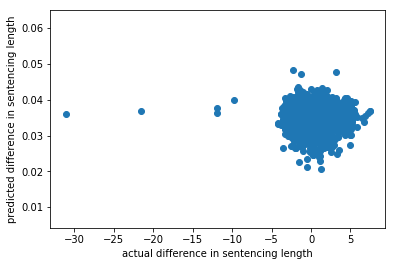

In [64]:
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

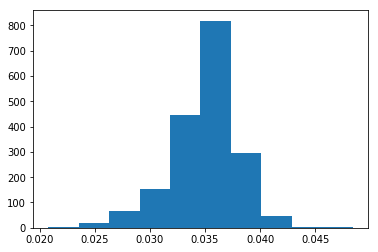

In [65]:
plt.hist(final_prediction_y)
plt.show()

In [66]:
#final result avoid overfitting
print('mean squared error is: {}'.format(mean_squared_error(true_y, final_prediction_y)))
print('mean absolute error is {}'.format(mean_absolute_error(true_y, final_prediction_y)))

mean squared error is: 4.138397216796875
mean absolute error is 1.4016469717025757


In [67]:
#std
np.std(final_prediction_y)

0.0030910487

In [68]:
np.mean(final_prediction_y)

0.035041995

In [69]:
print('R2 is {}'.format(r2_score(true_y, final_prediction_y)))

R2 is -0.00843335692919056


# Doc2Vec

In [87]:
##############doc2vec25

In [70]:
#columns wanted 
doc_dimension = [str(i) for i in range(1,26)]
col_wanted = ['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart']
col_wanted.extend(doc_dimension)
col_wanted.append('length_3m_dif')


In [71]:
col_wanted

['index',
 'Affirmed',
 'AffirmedInPart',
 'Reversed',
 'ReversedInPart',
 'Vacated',
 'VacatedInPart',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 'length_3m_dif']

In [72]:
data_use_doc2vec = doc2vec25_data[col_wanted]

In [73]:
data_use_doc2vec.head()

index  Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  \
0   2304       1.0             0.0       0.0             0.0      0.0   
1   2796       1.0             0.0       0.0             0.0      0.0   
2   2805       0.0             0.0       1.0             0.0      0.0   
3   2814       1.0             0.0       0.0             0.0      0.0   
4   2816       1.0             0.0       0.0             0.0      0.0   

   VacatedInPart         1         2         3      ...              17  \
0            0.0 -0.197177 -0.188748 -0.068599      ...        0.061231   
1            0.0 -0.450216 -1.339544 -0.212832      ...        1.343933   
2            0.0 -0.931033 -1.233175 -0.112180      ...        1.354613   
3            0.0 -0.350747 -1.641232 -0.401192      ...        1.081693   
4            0.0 -2.606537 -4.118605  1.091091      ...        3.696071   

         18        19        20        21        22        23        24  \
0 -0.126908 -0.002955  0.213550 -0.131750  0.228531  0.042944 -0.171523   
1 -0.374269  1.679431  0.029173 -1.362654  1.248829  0.541124 -0.957147   
2 -0.505990  1.299452  0.829362 -1.393812  0.731786  0.097624 -0.681422   
3 -0.326547  1.383826  0.039796 -1.208854  0.476434  0.370994 -0.581173   
4 -2.333135  4.640374  0.820736 -3.130388  1.930407  0.186511 -0.921918   

         25  length_3m_dif  
0  0.067503      -1.099144  
1 -0.719336       1.663181  
2  0.108787      -3.563471  
3 -0.224242       0.760434  
4 -3.437350      -0.630426  

[5 rows x 33 columns]

In [93]:
from sklearn.cross_validation import train_test_split
from numpy.random import RandomState

RS1 = RandomState(1)
train_data_doc2vec = data_use_doc2vec.sample(frac = 0.75, random_state = 200)
test_data_doc2vec = data_use_doc2vec.drop(train_data_doc2vec.index)

x_train_doc2vec = train_data_doc2vec[[str(i) for i in range(1,26)]]
x_test_doc2vec = test_data_doc2vec[[str(i) for i in range(1,26)]]
Y_train_doc2vec = train_data_doc2vec['length_3m_dif']
Y_test_doc2vec = test_data_doc2vec['length_3m_dif']

print(train_data_doc2vec.shape)
print(test_data_doc2vec.shape)

(6326, 33)
(2108, 33)


In [94]:
train_data_doc2vec.head()

index  Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  \
5577  35638       0.0             0.0       0.0             1.0      0.0   
2072  24468       1.0             0.0       0.0             0.0      0.0   
7052  39230       1.0             0.0       0.0             0.0      0.0   
1582  22883       1.0             0.0       0.0             0.0      0.0   
587   16551       0.0             0.0       0.0             0.0      0.0   

      VacatedInPart         1         2         3      ...              17  \
5577            0.0 -1.367167 -3.016824  0.113453      ...        3.136178   
2072            0.0 -0.326839 -0.526210 -0.254383      ...        0.683928   
7052            0.0  0.021020 -1.644101  0.510810      ...        0.751334   
1582            0.0 -0.609428 -2.635859  0.826938      ...        2.211540   
587             0.0 -2.236558 -2.712682  0.541507      ...        1.753663   

            18        19        20        21        22        23        24  \
5577 -1.043852  2.971655 -0.419195 -2.556420  1.305907  0.444053 -0.853082   
2072 -0.085286  0.638021  0.251132 -0.642004  0.320652  0.265809  0.144042   
7052 -0.489118  1.195171 -0.293293 -0.663469  0.923524  0.550316 -0.381201   
1582 -0.619426  2.296391 -0.179579 -2.115481  1.070114  1.233299 -0.605414   
587  -1.061940  4.273231 -0.703554 -1.482317  2.201542  1.038048 -1.222348   

            25  length_3m_dif  
5577 -1.239613      -0.766357  
2072 -0.607275       0.608711  
7052 -0.856544       0.228592  
1582 -0.424502      -3.150298  
587  -0.709663      -2.467751  

[5 rows x 33 columns]

In [95]:
test_data_doc2vec.head()

index  Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  \
2    2805       0.0             0.0       1.0             0.0      0.0   
5    2817       1.0             0.0       0.0             0.0      0.0   
17   3065       1.0             0.0       0.0             0.0      0.0   
18   3392       1.0             0.0       0.0             0.0      0.0   
23   3498       1.0             0.0       0.0             0.0      0.0   

    VacatedInPart         1         2         3      ...              17  \
2             0.0 -0.931033 -1.233175 -0.112180      ...        1.354613   
5             0.0 -2.335836 -3.747759 -1.179198      ...        5.489940   
17            0.0 -1.328795 -4.648284  0.039491      ...        4.536884   
18            0.0 -2.720483 -3.451627  0.967757      ...        4.487874   
23            0.0 -1.248572 -4.083002 -0.669515      ...        4.485900   

          18        19        20        21        22        23        24  \
2  -0.505990  1.299452  0.829362 -1.393812  0.731786  0.097624 -0.681422   
5  -0.075253  4.901378  0.708430 -2.826149  2.710582  1.430217 -0.179396   
17 -1.873427  3.430019  0.064568 -2.955998  1.770746  0.689454 -1.140894   
18 -1.688476  4.314071  0.832259 -2.984108  2.411142  1.756364 -0.709056   
23 -1.025336  4.284745  0.152373 -2.999909  1.488760  0.691673 -1.505569   

          25  length_3m_dif  
2   0.108787      -3.563471  
5  -2.447605       3.591201  
17 -0.769586       0.959357  
18 -1.568892      -1.595323  
23 -2.010417      -2.045180  

[5 rows x 33 columns]

In [96]:
train_data_doc2vec['res']=train_data_doc2vec['Affirmed']+train_data_doc2vec['AffirmedInPart']+train_data_doc2vec['Reversed']+train_data_doc2vec['ReversedInPart']+train_data_doc2vec['Vacated']+train_data_doc2vec['VacatedInPart']
test_data_doc2vec['res']=test_data_doc2vec['Affirmed']+test_data_doc2vec['AffirmedInPart']+test_data_doc2vec['Reversed']+test_data_doc2vec['ReversedInPart']+test_data_doc2vec['Vacated']+test_data_doc2vec['VacatedInPart']

In [97]:
train_data_doc2vec.head()

index  Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  \
5577  35638       0.0             0.0       0.0             1.0      0.0   
2072  24468       1.0             0.0       0.0             0.0      0.0   
7052  39230       1.0             0.0       0.0             0.0      0.0   
1582  22883       1.0             0.0       0.0             0.0      0.0   
587   16551       0.0             0.0       0.0             0.0      0.0   

      VacatedInPart         1         2         3 ...         18        19  \
5577            0.0 -1.367167 -3.016824  0.113453 ...  -1.043852  2.971655   
2072            0.0 -0.326839 -0.526210 -0.254383 ...  -0.085286  0.638021   
7052            0.0  0.021020 -1.644101  0.510810 ...  -0.489118  1.195171   
1582            0.0 -0.609428 -2.635859  0.826938 ...  -0.619426  2.296391   
587             0.0 -2.236558 -2.712682  0.541507 ...  -1.061940  4.273231   

            20        21        22        23        24        25  \
5577 -0.419195 -2.556420  1.305907  0.444053 -0.853082 -1.239613   
2072  0.251132 -0.642004  0.320652  0.265809  0.144042 -0.607275   
7052 -0.293293 -0.663469  0.923524  0.550316 -0.381201 -0.856544   
1582 -0.179579 -2.115481  1.070114  1.233299 -0.605414 -0.424502   
587  -0.703554 -1.482317  2.201542  1.038048 -1.222348 -0.709663   

      length_3m_dif  res  
5577      -0.766357  1.0  
2072       0.608711  1.0  
7052       0.228592  1.0  
1582      -3.150298  1.0  
587       -2.467751  0.0  

[5 rows x 34 columns]

In [98]:
test_data_doc2vec.head()

index  Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  \
2    2805       0.0             0.0       1.0             0.0      0.0   
5    2817       1.0             0.0       0.0             0.0      0.0   
17   3065       1.0             0.0       0.0             0.0      0.0   
18   3392       1.0             0.0       0.0             0.0      0.0   
23   3498       1.0             0.0       0.0             0.0      0.0   

    VacatedInPart         1         2         3 ...         18        19  \
2             0.0 -0.931033 -1.233175 -0.112180 ...  -0.505990  1.299452   
5             0.0 -2.335836 -3.747759 -1.179198 ...  -0.075253  4.901378   
17            0.0 -1.328795 -4.648284  0.039491 ...  -1.873427  3.430019   
18            0.0 -2.720483 -3.451627  0.967757 ...  -1.688476  4.314071   
23            0.0 -1.248572 -4.083002 -0.669515 ...  -1.025336  4.284745   

          20        21        22        23        24        25  length_3m_dif  \
2   0.829362 -1.393812  0.731786  0.097624 -0.681422  0.108787      -3.563471   
5   0.708430 -2.826149  2.710582  1.430217 -0.179396 -2.447605       3.591201   
17  0.064568 -2.955998  1.770746  0.689454 -1.140894 -0.769586       0.959357   
18  0.832259 -2.984108  2.411142  1.756364 -0.709056 -1.568892      -1.595323   
23  0.152373 -2.999909  1.488760  0.691673 -1.505569 -2.010417      -2.045180   

    res  
2   1.0  
5   1.0  
17  1.0  
18  1.0  
23  1.0  

[5 rows x 34 columns]

In [99]:
#keep only row with res ==1
train_data_doc2vec=train_data_doc2vec[train_data_doc2vec['res']==1]
test_data_doc2vec=test_data_doc2vec[test_data_doc2vec['res']==1]

In [100]:
def combine_reverse(row):
    if row['Reversed']==1:
        return 2
    
    elif row['Vacated']==1:
        return 2
    
    elif row['Affirmed']==1:
        return 1

In [101]:
train_data_doc2vec['Res_binary'] = train_data_doc2vec.apply(combine_reverse, axis=1)
test_data_doc2vec['Res_binary'] = test_data_doc2vec.apply(combine_reverse, axis=1)

In [102]:
train_data_doc2vec=train_data_doc2vec[(train_data_doc2vec['Res_binary']==1) | (train_data_doc2vec['Res_binary']==2)]
test_data_doc2vec=test_data_doc2vec[(test_data_doc2vec['Res_binary']==1) | (test_data_doc2vec['Res_binary']==2)]

In [103]:
train_data_doc2vec= train_data_doc2vec.drop(['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','res'],axis=1)
test_data_doc2vec= test_data_doc2vec.drop(['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','res'],axis=1)

In [343]:
#make a copy
#doc2vec_train_nn_df = train_data_doc2vec.iloc[:,:]
#doc2vec_test_nn_df = test_data_doc2vec.iloc[:,:]

In [105]:
train_data_doc2vec['y'] = train_data_doc2vec['length_3m_dif']
test_data_doc2vec['y'] = test_data_doc2vec['length_3m_dif']

In [106]:
train_data_doc2vec.drop(['length_3m_dif','index'],axis=1, inplace=True)
test_data_doc2vec.drop(['length_3m_dif','index'],axis=1,inplace=True)

In [107]:
train_data_doc2vec.head()

1         2         3         4         5         6         7  \
2072 -0.326839 -0.526210 -0.254383 -0.661842  0.568348  0.333107 -0.101216   
7052  0.021020 -1.644101  0.510810 -1.636032  0.752580 -0.162840 -0.157619   
1582 -0.609428 -2.635859  0.826938 -1.316913  1.163220 -0.217264 -1.174153   
2054 -0.215344 -2.186464 -0.196173 -1.053601  0.518545 -0.125764 -0.451903   
6602 -0.339514 -1.579341 -0.022062 -1.320665  0.566175 -0.507670 -0.112583   

             8         9        10    ...           18        19        20  \
2072 -0.078940 -0.254225  0.060970    ...    -0.085286  0.638021  0.251132   
7052 -0.503159  0.017485 -0.565376    ...    -0.489118  1.195171 -0.293293   
1582 -0.458635 -0.068162 -0.823959    ...    -0.619426  2.296391 -0.179579   
2054  0.016925 -0.501629 -0.468523    ...    -0.387002  1.032556  0.369332   
6602 -0.318907  0.100674 -0.776049    ...    -0.224279  1.308390 -0.460411   

            21        22        23        24        25  Res_binary         y  
2072 -0.642004  0.320652  0.265809  0.144042 -0.607275         1.0  0.608711  
7052 -0.663469  0.923524  0.550316 -0.381201 -0.856544         1.0  0.228592  
1582 -2.115481  1.070114  1.233299 -0.605414 -0.424502         1.0 -3.150298  
2054 -1.098333  1.040124 -0.029872 -0.383281 -0.385926         1.0 -1.195514  
6602 -0.644846  0.565994  0.012567 -0.569460 -0.459856         2.0 -0.082692  

[5 rows x 27 columns]

In [108]:
test_data_doc2vec.head()

1         2         3         4         5         6         7  \
2  -0.931033 -1.233175 -0.112180 -0.397802  0.527634 -0.107107 -0.023070   
5  -2.335836 -3.747759 -1.179198 -2.551308  3.610590 -0.490248 -0.029449   
17 -1.328795 -4.648284  0.039491 -2.415815  2.023083 -0.204755 -0.219094   
18 -2.720483 -3.451627  0.967757 -2.539420  2.717116 -2.200420 -1.693256   
23 -1.248572 -4.083002 -0.669515 -2.539982  2.612991 -0.054811 -0.641946   

           8         9        10    ...           18        19        20  \
2  -0.256488 -0.273522 -0.110799    ...    -0.505990  1.299452  0.829362   
5  -1.145173  0.729769 -1.860136    ...    -0.075253  4.901378  0.708430   
17 -0.958543 -1.099047 -1.595964    ...    -1.873427  3.430019  0.064568   
18 -0.354213 -1.755875 -1.758561    ...    -1.688476  4.314071  0.832259   
23 -0.669483 -0.786405 -1.335899    ...    -1.025336  4.284745  0.152373   

          21        22        23        24        25  Res_binary         y  
2  -1.393812  0.731786  0.097624 -0.681422  0.108787         2.0 -3.563471  
5  -2.826149  2.710582  1.430217 -0.179396 -2.447605         1.0  3.591201  
17 -2.955998  1.770746  0.689454 -1.140894 -0.769586         1.0  0.959357  
18 -2.984108  2.411142  1.756364 -0.709056 -1.568892         1.0 -1.595323  
23 -2.999909  1.488760  0.691673 -1.505569 -2.010417         1.0 -2.045180  

[5 rows x 27 columns]

In [112]:
#save the data (after dimension reduction)
train_data_doc2vec.to_csv("train_data_doc2vec.csv", sep=',')
test_data_doc2vec.to_csv("test_data_doc2vec.csv", sep=',')

In [68]:
#load data to avoid confusion
train_data_doc2vec = pd.read_csv("train_data_doc2vec.csv", sep=',')
test_data_doc2vec = pd.read_csv("test_data_doc2vec.csv", sep=',')

In [75]:
#basic nn architecture:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F

#used for batch training:
import torch.utils.data as Data

In [76]:
xy_doc2vec_train = np.loadtxt("train_data_doc2vec.csv", delimiter = ',' ,skiprows=1, dtype= np.float64 )
xy_doc2vec_test = np.loadtxt("test_data_doc2vec.csv", delimiter = ',', skiprows =1 ,dtype = np.float64)

In [77]:
x_test = torch.from_numpy(xy_doc2vec_test[:,1:-1])
y_test = torch.from_numpy(xy_doc2vec_test[:,[-1]])
x_test = Variable(x_test.float())
y_test = Variable(y_test.float())

In [78]:
x_validation = torch.from_numpy(xy_doc2vec_train[:1260,1:-1])
y_validation = torch.from_numpy(xy_doc2vec_train[:1260,[-1]])
x_train = torch.from_numpy(xy_doc2vec_train[1260:,1:-1])
y_train = torch.from_numpy(xy_doc2vec_train[1260:,[-1]])

x_train_total = torch.from_numpy(xy_doc2vec_train[:,1:-1])
y_train_total = torch.from_numpy(xy_doc2vec_train[:,[-1]])

In [79]:
#define our own nn:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden) 
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict=torch.nn.Linear(n_hidden,1) 
    #forward:
    def forward(self,x):
        x=F.relu(self.hidden(x)) 
        x=self.hidden2(x)
        x=self.predict(x) 
        return x

In [80]:
#initialize the net:
n_features = 81
doc2vec_net = Net(26, 13, 1)

In [81]:
print(doc2vec_net)

Net (
  (hidden): Linear (26 -> 13)
  (hidden2): Linear (13 -> 13)
  (predict): Linear (13 -> 1)
)


In [82]:
optimizer=torch.optim.SGD(doc2vec_net.parameters(),lr=0.008)
loss_func=torch.nn.MSELoss()
loss_func_MAe=torch.nn.L1Loss()

In [83]:
#batch training:
Train_BATCH_SIZE = 200
Validate_BATCH_SIZE = 126

x_validation = torch.from_numpy(xy_doc2vec_train[:1260,1:-1])
y_validation = torch.from_numpy(xy_doc2vec_train[:1260,[-1]])
x_train = torch.from_numpy(xy_doc2vec_train[1260:,1:-1])
y_train = torch.from_numpy(xy_doc2vec_train[1260:,[-1]])

torch_dataset_train = Data.TensorDataset(data_tensor = x_train, target_tensor = y_train)
train_loader = Data.DataLoader(
    dataset = torch_dataset_train,
    batch_size = Train_BATCH_SIZE,
    shuffle = False,
    num_workers = 2,)

torch_dataset_validate = Data.TensorDataset(data_tensor = x_validation, target_tensor = y_validation)
validate_loader = Data.DataLoader(
    dataset = torch_dataset_validate,
    batch_size = Validate_BATCH_SIZE,
    shuffle = False,
    num_workers = 2,)


torch_dataset_train_total = Data.TensorDataset(data_tensor = x_train_total, target_tensor = y_train_total)
train_total_loader = Data.DataLoader(
    dataset = torch_dataset_train_total,
    batch_size = Train_BATCH_SIZE,
    shuffle = False,
    num_workers = 2,)



In [100]:
#training:
#train too many steps will leads to overfit
#how to determine what is the stopping criterion of the training:
#---- one solution is 
validation_loss = []
for epoch in range(300):
    for step, (batch_x, batch_y) in enumerate(train_loader):
        print('Epoch:', epoch, '| Step: ', step)
        
        b_x = Variable(batch_x.float())
        b_y = Variable(batch_y.float())
        
        prediction = doc2vec_net(b_x)
        train_loss = loss_func(prediction, b_y)
        print('training loss is: ',train_loss.data[0])
        print('\n')

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        #validation loss:
      
    sum_validation_loss = 0
    for s, (batch_x_validate, batch_y_validate) in enumerate(validate_loader):
        batch_x_validate = Variable(batch_x_validate.float())
        batch_y_validate = Variable(batch_y_validate.float())
        validation_output = doc2vec_net(batch_x_validate)
        #print(loss_func(validation_output, batch_y_validate).data[0])
        sum_validation_loss += loss_func(validation_output, batch_y_validate).data[0]
    validation_loss.append(sum_validation_loss/(s+1))
    print("validation loss is {}".format(validation_loss[-1]))
    print('\n')
    print('\n')

            

Epoch: 0 | Step:  0
training loss is:  3.124892473220825


Epoch: 0 | Step:  1
training loss is:  3.347407579421997


Epoch: 0 | Step:  2
training loss is:  2.825568437576294


Epoch: 0 | Step:  3
training loss is:  3.1563968658447266


Epoch: 0 | Step:  4
training loss is:  3.1586849689483643


Epoch: 0 | Step:  5
training loss is:  2.8598809242248535


Epoch: 0 | Step:  6
training loss is:  3.7391371726989746


Epoch: 0 | Step:  7
training loss is:  2.757392644882202


Epoch: 0 | Step:  8
training loss is:  3.028205156326294


Epoch: 0 | Step:  9
training loss is:  3.3400461673736572


Epoch: 0 | Step:  10
training loss is:  3.4869089126586914


Epoch: 0 | Step:  11
training loss is:  4.773956298828125


Epoch: 0 | Step:  12
training loss is:  3.512563705444336


Epoch: 0 | Step:  13
training loss is:  2.9113855361938477


Epoch: 0 | Step:  14
training loss is:  3.4252734184265137


Epoch: 0 | Step:  15
training loss is:  3.461920738220215


Epoch: 0 | Step:  16
training loss is:  2.

training loss is:  2.62930965423584


Epoch: 6 | Step:  6
training loss is:  3.679466962814331


Epoch: 6 | Step:  7
training loss is:  2.7238237857818604


Epoch: 6 | Step:  8
training loss is:  3.0698375701904297


Epoch: 6 | Step:  9
training loss is:  3.3744266033172607


Epoch: 6 | Step:  10
training loss is:  3.350546360015869


Epoch: 6 | Step:  11
training loss is:  4.814531326293945


Epoch: 6 | Step:  12
training loss is:  3.5117807388305664


Epoch: 6 | Step:  13
training loss is:  2.8167548179626465


Epoch: 6 | Step:  14
training loss is:  3.4216089248657227


Epoch: 6 | Step:  15
training loss is:  3.373317003250122


Epoch: 6 | Step:  16
training loss is:  2.9533493518829346


Epoch: 6 | Step:  17
training loss is:  2.808835744857788


Epoch: 6 | Step:  18
training loss is:  3.62924861907959


Epoch: 6 | Step:  19
training loss is:  3.3845267295837402


Epoch: 6 | Step:  20
training loss is:  2.9351372718811035


Epoch: 6 | Step:  21
training loss is:  3.1331217288970947

Epoch: 12 | Step:  7
training loss is:  2.721628189086914


Epoch: 12 | Step:  8
training loss is:  3.0704681873321533


Epoch: 12 | Step:  9
training loss is:  3.372772216796875


Epoch: 12 | Step:  10
training loss is:  3.34348726272583


Epoch: 12 | Step:  11
training loss is:  4.822348117828369


Epoch: 12 | Step:  12
training loss is:  3.5069844722747803


Epoch: 12 | Step:  13
training loss is:  2.8104403018951416


Epoch: 12 | Step:  14
training loss is:  3.4178879261016846


Epoch: 12 | Step:  15
training loss is:  3.358701705932617


Epoch: 12 | Step:  16
training loss is:  2.956125259399414


Epoch: 12 | Step:  17
training loss is:  2.810004949569702


Epoch: 12 | Step:  18
training loss is:  3.6271920204162598


Epoch: 12 | Step:  19
training loss is:  3.3830885887145996


Epoch: 12 | Step:  20
training loss is:  2.9213247299194336


Epoch: 12 | Step:  21
training loss is:  3.113560438156128


validation loss is 2.998522901535034




Epoch: 13 | Step:  0
training loss is:  2

Epoch: 18 | Step:  11
training loss is:  4.826412677764893


Epoch: 18 | Step:  12
training loss is:  3.5050950050354004


Epoch: 18 | Step:  13
training loss is:  2.8078157901763916


Epoch: 18 | Step:  14
training loss is:  3.4155120849609375


Epoch: 18 | Step:  15
training loss is:  3.3507540225982666


Epoch: 18 | Step:  16
training loss is:  2.9561188220977783


Epoch: 18 | Step:  17
training loss is:  2.811797857284546


Epoch: 18 | Step:  18
training loss is:  3.625272274017334


Epoch: 18 | Step:  19
training loss is:  3.383511543273926


Epoch: 18 | Step:  20
training loss is:  2.9160585403442383


Epoch: 18 | Step:  21
training loss is:  3.100778341293335


validation loss is 2.9960160732269285




Epoch: 19 | Step:  0
training loss is:  2.851011037826538


Epoch: 19 | Step:  1
training loss is:  3.0193381309509277


Epoch: 19 | Step:  2
training loss is:  2.6736626625061035


Epoch: 19 | Step:  3
training loss is:  2.901440143585205


Epoch: 19 | Step:  4
training loss is: 

Epoch: 24 | Step:  16
training loss is:  2.955932855606079


Epoch: 24 | Step:  17
training loss is:  2.8124637603759766


Epoch: 24 | Step:  18
training loss is:  3.6226022243499756


Epoch: 24 | Step:  19
training loss is:  3.3831043243408203


Epoch: 24 | Step:  20
training loss is:  2.9140806198120117


Epoch: 24 | Step:  21
training loss is:  3.0982961654663086


validation loss is 2.9952152013778686




Epoch: 25 | Step:  0
training loss is:  2.851605176925659


Epoch: 25 | Step:  1
training loss is:  3.018458843231201


Epoch: 25 | Step:  2
training loss is:  2.674086570739746


Epoch: 25 | Step:  3
training loss is:  2.899904489517212


Epoch: 25 | Step:  4
training loss is:  3.0341484546661377


Epoch: 25 | Step:  5
training loss is:  2.621939182281494


Epoch: 25 | Step:  6
training loss is:  3.664431095123291


Epoch: 25 | Step:  7
training loss is:  2.719888210296631


Epoch: 25 | Step:  8
training loss is:  3.0706405639648438


Epoch: 25 | Step:  9
training loss is:  3.371

validation loss is 2.994490957260132




Epoch: 31 | Step:  0
training loss is:  2.852313280105591


Epoch: 31 | Step:  1
training loss is:  3.0170297622680664


Epoch: 31 | Step:  2
training loss is:  2.6741929054260254


Epoch: 31 | Step:  3
training loss is:  2.8982431888580322


Epoch: 31 | Step:  4
training loss is:  3.0318048000335693


Epoch: 31 | Step:  5
training loss is:  2.6217033863067627


Epoch: 31 | Step:  6
training loss is:  3.6636624336242676


Epoch: 31 | Step:  7
training loss is:  2.7192583084106445


Epoch: 31 | Step:  8
training loss is:  3.0702903270721436


Epoch: 31 | Step:  9
training loss is:  3.3703696727752686


Epoch: 31 | Step:  10
training loss is:  3.336974859237671


Epoch: 31 | Step:  11
training loss is:  4.825932502746582


Epoch: 31 | Step:  12
training loss is:  3.503575325012207


Epoch: 31 | Step:  13
training loss is:  2.8051366806030273


Epoch: 31 | Step:  14
training loss is:  3.4144785404205322


Epoch: 31 | Step:  15
training loss is:  3.

validation loss is 2.9938117980957033




Epoch: 37 | Step:  0
training loss is:  2.8531036376953125


Epoch: 37 | Step:  1
training loss is:  3.0155224800109863


Epoch: 37 | Step:  2
training loss is:  2.673994779586792


Epoch: 37 | Step:  3
training loss is:  2.89644193649292


Epoch: 37 | Step:  4
training loss is:  3.0291855335235596


Epoch: 37 | Step:  5
training loss is:  2.621485710144043


Epoch: 37 | Step:  6
training loss is:  3.6629550457000732


Epoch: 37 | Step:  7
training loss is:  2.718466281890869


Epoch: 37 | Step:  8
training loss is:  3.06955623626709


Epoch: 37 | Step:  9
training loss is:  3.369058609008789


Epoch: 37 | Step:  10
training loss is:  3.335831642150879


Epoch: 37 | Step:  11
training loss is:  4.824802398681641


Epoch: 37 | Step:  12
training loss is:  3.5029733180999756


Epoch: 37 | Step:  13
training loss is:  2.804147243499756


Epoch: 37 | Step:  14
training loss is:  3.4142684936523438


Epoch: 37 | Step:  15
training loss is:  3.344940

validation loss is 2.993098831176758




Epoch: 43 | Step:  0
training loss is:  2.853714942932129


Epoch: 43 | Step:  1
training loss is:  3.0142364501953125


Epoch: 43 | Step:  2
training loss is:  2.673788070678711


Epoch: 43 | Step:  3
training loss is:  2.894412040710449


Epoch: 43 | Step:  4
training loss is:  3.026582956314087


Epoch: 43 | Step:  5
training loss is:  2.6210415363311768


Epoch: 43 | Step:  6
training loss is:  3.6622931957244873


Epoch: 43 | Step:  7
training loss is:  2.717562675476074


Epoch: 43 | Step:  8
training loss is:  3.0688745975494385


Epoch: 43 | Step:  9
training loss is:  3.3681108951568604


Epoch: 43 | Step:  10
training loss is:  3.3345470428466797


Epoch: 43 | Step:  11
training loss is:  4.82321834564209


Epoch: 43 | Step:  12
training loss is:  3.502699613571167


Epoch: 43 | Step:  13
training loss is:  2.8032009601593018


Epoch: 43 | Step:  14
training loss is:  3.4141364097595215


Epoch: 43 | Step:  15
training loss is:  3.3435

Epoch: 48 | Step:  21
training loss is:  3.0932021141052246


validation loss is 2.9924018383026123




Epoch: 49 | Step:  0
training loss is:  2.854346990585327


Epoch: 49 | Step:  1
training loss is:  3.012882947921753


Epoch: 49 | Step:  2
training loss is:  2.673318386077881


Epoch: 49 | Step:  3
training loss is:  2.892268657684326


Epoch: 49 | Step:  4
training loss is:  3.0238592624664307


Epoch: 49 | Step:  5
training loss is:  2.6203713417053223


Epoch: 49 | Step:  6
training loss is:  3.6616322994232178


Epoch: 49 | Step:  7
training loss is:  2.7165422439575195


Epoch: 49 | Step:  8
training loss is:  3.068356513977051


Epoch: 49 | Step:  9
training loss is:  3.367220878601074


Epoch: 49 | Step:  10
training loss is:  3.332943916320801


Epoch: 49 | Step:  11
training loss is:  4.821784019470215


Epoch: 49 | Step:  12
training loss is:  3.502653121948242


Epoch: 49 | Step:  13
training loss is:  2.8020284175872803


Epoch: 49 | Step:  14
training loss is:  3.4145

validation loss is 2.9918444871902468




Epoch: 55 | Step:  0
training loss is:  2.8549349308013916


Epoch: 55 | Step:  1
training loss is:  3.0115315914154053


Epoch: 55 | Step:  2
training loss is:  2.6726577281951904


Epoch: 55 | Step:  3
training loss is:  2.890251874923706


Epoch: 55 | Step:  4
training loss is:  3.0208892822265625


Epoch: 55 | Step:  5
training loss is:  2.620452642440796


Epoch: 55 | Step:  6
training loss is:  3.6609795093536377


Epoch: 55 | Step:  7
training loss is:  2.7152132987976074


Epoch: 55 | Step:  8
training loss is:  3.067204475402832


Epoch: 55 | Step:  9
training loss is:  3.3657453060150146


Epoch: 55 | Step:  10
training loss is:  3.331658363342285


Epoch: 55 | Step:  11
training loss is:  4.819352626800537


Epoch: 55 | Step:  12
training loss is:  3.502187728881836


Epoch: 55 | Step:  13
training loss is:  2.801499366760254


Epoch: 55 | Step:  14
training loss is:  3.41471791267395


Epoch: 55 | Step:  15
training loss is:  3.3403

validation loss is 2.9913556575775146




Epoch: 61 | Step:  0
training loss is:  2.8557114601135254


Epoch: 61 | Step:  1
training loss is:  3.0096852779388428


Epoch: 61 | Step:  2
training loss is:  2.671886682510376


Epoch: 61 | Step:  3
training loss is:  2.888087749481201


Epoch: 61 | Step:  4
training loss is:  3.017812490463257


Epoch: 61 | Step:  5
training loss is:  2.6199936866760254


Epoch: 61 | Step:  6
training loss is:  3.6604952812194824


Epoch: 61 | Step:  7
training loss is:  2.713768720626831


Epoch: 61 | Step:  8
training loss is:  3.066373586654663


Epoch: 61 | Step:  9
training loss is:  3.3646302223205566


Epoch: 61 | Step:  10
training loss is:  3.3299400806427


Epoch: 61 | Step:  11
training loss is:  4.817056655883789


Epoch: 61 | Step:  12
training loss is:  3.5018680095672607


Epoch: 61 | Step:  13
training loss is:  2.8007540702819824


Epoch: 61 | Step:  14
training loss is:  3.415132761001587


Epoch: 61 | Step:  15
training loss is:  3.33903

validation loss is 2.9909398555755615




Epoch: 67 | Step:  0
training loss is:  2.856168270111084


Epoch: 67 | Step:  1
training loss is:  3.0080225467681885


Epoch: 67 | Step:  2
training loss is:  2.670872449874878


Epoch: 67 | Step:  3
training loss is:  2.8862051963806152


Epoch: 67 | Step:  4
training loss is:  3.014852523803711


Epoch: 67 | Step:  5
training loss is:  2.619551658630371


Epoch: 67 | Step:  6
training loss is:  3.6601178646087646


Epoch: 67 | Step:  7
training loss is:  2.712076187133789


Epoch: 67 | Step:  8
training loss is:  3.0652172565460205


Epoch: 67 | Step:  9
training loss is:  3.362945318222046


Epoch: 67 | Step:  10
training loss is:  3.3286938667297363


Epoch: 67 | Step:  11
training loss is:  4.813725471496582


Epoch: 67 | Step:  12
training loss is:  3.501509666442871


Epoch: 67 | Step:  13
training loss is:  2.800069570541382


Epoch: 67 | Step:  14
training loss is:  3.416116952896118


Epoch: 67 | Step:  15
training loss is:  3.33698

validation loss is 2.990401029586792




Epoch: 73 | Step:  0
training loss is:  2.856764316558838


Epoch: 73 | Step:  1
training loss is:  3.0061657428741455


Epoch: 73 | Step:  2
training loss is:  2.6700217723846436


Epoch: 73 | Step:  3
training loss is:  2.8840601444244385


Epoch: 73 | Step:  4
training loss is:  3.0115485191345215


Epoch: 73 | Step:  5
training loss is:  2.619192123413086


Epoch: 73 | Step:  6
training loss is:  3.6597559452056885


Epoch: 73 | Step:  7
training loss is:  2.7101633548736572


Epoch: 73 | Step:  8
training loss is:  3.064365863800049


Epoch: 73 | Step:  9
training loss is:  3.361576795578003


Epoch: 73 | Step:  10
training loss is:  3.3272323608398438


Epoch: 73 | Step:  11
training loss is:  4.810475826263428


Epoch: 73 | Step:  12
training loss is:  3.5009970664978027


Epoch: 73 | Step:  13
training loss is:  2.7992630004882812


Epoch: 73 | Step:  14
training loss is:  3.417057752609253


Epoch: 73 | Step:  15
training loss is:  3.33

validation loss is 2.989882755279541




Epoch: 79 | Step:  0
training loss is:  2.8574318885803223


Epoch: 79 | Step:  1
training loss is:  3.0041933059692383


Epoch: 79 | Step:  2
training loss is:  2.6690175533294678


Epoch: 79 | Step:  3
training loss is:  2.88192081451416


Epoch: 79 | Step:  4
training loss is:  3.0081756114959717


Epoch: 79 | Step:  5
training loss is:  2.6196274757385254


Epoch: 79 | Step:  6
training loss is:  3.659428119659424


Epoch: 79 | Step:  7
training loss is:  2.708089590072632


Epoch: 79 | Step:  8
training loss is:  3.0630862712860107


Epoch: 79 | Step:  9
training loss is:  3.3602797985076904


Epoch: 79 | Step:  10
training loss is:  3.325483798980713


Epoch: 79 | Step:  11
training loss is:  4.807231426239014


Epoch: 79 | Step:  12
training loss is:  3.500185012817383


Epoch: 79 | Step:  13
training loss is:  2.798938035964966


Epoch: 79 | Step:  14
training loss is:  3.4180092811584473


Epoch: 79 | Step:  15
training loss is:  3.3344

validation loss is 2.989458107948303




Epoch: 85 | Step:  0
training loss is:  2.857914924621582


Epoch: 85 | Step:  1
training loss is:  3.0024466514587402


Epoch: 85 | Step:  2
training loss is:  2.668041467666626


Epoch: 85 | Step:  3
training loss is:  2.8796441555023193


Epoch: 85 | Step:  4
training loss is:  3.005155086517334


Epoch: 85 | Step:  5
training loss is:  2.6194112300872803


Epoch: 85 | Step:  6
training loss is:  3.659116506576538


Epoch: 85 | Step:  7
training loss is:  2.7060539722442627


Epoch: 85 | Step:  8
training loss is:  3.0621044635772705


Epoch: 85 | Step:  9
training loss is:  3.358811616897583


Epoch: 85 | Step:  10
training loss is:  3.3241662979125977


Epoch: 85 | Step:  11
training loss is:  4.8030266761779785


Epoch: 85 | Step:  12
training loss is:  3.4996743202209473


Epoch: 85 | Step:  13
training loss is:  2.798177480697632


Epoch: 85 | Step:  14
training loss is:  3.4193620681762695


Epoch: 85 | Step:  15
training loss is:  3.33

validation loss is 2.9884629011154176




Epoch: 97 | Step:  0
training loss is:  2.859424352645874


Epoch: 97 | Step:  1
training loss is:  2.9981698989868164


Epoch: 97 | Step:  2
training loss is:  2.6665070056915283


Epoch: 97 | Step:  3
training loss is:  2.874678134918213


Epoch: 97 | Step:  4
training loss is:  2.9981493949890137


Epoch: 97 | Step:  5
training loss is:  2.6191256046295166


Epoch: 97 | Step:  6
training loss is:  3.6583220958709717


Epoch: 97 | Step:  7
training loss is:  2.7014708518981934


Epoch: 97 | Step:  8
training loss is:  3.0604968070983887


Epoch: 97 | Step:  9
training loss is:  3.357076406478882


Epoch: 97 | Step:  10
training loss is:  3.320574998855591


Epoch: 97 | Step:  11
training loss is:  4.795590877532959


Epoch: 97 | Step:  12
training loss is:  3.4982688426971436


Epoch: 97 | Step:  13
training loss is:  2.7971222400665283


Epoch: 97 | Step:  14
training loss is:  3.4217772483825684


Epoch: 97 | Step:  15
training loss is:  3.

validation loss is 2.9880024909973146




Epoch: 103 | Step:  0
training loss is:  2.859579563140869


Epoch: 103 | Step:  1
training loss is:  2.9968559741973877


Epoch: 103 | Step:  2
training loss is:  2.665743112564087


Epoch: 103 | Step:  3
training loss is:  2.8722009658813477


Epoch: 103 | Step:  4
training loss is:  2.9951422214508057


Epoch: 103 | Step:  5
training loss is:  2.618870258331299


Epoch: 103 | Step:  6
training loss is:  3.6577847003936768


Epoch: 103 | Step:  7
training loss is:  2.6989498138427734


Epoch: 103 | Step:  8
training loss is:  3.0592544078826904


Epoch: 103 | Step:  9
training loss is:  3.356186866760254


Epoch: 103 | Step:  10
training loss is:  3.3183770179748535


Epoch: 103 | Step:  11
training loss is:  4.791125297546387


Epoch: 103 | Step:  12
training loss is:  3.4978442192077637


Epoch: 103 | Step:  13
training loss is:  2.7965047359466553


Epoch: 103 | Step:  14
training loss is:  3.423042058944702


Epoch: 103 | Step:  15
traini



Epoch: 108 | Step:  18
training loss is:  3.5958566665649414


Epoch: 108 | Step:  19
training loss is:  3.3807437419891357


Epoch: 108 | Step:  20
training loss is:  2.8975980281829834


Epoch: 108 | Step:  21
training loss is:  3.100787878036499


validation loss is 2.9876117944717406




Epoch: 109 | Step:  0
training loss is:  2.8598392009735107


Epoch: 109 | Step:  1
training loss is:  2.995180606842041


Epoch: 109 | Step:  2
training loss is:  2.6648879051208496


Epoch: 109 | Step:  3
training loss is:  2.870227575302124


Epoch: 109 | Step:  4
training loss is:  2.991853952407837


Epoch: 109 | Step:  5
training loss is:  2.6187217235565186


Epoch: 109 | Step:  6
training loss is:  3.657088041305542


Epoch: 109 | Step:  7
training loss is:  2.6963934898376465


Epoch: 109 | Step:  8
training loss is:  3.0582594871520996


Epoch: 109 | Step:  9
training loss is:  3.3550939559936523


Epoch: 109 | Step:  10
training loss is:  3.316831588745117


Epoch: 109 | Step:  11
trai

training loss is:  3.4252536296844482


Epoch: 114 | Step:  15
training loss is:  3.3264145851135254


Epoch: 114 | Step:  16
training loss is:  2.933767795562744


Epoch: 114 | Step:  17
training loss is:  2.8189263343811035


Epoch: 114 | Step:  18
training loss is:  3.5930373668670654


Epoch: 114 | Step:  19
training loss is:  3.3816678524017334


Epoch: 114 | Step:  20
training loss is:  2.897045850753784


Epoch: 114 | Step:  21
training loss is:  3.101731061935425


validation loss is 2.987337422370911




Epoch: 115 | Step:  0
training loss is:  2.8593204021453857


Epoch: 115 | Step:  1
training loss is:  2.9946036338806152


Epoch: 115 | Step:  2
training loss is:  2.6641204357147217


Epoch: 115 | Step:  3
training loss is:  2.8672258853912354


Epoch: 115 | Step:  4
training loss is:  2.9896340370178223


Epoch: 115 | Step:  5
training loss is:  2.618135929107666


Epoch: 115 | Step:  6
training loss is:  3.6564688682556152


Epoch: 115 | Step:  7
training loss is:  2.69376

Epoch: 120 | Step:  11
training loss is:  4.774221420288086


Epoch: 120 | Step:  12
training loss is:  3.4956085681915283


Epoch: 120 | Step:  13
training loss is:  2.795156478881836


Epoch: 120 | Step:  14
training loss is:  3.4256646633148193


Epoch: 120 | Step:  15
training loss is:  3.3248467445373535


Epoch: 120 | Step:  16
training loss is:  2.9321019649505615


Epoch: 120 | Step:  17
training loss is:  2.8191983699798584


Epoch: 120 | Step:  18
training loss is:  3.5906481742858887


Epoch: 120 | Step:  19
training loss is:  3.3826630115509033


Epoch: 120 | Step:  20
training loss is:  2.896063804626465


Epoch: 120 | Step:  21
training loss is:  3.1022701263427734


validation loss is 2.987118649482727




Epoch: 121 | Step:  0
training loss is:  2.858642578125


Epoch: 121 | Step:  1
training loss is:  2.9935762882232666


Epoch: 121 | Step:  2
training loss is:  2.6634011268615723


Epoch: 121 | Step:  3
training loss is:  2.864560127258301


Epoch: 121 | Step:  4
trai

training loss is:  3.055609941482544


Epoch: 126 | Step:  9
training loss is:  3.351367473602295


Epoch: 126 | Step:  10
training loss is:  3.311002492904663


Epoch: 126 | Step:  11
training loss is:  4.767029762268066


Epoch: 126 | Step:  12
training loss is:  3.4953339099884033


Epoch: 126 | Step:  13
training loss is:  2.7953524589538574


Epoch: 126 | Step:  14
training loss is:  3.426642417907715


Epoch: 126 | Step:  15
training loss is:  3.3239197731018066


Epoch: 126 | Step:  16
training loss is:  2.9303929805755615


Epoch: 126 | Step:  17
training loss is:  2.81988525390625


Epoch: 126 | Step:  18
training loss is:  3.5898478031158447


Epoch: 126 | Step:  19
training loss is:  3.3833813667297363


Epoch: 126 | Step:  20
training loss is:  2.895108222961426


Epoch: 126 | Step:  21
training loss is:  3.1044793128967285


validation loss is 2.987019491195679




Epoch: 127 | Step:  0
training loss is:  2.859342336654663


Epoch: 127 | Step:  1
training loss is:  2.99198

Epoch: 132 | Step:  11
training loss is:  4.760947227478027


Epoch: 132 | Step:  12
training loss is:  3.4952995777130127


Epoch: 132 | Step:  13
training loss is:  2.7945868968963623


Epoch: 132 | Step:  14
training loss is:  3.427586555480957


Epoch: 132 | Step:  15
training loss is:  3.321401357650757


Epoch: 132 | Step:  16
training loss is:  2.928952217102051


Epoch: 132 | Step:  17
training loss is:  2.820305585861206


Epoch: 132 | Step:  18
training loss is:  3.589526414871216


Epoch: 132 | Step:  19
training loss is:  3.3849310874938965


Epoch: 132 | Step:  20
training loss is:  2.8938639163970947


Epoch: 132 | Step:  21
training loss is:  3.1023597717285156


validation loss is 2.986897683143616




Epoch: 133 | Step:  0
training loss is:  2.858968734741211


Epoch: 133 | Step:  1
training loss is:  2.990866184234619


Epoch: 133 | Step:  2
training loss is:  2.6633472442626953


Epoch: 133 | Step:  3
training loss is:  2.858184576034546


Epoch: 133 | Step:  4
train

Epoch: 138 | Step:  10
training loss is:  3.3020694255828857


Epoch: 138 | Step:  11
training loss is:  4.753617763519287


Epoch: 138 | Step:  12
training loss is:  3.495274305343628


Epoch: 138 | Step:  13
training loss is:  2.794180393218994


Epoch: 138 | Step:  14
training loss is:  3.4281482696533203


Epoch: 138 | Step:  15
training loss is:  3.319582223892212


Epoch: 138 | Step:  16
training loss is:  2.9272539615631104


Epoch: 138 | Step:  17
training loss is:  2.8202064037323


Epoch: 138 | Step:  18
training loss is:  3.5878448486328125


Epoch: 138 | Step:  19
training loss is:  3.386279344558716


Epoch: 138 | Step:  20
training loss is:  2.892868995666504


Epoch: 138 | Step:  21
training loss is:  3.101595163345337


validation loss is 2.9868995904922486




Epoch: 139 | Step:  0
training loss is:  2.8586678504943848


Epoch: 139 | Step:  1
training loss is:  2.9897332191467285


Epoch: 139 | Step:  2
training loss is:  2.6633660793304443


Epoch: 139 | Step:  3
trai

Epoch: 144 | Step:  9
training loss is:  3.349172592163086


Epoch: 144 | Step:  10
training loss is:  3.3007326126098633


Epoch: 144 | Step:  11
training loss is:  4.744203090667725


Epoch: 144 | Step:  12
training loss is:  3.4944796562194824


Epoch: 144 | Step:  13
training loss is:  2.7947609424591064


Epoch: 144 | Step:  14
training loss is:  3.428312301635742


Epoch: 144 | Step:  15
training loss is:  3.3183298110961914


Epoch: 144 | Step:  16
training loss is:  2.9253721237182617


Epoch: 144 | Step:  17
training loss is:  2.8196563720703125


Epoch: 144 | Step:  18
training loss is:  3.5853002071380615


Epoch: 144 | Step:  19
training loss is:  3.387831687927246


Epoch: 144 | Step:  20
training loss is:  2.8922104835510254


Epoch: 144 | Step:  21
training loss is:  3.1016736030578613


validation loss is 2.9873077154159544




Epoch: 145 | Step:  0
training loss is:  2.8581371307373047


Epoch: 145 | Step:  1
training loss is:  2.9883267879486084


Epoch: 145 | Step:  

training loss is:  3.2983264923095703


Epoch: 150 | Step:  11
training loss is:  4.735201835632324


Epoch: 150 | Step:  12
training loss is:  3.494326114654541


Epoch: 150 | Step:  13
training loss is:  2.7934181690216064


Epoch: 150 | Step:  14
training loss is:  3.4288058280944824


Epoch: 150 | Step:  15
training loss is:  3.3172574043273926


Epoch: 150 | Step:  16
training loss is:  2.9230337142944336


Epoch: 150 | Step:  17
training loss is:  2.8197696208953857


Epoch: 150 | Step:  18
training loss is:  3.5835211277008057


Epoch: 150 | Step:  19
training loss is:  3.3892524242401123


Epoch: 150 | Step:  20
training loss is:  2.8903512954711914


Epoch: 150 | Step:  21
training loss is:  3.101982355117798


validation loss is 2.9874989986419678




Epoch: 151 | Step:  0
training loss is:  2.858750581741333


Epoch: 151 | Step:  1
training loss is:  2.985936164855957


Epoch: 151 | Step:  2
training loss is:  2.6639773845672607


Epoch: 151 | Step:  3
training loss is:  2.8

Epoch: 156 | Step:  8
training loss is:  3.048049211502075


Epoch: 156 | Step:  9
training loss is:  3.346705675125122


Epoch: 156 | Step:  10
training loss is:  3.2961413860321045


Epoch: 156 | Step:  11
training loss is:  4.725164413452148


Epoch: 156 | Step:  12
training loss is:  3.4932992458343506


Epoch: 156 | Step:  13
training loss is:  2.7923126220703125


Epoch: 156 | Step:  14
training loss is:  3.4286158084869385


Epoch: 156 | Step:  15
training loss is:  3.3156239986419678


Epoch: 156 | Step:  16
training loss is:  2.9206879138946533


Epoch: 156 | Step:  17
training loss is:  2.819850206375122


Epoch: 156 | Step:  18
training loss is:  3.5827643871307373


Epoch: 156 | Step:  19
training loss is:  3.390972375869751


Epoch: 156 | Step:  20
training loss is:  2.8884499073028564


Epoch: 156 | Step:  21
training loss is:  3.1028940677642822


validation loss is 2.987785077095032




Epoch: 157 | Step:  0
training loss is:  2.8590164184570312


Epoch: 157 | Step:  1



Epoch: 162 | Step:  8
training loss is:  3.0461511611938477


Epoch: 162 | Step:  9
training loss is:  3.345703125


Epoch: 162 | Step:  10
training loss is:  3.293236494064331


Epoch: 162 | Step:  11
training loss is:  4.713980197906494


Epoch: 162 | Step:  12
training loss is:  3.492380380630493


Epoch: 162 | Step:  13
training loss is:  2.7922046184539795


Epoch: 162 | Step:  14
training loss is:  3.4290542602539062


Epoch: 162 | Step:  15
training loss is:  3.3151140213012695


Epoch: 162 | Step:  16
training loss is:  2.918095350265503


Epoch: 162 | Step:  17
training loss is:  2.819892644882202


Epoch: 162 | Step:  18
training loss is:  3.581284284591675


Epoch: 162 | Step:  19
training loss is:  3.3928308486938477


Epoch: 162 | Step:  20
training loss is:  2.8856115341186523


Epoch: 162 | Step:  21
training loss is:  3.1038901805877686


validation loss is 2.9879607200622558




Epoch: 163 | Step:  0
training loss is:  2.8596606254577637


Epoch: 163 | Step:  1
traini

Epoch: 168 | Step:  9
training loss is:  3.3447458744049072


Epoch: 168 | Step:  10
training loss is:  3.2900030612945557


Epoch: 168 | Step:  11
training loss is:  4.7015299797058105


Epoch: 168 | Step:  12
training loss is:  3.492119073867798


Epoch: 168 | Step:  13
training loss is:  2.7899672985076904


Epoch: 168 | Step:  14
training loss is:  3.4295356273651123


Epoch: 168 | Step:  15
training loss is:  3.3128724098205566


Epoch: 168 | Step:  16
training loss is:  2.9150028228759766


Epoch: 168 | Step:  17
training loss is:  2.8192572593688965


Epoch: 168 | Step:  18
training loss is:  3.581669807434082


Epoch: 168 | Step:  19
training loss is:  3.394826889038086


Epoch: 168 | Step:  20
training loss is:  2.8826799392700195


Epoch: 168 | Step:  21
training loss is:  3.1049935817718506


validation loss is 2.9883227586746215




Epoch: 169 | Step:  0
training loss is:  2.859757423400879


Epoch: 169 | Step:  1
training loss is:  2.982063055038452


Epoch: 169 | Step:  2

training loss is:  2.6744472980499268


Epoch: 174 | Step:  8
training loss is:  3.0410852432250977


Epoch: 174 | Step:  9
training loss is:  3.3429436683654785


Epoch: 174 | Step:  10
training loss is:  3.2876229286193848


Epoch: 174 | Step:  11
training loss is:  4.686272144317627


Epoch: 174 | Step:  12
training loss is:  3.491269588470459


Epoch: 174 | Step:  13
training loss is:  2.7894790172576904


Epoch: 174 | Step:  14
training loss is:  3.4286012649536133


Epoch: 174 | Step:  15
training loss is:  3.312375068664551


Epoch: 174 | Step:  16
training loss is:  2.9115734100341797


Epoch: 174 | Step:  17
training loss is:  2.8185291290283203


Epoch: 174 | Step:  18
training loss is:  3.5788512229919434


Epoch: 174 | Step:  19
training loss is:  3.3975765705108643


Epoch: 174 | Step:  20
training loss is:  2.8799238204956055


Epoch: 174 | Step:  21
training loss is:  3.1068522930145264


validation loss is 2.988836169242859




Epoch: 175 | Step:  0
training loss is:  2

Epoch: 180 | Step:  7
training loss is:  2.6720855236053467


Epoch: 180 | Step:  8
training loss is:  3.039247751235962


Epoch: 180 | Step:  9
training loss is:  3.341536521911621


Epoch: 180 | Step:  10
training loss is:  3.281545639038086


Epoch: 180 | Step:  11
training loss is:  4.6721601486206055


Epoch: 180 | Step:  12
training loss is:  3.490739345550537


Epoch: 180 | Step:  13
training loss is:  2.7857673168182373


Epoch: 180 | Step:  14
training loss is:  3.4272406101226807


Epoch: 180 | Step:  15
training loss is:  3.3110101222991943


Epoch: 180 | Step:  16
training loss is:  2.9074416160583496


Epoch: 180 | Step:  17
training loss is:  2.817502737045288


Epoch: 180 | Step:  18
training loss is:  3.575324058532715


Epoch: 180 | Step:  19
training loss is:  3.399129867553711


Epoch: 180 | Step:  20
training loss is:  2.8755152225494385


Epoch: 180 | Step:  21
training loss is:  3.105268955230713


validation loss is 2.989213156700134




Epoch: 181 | Step:  0
tra

training loss is:  2.9520630836486816


Epoch: 186 | Step:  5
training loss is:  2.610069990158081


Epoch: 186 | Step:  6
training loss is:  3.6411166191101074


Epoch: 186 | Step:  7
training loss is:  2.6718642711639404


Epoch: 186 | Step:  8
training loss is:  3.0405139923095703


Epoch: 186 | Step:  9
training loss is:  3.3428125381469727


Epoch: 186 | Step:  10
training loss is:  3.2743239402770996


Epoch: 186 | Step:  11
training loss is:  4.655767917633057


Epoch: 186 | Step:  12
training loss is:  3.489872694015503


Epoch: 186 | Step:  13
training loss is:  2.7819766998291016


Epoch: 186 | Step:  14
training loss is:  3.4271628856658936


Epoch: 186 | Step:  15
training loss is:  3.3104584217071533


Epoch: 186 | Step:  16
training loss is:  2.9029431343078613


Epoch: 186 | Step:  17
training loss is:  2.816903591156006


Epoch: 186 | Step:  18
training loss is:  3.5707714557647705


Epoch: 186 | Step:  19
training loss is:  3.4003090858459473


Epoch: 186 | Step:  20
t

Epoch: 192 | Step:  2
training loss is:  2.6673848628997803


Epoch: 192 | Step:  3
training loss is:  2.8352150917053223


Epoch: 192 | Step:  4
training loss is:  2.9471054077148438


Epoch: 192 | Step:  5
training loss is:  2.6096484661102295


Epoch: 192 | Step:  6
training loss is:  3.6396377086639404


Epoch: 192 | Step:  7
training loss is:  2.6696231365203857


Epoch: 192 | Step:  8
training loss is:  3.0393433570861816


Epoch: 192 | Step:  9
training loss is:  3.3403196334838867


Epoch: 192 | Step:  10
training loss is:  3.270547866821289


Epoch: 192 | Step:  11
training loss is:  4.635662078857422


Epoch: 192 | Step:  12
training loss is:  3.488861083984375


Epoch: 192 | Step:  13
training loss is:  2.7816555500030518


Epoch: 192 | Step:  14
training loss is:  3.425905466079712


Epoch: 192 | Step:  15
training loss is:  3.3101892471313477


Epoch: 192 | Step:  16
training loss is:  2.8977036476135254


Epoch: 192 | Step:  17
training loss is:  2.8166990280151367


Epoc

validation loss is 2.9919461965560914




Epoch: 198 | Step:  0
training loss is:  2.854201316833496


Epoch: 198 | Step:  1
training loss is:  2.9785420894622803


Epoch: 198 | Step:  2
training loss is:  2.668086051940918


Epoch: 198 | Step:  3
training loss is:  2.8328216075897217


Epoch: 198 | Step:  4
training loss is:  2.9422671794891357


Epoch: 198 | Step:  5
training loss is:  2.6082215309143066


Epoch: 198 | Step:  6
training loss is:  3.6383211612701416


Epoch: 198 | Step:  7
training loss is:  2.6675643920898438


Epoch: 198 | Step:  8
training loss is:  3.0395946502685547


Epoch: 198 | Step:  9
training loss is:  3.3382320404052734


Epoch: 198 | Step:  10
training loss is:  3.2670176029205322


Epoch: 198 | Step:  11
training loss is:  4.614980697631836


Epoch: 198 | Step:  12
training loss is:  3.487901210784912


Epoch: 198 | Step:  13
training loss is:  2.77890682220459


Epoch: 198 | Step:  14
training loss is:  3.4237823486328125


Epoch: 198 | Step:  15
traini

validation loss is 2.9927759170532227




Epoch: 204 | Step:  0
training loss is:  2.853402614593506


Epoch: 204 | Step:  1
training loss is:  2.978269577026367


Epoch: 204 | Step:  2
training loss is:  2.668811559677124


Epoch: 204 | Step:  3
training loss is:  2.8302438259124756


Epoch: 204 | Step:  4
training loss is:  2.9378292560577393


Epoch: 204 | Step:  5
training loss is:  2.607010841369629


Epoch: 204 | Step:  6
training loss is:  3.636099338531494


Epoch: 204 | Step:  7
training loss is:  2.665303945541382


Epoch: 204 | Step:  8
training loss is:  3.0403976440429688


Epoch: 204 | Step:  9
training loss is:  3.3356385231018066


Epoch: 204 | Step:  10
training loss is:  3.2635064125061035


Epoch: 204 | Step:  11
training loss is:  4.5931172370910645


Epoch: 204 | Step:  12
training loss is:  3.486077070236206


Epoch: 204 | Step:  13
training loss is:  2.777449131011963


Epoch: 204 | Step:  14
training loss is:  3.4218125343322754


Epoch: 204 | Step:  15
training

validation loss is 2.9936851024627686




Epoch: 210 | Step:  0
training loss is:  2.8524603843688965


Epoch: 210 | Step:  1
training loss is:  2.9785773754119873


Epoch: 210 | Step:  2
training loss is:  2.669191837310791


Epoch: 210 | Step:  3
training loss is:  2.8265163898468018


Epoch: 210 | Step:  4
training loss is:  2.9341728687286377


Epoch: 210 | Step:  5
training loss is:  2.6063883304595947


Epoch: 210 | Step:  6
training loss is:  3.633193016052246


Epoch: 210 | Step:  7
training loss is:  2.662839889526367


Epoch: 210 | Step:  8
training loss is:  3.0396816730499268


Epoch: 210 | Step:  9
training loss is:  3.333073139190674


Epoch: 210 | Step:  10
training loss is:  3.260068893432617


Epoch: 210 | Step:  11
training loss is:  4.5704569816589355


Epoch: 210 | Step:  12
training loss is:  3.484612226486206


Epoch: 210 | Step:  13
training loss is:  2.7762327194213867


Epoch: 210 | Step:  14
training loss is:  3.419116497039795


Epoch: 210 | Step:  15
trainin

validation loss is 2.9942859649658202




Epoch: 216 | Step:  0
training loss is:  2.852184772491455


Epoch: 216 | Step:  1
training loss is:  2.975168466567993


Epoch: 216 | Step:  2
training loss is:  2.670588731765747


Epoch: 216 | Step:  3
training loss is:  2.82492733001709


Epoch: 216 | Step:  4
training loss is:  2.9317591190338135


Epoch: 216 | Step:  5
training loss is:  2.604382276535034


Epoch: 216 | Step:  6
training loss is:  3.6321539878845215


Epoch: 216 | Step:  7
training loss is:  2.6594862937927246


Epoch: 216 | Step:  8
training loss is:  3.0401363372802734


Epoch: 216 | Step:  9
training loss is:  3.3305540084838867


Epoch: 216 | Step:  10
training loss is:  3.2565460205078125


Epoch: 216 | Step:  11
training loss is:  4.546858787536621


Epoch: 216 | Step:  12
training loss is:  3.4825634956359863


Epoch: 216 | Step:  13
training loss is:  2.774338483810425


Epoch: 216 | Step:  14
training loss is:  3.4176650047302246


Epoch: 216 | Step:  15
training

validation loss is 2.9951563835144044




Epoch: 222 | Step:  0
training loss is:  2.8513078689575195


Epoch: 222 | Step:  1
training loss is:  2.97438907623291


Epoch: 222 | Step:  2
training loss is:  2.6716432571411133


Epoch: 222 | Step:  3
training loss is:  2.821136474609375


Epoch: 222 | Step:  4
training loss is:  2.9291248321533203


Epoch: 222 | Step:  5
training loss is:  2.6030004024505615


Epoch: 222 | Step:  6
training loss is:  3.6304030418395996


Epoch: 222 | Step:  7
training loss is:  2.6574010848999023


Epoch: 222 | Step:  8
training loss is:  3.0386595726013184


Epoch: 222 | Step:  9
training loss is:  3.32818603515625


Epoch: 222 | Step:  10
training loss is:  3.250925302505493


Epoch: 222 | Step:  11
training loss is:  4.521902084350586


Epoch: 222 | Step:  12
training loss is:  3.4807682037353516


Epoch: 222 | Step:  13
training loss is:  2.772308588027954


Epoch: 222 | Step:  14
training loss is:  3.4165050983428955


Epoch: 222 | Step:  15
training



Epoch: 227 | Step:  20
training loss is:  2.8594839572906494


Epoch: 227 | Step:  21
training loss is:  3.119403600692749


validation loss is 2.9960907459259034




Epoch: 228 | Step:  0
training loss is:  2.851844549179077


Epoch: 228 | Step:  1
training loss is:  2.97263765335083


Epoch: 228 | Step:  2
training loss is:  2.671952486038208


Epoch: 228 | Step:  3
training loss is:  2.8175268173217773


Epoch: 228 | Step:  4
training loss is:  2.9254753589630127


Epoch: 228 | Step:  5
training loss is:  2.6010403633117676


Epoch: 228 | Step:  6
training loss is:  3.6283438205718994


Epoch: 228 | Step:  7
training loss is:  2.6556568145751953


Epoch: 228 | Step:  8
training loss is:  3.0385236740112305


Epoch: 228 | Step:  9
training loss is:  3.325802803039551


Epoch: 228 | Step:  10
training loss is:  3.2479522228240967


Epoch: 228 | Step:  11
training loss is:  4.496257305145264


Epoch: 228 | Step:  12
training loss is:  3.4787943363189697


Epoch: 228 | Step:  13
train

Epoch: 233 | Step:  20
training loss is:  2.857539653778076


Epoch: 233 | Step:  21
training loss is:  3.1212873458862305


validation loss is 2.996697473526001




Epoch: 234 | Step:  0
training loss is:  2.850909948348999


Epoch: 234 | Step:  1
training loss is:  2.970754623413086


Epoch: 234 | Step:  2
training loss is:  2.672314167022705


Epoch: 234 | Step:  3
training loss is:  2.8136847019195557


Epoch: 234 | Step:  4
training loss is:  2.9237759113311768


Epoch: 234 | Step:  5
training loss is:  2.6004297733306885


Epoch: 234 | Step:  6
training loss is:  3.62689208984375


Epoch: 234 | Step:  7
training loss is:  2.653254747390747


Epoch: 234 | Step:  8
training loss is:  3.037656784057617


Epoch: 234 | Step:  9
training loss is:  3.3233859539031982


Epoch: 234 | Step:  10
training loss is:  3.2457807064056396


Epoch: 234 | Step:  11
training loss is:  4.4687347412109375


Epoch: 234 | Step:  12
training loss is:  3.476748466491699


Epoch: 234 | Step:  13
training l

validation loss is 2.9976235151290895




Epoch: 240 | Step:  0
training loss is:  2.8491623401641846


Epoch: 240 | Step:  1
training loss is:  2.9689559936523438


Epoch: 240 | Step:  2
training loss is:  2.675279140472412


Epoch: 240 | Step:  3
training loss is:  2.8118088245391846


Epoch: 240 | Step:  4
training loss is:  2.920022487640381


Epoch: 240 | Step:  5
training loss is:  2.5986576080322266


Epoch: 240 | Step:  6
training loss is:  3.6247549057006836


Epoch: 240 | Step:  7
training loss is:  2.651618242263794


Epoch: 240 | Step:  8
training loss is:  3.0381698608398438


Epoch: 240 | Step:  9
training loss is:  3.3207778930664062


Epoch: 240 | Step:  10
training loss is:  3.2439465522766113


Epoch: 240 | Step:  11
training loss is:  4.441676139831543


Epoch: 240 | Step:  12
training loss is:  3.4746322631835938


Epoch: 240 | Step:  13
training loss is:  2.7622971534729004


Epoch: 240 | Step:  14
training loss is:  3.4098727703094482


Epoch: 240 | Step:  15
trai

validation loss is 2.998647594451904




Epoch: 246 | Step:  0
training loss is:  2.849876642227173


Epoch: 246 | Step:  1
training loss is:  2.9658315181732178


Epoch: 246 | Step:  2
training loss is:  2.6761300563812256


Epoch: 246 | Step:  3
training loss is:  2.808781623840332


Epoch: 246 | Step:  4
training loss is:  2.9158284664154053


Epoch: 246 | Step:  5
training loss is:  2.5971970558166504


Epoch: 246 | Step:  6
training loss is:  3.6234304904937744


Epoch: 246 | Step:  7
training loss is:  2.6505255699157715


Epoch: 246 | Step:  8
training loss is:  3.0381782054901123


Epoch: 246 | Step:  9
training loss is:  3.318793535232544


Epoch: 246 | Step:  10
training loss is:  3.2423508167266846


Epoch: 246 | Step:  11
training loss is:  4.410266399383545


Epoch: 246 | Step:  12
training loss is:  3.4708566665649414


Epoch: 246 | Step:  13
training loss is:  2.762856960296631


Epoch: 246 | Step:  14
training loss is:  3.4047927856445312


Epoch: 246 | Step:  15
traini

validation loss is 2.999278259277344




Epoch: 252 | Step:  0
training loss is:  2.848701238632202


Epoch: 252 | Step:  1
training loss is:  2.9600963592529297


Epoch: 252 | Step:  2
training loss is:  2.6780922412872314


Epoch: 252 | Step:  3
training loss is:  2.807882070541382


Epoch: 252 | Step:  4
training loss is:  2.911381244659424


Epoch: 252 | Step:  5
training loss is:  2.5961837768554688


Epoch: 252 | Step:  6
training loss is:  3.6228549480438232


Epoch: 252 | Step:  7
training loss is:  2.649298906326294


Epoch: 252 | Step:  8
training loss is:  3.0389397144317627


Epoch: 252 | Step:  9
training loss is:  3.317288875579834


Epoch: 252 | Step:  10
training loss is:  3.2367658615112305


Epoch: 252 | Step:  11
training loss is:  4.379645824432373


Epoch: 252 | Step:  12
training loss is:  3.4679927825927734


Epoch: 252 | Step:  13
training loss is:  2.7542495727539062


Epoch: 252 | Step:  14
training loss is:  3.402853012084961


Epoch: 252 | Step:  15
training

validation loss is 2.9999605655670165




Epoch: 258 | Step:  0
training loss is:  2.847214698791504


Epoch: 258 | Step:  1
training loss is:  2.9562015533447266


Epoch: 258 | Step:  2
training loss is:  2.6785736083984375


Epoch: 258 | Step:  3
training loss is:  2.805501937866211


Epoch: 258 | Step:  4
training loss is:  2.9085772037506104


Epoch: 258 | Step:  5
training loss is:  2.5962469577789307


Epoch: 258 | Step:  6
training loss is:  3.621004104614258


Epoch: 258 | Step:  7
training loss is:  2.64924693107605


Epoch: 258 | Step:  8
training loss is:  3.0377368927001953


Epoch: 258 | Step:  9
training loss is:  3.3157992362976074


Epoch: 258 | Step:  10
training loss is:  3.2296018600463867


Epoch: 258 | Step:  11
training loss is:  4.350025177001953


Epoch: 258 | Step:  12
training loss is:  3.464399814605713


Epoch: 258 | Step:  13
training loss is:  2.7583484649658203


Epoch: 258 | Step:  14
training loss is:  3.3952858448028564


Epoch: 258 | Step:  15
trainin

validation loss is 3.0006823539733887




Epoch: 264 | Step:  0
training loss is:  2.8444528579711914


Epoch: 264 | Step:  1
training loss is:  2.9508016109466553


Epoch: 264 | Step:  2
training loss is:  2.679629325866699


Epoch: 264 | Step:  3
training loss is:  2.801055908203125


Epoch: 264 | Step:  4
training loss is:  2.902787446975708


Epoch: 264 | Step:  5
training loss is:  2.59749174118042


Epoch: 264 | Step:  6
training loss is:  3.6184334754943848


Epoch: 264 | Step:  7
training loss is:  2.65031099319458


Epoch: 264 | Step:  8
training loss is:  3.0345797538757324


Epoch: 264 | Step:  9
training loss is:  3.315551519393921


Epoch: 264 | Step:  10
training loss is:  3.2232797145843506


Epoch: 264 | Step:  11
training loss is:  4.314476490020752


Epoch: 264 | Step:  12
training loss is:  3.4619152545928955


Epoch: 264 | Step:  13
training loss is:  2.7543632984161377


Epoch: 264 | Step:  14
training loss is:  3.3901357650756836


Epoch: 264 | Step:  15
training 

validation loss is 3.0019030570983887




Epoch: 270 | Step:  0
training loss is:  2.844566583633423


Epoch: 270 | Step:  1
training loss is:  2.944324016571045


Epoch: 270 | Step:  2
training loss is:  2.6797292232513428


Epoch: 270 | Step:  3
training loss is:  2.797276258468628


Epoch: 270 | Step:  4
training loss is:  2.895977735519409


Epoch: 270 | Step:  5
training loss is:  2.5993361473083496


Epoch: 270 | Step:  6
training loss is:  3.616957902908325


Epoch: 270 | Step:  7
training loss is:  2.650430202484131


Epoch: 270 | Step:  8
training loss is:  3.0280094146728516


Epoch: 270 | Step:  9
training loss is:  3.316070795059204


Epoch: 270 | Step:  10
training loss is:  3.2161765098571777


Epoch: 270 | Step:  11
training loss is:  4.275927543640137


Epoch: 270 | Step:  12
training loss is:  3.4597280025482178


Epoch: 270 | Step:  13
training loss is:  2.746480941772461


Epoch: 270 | Step:  14
training loss is:  3.3889570236206055


Epoch: 270 | Step:  15
training 

validation loss is 3.0037344217300417




Epoch: 276 | Step:  0
training loss is:  2.842820405960083


Epoch: 276 | Step:  1
training loss is:  2.942120313644409


Epoch: 276 | Step:  2
training loss is:  2.68115234375


Epoch: 276 | Step:  3
training loss is:  2.79349422454834


Epoch: 276 | Step:  4
training loss is:  2.8918464183807373


Epoch: 276 | Step:  5
training loss is:  2.598707914352417


Epoch: 276 | Step:  6
training loss is:  3.612727642059326


Epoch: 276 | Step:  7
training loss is:  2.6505377292633057


Epoch: 276 | Step:  8
training loss is:  3.0257935523986816


Epoch: 276 | Step:  9
training loss is:  3.3149194717407227


Epoch: 276 | Step:  10
training loss is:  3.212054967880249


Epoch: 276 | Step:  11
training loss is:  4.239215850830078


Epoch: 276 | Step:  12
training loss is:  3.455451726913452


Epoch: 276 | Step:  13
training loss is:  2.7421867847442627


Epoch: 276 | Step:  14
training loss is:  3.3843719959259033


Epoch: 276 | Step:  15
training loss 

validation loss is 3.0049784660339354




Epoch: 282 | Step:  0
training loss is:  2.841348648071289


Epoch: 282 | Step:  1
training loss is:  2.940128803253174


Epoch: 282 | Step:  2
training loss is:  2.682178020477295


Epoch: 282 | Step:  3
training loss is:  2.788637399673462


Epoch: 282 | Step:  4
training loss is:  2.8880720138549805


Epoch: 282 | Step:  5
training loss is:  2.599090576171875


Epoch: 282 | Step:  6
training loss is:  3.6088707447052


Epoch: 282 | Step:  7
training loss is:  2.6509804725646973


Epoch: 282 | Step:  8
training loss is:  3.022035837173462


Epoch: 282 | Step:  9
training loss is:  3.313539981842041


Epoch: 282 | Step:  10
training loss is:  3.2080886363983154


Epoch: 282 | Step:  11
training loss is:  4.201314449310303


Epoch: 282 | Step:  12
training loss is:  3.4519834518432617


Epoch: 282 | Step:  13
training loss is:  2.7419607639312744


Epoch: 282 | Step:  14
training loss is:  3.3736226558685303


Epoch: 282 | Step:  15
training lo

validation loss is 3.006588888168335




Epoch: 288 | Step:  0
training loss is:  2.839414358139038


Epoch: 288 | Step:  1
training loss is:  2.938192129135132


Epoch: 288 | Step:  2
training loss is:  2.6836612224578857


Epoch: 288 | Step:  3
training loss is:  2.785357713699341


Epoch: 288 | Step:  4
training loss is:  2.886331558227539


Epoch: 288 | Step:  5
training loss is:  2.5991697311401367


Epoch: 288 | Step:  6
training loss is:  3.6059439182281494


Epoch: 288 | Step:  7
training loss is:  2.65144419670105


Epoch: 288 | Step:  8
training loss is:  3.0213425159454346


Epoch: 288 | Step:  9
training loss is:  3.312695264816284


Epoch: 288 | Step:  10
training loss is:  3.202108860015869


Epoch: 288 | Step:  11
training loss is:  4.162725448608398


Epoch: 288 | Step:  12
training loss is:  3.4469876289367676


Epoch: 288 | Step:  13
training loss is:  2.7346558570861816


Epoch: 288 | Step:  14
training loss is:  3.3702011108398438


Epoch: 288 | Step:  15
training l

validation loss is 3.007456421852112




Epoch: 294 | Step:  0
training loss is:  2.838050603866577


Epoch: 294 | Step:  1
training loss is:  2.9362571239471436


Epoch: 294 | Step:  2
training loss is:  2.683357000350952


Epoch: 294 | Step:  3
training loss is:  2.7803122997283936


Epoch: 294 | Step:  4
training loss is:  2.882521629333496


Epoch: 294 | Step:  5
training loss is:  2.6019747257232666


Epoch: 294 | Step:  6
training loss is:  3.6037991046905518


Epoch: 294 | Step:  7
training loss is:  2.654778242111206


Epoch: 294 | Step:  8
training loss is:  3.0164268016815186


Epoch: 294 | Step:  9
training loss is:  3.31600284576416


Epoch: 294 | Step:  10
training loss is:  3.195157766342163


Epoch: 294 | Step:  11
training loss is:  4.116940975189209


Epoch: 294 | Step:  12
training loss is:  3.443084716796875


Epoch: 294 | Step:  13
training loss is:  2.7226510047912598


Epoch: 294 | Step:  14
training loss is:  3.3690242767333984


Epoch: 294 | Step:  15
training l

training loss is:  2.8267812728881836


Epoch: 299 | Step:  21
training loss is:  3.104795455932617


validation loss is 3.0088551521301268






In [101]:
#find where the validation error is the at minimum:
np.argmin(validation_loss)

130

In [102]:
validation_loss

[3.028082489967346,
 3.014596462249756,
 3.0109933614730835,
 3.0087112903594972,
 3.0069883346557615,
 3.005580115318298,
 3.0041733741760255,
 3.002870798110962,
 3.001750349998474,
 3.000791239738464,
 3.000007462501526,
 2.9992612838745116,
 2.998522901535034,
 2.9976763248443605,
 2.9971659421920775,
 2.9967782497406006,
 2.9963978052139284,
 2.9961148500442505,
 2.9960160732269285,
 2.995876502990723,
 2.9957417249679565,
 2.99560604095459,
 2.9955000400543215,
 2.995348858833313,
 2.9952152013778686,
 2.995107078552246,
 2.9949851751327516,
 2.9948620319366457,
 2.9947036266326905,
 2.994620418548584,
 2.994490957260132,
 2.9943938493728637,
 2.9942808151245117,
 2.9941248416900637,
 2.9940648555755613,
 2.993921995162964,
 2.9938117980957033,
 2.9937047004699706,
 2.9935811042785643,
 2.9934688329696657,
 2.9933378219604494,
 2.993257021903992,
 2.993098831176758,
 2.992996907234192,
 2.992880702018738,
 2.9927969217300414,
 2.9926515102386473,
 2.9925724267959595,
 2.992401838

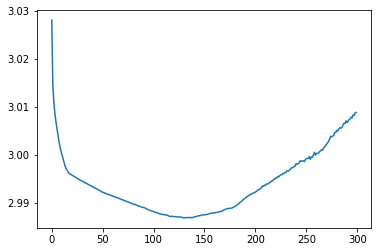

In [103]:
plt.plot([i for i in range(300)],validation_loss)
plt.show()

In [104]:
#re-initialize this net (so re-initialize the parameters)
doc2vec_net = Net(26, 13, 1)
#print(list(net_svd80.parameters())[0])

In [105]:
#final model for nn:
for epoch in range(130):
    for step, (batch_x, batch_y) in enumerate(train_total_loader):
        print('Epoch:', epoch, '| Step: ', step)
        b_x = Variable(batch_x.float())
        b_y = Variable(batch_y.float())
        
        prediction = doc2vec_net(b_x)
        train_loss = loss_func(prediction, b_y)
        print('training loss is: ',train_loss.data[0])
        print('\n')

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

      
        

Epoch: 0 | Step:  0
training loss is:  3.1575207710266113


Epoch: 0 | Step:  1
training loss is:  3.1225991249084473


Epoch: 0 | Step:  2
training loss is:  2.90280818939209


Epoch: 0 | Step:  3
training loss is:  3.0882461071014404


Epoch: 0 | Step:  4
training loss is:  2.7591402530670166


Epoch: 0 | Step:  5
training loss is:  2.7252352237701416


Epoch: 0 | Step:  6
training loss is:  2.928572654724121


Epoch: 0 | Step:  7
training loss is:  3.466184616088867


Epoch: 0 | Step:  8
training loss is:  2.4325811862945557


Epoch: 0 | Step:  9
training loss is:  3.2200074195861816


Epoch: 0 | Step:  10
training loss is:  3.1157126426696777


Epoch: 0 | Step:  11
training loss is:  2.685153007507324


Epoch: 0 | Step:  12
training loss is:  2.6462912559509277


Epoch: 0 | Step:  13
training loss is:  3.824631929397583


Epoch: 0 | Step:  14
training loss is:  2.4640495777130127


Epoch: 0 | Step:  15
training loss is:  3.435838222503662


Epoch: 0 | Step:  16
training loss is:  3

Epoch: 5 | Step:  0
training loss is:  3.1575207710266113


Epoch: 5 | Step:  1
training loss is:  3.1225991249084473


Epoch: 5 | Step:  2
training loss is:  2.90280818939209


Epoch: 5 | Step:  3
training loss is:  3.0882461071014404


Epoch: 5 | Step:  4
training loss is:  2.7591402530670166


Epoch: 5 | Step:  5
training loss is:  2.7252352237701416


Epoch: 5 | Step:  6
training loss is:  2.928572654724121


Epoch: 5 | Step:  7
training loss is:  3.466184616088867


Epoch: 5 | Step:  8
training loss is:  2.4325811862945557


Epoch: 5 | Step:  9
training loss is:  3.2200074195861816


Epoch: 5 | Step:  10
training loss is:  3.1157126426696777


Epoch: 5 | Step:  11
training loss is:  2.685153007507324


Epoch: 5 | Step:  12
training loss is:  2.6462912559509277


Epoch: 5 | Step:  13
training loss is:  3.824631929397583


Epoch: 5 | Step:  14
training loss is:  2.4640495777130127


Epoch: 5 | Step:  15
training loss is:  3.435838222503662


Epoch: 5 | Step:  16
training loss is:  3

Epoch: 10 | Step:  0
training loss is:  3.1575207710266113


Epoch: 10 | Step:  1
training loss is:  3.1225991249084473


Epoch: 10 | Step:  2
training loss is:  2.90280818939209


Epoch: 10 | Step:  3
training loss is:  3.0882461071014404


Epoch: 10 | Step:  4
training loss is:  2.7591402530670166


Epoch: 10 | Step:  5
training loss is:  2.7252352237701416


Epoch: 10 | Step:  6
training loss is:  2.928572654724121


Epoch: 10 | Step:  7
training loss is:  3.466184616088867


Epoch: 10 | Step:  8
training loss is:  2.4325811862945557


Epoch: 10 | Step:  9
training loss is:  3.2200074195861816


Epoch: 10 | Step:  10
training loss is:  3.1157126426696777


Epoch: 10 | Step:  11
training loss is:  2.685153007507324


Epoch: 10 | Step:  12
training loss is:  2.6462912559509277


Epoch: 10 | Step:  13
training loss is:  3.824631929397583


Epoch: 10 | Step:  14
training loss is:  2.4640495777130127


Epoch: 10 | Step:  15
training loss is:  3.435838222503662


Epoch: 10 | Step:  16
tra

Epoch: 15 | Step:  0
training loss is:  3.1575207710266113


Epoch: 15 | Step:  1
training loss is:  3.1225991249084473


Epoch: 15 | Step:  2
training loss is:  2.90280818939209


Epoch: 15 | Step:  3
training loss is:  3.0882461071014404


Epoch: 15 | Step:  4
training loss is:  2.7591402530670166


Epoch: 15 | Step:  5
training loss is:  2.7252352237701416


Epoch: 15 | Step:  6
training loss is:  2.928572654724121


Epoch: 15 | Step:  7
training loss is:  3.466184616088867


Epoch: 15 | Step:  8
training loss is:  2.4325811862945557


Epoch: 15 | Step:  9
training loss is:  3.2200074195861816


Epoch: 15 | Step:  10
training loss is:  3.1157126426696777


Epoch: 15 | Step:  11
training loss is:  2.685153007507324


Epoch: 15 | Step:  12
training loss is:  2.6462912559509277


Epoch: 15 | Step:  13
training loss is:  3.824631929397583


Epoch: 15 | Step:  14
training loss is:  2.4640495777130127


Epoch: 15 | Step:  15
training loss is:  3.435838222503662


Epoch: 15 | Step:  16
tra

Epoch: 20 | Step:  0
training loss is:  3.1575207710266113


Epoch: 20 | Step:  1
training loss is:  3.1225991249084473


Epoch: 20 | Step:  2
training loss is:  2.90280818939209


Epoch: 20 | Step:  3
training loss is:  3.0882461071014404


Epoch: 20 | Step:  4
training loss is:  2.7591402530670166


Epoch: 20 | Step:  5
training loss is:  2.7252352237701416


Epoch: 20 | Step:  6
training loss is:  2.928572654724121


Epoch: 20 | Step:  7
training loss is:  3.466184616088867


Epoch: 20 | Step:  8
training loss is:  2.4325811862945557


Epoch: 20 | Step:  9
training loss is:  3.2200074195861816


Epoch: 20 | Step:  10
training loss is:  3.1157126426696777


Epoch: 20 | Step:  11
training loss is:  2.685153007507324


Epoch: 20 | Step:  12
training loss is:  2.6462912559509277


Epoch: 20 | Step:  13
training loss is:  3.824631929397583


Epoch: 20 | Step:  14
training loss is:  2.4640495777130127


Epoch: 20 | Step:  15
training loss is:  3.435838222503662


Epoch: 20 | Step:  16
tra

Epoch: 25 | Step:  0
training loss is:  3.1575207710266113


Epoch: 25 | Step:  1
training loss is:  3.1225991249084473


Epoch: 25 | Step:  2
training loss is:  2.90280818939209


Epoch: 25 | Step:  3
training loss is:  3.0882461071014404


Epoch: 25 | Step:  4
training loss is:  2.7591402530670166


Epoch: 25 | Step:  5
training loss is:  2.7252352237701416


Epoch: 25 | Step:  6
training loss is:  2.928572654724121


Epoch: 25 | Step:  7
training loss is:  3.466184616088867


Epoch: 25 | Step:  8
training loss is:  2.4325811862945557


Epoch: 25 | Step:  9
training loss is:  3.2200074195861816


Epoch: 25 | Step:  10
training loss is:  3.1157126426696777


Epoch: 25 | Step:  11
training loss is:  2.685153007507324


Epoch: 25 | Step:  12
training loss is:  2.6462912559509277


Epoch: 25 | Step:  13
training loss is:  3.824631929397583


Epoch: 25 | Step:  14
training loss is:  2.4640495777130127


Epoch: 25 | Step:  15
training loss is:  3.435838222503662


Epoch: 25 | Step:  16
tra

Epoch: 29 | Step:  23
training loss is:  3.3284642696380615


Epoch: 29 | Step:  24
training loss is:  3.080610990524292


Epoch: 29 | Step:  25
training loss is:  3.7581405639648438


Epoch: 29 | Step:  26
training loss is:  2.635446786880493


Epoch: 29 | Step:  27
training loss is:  3.202127456665039


Epoch: 30 | Step:  0
training loss is:  3.1575207710266113


Epoch: 30 | Step:  1
training loss is:  3.1225991249084473


Epoch: 30 | Step:  2
training loss is:  2.90280818939209


Epoch: 30 | Step:  3
training loss is:  3.0882461071014404


Epoch: 30 | Step:  4
training loss is:  2.7591402530670166


Epoch: 30 | Step:  5
training loss is:  2.7252352237701416


Epoch: 30 | Step:  6
training loss is:  2.928572654724121


Epoch: 30 | Step:  7
training loss is:  3.466184616088867


Epoch: 30 | Step:  8
training loss is:  2.4325811862945557


Epoch: 30 | Step:  9
training loss is:  3.2200074195861816


Epoch: 30 | Step:  10
training loss is:  3.1157126426696777


Epoch: 30 | Step:  11
tra

Epoch: 35 | Step:  0
training loss is:  3.1575207710266113


Epoch: 35 | Step:  1
training loss is:  3.1225991249084473


Epoch: 35 | Step:  2
training loss is:  2.90280818939209


Epoch: 35 | Step:  3
training loss is:  3.0882461071014404


Epoch: 35 | Step:  4
training loss is:  2.7591402530670166


Epoch: 35 | Step:  5
training loss is:  2.7252352237701416


Epoch: 35 | Step:  6
training loss is:  2.928572654724121


Epoch: 35 | Step:  7
training loss is:  3.466184616088867


Epoch: 35 | Step:  8
training loss is:  2.4325811862945557


Epoch: 35 | Step:  9
training loss is:  3.2200074195861816


Epoch: 35 | Step:  10
training loss is:  3.1157126426696777


Epoch: 35 | Step:  11
training loss is:  2.685153007507324


Epoch: 35 | Step:  12
training loss is:  2.6462912559509277


Epoch: 35 | Step:  13
training loss is:  3.824631929397583


Epoch: 35 | Step:  14
training loss is:  2.4640495777130127


Epoch: 35 | Step:  15
training loss is:  3.435838222503662


Epoch: 35 | Step:  16
tra

Epoch: 40 | Step:  0
training loss is:  3.1575207710266113


Epoch: 40 | Step:  1
training loss is:  3.1225991249084473


Epoch: 40 | Step:  2
training loss is:  2.90280818939209


Epoch: 40 | Step:  3
training loss is:  3.0882461071014404


Epoch: 40 | Step:  4
training loss is:  2.7591402530670166


Epoch: 40 | Step:  5
training loss is:  2.7252352237701416


Epoch: 40 | Step:  6
training loss is:  2.928572654724121


Epoch: 40 | Step:  7
training loss is:  3.466184616088867


Epoch: 40 | Step:  8
training loss is:  2.4325811862945557


Epoch: 40 | Step:  9
training loss is:  3.2200074195861816


Epoch: 40 | Step:  10
training loss is:  3.1157126426696777


Epoch: 40 | Step:  11
training loss is:  2.685153007507324


Epoch: 40 | Step:  12
training loss is:  2.6462912559509277


Epoch: 40 | Step:  13
training loss is:  3.824631929397583


Epoch: 40 | Step:  14
training loss is:  2.4640495777130127


Epoch: 40 | Step:  15
training loss is:  3.435838222503662


Epoch: 40 | Step:  16
tra

Epoch: 45 | Step:  0
training loss is:  3.1575207710266113


Epoch: 45 | Step:  1
training loss is:  3.1225991249084473


Epoch: 45 | Step:  2
training loss is:  2.90280818939209


Epoch: 45 | Step:  3
training loss is:  3.0882461071014404


Epoch: 45 | Step:  4
training loss is:  2.7591402530670166


Epoch: 45 | Step:  5
training loss is:  2.7252352237701416


Epoch: 45 | Step:  6
training loss is:  2.928572654724121


Epoch: 45 | Step:  7
training loss is:  3.466184616088867


Epoch: 45 | Step:  8
training loss is:  2.4325811862945557


Epoch: 45 | Step:  9
training loss is:  3.2200074195861816


Epoch: 45 | Step:  10
training loss is:  3.1157126426696777


Epoch: 45 | Step:  11
training loss is:  2.685153007507324


Epoch: 45 | Step:  12
training loss is:  2.6462912559509277


Epoch: 45 | Step:  13
training loss is:  3.824631929397583


Epoch: 45 | Step:  14
training loss is:  2.4640495777130127


Epoch: 45 | Step:  15
training loss is:  3.435838222503662


Epoch: 45 | Step:  16
tra

Epoch: 50 | Step:  0
training loss is:  3.1575207710266113


Epoch: 50 | Step:  1
training loss is:  3.1225991249084473


Epoch: 50 | Step:  2
training loss is:  2.90280818939209


Epoch: 50 | Step:  3
training loss is:  3.0882461071014404


Epoch: 50 | Step:  4
training loss is:  2.7591402530670166


Epoch: 50 | Step:  5
training loss is:  2.7252352237701416


Epoch: 50 | Step:  6
training loss is:  2.928572654724121


Epoch: 50 | Step:  7
training loss is:  3.466184616088867


Epoch: 50 | Step:  8
training loss is:  2.4325811862945557


Epoch: 50 | Step:  9
training loss is:  3.2200074195861816


Epoch: 50 | Step:  10
training loss is:  3.1157126426696777


Epoch: 50 | Step:  11
training loss is:  2.685153007507324


Epoch: 50 | Step:  12
training loss is:  2.6462912559509277


Epoch: 50 | Step:  13
training loss is:  3.824631929397583


Epoch: 50 | Step:  14
training loss is:  2.4640495777130127


Epoch: 50 | Step:  15
training loss is:  3.435838222503662


Epoch: 50 | Step:  16
tra

Epoch: 55 | Step:  0
training loss is:  3.1575207710266113


Epoch: 55 | Step:  1
training loss is:  3.1225991249084473


Epoch: 55 | Step:  2
training loss is:  2.90280818939209


Epoch: 55 | Step:  3
training loss is:  3.0882461071014404


Epoch: 55 | Step:  4
training loss is:  2.7591402530670166


Epoch: 55 | Step:  5
training loss is:  2.7252352237701416


Epoch: 55 | Step:  6
training loss is:  2.928572654724121


Epoch: 55 | Step:  7
training loss is:  3.466184616088867


Epoch: 55 | Step:  8
training loss is:  2.4325811862945557


Epoch: 55 | Step:  9
training loss is:  3.2200074195861816


Epoch: 55 | Step:  10
training loss is:  3.1157126426696777


Epoch: 55 | Step:  11
training loss is:  2.685153007507324


Epoch: 55 | Step:  12
training loss is:  2.6462912559509277


Epoch: 55 | Step:  13
training loss is:  3.824631929397583


Epoch: 55 | Step:  14
training loss is:  2.4640495777130127


Epoch: 55 | Step:  15
training loss is:  3.435838222503662


Epoch: 55 | Step:  16
tra

Epoch: 60 | Step:  0
training loss is:  3.1575207710266113


Epoch: 60 | Step:  1
training loss is:  3.1225991249084473


Epoch: 60 | Step:  2
training loss is:  2.90280818939209


Epoch: 60 | Step:  3
training loss is:  3.0882461071014404


Epoch: 60 | Step:  4
training loss is:  2.7591402530670166


Epoch: 60 | Step:  5
training loss is:  2.7252352237701416


Epoch: 60 | Step:  6
training loss is:  2.928572654724121


Epoch: 60 | Step:  7
training loss is:  3.466184616088867


Epoch: 60 | Step:  8
training loss is:  2.4325811862945557


Epoch: 60 | Step:  9
training loss is:  3.2200074195861816


Epoch: 60 | Step:  10
training loss is:  3.1157126426696777


Epoch: 60 | Step:  11
training loss is:  2.685153007507324


Epoch: 60 | Step:  12
training loss is:  2.6462912559509277


Epoch: 60 | Step:  13
training loss is:  3.824631929397583


Epoch: 60 | Step:  14
training loss is:  2.4640495777130127


Epoch: 60 | Step:  15
training loss is:  3.435838222503662


Epoch: 60 | Step:  16
tra

Epoch: 65 | Step:  0
training loss is:  3.1575207710266113


Epoch: 65 | Step:  1
training loss is:  3.1225991249084473


Epoch: 65 | Step:  2
training loss is:  2.90280818939209


Epoch: 65 | Step:  3
training loss is:  3.0882461071014404


Epoch: 65 | Step:  4
training loss is:  2.7591402530670166


Epoch: 65 | Step:  5
training loss is:  2.7252352237701416


Epoch: 65 | Step:  6
training loss is:  2.928572654724121


Epoch: 65 | Step:  7
training loss is:  3.466184616088867


Epoch: 65 | Step:  8
training loss is:  2.4325811862945557


Epoch: 65 | Step:  9
training loss is:  3.2200074195861816


Epoch: 65 | Step:  10
training loss is:  3.1157126426696777


Epoch: 65 | Step:  11
training loss is:  2.685153007507324


Epoch: 65 | Step:  12
training loss is:  2.6462912559509277


Epoch: 65 | Step:  13
training loss is:  3.824631929397583


Epoch: 65 | Step:  14
training loss is:  2.4640495777130127


Epoch: 65 | Step:  15
training loss is:  3.435838222503662


Epoch: 65 | Step:  16
tra

Epoch: 70 | Step:  0
training loss is:  3.1575207710266113


Epoch: 70 | Step:  1
training loss is:  3.1225991249084473


Epoch: 70 | Step:  2
training loss is:  2.90280818939209


Epoch: 70 | Step:  3
training loss is:  3.0882461071014404


Epoch: 70 | Step:  4
training loss is:  2.7591402530670166


Epoch: 70 | Step:  5
training loss is:  2.7252352237701416


Epoch: 70 | Step:  6
training loss is:  2.928572654724121


Epoch: 70 | Step:  7
training loss is:  3.466184616088867


Epoch: 70 | Step:  8
training loss is:  2.4325811862945557


Epoch: 70 | Step:  9
training loss is:  3.2200074195861816


Epoch: 70 | Step:  10
training loss is:  3.1157126426696777


Epoch: 70 | Step:  11
training loss is:  2.685153007507324


Epoch: 70 | Step:  12
training loss is:  2.6462912559509277


Epoch: 70 | Step:  13
training loss is:  3.824631929397583


Epoch: 70 | Step:  14
training loss is:  2.4640495777130127


Epoch: 70 | Step:  15
training loss is:  3.435838222503662


Epoch: 70 | Step:  16
tra

Epoch: 75 | Step:  0
training loss is:  3.1575207710266113


Epoch: 75 | Step:  1
training loss is:  3.1225991249084473


Epoch: 75 | Step:  2
training loss is:  2.90280818939209


Epoch: 75 | Step:  3
training loss is:  3.0882461071014404


Epoch: 75 | Step:  4
training loss is:  2.7591402530670166


Epoch: 75 | Step:  5
training loss is:  2.7252352237701416


Epoch: 75 | Step:  6
training loss is:  2.928572654724121


Epoch: 75 | Step:  7
training loss is:  3.466184616088867


Epoch: 75 | Step:  8
training loss is:  2.4325811862945557


Epoch: 75 | Step:  9
training loss is:  3.2200074195861816


Epoch: 75 | Step:  10
training loss is:  3.1157126426696777


Epoch: 75 | Step:  11
training loss is:  2.685153007507324


Epoch: 75 | Step:  12
training loss is:  2.6462912559509277


Epoch: 75 | Step:  13
training loss is:  3.824631929397583


Epoch: 75 | Step:  14
training loss is:  2.4640495777130127


Epoch: 75 | Step:  15
training loss is:  3.435838222503662


Epoch: 75 | Step:  16
tra

Epoch: 80 | Step:  0
training loss is:  3.1575207710266113


Epoch: 80 | Step:  1
training loss is:  3.1225991249084473


Epoch: 80 | Step:  2
training loss is:  2.90280818939209


Epoch: 80 | Step:  3
training loss is:  3.0882461071014404


Epoch: 80 | Step:  4
training loss is:  2.7591402530670166


Epoch: 80 | Step:  5
training loss is:  2.7252352237701416


Epoch: 80 | Step:  6
training loss is:  2.928572654724121


Epoch: 80 | Step:  7
training loss is:  3.466184616088867


Epoch: 80 | Step:  8
training loss is:  2.4325811862945557


Epoch: 80 | Step:  9
training loss is:  3.2200074195861816


Epoch: 80 | Step:  10
training loss is:  3.1157126426696777


Epoch: 80 | Step:  11
training loss is:  2.685153007507324


Epoch: 80 | Step:  12
training loss is:  2.6462912559509277


Epoch: 80 | Step:  13
training loss is:  3.824631929397583


Epoch: 80 | Step:  14
training loss is:  2.4640495777130127


Epoch: 80 | Step:  15
training loss is:  3.435838222503662


Epoch: 80 | Step:  16
tra

Epoch: 85 | Step:  0
training loss is:  3.1575207710266113


Epoch: 85 | Step:  1
training loss is:  3.1225991249084473


Epoch: 85 | Step:  2
training loss is:  2.90280818939209


Epoch: 85 | Step:  3
training loss is:  3.0882461071014404


Epoch: 85 | Step:  4
training loss is:  2.7591402530670166


Epoch: 85 | Step:  5
training loss is:  2.7252352237701416


Epoch: 85 | Step:  6
training loss is:  2.928572654724121


Epoch: 85 | Step:  7
training loss is:  3.466184616088867


Epoch: 85 | Step:  8
training loss is:  2.4325811862945557


Epoch: 85 | Step:  9
training loss is:  3.2200074195861816


Epoch: 85 | Step:  10
training loss is:  3.1157126426696777


Epoch: 85 | Step:  11
training loss is:  2.685153007507324


Epoch: 85 | Step:  12
training loss is:  2.6462912559509277


Epoch: 85 | Step:  13
training loss is:  3.824631929397583


Epoch: 85 | Step:  14
training loss is:  2.4640495777130127


Epoch: 85 | Step:  15
training loss is:  3.435838222503662


Epoch: 85 | Step:  16
tra

Epoch: 90 | Step:  0
training loss is:  3.1575207710266113


Epoch: 90 | Step:  1
training loss is:  3.1225991249084473


Epoch: 90 | Step:  2
training loss is:  2.90280818939209


Epoch: 90 | Step:  3
training loss is:  3.0882461071014404


Epoch: 90 | Step:  4
training loss is:  2.7591402530670166


Epoch: 90 | Step:  5
training loss is:  2.7252352237701416


Epoch: 90 | Step:  6
training loss is:  2.928572654724121


Epoch: 90 | Step:  7
training loss is:  3.466184616088867


Epoch: 90 | Step:  8
training loss is:  2.4325811862945557


Epoch: 90 | Step:  9
training loss is:  3.2200074195861816


Epoch: 90 | Step:  10
training loss is:  3.1157126426696777


Epoch: 90 | Step:  11
training loss is:  2.685153007507324


Epoch: 90 | Step:  12
training loss is:  2.6462912559509277


Epoch: 90 | Step:  13
training loss is:  3.824631929397583


Epoch: 90 | Step:  14
training loss is:  2.4640495777130127


Epoch: 90 | Step:  15
training loss is:  3.435838222503662


Epoch: 90 | Step:  16
tra

Epoch: 95 | Step:  0
training loss is:  3.1575207710266113


Epoch: 95 | Step:  1
training loss is:  3.1225991249084473


Epoch: 95 | Step:  2
training loss is:  2.90280818939209


Epoch: 95 | Step:  3
training loss is:  3.0882461071014404


Epoch: 95 | Step:  4
training loss is:  2.7591402530670166


Epoch: 95 | Step:  5
training loss is:  2.7252352237701416


Epoch: 95 | Step:  6
training loss is:  2.928572654724121


Epoch: 95 | Step:  7
training loss is:  3.466184616088867


Epoch: 95 | Step:  8
training loss is:  2.4325811862945557


Epoch: 95 | Step:  9
training loss is:  3.2200074195861816


Epoch: 95 | Step:  10
training loss is:  3.1157126426696777


Epoch: 95 | Step:  11
training loss is:  2.685153007507324


Epoch: 95 | Step:  12
training loss is:  2.6462912559509277


Epoch: 95 | Step:  13
training loss is:  3.824631929397583


Epoch: 95 | Step:  14
training loss is:  2.4640495777130127


Epoch: 95 | Step:  15
training loss is:  3.435838222503662


Epoch: 95 | Step:  16
tra

Epoch: 100 | Step:  0
training loss is:  3.1575207710266113


Epoch: 100 | Step:  1
training loss is:  3.1225991249084473


Epoch: 100 | Step:  2
training loss is:  2.90280818939209


Epoch: 100 | Step:  3
training loss is:  3.0882461071014404


Epoch: 100 | Step:  4
training loss is:  2.7591402530670166


Epoch: 100 | Step:  5
training loss is:  2.7252352237701416


Epoch: 100 | Step:  6
training loss is:  2.928572654724121


Epoch: 100 | Step:  7
training loss is:  3.466184616088867


Epoch: 100 | Step:  8
training loss is:  2.4325811862945557


Epoch: 100 | Step:  9
training loss is:  3.2200074195861816


Epoch: 100 | Step:  10
training loss is:  3.1157126426696777


Epoch: 100 | Step:  11
training loss is:  2.685153007507324


Epoch: 100 | Step:  12
training loss is:  2.6462912559509277


Epoch: 100 | Step:  13
training loss is:  3.824631929397583


Epoch: 100 | Step:  14
training loss is:  2.4640495777130127


Epoch: 100 | Step:  15
training loss is:  3.435838222503662


Epoch: 10

Epoch: 105 | Step:  0
training loss is:  3.1575207710266113


Epoch: 105 | Step:  1
training loss is:  3.1225991249084473


Epoch: 105 | Step:  2
training loss is:  2.90280818939209


Epoch: 105 | Step:  3
training loss is:  3.0882461071014404


Epoch: 105 | Step:  4
training loss is:  2.7591402530670166


Epoch: 105 | Step:  5
training loss is:  2.7252352237701416


Epoch: 105 | Step:  6
training loss is:  2.928572654724121


Epoch: 105 | Step:  7
training loss is:  3.466184616088867


Epoch: 105 | Step:  8
training loss is:  2.4325811862945557


Epoch: 105 | Step:  9
training loss is:  3.2200074195861816


Epoch: 105 | Step:  10
training loss is:  3.1157126426696777


Epoch: 105 | Step:  11
training loss is:  2.685153007507324


Epoch: 105 | Step:  12
training loss is:  2.6462912559509277


Epoch: 105 | Step:  13
training loss is:  3.824631929397583


Epoch: 105 | Step:  14
training loss is:  2.4640495777130127


Epoch: 105 | Step:  15
training loss is:  3.435838222503662


Epoch: 10

Epoch: 110 | Step:  0
training loss is:  3.1575207710266113


Epoch: 110 | Step:  1
training loss is:  3.1225991249084473


Epoch: 110 | Step:  2
training loss is:  2.90280818939209


Epoch: 110 | Step:  3
training loss is:  3.0882461071014404


Epoch: 110 | Step:  4
training loss is:  2.7591402530670166


Epoch: 110 | Step:  5
training loss is:  2.7252352237701416


Epoch: 110 | Step:  6
training loss is:  2.928572654724121


Epoch: 110 | Step:  7
training loss is:  3.466184616088867


Epoch: 110 | Step:  8
training loss is:  2.4325811862945557


Epoch: 110 | Step:  9
training loss is:  3.2200074195861816


Epoch: 110 | Step:  10
training loss is:  3.1157126426696777


Epoch: 110 | Step:  11
training loss is:  2.685153007507324


Epoch: 110 | Step:  12
training loss is:  2.6462912559509277


Epoch: 110 | Step:  13
training loss is:  3.824631929397583


Epoch: 110 | Step:  14
training loss is:  2.4640495777130127


Epoch: 110 | Step:  15
training loss is:  3.435838222503662


Epoch: 11

Epoch: 115 | Step:  0
training loss is:  3.1575207710266113


Epoch: 115 | Step:  1
training loss is:  3.1225991249084473


Epoch: 115 | Step:  2
training loss is:  2.90280818939209


Epoch: 115 | Step:  3
training loss is:  3.0882461071014404


Epoch: 115 | Step:  4
training loss is:  2.7591402530670166


Epoch: 115 | Step:  5
training loss is:  2.7252352237701416


Epoch: 115 | Step:  6
training loss is:  2.928572654724121


Epoch: 115 | Step:  7
training loss is:  3.466184616088867


Epoch: 115 | Step:  8
training loss is:  2.4325811862945557


Epoch: 115 | Step:  9
training loss is:  3.2200074195861816


Epoch: 115 | Step:  10
training loss is:  3.1157126426696777


Epoch: 115 | Step:  11
training loss is:  2.685153007507324


Epoch: 115 | Step:  12
training loss is:  2.6462912559509277


Epoch: 115 | Step:  13
training loss is:  3.824631929397583


Epoch: 115 | Step:  14
training loss is:  2.4640495777130127


Epoch: 115 | Step:  15
training loss is:  3.435838222503662


Epoch: 11

Epoch: 120 | Step:  0
training loss is:  3.1575207710266113


Epoch: 120 | Step:  1
training loss is:  3.1225991249084473


Epoch: 120 | Step:  2
training loss is:  2.90280818939209


Epoch: 120 | Step:  3
training loss is:  3.0882461071014404


Epoch: 120 | Step:  4
training loss is:  2.7591402530670166


Epoch: 120 | Step:  5
training loss is:  2.7252352237701416


Epoch: 120 | Step:  6
training loss is:  2.928572654724121


Epoch: 120 | Step:  7
training loss is:  3.466184616088867


Epoch: 120 | Step:  8
training loss is:  2.4325811862945557


Epoch: 120 | Step:  9
training loss is:  3.2200074195861816


Epoch: 120 | Step:  10
training loss is:  3.1157126426696777


Epoch: 120 | Step:  11
training loss is:  2.685153007507324


Epoch: 120 | Step:  12
training loss is:  2.6462912559509277


Epoch: 120 | Step:  13
training loss is:  3.824631929397583


Epoch: 120 | Step:  14
training loss is:  2.4640495777130127


Epoch: 120 | Step:  15
training loss is:  3.435838222503662


Epoch: 12

Epoch: 125 | Step:  0
training loss is:  3.1575207710266113


Epoch: 125 | Step:  1
training loss is:  3.1225991249084473


Epoch: 125 | Step:  2
training loss is:  2.90280818939209


Epoch: 125 | Step:  3
training loss is:  3.0882461071014404


Epoch: 125 | Step:  4
training loss is:  2.7591402530670166


Epoch: 125 | Step:  5
training loss is:  2.7252352237701416


Epoch: 125 | Step:  6
training loss is:  2.928572654724121


Epoch: 125 | Step:  7
training loss is:  3.466184616088867


Epoch: 125 | Step:  8
training loss is:  2.4325811862945557


Epoch: 125 | Step:  9
training loss is:  3.2200074195861816


Epoch: 125 | Step:  10
training loss is:  3.1157126426696777


Epoch: 125 | Step:  11
training loss is:  2.685153007507324


Epoch: 125 | Step:  12
training loss is:  2.6462912559509277


Epoch: 125 | Step:  13
training loss is:  3.824631929397583


Epoch: 125 | Step:  14
training loss is:  2.4640495777130127


Epoch: 125 | Step:  15
training loss is:  3.435838222503662


Epoch: 12

In [111]:
#save the network
torch.save(doc2vec_net.state_dict(),'doc2vec_net.pkl')

In [84]:
#restore the network
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden) 
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict=torch.nn.Linear(n_hidden,1) 
    #forward:
    def forward(self,x):
        x=F.relu(self.hidden(x)) 
        x=self.hidden2(x)
        x=self.predict(x) 
        return x
    
doc2vec_net = Net(26, 13, 1)

optimizer=torch.optim.SGD(doc2vec_net.parameters(),lr=0.008)
loss_func=torch.nn.MSELoss()
loss_func_MAe=torch.nn.L1Loss()

doc2vec_net.load_state_dict(torch.load('doc2vec_net.pkl'))

In [85]:
#final prediction
final_prediction_y = doc2vec_net(x_test).data.numpy()
true_y = y_test.data.numpy()
plt.scatter(true_y, final_prediction_y)

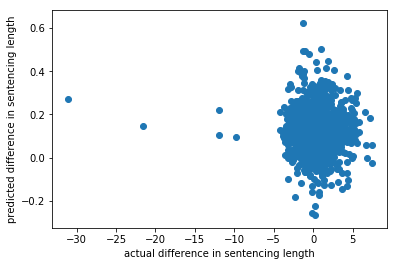

In [86]:
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

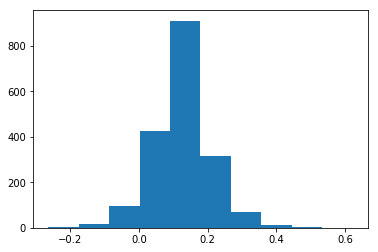

In [87]:
plt.hist(final_prediction_y)
plt.show()

In [88]:
#final result avoid overfitting
print('mean squared error is: {}'.format(mean_squared_error(true_y, final_prediction_y)))
print('mean absolute error is {}'.format(mean_absolute_error(true_y, final_prediction_y)))

mean squared error is: 4.128722667694092
mean absolute error is 1.3983452320098877


In [89]:
#std
np.std(final_prediction_y)

0.08602543

In [90]:
#mean
np.mean(final_prediction_y)

0.1273173

In [91]:
print('R2 is {}'.format(r2_score(true_y, final_prediction_y)))

R2 is -0.006075835015012521


In [92]:
################# doc2vec 10

In [93]:
#columns wanted 
doc_dimension = [str(i) for i in range(1,10)]
col_wanted = ['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart']
col_wanted.extend(doc_dimension)
col_wanted.append('length_3m_dif')


In [94]:
col_wanted

['index',
 'Affirmed',
 'AffirmedInPart',
 'Reversed',
 'ReversedInPart',
 'Vacated',
 'VacatedInPart',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'length_3m_dif']

In [95]:
data_use_doc2vec10 = doc2vec10_data[col_wanted]

In [96]:
data_use_doc2vec10.head()

index  Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  \
0   2304       1.0             0.0       0.0             0.0      0.0   
1   2796       1.0             0.0       0.0             0.0      0.0   
2   2805       0.0             0.0       1.0             0.0      0.0   
3   2814       1.0             0.0       0.0             0.0      0.0   
4   2816       1.0             0.0       0.0             0.0      0.0   

   VacatedInPart         1         2         3         4         5         6  \
0            0.0 -0.182661  0.139385  0.056974  0.108285 -0.040595  0.107841   
1            0.0  0.644300  1.338564 -0.137683 -0.042596 -0.022399 -0.158822   
2            0.0  0.175842  1.442408  0.064712  0.171689  0.400354 -0.043951   
3            0.0  0.199542  0.792197  0.337556 -0.409457  0.276247 -0.573847   
4            0.0  3.031099  5.072269 -1.254424  0.058288  0.552829 -1.181539   

          7         8         9  length_3m_dif  
0 -0.179712  0.202334 -0.127400      -1.099144  
1  1.472183 -0.095168 -1.752346       1.663181  
2  1.224744  0.102581 -1.751274      -3.563471  
3  1.458445 -0.080440 -2.104647       0.760434  
4  2.966521 -1.068622 -4.255784      -0.630426

In [118]:
from sklearn.cross_validation import train_test_split
from numpy.random import RandomState

RS1 = RandomState(1)
train_data_doc2vec10 = data_use_doc2vec10.sample(frac = 0.75, random_state = 200)
test_data_doc2vec10 = data_use_doc2vec10.drop(train_data_doc2vec10.index)

x_train_doc2vec10 = train_data_doc2vec10[[str(i) for i in range(1,10)]]
x_test_doc2vec10 = test_data_doc2vec10[[str(i) for i in range(1,10)]]
Y_train_doc2vec10 = train_data_doc2vec10['length_3m_dif']
Y_test_doc2vec10 = test_data_doc2vec10['length_3m_dif']

print(train_data_doc2vec10.shape)
print(test_data_doc2vec10.shape)

(6326, 17)
(2108, 17)


In [119]:
train_data_doc2vec10.head()

index  Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  \
5577  35638       0.0             0.0       0.0             1.0      0.0   
2072  24468       1.0             0.0       0.0             0.0      0.0   
7052  39230       1.0             0.0       0.0             0.0      0.0   
1582  22883       1.0             0.0       0.0             0.0      0.0   
587   16551       0.0             0.0       0.0             0.0      0.0   

      VacatedInPart         1         2         3         4         5  \
5577            0.0  1.051846  3.705808 -0.802068 -0.172057  1.413459   
2072            0.0  0.269460  0.100724 -0.281354 -0.337027  0.003617   
7052            0.0  0.653694  0.362703 -0.443683 -0.189343  0.299954   
1582            0.0  1.095417  1.333635 -0.551664  0.234219  0.866432   
587             0.0  0.084472  2.360854 -0.579817 -1.122091 -1.062786   

             6         7         8         9  length_3m_dif  
5577 -1.291588  4.147923 -0.595534 -3.798749      -0.766357  
2072 -0.346163  0.487397  0.211758 -0.086170       0.608711  
7052 -0.314413  1.530572 -0.284634 -1.501245       0.228592  
1582 -0.734277  1.593825 -0.334868 -2.608736      -3.150298  
587   0.427702  2.346360 -1.135323 -3.548522      -2.467751

In [120]:
test_data_doc2vec10.head()

index  Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  \
2    2805       0.0             0.0       1.0             0.0      0.0   
5    2817       1.0             0.0       0.0             0.0      0.0   
17   3065       1.0             0.0       0.0             0.0      0.0   
18   3392       1.0             0.0       0.0             0.0      0.0   
23   3498       1.0             0.0       0.0             0.0      0.0   

    VacatedInPart         1         2         3         4         5         6  \
2             0.0  0.175842  1.442408  0.064712  0.171689  0.400354 -0.043951   
5             0.0  1.458608  3.737572 -0.180046 -2.389086 -0.625840 -2.964752   
17            0.0  0.756509  3.032513 -0.803569 -0.692386  1.606123 -0.923516   
18            0.0  1.859420  4.504257 -1.864649 -0.939639  0.226002 -1.077391   
23            0.0  1.651699  3.086441 -0.346870 -1.007989  1.085770 -1.834897   

           7         8         9  length_3m_dif  
2   1.224744  0.102581 -1.751274      -3.563471  
5   3.816743 -0.995562 -4.326402       3.591201  
17  4.129429 -0.476107 -4.181660       0.959357  
18  4.887516 -1.531029 -2.506869      -1.595323  
23  4.896070  0.594316 -4.187512      -2.045180

In [121]:
train_data_doc2vec10['res']=train_data_doc2vec10['Affirmed']+train_data_doc2vec10['AffirmedInPart']+train_data_doc2vec10['Reversed']+train_data_doc2vec10['ReversedInPart']+train_data_doc2vec10['Vacated']+train_data_doc2vec10['VacatedInPart']
test_data_doc2vec10['res']=test_data_doc2vec10['Affirmed']+test_data_doc2vec10['AffirmedInPart']+test_data_doc2vec10['Reversed']+test_data_doc2vec10['ReversedInPart']+test_data_doc2vec10['Vacated']+test_data_doc2vec10['VacatedInPart']

In [122]:
train_data_doc2vec10.head()

index  Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  \
5577  35638       0.0             0.0       0.0             1.0      0.0   
2072  24468       1.0             0.0       0.0             0.0      0.0   
7052  39230       1.0             0.0       0.0             0.0      0.0   
1582  22883       1.0             0.0       0.0             0.0      0.0   
587   16551       0.0             0.0       0.0             0.0      0.0   

      VacatedInPart         1         2         3         4         5  \
5577            0.0  1.051846  3.705808 -0.802068 -0.172057  1.413459   
2072            0.0  0.269460  0.100724 -0.281354 -0.337027  0.003617   
7052            0.0  0.653694  0.362703 -0.443683 -0.189343  0.299954   
1582            0.0  1.095417  1.333635 -0.551664  0.234219  0.866432   
587             0.0  0.084472  2.360854 -0.579817 -1.122091 -1.062786   

             6         7         8         9  length_3m_dif  res  
5577 -1.291588  4.147923 -0.595534 -3.798749      -0.766357  1.0  
2072 -0.346163  0.487397  0.211758 -0.086170       0.608711  1.0  
7052 -0.314413  1.530572 -0.284634 -1.501245       0.228592  1.0  
1582 -0.734277  1.593825 -0.334868 -2.608736      -3.150298  1.0  
587   0.427702  2.346360 -1.135323 -3.548522      -2.467751  0.0

In [123]:
test_data_doc2vec10.head()

index  Affirmed  AffirmedInPart  Reversed  ReversedInPart  Vacated  \
2    2805       0.0             0.0       1.0             0.0      0.0   
5    2817       1.0             0.0       0.0             0.0      0.0   
17   3065       1.0             0.0       0.0             0.0      0.0   
18   3392       1.0             0.0       0.0             0.0      0.0   
23   3498       1.0             0.0       0.0             0.0      0.0   

    VacatedInPart         1         2         3         4         5         6  \
2             0.0  0.175842  1.442408  0.064712  0.171689  0.400354 -0.043951   
5             0.0  1.458608  3.737572 -0.180046 -2.389086 -0.625840 -2.964752   
17            0.0  0.756509  3.032513 -0.803569 -0.692386  1.606123 -0.923516   
18            0.0  1.859420  4.504257 -1.864649 -0.939639  0.226002 -1.077391   
23            0.0  1.651699  3.086441 -0.346870 -1.007989  1.085770 -1.834897   

           7         8         9  length_3m_dif  res  
2   1.224744  0.102581 -1.751274      -3.563471  1.0  
5   3.816743 -0.995562 -4.326402       3.591201  1.0  
17  4.129429 -0.476107 -4.181660       0.959357  1.0  
18  4.887516 -1.531029 -2.506869      -1.595323  1.0  
23  4.896070  0.594316 -4.187512      -2.045180  1.0

In [124]:
#keep only row with res ==1
train_data_doc2vec10=train_data_doc2vec10[train_data_doc2vec10['res']==1]
test_data_doc2vec10=test_data_doc2vec10[test_data_doc2vec10['res']==1]

In [125]:
def combine_reverse(row):
    if row['Reversed']==1:
        return 2
    
    elif row['Vacated']==1:
        return 2
    
    elif row['Affirmed']==1:
        return 1

In [126]:
train_data_doc2vec10['Res_binary'] = train_data_doc2vec10.apply(combine_reverse, axis=1)
test_data_doc2vec10['Res_binary'] = test_data_doc2vec10.apply(combine_reverse, axis=1)

In [127]:
train_data_doc2vec10=train_data_doc2vec10[(train_data_doc2vec10['Res_binary']==1) | (train_data_doc2vec10['Res_binary']==2)]
test_data_doc2vec10=test_data_doc2vec10[(test_data_doc2vec10['Res_binary']==1) | (test_data_doc2vec10['Res_binary']==2)]

In [128]:
train_data_doc2vec10= train_data_doc2vec10.drop(['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','res'],axis=1)
test_data_doc2vec10= test_data_doc2vec10.drop(['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','res'],axis=1)

In [370]:
#make a copy
#doc2vec10_train_nn_df = train_data_doc2vec10.iloc[:,:]
#doc2vec10_test_nn_df = test_data_doc2vec10.iloc[:,:]

In [129]:
train_data_doc2vec10['y'] = train_data_doc2vec10['length_3m_dif']
test_data_doc2vec10['y'] = test_data_doc2vec10['length_3m_dif']

In [130]:
train_data_doc2vec10.drop(['length_3m_dif','index'],axis=1, inplace=True)
test_data_doc2vec10.drop(['length_3m_dif','index'],axis=1,inplace=True)

In [131]:
train_data_doc2vec10.head()

1         2         3         4         5         6         7  \
2072  0.269460  0.100724 -0.281354 -0.337027  0.003617 -0.346163  0.487397   
7052  0.653694  0.362703 -0.443683 -0.189343  0.299954 -0.314413  1.530572   
1582  1.095417  1.333635 -0.551664  0.234219  0.866432 -0.734277  1.593825   
2054  0.651936  0.369565  0.029390 -0.374332  0.463335 -0.176287  1.900747   
6602  0.308126  0.598174  0.287453 -0.407802  0.063128 -0.136108  1.577898   

             8         9  Res_binary         y  
2072  0.211758 -0.086170         1.0  0.608711  
7052 -0.284634 -1.501245         1.0  0.228592  
1582 -0.334868 -2.608736         1.0 -3.150298  
2054 -0.344742 -1.183217         1.0 -1.195514  
6602 -0.218504 -1.173650         2.0 -0.082692

In [132]:
test_data_doc2vec10.head()

1         2         3         4         5         6         7  \
2   0.175842  1.442408  0.064712  0.171689  0.400354 -0.043951  1.224744   
5   1.458608  3.737572 -0.180046 -2.389086 -0.625840 -2.964752  3.816743   
17  0.756509  3.032513 -0.803569 -0.692386  1.606123 -0.923516  4.129429   
18  1.859420  4.504257 -1.864649 -0.939639  0.226002 -1.077391  4.887516   
23  1.651699  3.086441 -0.346870 -1.007989  1.085770 -1.834897  4.896070   

           8         9  Res_binary         y  
2   0.102581 -1.751274         2.0 -3.563471  
5  -0.995562 -4.326402         1.0  3.591201  
17 -0.476107 -4.181660         1.0  0.959357  
18 -1.531029 -2.506869         1.0 -1.595323  
23  0.594316 -4.187512         1.0 -2.045180

In [133]:
#save the data (after dimension reduction)
train_data_doc2vec10.to_csv("train_data_doc2vec10.csv", sep=',')
test_data_doc2vec10.to_csv("test_data_doc2vec10.csv", sep=',')

In [70]:
#load data to avoid confusion
train_data_doc2vec10 = pd.read_csv("train_data_doc2vec10.csv", sep=',')
test_data_doc2vec10 = pd.read_csv("test_data_doc2vec10.csv", sep=',')

In [7]:
#basic nn architecture:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F

#used for batch training:
import torch.utils.data as Data

In [8]:
xy_doc2vec10_train = np.loadtxt("train_data_doc2vec10.csv", delimiter = ',' ,skiprows=1, dtype= np.float64 )
xy_doc2vec10_test = np.loadtxt("test_data_doc2vec10.csv", delimiter = ',', skiprows =1 ,dtype = np.float64)

In [10]:
x_test = torch.from_numpy(xy_doc2vec10_test[:,1:-1])
y_test = torch.from_numpy(xy_doc2vec10_test[:,[-1]])
x_test = Variable(x_test.float())
y_test = Variable(y_test.float())

In [11]:
x_validation = torch.from_numpy(xy_doc2vec10_train[:1260,1:-1])
y_validation = torch.from_numpy(xy_doc2vec10_train[:1260,[-1]])
x_train = torch.from_numpy(xy_doc2vec10_train[1260:,1:-1])
y_train = torch.from_numpy(xy_doc2vec10_train[1260:,[-1]])

x_train_total = torch.from_numpy(xy_doc2vec10_train[:,1:-1])
y_train_total = torch.from_numpy(xy_doc2vec10_train[:,[-1]])

In [195]:
#define our own nn:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden) 
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict=torch.nn.Linear(n_hidden,1) 
    #forward:
    def forward(self,x):
        x=F.relu(self.hidden(x)) 
        x=self.hidden2(x)
        x=self.predict(x) 
        return x

In [196]:
#initialize the net:
n_features = 10
doc2vec10_net = Net(10, 6, 1)

In [197]:
print(doc2vec10_net)

Net (
  (hidden): Linear (10 -> 6)
  (hidden2): Linear (6 -> 6)
  (predict): Linear (6 -> 1)
)


In [198]:
optimizer=torch.optim.SGD(doc2vec10_net.parameters(),lr=0.008)
loss_func=torch.nn.MSELoss()
loss_func_MAe=torch.nn.L1Loss()

In [199]:
#batch training:
Train_BATCH_SIZE = 200
Validate_BATCH_SIZE = 126

x_validation = torch.from_numpy(xy_doc2vec10_train[:1260,1:-1])
y_validation = torch.from_numpy(xy_doc2vec10_train[:1260,[-1]])
x_train = torch.from_numpy(xy_doc2vec10_train[1260:,1:-1])
y_train = torch.from_numpy(xy_doc2vec10_train[1260:,[-1]])

torch_dataset_train = Data.TensorDataset(data_tensor = x_train, target_tensor = y_train)
train_loader = Data.DataLoader(
    dataset = torch_dataset_train,
    batch_size = Train_BATCH_SIZE,
    shuffle = False,
    num_workers = 2,)

torch_dataset_validate = Data.TensorDataset(data_tensor = x_validation, target_tensor = y_validation)
validate_loader = Data.DataLoader(
    dataset = torch_dataset_validate,
    batch_size = Validate_BATCH_SIZE,
    shuffle = False,
    num_workers = 2,)


torch_dataset_train_total = Data.TensorDataset(data_tensor = x_train_total, target_tensor = y_train_total)
train_total_loader = Data.DataLoader(
    dataset = torch_dataset_train_total,
    batch_size = Train_BATCH_SIZE,
    shuffle = False,
    num_workers = 2,)



In [200]:
#training:
#train too many steps will leads to overfit
#how to determine what is the stopping criterion of the training:
#---- one solution is 
validation_loss = []
for epoch in range(500):
    for step, (batch_x, batch_y) in enumerate(train_loader):
        print('Epoch:', epoch, '| Step: ', step)
        
        b_x = Variable(batch_x.float())
        b_y = Variable(batch_y.float())
        
        prediction = doc2vec10_net(b_x)
        train_loss = loss_func(prediction, b_y)
        print('training loss is: ',train_loss.data[0])
        print('\n')

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        #validation loss:
      
    sum_validation_loss = 0
    for s, (batch_x_validate, batch_y_validate) in enumerate(validate_loader):
        batch_x_validate = Variable(batch_x_validate.float())
        batch_y_validate = Variable(batch_y_validate.float())
        validation_output = doc2vec10_net(batch_x_validate)
        #print(loss_func(validation_output, batch_y_validate).data[0])
        sum_validation_loss += loss_func(validation_output, batch_y_validate).data[0]
    validation_loss.append(sum_validation_loss/(s+1))
    print("validation loss is {}".format(validation_loss[-1]))
    print('\n')
    print('\n')

            

Epoch: 0 | Step:  0
training loss is:  3.0162508487701416


Epoch: 0 | Step:  1
training loss is:  3.4257586002349854


Epoch: 0 | Step:  2
training loss is:  3.0412142276763916


Epoch: 0 | Step:  3
training loss is:  3.282388687133789


Epoch: 0 | Step:  4
training loss is:  3.437617778778076


Epoch: 0 | Step:  5
training loss is:  2.8971009254455566


Epoch: 0 | Step:  6
training loss is:  3.765631675720215


Epoch: 0 | Step:  7
training loss is:  2.847959041595459


Epoch: 0 | Step:  8
training loss is:  3.198620557785034


Epoch: 0 | Step:  9
training loss is:  3.4831371307373047


Epoch: 0 | Step:  10
training loss is:  3.5809359550476074


Epoch: 0 | Step:  11
training loss is:  4.948919773101807


Epoch: 0 | Step:  12
training loss is:  3.6020069122314453


Epoch: 0 | Step:  13
training loss is:  2.9899914264678955


Epoch: 0 | Step:  14
training loss is:  3.478470802307129


Epoch: 0 | Step:  15
training loss is:  3.3706510066986084


Epoch: 0 | Step:  16
training loss is:  3

Epoch: 6 | Step:  6
training loss is:  3.6800341606140137


Epoch: 6 | Step:  7
training loss is:  2.7434639930725098


Epoch: 6 | Step:  8
training loss is:  3.1021511554718018


Epoch: 6 | Step:  9
training loss is:  3.400026321411133


Epoch: 6 | Step:  10
training loss is:  3.37541127204895


Epoch: 6 | Step:  11
training loss is:  4.825344085693359


Epoch: 6 | Step:  12
training loss is:  3.5239038467407227


Epoch: 6 | Step:  13
training loss is:  2.830146551132202


Epoch: 6 | Step:  14
training loss is:  3.420710802078247


Epoch: 6 | Step:  15
training loss is:  3.332862138748169


Epoch: 6 | Step:  16
training loss is:  3.011765956878662


Epoch: 6 | Step:  17
training loss is:  2.849005937576294


Epoch: 6 | Step:  18
training loss is:  3.674480676651001


Epoch: 6 | Step:  19
training loss is:  3.4229722023010254


Epoch: 6 | Step:  20
training loss is:  2.9208710193634033


Epoch: 6 | Step:  21
training loss is:  3.029942035675049


validation loss is 3.010362458229065




training loss is:  3.3537540435791016


Epoch: 12 | Step:  11
training loss is:  4.8090128898620605


Epoch: 12 | Step:  12
training loss is:  3.5219850540161133


Epoch: 12 | Step:  13
training loss is:  2.8186910152435303


Epoch: 12 | Step:  14
training loss is:  3.4173519611358643


Epoch: 12 | Step:  15
training loss is:  3.3486645221710205


Epoch: 12 | Step:  16
training loss is:  2.984086036682129


Epoch: 12 | Step:  17
training loss is:  2.826827049255371


Epoch: 12 | Step:  18
training loss is:  3.6582117080688477


Epoch: 12 | Step:  19
training loss is:  3.4054837226867676


Epoch: 12 | Step:  20
training loss is:  2.921501874923706


Epoch: 12 | Step:  21
training loss is:  3.0551085472106934


validation loss is 3.0022150754928587




Epoch: 13 | Step:  0
training loss is:  2.8421030044555664


Epoch: 13 | Step:  1
training loss is:  3.035654067993164


Epoch: 13 | Step:  2
training loss is:  2.710418701171875


Epoch: 13 | Step:  3
training loss is:  2.9254486560821533

Epoch: 18 | Step:  14
training loss is:  3.4172208309173584


Epoch: 18 | Step:  15
training loss is:  3.3549652099609375


Epoch: 18 | Step:  16
training loss is:  2.975266218185425


Epoch: 18 | Step:  17
training loss is:  2.8196804523468018


Epoch: 18 | Step:  18
training loss is:  3.6500766277313232


Epoch: 18 | Step:  19
training loss is:  3.3993029594421387


Epoch: 18 | Step:  20
training loss is:  2.922471284866333


Epoch: 18 | Step:  21
training loss is:  3.0639102458953857


validation loss is 3.000086855888367




Epoch: 19 | Step:  0
training loss is:  2.844871759414673


Epoch: 19 | Step:  1
training loss is:  3.031170129776001


Epoch: 19 | Step:  2
training loss is:  2.700357437133789


Epoch: 19 | Step:  3
training loss is:  2.9198782444000244


Epoch: 19 | Step:  4
training loss is:  3.072995901107788


Epoch: 19 | Step:  5
training loss is:  2.612204074859619


Epoch: 19 | Step:  6
training loss is:  3.685410737991333


Epoch: 19 | Step:  7
training loss is:  2.73

Epoch: 24 | Step:  18
training loss is:  3.6439523696899414


Epoch: 24 | Step:  19
training loss is:  3.3958237171173096


Epoch: 24 | Step:  20
training loss is:  2.9224071502685547


Epoch: 24 | Step:  21
training loss is:  3.066718101501465


validation loss is 2.9986775636672975




Epoch: 25 | Step:  0
training loss is:  2.845536231994629


Epoch: 25 | Step:  1
training loss is:  3.028961420059204


Epoch: 25 | Step:  2
training loss is:  2.696667194366455


Epoch: 25 | Step:  3
training loss is:  2.9174017906188965


Epoch: 25 | Step:  4
training loss is:  3.067026138305664


Epoch: 25 | Step:  5
training loss is:  2.6076245307922363


Epoch: 25 | Step:  6
training loss is:  3.6854398250579834


Epoch: 25 | Step:  7
training loss is:  2.7377922534942627


Epoch: 25 | Step:  8
training loss is:  3.0727548599243164


Epoch: 25 | Step:  9
training loss is:  3.3887033462524414


Epoch: 25 | Step:  10
training loss is:  3.3452391624450684


Epoch: 25 | Step:  11
training loss is:  4.

validation loss is 2.9975186824798583




Epoch: 31 | Step:  0
training loss is:  2.845618963241577


Epoch: 31 | Step:  1
training loss is:  3.027552604675293


Epoch: 31 | Step:  2
training loss is:  2.6950323581695557


Epoch: 31 | Step:  3
training loss is:  2.9159233570098877


Epoch: 31 | Step:  4
training loss is:  3.063157081604004


Epoch: 31 | Step:  5
training loss is:  2.603854179382324


Epoch: 31 | Step:  6
training loss is:  3.6850173473358154


Epoch: 31 | Step:  7
training loss is:  2.7357852458953857


Epoch: 31 | Step:  8
training loss is:  3.0728254318237305


Epoch: 31 | Step:  9
training loss is:  3.3878087997436523


Epoch: 31 | Step:  10
training loss is:  3.3437130451202393


Epoch: 31 | Step:  11
training loss is:  4.8202643394470215


Epoch: 31 | Step:  12
training loss is:  3.522062063217163


Epoch: 31 | Step:  13
training loss is:  2.815293073654175


Epoch: 31 | Step:  14
training loss is:  3.416048526763916


Epoch: 31 | Step:  15
training loss is:  3.35

validation loss is 2.996559810638428




Epoch: 37 | Step:  0
training loss is:  2.845560073852539


Epoch: 37 | Step:  1
training loss is:  3.0265729427337646


Epoch: 37 | Step:  2
training loss is:  2.694143295288086


Epoch: 37 | Step:  3
training loss is:  2.914898633956909


Epoch: 37 | Step:  4
training loss is:  3.0603320598602295


Epoch: 37 | Step:  5
training loss is:  2.600630521774292


Epoch: 37 | Step:  6
training loss is:  3.6844606399536133


Epoch: 37 | Step:  7
training loss is:  2.7340023517608643


Epoch: 37 | Step:  8
training loss is:  3.0730764865875244


Epoch: 37 | Step:  9
training loss is:  3.3870134353637695


Epoch: 37 | Step:  10
training loss is:  3.3425819873809814


Epoch: 37 | Step:  11
training loss is:  4.8245530128479


Epoch: 37 | Step:  12
training loss is:  3.5219054222106934


Epoch: 37 | Step:  13
training loss is:  2.815168857574463


Epoch: 37 | Step:  14
training loss is:  3.415487766265869


Epoch: 37 | Step:  15
training loss is:  3.35698

validation loss is 2.995757985115051




Epoch: 43 | Step:  0
training loss is:  2.8454067707061768


Epoch: 43 | Step:  1
training loss is:  3.025830030441284


Epoch: 43 | Step:  2
training loss is:  2.6935813426971436


Epoch: 43 | Step:  3
training loss is:  2.914059638977051


Epoch: 43 | Step:  4
training loss is:  3.0580193996429443


Epoch: 43 | Step:  5
training loss is:  2.5977611541748047


Epoch: 43 | Step:  6
training loss is:  3.683912992477417


Epoch: 43 | Step:  7
training loss is:  2.7323966026306152


Epoch: 43 | Step:  8
training loss is:  3.0732619762420654


Epoch: 43 | Step:  9
training loss is:  3.386155128479004


Epoch: 43 | Step:  10
training loss is:  3.341667890548706


Epoch: 43 | Step:  11
training loss is:  4.828535079956055


Epoch: 43 | Step:  12
training loss is:  3.521798610687256


Epoch: 43 | Step:  13
training loss is:  2.8151907920837402


Epoch: 43 | Step:  14
training loss is:  3.4149980545043945


Epoch: 43 | Step:  15
training loss is:  3.356

validation loss is 2.99505934715271




Epoch: 49 | Step:  0
training loss is:  2.8452889919281006


Epoch: 49 | Step:  1
training loss is:  3.0252089500427246


Epoch: 49 | Step:  2
training loss is:  2.693232774734497


Epoch: 49 | Step:  3
training loss is:  2.9132463932037354


Epoch: 49 | Step:  4
training loss is:  3.0560803413391113


Epoch: 49 | Step:  5
training loss is:  2.5951199531555176


Epoch: 49 | Step:  6
training loss is:  3.6833667755126953


Epoch: 49 | Step:  7
training loss is:  2.730936288833618


Epoch: 49 | Step:  8
training loss is:  3.0734612941741943


Epoch: 49 | Step:  9
training loss is:  3.385462999343872


Epoch: 49 | Step:  10
training loss is:  3.3408379554748535


Epoch: 49 | Step:  11
training loss is:  4.832337856292725


Epoch: 49 | Step:  12
training loss is:  3.521746873855591


Epoch: 49 | Step:  13
training loss is:  2.8153581619262695


Epoch: 49 | Step:  14
training loss is:  3.4145617485046387


Epoch: 49 | Step:  15
training loss is:  3.35

validation loss is 2.9944671392440796




Epoch: 55 | Step:  0
training loss is:  2.845158338546753


Epoch: 55 | Step:  1
training loss is:  3.0247137546539307


Epoch: 55 | Step:  2
training loss is:  2.6930031776428223


Epoch: 55 | Step:  3
training loss is:  2.91249418258667


Epoch: 55 | Step:  4
training loss is:  3.054272174835205


Epoch: 55 | Step:  5
training loss is:  2.592653751373291


Epoch: 55 | Step:  6
training loss is:  3.682904005050659


Epoch: 55 | Step:  7
training loss is:  2.7296011447906494


Epoch: 55 | Step:  8
training loss is:  3.0736846923828125


Epoch: 55 | Step:  9
training loss is:  3.3847641944885254


Epoch: 55 | Step:  10
training loss is:  3.3401598930358887


Epoch: 55 | Step:  11
training loss is:  4.835909843444824


Epoch: 55 | Step:  12
training loss is:  3.521704912185669


Epoch: 55 | Step:  13
training loss is:  2.815662145614624


Epoch: 55 | Step:  14
training loss is:  3.4141507148742676


Epoch: 55 | Step:  15
training loss is:  3.3569

validation loss is 2.9939341068267824




Epoch: 61 | Step:  0
training loss is:  2.844984769821167


Epoch: 61 | Step:  1
training loss is:  3.0241775512695312


Epoch: 61 | Step:  2
training loss is:  2.6928000450134277


Epoch: 61 | Step:  3
training loss is:  2.9116251468658447


Epoch: 61 | Step:  4
training loss is:  3.052456855773926


Epoch: 61 | Step:  5
training loss is:  2.5901706218719482


Epoch: 61 | Step:  6
training loss is:  3.6826117038726807


Epoch: 61 | Step:  7
training loss is:  2.7283594608306885


Epoch: 61 | Step:  8
training loss is:  3.074004888534546


Epoch: 61 | Step:  9
training loss is:  3.3840835094451904


Epoch: 61 | Step:  10
training loss is:  3.3395626544952393


Epoch: 61 | Step:  11
training loss is:  4.839435577392578


Epoch: 61 | Step:  12
training loss is:  3.5217080116271973


Epoch: 61 | Step:  13
training loss is:  2.8159401416778564


Epoch: 61 | Step:  14
training loss is:  3.413862705230713


Epoch: 61 | Step:  15
training loss is:  3.

validation loss is 2.9935176610946654




Epoch: 67 | Step:  0
training loss is:  2.8448331356048584


Epoch: 67 | Step:  1
training loss is:  3.0236480236053467


Epoch: 67 | Step:  2
training loss is:  2.6928505897521973


Epoch: 67 | Step:  3
training loss is:  2.9108099937438965


Epoch: 67 | Step:  4
training loss is:  3.0507750511169434


Epoch: 67 | Step:  5
training loss is:  2.587768793106079


Epoch: 67 | Step:  6
training loss is:  3.682415246963501


Epoch: 67 | Step:  7
training loss is:  2.726914167404175


Epoch: 67 | Step:  8
training loss is:  3.0740959644317627


Epoch: 67 | Step:  9
training loss is:  3.3833305835723877


Epoch: 67 | Step:  10
training loss is:  3.3391246795654297


Epoch: 67 | Step:  11
training loss is:  4.842931747436523


Epoch: 67 | Step:  12
training loss is:  3.5217010974884033


Epoch: 67 | Step:  13
training loss is:  2.815983295440674


Epoch: 67 | Step:  14
training loss is:  3.4136548042297363


Epoch: 67 | Step:  15
training loss is:  3.

validation loss is 2.9932045221328734




Epoch: 73 | Step:  0
training loss is:  2.844829797744751


Epoch: 73 | Step:  1
training loss is:  3.0229575634002686


Epoch: 73 | Step:  2
training loss is:  2.6930861473083496


Epoch: 73 | Step:  3
training loss is:  2.9100589752197266


Epoch: 73 | Step:  4
training loss is:  3.0489728450775146


Epoch: 73 | Step:  5
training loss is:  2.5853359699249268


Epoch: 73 | Step:  6
training loss is:  3.6823477745056152


Epoch: 73 | Step:  7
training loss is:  2.725360631942749


Epoch: 73 | Step:  8
training loss is:  3.0743420124053955


Epoch: 73 | Step:  9
training loss is:  3.382742404937744


Epoch: 73 | Step:  10
training loss is:  3.3386380672454834


Epoch: 73 | Step:  11
training loss is:  4.846586227416992


Epoch: 73 | Step:  12
training loss is:  3.521596670150757


Epoch: 73 | Step:  13
training loss is:  2.8158926963806152


Epoch: 73 | Step:  14
training loss is:  3.4135642051696777


Epoch: 73 | Step:  15
training loss is:  3.

validation loss is 2.9929435729980467




Epoch: 79 | Step:  0
training loss is:  2.8450231552124023


Epoch: 79 | Step:  1
training loss is:  3.022308588027954


Epoch: 79 | Step:  2
training loss is:  2.6933364868164062


Epoch: 79 | Step:  3
training loss is:  2.909468412399292


Epoch: 79 | Step:  4
training loss is:  3.0473828315734863


Epoch: 79 | Step:  5
training loss is:  2.583042860031128


Epoch: 79 | Step:  6
training loss is:  3.682163953781128


Epoch: 79 | Step:  7
training loss is:  2.7238504886627197


Epoch: 79 | Step:  8
training loss is:  3.0746495723724365


Epoch: 79 | Step:  9
training loss is:  3.382234573364258


Epoch: 79 | Step:  10
training loss is:  3.3380560874938965


Epoch: 79 | Step:  11
training loss is:  4.8501996994018555


Epoch: 79 | Step:  12
training loss is:  3.521580696105957


Epoch: 79 | Step:  13
training loss is:  2.815883159637451


Epoch: 79 | Step:  14
training loss is:  3.413480520248413


Epoch: 79 | Step:  15
training loss is:  3.358

validation loss is 2.992730975151062




Epoch: 85 | Step:  0
training loss is:  2.8452892303466797


Epoch: 85 | Step:  1
training loss is:  3.0216434001922607


Epoch: 85 | Step:  2
training loss is:  2.6936120986938477


Epoch: 85 | Step:  3
training loss is:  2.9090259075164795


Epoch: 85 | Step:  4
training loss is:  3.0458834171295166


Epoch: 85 | Step:  5
training loss is:  2.5808205604553223


Epoch: 85 | Step:  6
training loss is:  3.6818604469299316


Epoch: 85 | Step:  7
training loss is:  2.722346305847168


Epoch: 85 | Step:  8
training loss is:  3.0749106407165527


Epoch: 85 | Step:  9
training loss is:  3.381659507751465


Epoch: 85 | Step:  10
training loss is:  3.337466239929199


Epoch: 85 | Step:  11
training loss is:  4.8541364669799805


Epoch: 85 | Step:  12
training loss is:  3.5216469764709473


Epoch: 85 | Step:  13
training loss is:  2.8159351348876953


Epoch: 85 | Step:  14
training loss is:  3.413489580154419


Epoch: 85 | Step:  15
training loss is:  3.

validation loss is 2.992494583129883




Epoch: 91 | Step:  0
training loss is:  2.84550142288208


Epoch: 91 | Step:  1
training loss is:  3.020923137664795


Epoch: 91 | Step:  2
training loss is:  2.6939961910247803


Epoch: 91 | Step:  3
training loss is:  2.9086241722106934


Epoch: 91 | Step:  4
training loss is:  3.0444695949554443


Epoch: 91 | Step:  5
training loss is:  2.57858943939209


Epoch: 91 | Step:  6
training loss is:  3.6813971996307373


Epoch: 91 | Step:  7
training loss is:  2.72084903717041


Epoch: 91 | Step:  8
training loss is:  3.0751266479492188


Epoch: 91 | Step:  9
training loss is:  3.380964756011963


Epoch: 91 | Step:  10
training loss is:  3.3370211124420166


Epoch: 91 | Step:  11
training loss is:  4.858112812042236


Epoch: 91 | Step:  12
training loss is:  3.521777629852295


Epoch: 91 | Step:  13
training loss is:  2.8161847591400146


Epoch: 91 | Step:  14
training loss is:  3.4134039878845215


Epoch: 91 | Step:  15
training loss is:  3.360054

validation loss is 2.99232759475708




Epoch: 97 | Step:  0
training loss is:  2.845728874206543


Epoch: 97 | Step:  1
training loss is:  3.020310401916504


Epoch: 97 | Step:  2
training loss is:  2.694411277770996


Epoch: 97 | Step:  3
training loss is:  2.9082040786743164


Epoch: 97 | Step:  4
training loss is:  3.0431151390075684


Epoch: 97 | Step:  5
training loss is:  2.5763864517211914


Epoch: 97 | Step:  6
training loss is:  3.6808621883392334


Epoch: 97 | Step:  7
training loss is:  2.7194008827209473


Epoch: 97 | Step:  8
training loss is:  3.075650215148926


Epoch: 97 | Step:  9
training loss is:  3.380633592605591


Epoch: 97 | Step:  10
training loss is:  3.3364009857177734


Epoch: 97 | Step:  11
training loss is:  4.862455368041992


Epoch: 97 | Step:  12
training loss is:  3.522068977355957


Epoch: 97 | Step:  13
training loss is:  2.816366195678711


Epoch: 97 | Step:  14
training loss is:  3.4134321212768555


Epoch: 97 | Step:  15
training loss is:  3.36044

validation loss is 2.9921038150787354




Epoch: 103 | Step:  0
training loss is:  2.8459932804107666


Epoch: 103 | Step:  1
training loss is:  3.019822359085083


Epoch: 103 | Step:  2
training loss is:  2.694812059402466


Epoch: 103 | Step:  3
training loss is:  2.9078989028930664


Epoch: 103 | Step:  4
training loss is:  3.0420913696289062


Epoch: 103 | Step:  5
training loss is:  2.5744504928588867


Epoch: 103 | Step:  6
training loss is:  3.6801576614379883


Epoch: 103 | Step:  7
training loss is:  2.7181851863861084


Epoch: 103 | Step:  8
training loss is:  3.075972080230713


Epoch: 103 | Step:  9
training loss is:  3.3801629543304443


Epoch: 103 | Step:  10
training loss is:  3.335899591445923


Epoch: 103 | Step:  11
training loss is:  4.866335868835449


Epoch: 103 | Step:  12
training loss is:  3.5221805572509766


Epoch: 103 | Step:  13
training loss is:  2.8168976306915283


Epoch: 103 | Step:  14
training loss is:  3.413238525390625


Epoch: 103 | Step:  15
traini

validation loss is 2.991922378540039




Epoch: 109 | Step:  0
training loss is:  2.8462750911712646


Epoch: 109 | Step:  1
training loss is:  3.019325017929077


Epoch: 109 | Step:  2
training loss is:  2.695232629776001


Epoch: 109 | Step:  3
training loss is:  2.9076333045959473


Epoch: 109 | Step:  4
training loss is:  3.0410308837890625


Epoch: 109 | Step:  5
training loss is:  2.5725646018981934


Epoch: 109 | Step:  6
training loss is:  3.6795501708984375


Epoch: 109 | Step:  7
training loss is:  2.716961622238159


Epoch: 109 | Step:  8
training loss is:  3.076340675354004


Epoch: 109 | Step:  9
training loss is:  3.3797054290771484


Epoch: 109 | Step:  10
training loss is:  3.3354971408843994


Epoch: 109 | Step:  11
training loss is:  4.8700103759765625


Epoch: 109 | Step:  12
training loss is:  3.5222530364990234


Epoch: 109 | Step:  13
training loss is:  2.8174638748168945


Epoch: 109 | Step:  14
training loss is:  3.4130337238311768


Epoch: 109 | Step:  15
train

validation loss is 2.9917143821716308




Epoch: 115 | Step:  0
training loss is:  2.8466320037841797


Epoch: 115 | Step:  1
training loss is:  3.0187911987304688


Epoch: 115 | Step:  2
training loss is:  2.6956467628479004


Epoch: 115 | Step:  3
training loss is:  2.9073848724365234


Epoch: 115 | Step:  4
training loss is:  3.0400729179382324


Epoch: 115 | Step:  5
training loss is:  2.570812702178955


Epoch: 115 | Step:  6
training loss is:  3.6789214611053467


Epoch: 115 | Step:  7
training loss is:  2.715825080871582


Epoch: 115 | Step:  8
training loss is:  3.0767157077789307


Epoch: 115 | Step:  9
training loss is:  3.3793396949768066


Epoch: 115 | Step:  10
training loss is:  3.3350253105163574


Epoch: 115 | Step:  11
training loss is:  4.873713970184326


Epoch: 115 | Step:  12
training loss is:  3.522327184677124


Epoch: 115 | Step:  13
training loss is:  2.8179094791412354


Epoch: 115 | Step:  14
training loss is:  3.4129438400268555


Epoch: 115 | Step:  15
trai

validation loss is 2.9915998220443725




Epoch: 121 | Step:  0
training loss is:  2.847017526626587


Epoch: 121 | Step:  1
training loss is:  3.0183205604553223


Epoch: 121 | Step:  2
training loss is:  2.696058988571167


Epoch: 121 | Step:  3
training loss is:  2.9072623252868652


Epoch: 121 | Step:  4
training loss is:  3.0391767024993896


Epoch: 121 | Step:  5
training loss is:  2.569154977798462


Epoch: 121 | Step:  6
training loss is:  3.6782870292663574


Epoch: 121 | Step:  7
training loss is:  2.714724063873291


Epoch: 121 | Step:  8
training loss is:  3.077007532119751


Epoch: 121 | Step:  9
training loss is:  3.3789217472076416


Epoch: 121 | Step:  10
training loss is:  3.334528923034668


Epoch: 121 | Step:  11
training loss is:  4.877198696136475


Epoch: 121 | Step:  12
training loss is:  3.5223419666290283


Epoch: 121 | Step:  13
training loss is:  2.8183913230895996


Epoch: 121 | Step:  14
training loss is:  3.4128506183624268


Epoch: 121 | Step:  15
trainin

validation loss is 2.991523027420044




Epoch: 127 | Step:  0
training loss is:  2.84745717048645


Epoch: 127 | Step:  1
training loss is:  3.0178637504577637


Epoch: 127 | Step:  2
training loss is:  2.696530342102051


Epoch: 127 | Step:  3
training loss is:  2.907205104827881


Epoch: 127 | Step:  4
training loss is:  3.038311243057251


Epoch: 127 | Step:  5
training loss is:  2.5675902366638184


Epoch: 127 | Step:  6
training loss is:  3.6776130199432373


Epoch: 127 | Step:  7
training loss is:  2.7136614322662354


Epoch: 127 | Step:  8
training loss is:  3.0774645805358887


Epoch: 127 | Step:  9
training loss is:  3.3785626888275146


Epoch: 127 | Step:  10
training loss is:  3.3339834213256836


Epoch: 127 | Step:  11
training loss is:  4.8804779052734375


Epoch: 127 | Step:  12
training loss is:  3.5223538875579834


Epoch: 127 | Step:  13
training loss is:  2.8189268112182617


Epoch: 127 | Step:  14
training loss is:  3.412802219390869


Epoch: 127 | Step:  15
trainin

validation loss is 2.9915140867233276




Epoch: 133 | Step:  0
training loss is:  2.8479671478271484


Epoch: 133 | Step:  1
training loss is:  3.0173261165618896


Epoch: 133 | Step:  2
training loss is:  2.697009563446045


Epoch: 133 | Step:  3
training loss is:  2.9071576595306396


Epoch: 133 | Step:  4
training loss is:  3.037351131439209


Epoch: 133 | Step:  5
training loss is:  2.5661072731018066


Epoch: 133 | Step:  6
training loss is:  3.6770143508911133


Epoch: 133 | Step:  7
training loss is:  2.7126243114471436


Epoch: 133 | Step:  8
training loss is:  3.0778133869171143


Epoch: 133 | Step:  9
training loss is:  3.378166437149048


Epoch: 133 | Step:  10
training loss is:  3.333463668823242


Epoch: 133 | Step:  11
training loss is:  4.88370418548584


Epoch: 133 | Step:  12
training loss is:  3.5223886966705322


Epoch: 133 | Step:  13
training loss is:  2.8193705081939697


Epoch: 133 | Step:  14
training loss is:  3.412860631942749


Epoch: 133 | Step:  15
trainin

validation loss is 2.9915043354034423




Epoch: 139 | Step:  0
training loss is:  2.8484537601470947


Epoch: 139 | Step:  1
training loss is:  3.016810655593872


Epoch: 139 | Step:  2
training loss is:  2.697521448135376


Epoch: 139 | Step:  3
training loss is:  2.907155752182007


Epoch: 139 | Step:  4
training loss is:  3.0364489555358887


Epoch: 139 | Step:  5
training loss is:  2.5647215843200684


Epoch: 139 | Step:  6
training loss is:  3.6763908863067627


Epoch: 139 | Step:  7
training loss is:  2.7116198539733887


Epoch: 139 | Step:  8
training loss is:  3.0781078338623047


Epoch: 139 | Step:  9
training loss is:  3.3777894973754883


Epoch: 139 | Step:  10
training loss is:  3.3329877853393555


Epoch: 139 | Step:  11
training loss is:  4.886794567108154


Epoch: 139 | Step:  12
training loss is:  3.52238130569458


Epoch: 139 | Step:  13
training loss is:  2.819784641265869


Epoch: 139 | Step:  14
training loss is:  3.41292667388916


Epoch: 139 | Step:  15
training 

validation loss is 2.991555118560791




Epoch: 145 | Step:  0
training loss is:  2.8489279747009277


Epoch: 145 | Step:  1
training loss is:  3.0162858963012695


Epoch: 145 | Step:  2
training loss is:  2.6980581283569336


Epoch: 145 | Step:  3
training loss is:  2.907172918319702


Epoch: 145 | Step:  4
training loss is:  3.0355162620544434


Epoch: 145 | Step:  5
training loss is:  2.5634310245513916


Epoch: 145 | Step:  6
training loss is:  3.6758110523223877


Epoch: 145 | Step:  7
training loss is:  2.7106637954711914


Epoch: 145 | Step:  8
training loss is:  3.078387975692749


Epoch: 145 | Step:  9
training loss is:  3.3773770332336426


Epoch: 145 | Step:  10
training loss is:  3.332587480545044


Epoch: 145 | Step:  11
training loss is:  4.889805316925049


Epoch: 145 | Step:  12
training loss is:  3.522383213043213


Epoch: 145 | Step:  13
training loss is:  2.820101737976074


Epoch: 145 | Step:  14
training loss is:  3.413058280944824


Epoch: 145 | Step:  15
training

validation loss is 2.9915818691253664




Epoch: 151 | Step:  0
training loss is:  2.8493528366088867


Epoch: 151 | Step:  1
training loss is:  3.015763282775879


Epoch: 151 | Step:  2
training loss is:  2.6986637115478516


Epoch: 151 | Step:  3
training loss is:  2.9072089195251465


Epoch: 151 | Step:  4
training loss is:  3.034677743911743


Epoch: 151 | Step:  5
training loss is:  2.562209129333496


Epoch: 151 | Step:  6
training loss is:  3.675201654434204


Epoch: 151 | Step:  7
training loss is:  2.7097885608673096


Epoch: 151 | Step:  8
training loss is:  3.07869291305542


Epoch: 151 | Step:  9
training loss is:  3.3770172595977783


Epoch: 151 | Step:  10
training loss is:  3.3322272300720215


Epoch: 151 | Step:  11
training loss is:  4.892528057098389


Epoch: 151 | Step:  12
training loss is:  3.5223305225372314


Epoch: 151 | Step:  13
training loss is:  2.820399284362793


Epoch: 151 | Step:  14
training loss is:  3.413137435913086


Epoch: 151 | Step:  15
training 

validation loss is 2.991601085662842




Epoch: 157 | Step:  0
training loss is:  2.8497893810272217


Epoch: 157 | Step:  1
training loss is:  3.015244483947754


Epoch: 157 | Step:  2
training loss is:  2.699246406555176


Epoch: 157 | Step:  3
training loss is:  2.907240629196167


Epoch: 157 | Step:  4
training loss is:  3.0339081287384033


Epoch: 157 | Step:  5
training loss is:  2.561086654663086


Epoch: 157 | Step:  6
training loss is:  3.6745975017547607


Epoch: 157 | Step:  7
training loss is:  2.709015130996704


Epoch: 157 | Step:  8
training loss is:  3.0789835453033447


Epoch: 157 | Step:  9
training loss is:  3.3767130374908447


Epoch: 157 | Step:  10
training loss is:  3.331810235977173


Epoch: 157 | Step:  11
training loss is:  4.894896030426025


Epoch: 157 | Step:  12
training loss is:  3.522249698638916


Epoch: 157 | Step:  13
training loss is:  2.8206849098205566


Epoch: 157 | Step:  14
training loss is:  3.413229465484619


Epoch: 157 | Step:  15
training l

validation loss is 2.9916645526885985




Epoch: 163 | Step:  0
training loss is:  2.8501944541931152


Epoch: 163 | Step:  1
training loss is:  3.0147664546966553


Epoch: 163 | Step:  2
training loss is:  2.6997880935668945


Epoch: 163 | Step:  3
training loss is:  2.907294511795044


Epoch: 163 | Step:  4
training loss is:  3.033217668533325


Epoch: 163 | Step:  5
training loss is:  2.560063362121582


Epoch: 163 | Step:  6
training loss is:  3.6739957332611084


Epoch: 163 | Step:  7
training loss is:  2.7083139419555664


Epoch: 163 | Step:  8
training loss is:  3.0790517330169678


Epoch: 163 | Step:  9
training loss is:  3.3763952255249023


Epoch: 163 | Step:  10
training loss is:  3.3314383029937744


Epoch: 163 | Step:  11
training loss is:  4.897047519683838


Epoch: 163 | Step:  12
training loss is:  3.522144079208374


Epoch: 163 | Step:  13
training loss is:  2.820939064025879


Epoch: 163 | Step:  14
training loss is:  3.4133739471435547


Epoch: 163 | Step:  15
traini

validation loss is 2.9917294502258303




Epoch: 169 | Step:  0
training loss is:  2.8506009578704834


Epoch: 169 | Step:  1
training loss is:  3.0143396854400635


Epoch: 169 | Step:  2
training loss is:  2.7003417015075684


Epoch: 169 | Step:  3
training loss is:  2.9073903560638428


Epoch: 169 | Step:  4
training loss is:  3.0325207710266113


Epoch: 169 | Step:  5
training loss is:  2.559208631515503


Epoch: 169 | Step:  6
training loss is:  3.6735360622406006


Epoch: 169 | Step:  7
training loss is:  2.707662582397461


Epoch: 169 | Step:  8
training loss is:  3.079113245010376


Epoch: 169 | Step:  9
training loss is:  3.3759522438049316


Epoch: 169 | Step:  10
training loss is:  3.3312079906463623


Epoch: 169 | Step:  11
training loss is:  4.898929119110107


Epoch: 169 | Step:  12
training loss is:  3.5220751762390137


Epoch: 169 | Step:  13
training loss is:  2.8211727142333984


Epoch: 169 | Step:  14
training loss is:  3.413498640060425


Epoch: 169 | Step:  15
train

validation loss is 2.9918195009231567




Epoch: 175 | Step:  0
training loss is:  2.850918769836426


Epoch: 175 | Step:  1
training loss is:  3.0140230655670166


Epoch: 175 | Step:  2
training loss is:  2.700869560241699


Epoch: 175 | Step:  3
training loss is:  2.907529592514038


Epoch: 175 | Step:  4
training loss is:  3.031994581222534


Epoch: 175 | Step:  5
training loss is:  2.558344841003418


Epoch: 175 | Step:  6
training loss is:  3.6730804443359375


Epoch: 175 | Step:  7
training loss is:  2.707162380218506


Epoch: 175 | Step:  8
training loss is:  3.079195976257324


Epoch: 175 | Step:  9
training loss is:  3.3756613731384277


Epoch: 175 | Step:  10
training loss is:  3.3308610916137695


Epoch: 175 | Step:  11
training loss is:  4.900648593902588


Epoch: 175 | Step:  12
training loss is:  3.5219602584838867


Epoch: 175 | Step:  13
training loss is:  2.821376085281372


Epoch: 175 | Step:  14
training loss is:  3.4136152267456055


Epoch: 175 | Step:  15
training 

validation loss is 2.9919329404830934




Epoch: 181 | Step:  0
training loss is:  2.851240873336792


Epoch: 181 | Step:  1
training loss is:  3.0137250423431396


Epoch: 181 | Step:  2
training loss is:  2.701322317123413


Epoch: 181 | Step:  3
training loss is:  2.907604455947876


Epoch: 181 | Step:  4
training loss is:  3.031426191329956


Epoch: 181 | Step:  5
training loss is:  2.5575711727142334


Epoch: 181 | Step:  6
training loss is:  3.6727166175842285


Epoch: 181 | Step:  7
training loss is:  2.706723690032959


Epoch: 181 | Step:  8
training loss is:  3.079554557800293


Epoch: 181 | Step:  9
training loss is:  3.3756213188171387


Epoch: 181 | Step:  10
training loss is:  3.3303232192993164


Epoch: 181 | Step:  11
training loss is:  4.902383327484131


Epoch: 181 | Step:  12
training loss is:  3.5218324661254883


Epoch: 181 | Step:  13
training loss is:  2.8214540481567383


Epoch: 181 | Step:  14
training loss is:  3.413803815841675


Epoch: 181 | Step:  15
training

Epoch: 186 | Step:  18
training loss is:  3.589766025543213


Epoch: 186 | Step:  19
training loss is:  3.3706464767456055


Epoch: 186 | Step:  20
training loss is:  2.917635440826416


Epoch: 186 | Step:  21
training loss is:  3.0614089965820312


validation loss is 2.992042326927185




Epoch: 187 | Step:  0
training loss is:  2.8515799045562744


Epoch: 187 | Step:  1
training loss is:  3.0133888721466064


Epoch: 187 | Step:  2
training loss is:  2.701751470565796


Epoch: 187 | Step:  3
training loss is:  2.9075839519500732


Epoch: 187 | Step:  4
training loss is:  3.030834674835205


Epoch: 187 | Step:  5
training loss is:  2.55684232711792


Epoch: 187 | Step:  6
training loss is:  3.672386407852173


Epoch: 187 | Step:  7
training loss is:  2.706343173980713


Epoch: 187 | Step:  8
training loss is:  3.0792500972747803


Epoch: 187 | Step:  9
training loss is:  3.375119209289551


Epoch: 187 | Step:  10
training loss is:  3.330157995223999


Epoch: 187 | Step:  11
training lo

validation loss is 2.992175579071045




Epoch: 193 | Step:  0
training loss is:  2.851933240890503


Epoch: 193 | Step:  1
training loss is:  3.01304292678833


Epoch: 193 | Step:  2
training loss is:  2.702158212661743


Epoch: 193 | Step:  3
training loss is:  2.9075350761413574


Epoch: 193 | Step:  4
training loss is:  3.030186653137207


Epoch: 193 | Step:  5
training loss is:  2.556149482727051


Epoch: 193 | Step:  6
training loss is:  3.672074317932129


Epoch: 193 | Step:  7
training loss is:  2.7059760093688965


Epoch: 193 | Step:  8
training loss is:  3.0792486667633057


Epoch: 193 | Step:  9
training loss is:  3.374875545501709


Epoch: 193 | Step:  10
training loss is:  3.3297905921936035


Epoch: 193 | Step:  11
training loss is:  4.905097961425781


Epoch: 193 | Step:  12
training loss is:  3.5214319229125977


Epoch: 193 | Step:  13
training loss is:  2.821831464767456


Epoch: 193 | Step:  14
training loss is:  3.414076566696167


Epoch: 193 | Step:  15
training los

validation loss is 2.9923388004302978




Epoch: 199 | Step:  0
training loss is:  2.8522591590881348


Epoch: 199 | Step:  1
training loss is:  3.01283597946167


Epoch: 199 | Step:  2
training loss is:  2.7024881839752197


Epoch: 199 | Step:  3
training loss is:  2.907557964324951


Epoch: 199 | Step:  4
training loss is:  3.029534101486206


Epoch: 199 | Step:  5
training loss is:  2.5556633472442627


Epoch: 199 | Step:  6
training loss is:  3.6717584133148193


Epoch: 199 | Step:  7
training loss is:  2.7056281566619873


Epoch: 199 | Step:  8
training loss is:  3.079376459121704


Epoch: 199 | Step:  9
training loss is:  3.3747549057006836


Epoch: 199 | Step:  10
training loss is:  3.3293490409851074


Epoch: 199 | Step:  11
training loss is:  4.906570911407471


Epoch: 199 | Step:  12
training loss is:  3.5212748050689697


Epoch: 199 | Step:  13
training loss is:  2.8218581676483154


Epoch: 199 | Step:  14
training loss is:  3.4142932891845703


Epoch: 199 | Step:  15
traini

validation loss is 2.99246084690094




Epoch: 205 | Step:  0
training loss is:  2.8526034355163574


Epoch: 205 | Step:  1
training loss is:  3.0125131607055664


Epoch: 205 | Step:  2
training loss is:  2.702888250350952


Epoch: 205 | Step:  3
training loss is:  2.9074795246124268


Epoch: 205 | Step:  4
training loss is:  3.0288960933685303


Epoch: 205 | Step:  5
training loss is:  2.5551466941833496


Epoch: 205 | Step:  6
training loss is:  3.6714582443237305


Epoch: 205 | Step:  7
training loss is:  2.7053487300872803


Epoch: 205 | Step:  8
training loss is:  3.079350471496582


Epoch: 205 | Step:  9
training loss is:  3.3745522499084473


Epoch: 205 | Step:  10
training loss is:  3.3289742469787598


Epoch: 205 | Step:  11
training loss is:  4.907722473144531


Epoch: 205 | Step:  12
training loss is:  3.5210907459259033


Epoch: 205 | Step:  13
training loss is:  2.8218939304351807


Epoch: 205 | Step:  14
training loss is:  3.4145002365112305


Epoch: 205 | Step:  15
train

validation loss is 2.992517828941345




Epoch: 211 | Step:  0
training loss is:  2.852954626083374


Epoch: 211 | Step:  1
training loss is:  3.0121164321899414


Epoch: 211 | Step:  2
training loss is:  2.703320026397705


Epoch: 211 | Step:  3
training loss is:  2.9073736667633057


Epoch: 211 | Step:  4
training loss is:  3.028296709060669


Epoch: 211 | Step:  5
training loss is:  2.5545973777770996


Epoch: 211 | Step:  6
training loss is:  3.6711788177490234


Epoch: 211 | Step:  7
training loss is:  2.705078363418579


Epoch: 211 | Step:  8
training loss is:  3.0793533325195312


Epoch: 211 | Step:  9
training loss is:  3.3744192123413086


Epoch: 211 | Step:  10
training loss is:  3.3286142349243164


Epoch: 211 | Step:  11
training loss is:  4.908840656280518


Epoch: 211 | Step:  12
training loss is:  3.5209097862243652


Epoch: 211 | Step:  13
training loss is:  2.8219351768493652


Epoch: 211 | Step:  14
training loss is:  3.4146645069122314


Epoch: 211 | Step:  15
traini

validation loss is 2.992618775367737




Epoch: 217 | Step:  0
training loss is:  2.8532228469848633


Epoch: 217 | Step:  1
training loss is:  3.0118560791015625


Epoch: 217 | Step:  2
training loss is:  2.7036995887756348


Epoch: 217 | Step:  3
training loss is:  2.907345771789551


Epoch: 217 | Step:  4
training loss is:  3.027712345123291


Epoch: 217 | Step:  5
training loss is:  2.5541646480560303


Epoch: 217 | Step:  6
training loss is:  3.67094087600708


Epoch: 217 | Step:  7
training loss is:  2.704835891723633


Epoch: 217 | Step:  8
training loss is:  3.0793118476867676


Epoch: 217 | Step:  9
training loss is:  3.374251365661621


Epoch: 217 | Step:  10
training loss is:  3.328335762023926


Epoch: 217 | Step:  11
training loss is:  4.909814357757568


Epoch: 217 | Step:  12
training loss is:  3.5207228660583496


Epoch: 217 | Step:  13
training loss is:  2.821977138519287


Epoch: 217 | Step:  14
training loss is:  3.4148001670837402


Epoch: 217 | Step:  15
training l

validation loss is 2.9927581548690796




Epoch: 223 | Step:  0
training loss is:  2.8534417152404785


Epoch: 223 | Step:  1
training loss is:  3.0116946697235107


Epoch: 223 | Step:  2
training loss is:  2.7039990425109863


Epoch: 223 | Step:  3
training loss is:  2.9073984622955322


Epoch: 223 | Step:  4
training loss is:  3.027115821838379


Epoch: 223 | Step:  5
training loss is:  2.5538485050201416


Epoch: 223 | Step:  6
training loss is:  3.670750379562378


Epoch: 223 | Step:  7
training loss is:  2.7046146392822266


Epoch: 223 | Step:  8
training loss is:  3.0791776180267334


Epoch: 223 | Step:  9
training loss is:  3.3740074634552


Epoch: 223 | Step:  10
training loss is:  3.3281521797180176


Epoch: 223 | Step:  11
training loss is:  4.9106316566467285


Epoch: 223 | Step:  12
training loss is:  3.520545244216919


Epoch: 223 | Step:  13
training loss is:  2.8219900131225586


Epoch: 223 | Step:  14
training loss is:  3.414933443069458


Epoch: 223 | Step:  15
trainin

validation loss is 2.9928028106689455




Epoch: 229 | Step:  0
training loss is:  2.8537240028381348


Epoch: 229 | Step:  1
training loss is:  3.0113773345947266


Epoch: 229 | Step:  2
training loss is:  2.7043795585632324


Epoch: 229 | Step:  3
training loss is:  2.907334804534912


Epoch: 229 | Step:  4
training loss is:  3.026548385620117


Epoch: 229 | Step:  5
training loss is:  2.5534212589263916


Epoch: 229 | Step:  6
training loss is:  3.670593500137329


Epoch: 229 | Step:  7
training loss is:  2.704441547393799


Epoch: 229 | Step:  8
training loss is:  3.0792174339294434


Epoch: 229 | Step:  9
training loss is:  3.3739349842071533


Epoch: 229 | Step:  10
training loss is:  3.3278114795684814


Epoch: 229 | Step:  11
training loss is:  4.9114670753479


Epoch: 229 | Step:  12
training loss is:  3.520366907119751


Epoch: 229 | Step:  13
training loss is:  2.82191801071167


Epoch: 229 | Step:  14
training loss is:  3.415116548538208


Epoch: 229 | Step:  15
training lo

validation loss is 2.9929104089736938




Epoch: 235 | Step:  0
training loss is:  2.8539605140686035


Epoch: 235 | Step:  1
training loss is:  3.0111260414123535


Epoch: 235 | Step:  2
training loss is:  2.7047061920166016


Epoch: 235 | Step:  3
training loss is:  2.9073052406311035


Epoch: 235 | Step:  4
training loss is:  3.025967597961426


Epoch: 235 | Step:  5
training loss is:  2.553057909011841


Epoch: 235 | Step:  6
training loss is:  3.670414447784424


Epoch: 235 | Step:  7
training loss is:  2.7042880058288574


Epoch: 235 | Step:  8
training loss is:  3.079186201095581


Epoch: 235 | Step:  9
training loss is:  3.3737943172454834


Epoch: 235 | Step:  10
training loss is:  3.3275251388549805


Epoch: 235 | Step:  11
training loss is:  4.912177562713623


Epoch: 235 | Step:  12
training loss is:  3.5201785564422607


Epoch: 235 | Step:  13
training loss is:  2.821843147277832


Epoch: 235 | Step:  14
training loss is:  3.415297508239746


Epoch: 235 | Step:  15
trainin

validation loss is 2.993059182167053




Epoch: 241 | Step:  0
training loss is:  2.8541653156280518


Epoch: 241 | Step:  1
training loss is:  3.010967969894409


Epoch: 241 | Step:  2
training loss is:  2.704979658126831


Epoch: 241 | Step:  3
training loss is:  2.9073879718780518


Epoch: 241 | Step:  4
training loss is:  3.025364875793457


Epoch: 241 | Step:  5
training loss is:  2.552802801132202


Epoch: 241 | Step:  6
training loss is:  3.670217514038086


Epoch: 241 | Step:  7
training loss is:  2.704136371612549


Epoch: 241 | Step:  8
training loss is:  3.07893705368042


Epoch: 241 | Step:  9
training loss is:  3.373508930206299


Epoch: 241 | Step:  10
training loss is:  3.327390432357788


Epoch: 241 | Step:  11
training loss is:  4.912907600402832


Epoch: 241 | Step:  12
training loss is:  3.5200021266937256


Epoch: 241 | Step:  13
training loss is:  2.8216915130615234


Epoch: 241 | Step:  14
training loss is:  3.4155168533325195


Epoch: 241 | Step:  15
training los

validation loss is 2.993176007270813




Epoch: 247 | Step:  0
training loss is:  2.854447364807129


Epoch: 247 | Step:  1
training loss is:  3.0106728076934814


Epoch: 247 | Step:  2
training loss is:  2.7053277492523193


Epoch: 247 | Step:  3
training loss is:  2.9072458744049072


Epoch: 247 | Step:  4
training loss is:  3.024707317352295


Epoch: 247 | Step:  5
training loss is:  2.5523788928985596


Epoch: 247 | Step:  6
training loss is:  3.669973373413086


Epoch: 247 | Step:  7
training loss is:  2.7039690017700195


Epoch: 247 | Step:  8
training loss is:  3.0789272785186768


Epoch: 247 | Step:  9
training loss is:  3.3733716011047363


Epoch: 247 | Step:  10
training loss is:  3.327155828475952


Epoch: 247 | Step:  11
training loss is:  4.913694381713867


Epoch: 247 | Step:  12
training loss is:  3.5197525024414062


Epoch: 247 | Step:  13
training loss is:  2.8215930461883545


Epoch: 247 | Step:  14
training loss is:  3.4157145023345947


Epoch: 247 | Step:  15
traini

validation loss is 2.9932788848876952




Epoch: 253 | Step:  0
training loss is:  2.8547208309173584


Epoch: 253 | Step:  1
training loss is:  3.0104074478149414


Epoch: 253 | Step:  2
training loss is:  2.7056734561920166


Epoch: 253 | Step:  3
training loss is:  2.907147169113159


Epoch: 253 | Step:  4
training loss is:  3.0240297317504883


Epoch: 253 | Step:  5
training loss is:  2.552042007446289


Epoch: 253 | Step:  6
training loss is:  3.6696617603302


Epoch: 253 | Step:  7
training loss is:  2.7037923336029053


Epoch: 253 | Step:  8
training loss is:  3.0788846015930176


Epoch: 253 | Step:  9
training loss is:  3.3731627464294434


Epoch: 253 | Step:  10
training loss is:  3.3269619941711426


Epoch: 253 | Step:  11
training loss is:  4.9144368171691895


Epoch: 253 | Step:  12
training loss is:  3.5193753242492676


Epoch: 253 | Step:  13
training loss is:  2.821493148803711


Epoch: 253 | Step:  14
training loss is:  3.415897846221924


Epoch: 253 | Step:  15
trainin

validation loss is 2.9933788776397705




Epoch: 259 | Step:  0
training loss is:  2.8549699783325195


Epoch: 259 | Step:  1
training loss is:  3.010183095932007


Epoch: 259 | Step:  2
training loss is:  2.706066846847534


Epoch: 259 | Step:  3
training loss is:  2.907083034515381


Epoch: 259 | Step:  4
training loss is:  3.0233983993530273


Epoch: 259 | Step:  5
training loss is:  2.551738739013672


Epoch: 259 | Step:  6
training loss is:  3.6693270206451416


Epoch: 259 | Step:  7
training loss is:  2.7036197185516357


Epoch: 259 | Step:  8
training loss is:  3.078824996948242


Epoch: 259 | Step:  9
training loss is:  3.372941493988037


Epoch: 259 | Step:  10
training loss is:  3.3267433643341064


Epoch: 259 | Step:  11
training loss is:  4.915125846862793


Epoch: 259 | Step:  12
training loss is:  3.5189669132232666


Epoch: 259 | Step:  13
training loss is:  2.821441888809204


Epoch: 259 | Step:  14
training loss is:  3.416043996810913


Epoch: 259 | Step:  15
training 

validation loss is 2.9934638500213624




Epoch: 265 | Step:  0
training loss is:  2.8552052974700928


Epoch: 265 | Step:  1
training loss is:  3.0100083351135254


Epoch: 265 | Step:  2
training loss is:  2.70643949508667


Epoch: 265 | Step:  3
training loss is:  2.9070355892181396


Epoch: 265 | Step:  4
training loss is:  3.022801399230957


Epoch: 265 | Step:  5
training loss is:  2.5514719486236572


Epoch: 265 | Step:  6
training loss is:  3.669008731842041


Epoch: 265 | Step:  7
training loss is:  2.7034554481506348


Epoch: 265 | Step:  8
training loss is:  3.0787723064422607


Epoch: 265 | Step:  9
training loss is:  3.3727288246154785


Epoch: 265 | Step:  10
training loss is:  3.3265504837036133


Epoch: 265 | Step:  11
training loss is:  4.91575813293457


Epoch: 265 | Step:  12
training loss is:  3.5186069011688232


Epoch: 265 | Step:  13
training loss is:  2.8214333057403564


Epoch: 265 | Step:  14
training loss is:  3.416170120239258


Epoch: 265 | Step:  15
trainin

validation loss is 2.9935246229171755




Epoch: 271 | Step:  0
training loss is:  2.8554418087005615


Epoch: 271 | Step:  1
training loss is:  3.0099291801452637


Epoch: 271 | Step:  2
training loss is:  2.706744909286499


Epoch: 271 | Step:  3
training loss is:  2.9069879055023193


Epoch: 271 | Step:  4
training loss is:  3.022221565246582


Epoch: 271 | Step:  5
training loss is:  2.5512304306030273


Epoch: 271 | Step:  6
training loss is:  3.668724775314331


Epoch: 271 | Step:  7
training loss is:  2.7033112049102783


Epoch: 271 | Step:  8
training loss is:  3.0787253379821777


Epoch: 271 | Step:  9
training loss is:  3.3725249767303467


Epoch: 271 | Step:  10
training loss is:  3.326378107070923


Epoch: 271 | Step:  11
training loss is:  4.916266441345215


Epoch: 271 | Step:  12
training loss is:  3.5183053016662598


Epoch: 271 | Step:  13
training loss is:  2.8214778900146484


Epoch: 271 | Step:  14
training loss is:  3.416262149810791


Epoch: 271 | Step:  15
traini

validation loss is 2.9935874223709105




Epoch: 277 | Step:  0
training loss is:  2.8556418418884277


Epoch: 277 | Step:  1
training loss is:  3.0098626613616943


Epoch: 277 | Step:  2
training loss is:  2.707024335861206


Epoch: 277 | Step:  3
training loss is:  2.9069368839263916


Epoch: 277 | Step:  4
training loss is:  3.0216758251190186


Epoch: 277 | Step:  5
training loss is:  2.5510153770446777


Epoch: 277 | Step:  6
training loss is:  3.6684441566467285


Epoch: 277 | Step:  7
training loss is:  2.7031774520874023


Epoch: 277 | Step:  8
training loss is:  3.0786707401275635


Epoch: 277 | Step:  9
training loss is:  3.3723490238189697


Epoch: 277 | Step:  10
training loss is:  3.326186180114746


Epoch: 277 | Step:  11
training loss is:  4.916835308074951


Epoch: 277 | Step:  12
training loss is:  3.518024206161499


Epoch: 277 | Step:  13
training loss is:  2.821474313735962


Epoch: 277 | Step:  14
training loss is:  3.416365623474121


Epoch: 277 | Step:  15
traini

validation loss is 2.9936652898788454




Epoch: 283 | Step:  0
training loss is:  2.855860710144043


Epoch: 283 | Step:  1
training loss is:  3.009761095046997


Epoch: 283 | Step:  2
training loss is:  2.7072248458862305


Epoch: 283 | Step:  3
training loss is:  2.9069137573242188


Epoch: 283 | Step:  4
training loss is:  3.021080732345581


Epoch: 283 | Step:  5
training loss is:  2.550870418548584


Epoch: 283 | Step:  6
training loss is:  3.6681389808654785


Epoch: 283 | Step:  7
training loss is:  2.7030251026153564


Epoch: 283 | Step:  8
training loss is:  3.078920602798462


Epoch: 283 | Step:  9
training loss is:  3.3724942207336426


Epoch: 283 | Step:  10
training loss is:  3.3256607055664062


Epoch: 283 | Step:  11
training loss is:  4.917649269104004


Epoch: 283 | Step:  12
training loss is:  3.5177664756774902


Epoch: 283 | Step:  13
training loss is:  2.8214340209960938


Epoch: 283 | Step:  14
training loss is:  3.4165430068969727


Epoch: 283 | Step:  15
traini

validation loss is 2.9937337160110475




Epoch: 289 | Step:  0
training loss is:  2.856154203414917


Epoch: 289 | Step:  1
training loss is:  3.009491205215454


Epoch: 289 | Step:  2
training loss is:  2.707451581954956


Epoch: 289 | Step:  3
training loss is:  2.906862497329712


Epoch: 289 | Step:  4
training loss is:  3.020371913909912


Epoch: 289 | Step:  5
training loss is:  2.5505905151367188


Epoch: 289 | Step:  6
training loss is:  3.6678578853607178


Epoch: 289 | Step:  7
training loss is:  2.7027547359466553


Epoch: 289 | Step:  8
training loss is:  3.0787203311920166


Epoch: 289 | Step:  9
training loss is:  3.372312068939209


Epoch: 289 | Step:  10
training loss is:  3.3254077434539795


Epoch: 289 | Step:  11
training loss is:  4.9182844161987305


Epoch: 289 | Step:  12
training loss is:  3.5174636840820312


Epoch: 289 | Step:  13
training loss is:  2.82157564163208


Epoch: 289 | Step:  14
training loss is:  3.4166219234466553


Epoch: 289 | Step:  15
training

validation loss is 2.993828296661377




Epoch: 295 | Step:  0
training loss is:  2.8565075397491455


Epoch: 295 | Step:  1
training loss is:  3.0091607570648193


Epoch: 295 | Step:  2
training loss is:  2.707672357559204


Epoch: 295 | Step:  3
training loss is:  2.9067444801330566


Epoch: 295 | Step:  4
training loss is:  3.019608974456787


Epoch: 295 | Step:  5
training loss is:  2.550492525100708


Epoch: 295 | Step:  6
training loss is:  3.6675055027008057


Epoch: 295 | Step:  7
training loss is:  2.7024364471435547


Epoch: 295 | Step:  8
training loss is:  3.078585624694824


Epoch: 295 | Step:  9
training loss is:  3.3721773624420166


Epoch: 295 | Step:  10
training loss is:  3.3251898288726807


Epoch: 295 | Step:  11
training loss is:  4.918841361999512


Epoch: 295 | Step:  12
training loss is:  3.5171380043029785


Epoch: 295 | Step:  13
training loss is:  2.8217241764068604


Epoch: 295 | Step:  14
training loss is:  3.416715383529663


Epoch: 295 | Step:  15
trainin

validation loss is 2.993870663642883




Epoch: 301 | Step:  0
training loss is:  2.8567755222320557


Epoch: 301 | Step:  1
training loss is:  3.008762836456299


Epoch: 301 | Step:  2
training loss is:  2.7080132961273193


Epoch: 301 | Step:  3
training loss is:  2.906607151031494


Epoch: 301 | Step:  4
training loss is:  3.018991470336914


Epoch: 301 | Step:  5
training loss is:  2.550288438796997


Epoch: 301 | Step:  6
training loss is:  3.667156457901001


Epoch: 301 | Step:  7
training loss is:  2.70211124420166


Epoch: 301 | Step:  8
training loss is:  3.0786027908325195


Epoch: 301 | Step:  9
training loss is:  3.372067451477051


Epoch: 301 | Step:  10
training loss is:  3.3250086307525635


Epoch: 301 | Step:  11
training loss is:  4.919631481170654


Epoch: 301 | Step:  12
training loss is:  3.5168633460998535


Epoch: 301 | Step:  13
training loss is:  2.8216795921325684


Epoch: 301 | Step:  14
training loss is:  3.41684627532959


Epoch: 301 | Step:  15
training los

validation loss is 2.9939214468002318




Epoch: 307 | Step:  0
training loss is:  2.8569862842559814


Epoch: 307 | Step:  1
training loss is:  3.008476495742798


Epoch: 307 | Step:  2
training loss is:  2.7083699703216553


Epoch: 307 | Step:  3
training loss is:  2.90653133392334


Epoch: 307 | Step:  4
training loss is:  3.0184566974639893


Epoch: 307 | Step:  5
training loss is:  2.5501797199249268


Epoch: 307 | Step:  6
training loss is:  3.6667966842651367


Epoch: 307 | Step:  7
training loss is:  2.701796531677246


Epoch: 307 | Step:  8
training loss is:  3.078535556793213


Epoch: 307 | Step:  9
training loss is:  3.371962785720825


Epoch: 307 | Step:  10
training loss is:  3.3247230052948


Epoch: 307 | Step:  11
training loss is:  4.920524597167969


Epoch: 307 | Step:  12
training loss is:  3.5165724754333496


Epoch: 307 | Step:  13
training loss is:  2.821492910385132


Epoch: 307 | Step:  14
training loss is:  3.4170589447021484


Epoch: 307 | Step:  15
training lo

validation loss is 2.9940151929855348




Epoch: 313 | Step:  0
training loss is:  2.8572051525115967


Epoch: 313 | Step:  1
training loss is:  3.0081946849823


Epoch: 313 | Step:  2
training loss is:  2.708709716796875


Epoch: 313 | Step:  3
training loss is:  2.906489372253418


Epoch: 313 | Step:  4
training loss is:  3.017789602279663


Epoch: 313 | Step:  5
training loss is:  2.5500779151916504


Epoch: 313 | Step:  6
training loss is:  3.666569471359253


Epoch: 313 | Step:  7
training loss is:  2.7015693187713623


Epoch: 313 | Step:  8
training loss is:  3.07833194732666


Epoch: 313 | Step:  9
training loss is:  3.3716650009155273


Epoch: 313 | Step:  10
training loss is:  3.3245840072631836


Epoch: 313 | Step:  11
training loss is:  4.920969009399414


Epoch: 313 | Step:  12
training loss is:  3.5161821842193604


Epoch: 313 | Step:  13
training loss is:  2.8214571475982666


Epoch: 313 | Step:  14
training loss is:  3.4171767234802246


Epoch: 313 | Step:  15
training l

validation loss is 2.994103765487671




Epoch: 319 | Step:  0
training loss is:  2.8574767112731934


Epoch: 319 | Step:  1
training loss is:  3.0078840255737305


Epoch: 319 | Step:  2
training loss is:  2.709092617034912


Epoch: 319 | Step:  3
training loss is:  2.906287431716919


Epoch: 319 | Step:  4
training loss is:  3.016998529434204


Epoch: 319 | Step:  5
training loss is:  2.549898147583008


Epoch: 319 | Step:  6
training loss is:  3.6663858890533447


Epoch: 319 | Step:  7
training loss is:  2.701357364654541


Epoch: 319 | Step:  8
training loss is:  3.078331232070923


Epoch: 319 | Step:  9
training loss is:  3.371458053588867


Epoch: 319 | Step:  10
training loss is:  3.324331760406494


Epoch: 319 | Step:  11
training loss is:  4.921555995941162


Epoch: 319 | Step:  12
training loss is:  3.515805959701538


Epoch: 319 | Step:  13
training loss is:  2.8213675022125244


Epoch: 319 | Step:  14
training loss is:  3.4173712730407715


Epoch: 319 | Step:  15
training lo

validation loss is 2.9941792488098145




Epoch: 325 | Step:  0
training loss is:  2.8577208518981934


Epoch: 325 | Step:  1
training loss is:  3.007615566253662


Epoch: 325 | Step:  2
training loss is:  2.7094995975494385


Epoch: 325 | Step:  3
training loss is:  2.906187057495117


Epoch: 325 | Step:  4
training loss is:  3.0162811279296875


Epoch: 325 | Step:  5
training loss is:  2.5497941970825195


Epoch: 325 | Step:  6
training loss is:  3.666137933731079


Epoch: 325 | Step:  7
training loss is:  2.7011823654174805


Epoch: 325 | Step:  8
training loss is:  3.0782477855682373


Epoch: 325 | Step:  9
training loss is:  3.3711659908294678


Epoch: 325 | Step:  10
training loss is:  3.324134588241577


Epoch: 325 | Step:  11
training loss is:  4.9220805168151855


Epoch: 325 | Step:  12
training loss is:  3.515373945236206


Epoch: 325 | Step:  13
training loss is:  2.8213562965393066


Epoch: 325 | Step:  14
training loss is:  3.4174818992614746


Epoch: 325 | Step:  15
train

validation loss is 2.9942670822143556




Epoch: 331 | Step:  0
training loss is:  2.857916831970215


Epoch: 331 | Step:  1
training loss is:  3.0074214935302734


Epoch: 331 | Step:  2
training loss is:  2.7098076343536377


Epoch: 331 | Step:  3
training loss is:  2.906144142150879


Epoch: 331 | Step:  4
training loss is:  3.0155935287475586


Epoch: 331 | Step:  5
training loss is:  2.549661636352539


Epoch: 331 | Step:  6
training loss is:  3.6659188270568848


Epoch: 331 | Step:  7
training loss is:  2.701019287109375


Epoch: 331 | Step:  8
training loss is:  3.0781984329223633


Epoch: 331 | Step:  9
training loss is:  3.3709142208099365


Epoch: 331 | Step:  10
training loss is:  3.323962926864624


Epoch: 331 | Step:  11
training loss is:  4.922663688659668


Epoch: 331 | Step:  12
training loss is:  3.515002727508545


Epoch: 331 | Step:  13
training loss is:  2.8213071823120117


Epoch: 331 | Step:  14
training loss is:  3.417595863342285


Epoch: 331 | Step:  15
training

validation loss is 2.9943304777145388




Epoch: 337 | Step:  0
training loss is:  2.8581113815307617


Epoch: 337 | Step:  1
training loss is:  3.0072202682495117


Epoch: 337 | Step:  2
training loss is:  2.7101221084594727


Epoch: 337 | Step:  3
training loss is:  2.9060676097869873


Epoch: 337 | Step:  4
training loss is:  3.0149734020233154


Epoch: 337 | Step:  5
training loss is:  2.5495052337646484


Epoch: 337 | Step:  6
training loss is:  3.66569447517395


Epoch: 337 | Step:  7
training loss is:  2.700880765914917


Epoch: 337 | Step:  8
training loss is:  3.078169584274292


Epoch: 337 | Step:  9
training loss is:  3.370724678039551


Epoch: 337 | Step:  10
training loss is:  3.323706865310669


Epoch: 337 | Step:  11
training loss is:  4.923227787017822


Epoch: 337 | Step:  12
training loss is:  3.514641523361206


Epoch: 337 | Step:  13
training loss is:  2.8212695121765137


Epoch: 337 | Step:  14
training loss is:  3.417691230773926


Epoch: 337 | Step:  15
training 

validation loss is 2.9943949460983275




Epoch: 343 | Step:  0
training loss is:  2.8582992553710938


Epoch: 343 | Step:  1
training loss is:  3.0069971084594727


Epoch: 343 | Step:  2
training loss is:  2.7104156017303467


Epoch: 343 | Step:  3
training loss is:  2.905987024307251


Epoch: 343 | Step:  4
training loss is:  3.0143120288848877


Epoch: 343 | Step:  5
training loss is:  2.5493290424346924


Epoch: 343 | Step:  6
training loss is:  3.665489912033081


Epoch: 343 | Step:  7
training loss is:  2.7007358074188232


Epoch: 343 | Step:  8
training loss is:  3.0781617164611816


Epoch: 343 | Step:  9
training loss is:  3.3705310821533203


Epoch: 343 | Step:  10
training loss is:  3.3234970569610596


Epoch: 343 | Step:  11
training loss is:  4.923794269561768


Epoch: 343 | Step:  12
training loss is:  3.514300584793091


Epoch: 343 | Step:  13
training loss is:  2.821213722229004


Epoch: 343 | Step:  14
training loss is:  3.41780161857605


Epoch: 343 | Step:  15
trainin

validation loss is 2.994446635246277




Epoch: 349 | Step:  0
training loss is:  2.8584794998168945


Epoch: 349 | Step:  1
training loss is:  3.0067756175994873


Epoch: 349 | Step:  2
training loss is:  2.7106974124908447


Epoch: 349 | Step:  3
training loss is:  2.9058923721313477


Epoch: 349 | Step:  4
training loss is:  3.0136783123016357


Epoch: 349 | Step:  5
training loss is:  2.549175500869751


Epoch: 349 | Step:  6
training loss is:  3.6652588844299316


Epoch: 349 | Step:  7
training loss is:  2.700605869293213


Epoch: 349 | Step:  8
training loss is:  3.0781493186950684


Epoch: 349 | Step:  9
training loss is:  3.3703315258026123


Epoch: 349 | Step:  10
training loss is:  3.3233184814453125


Epoch: 349 | Step:  11
training loss is:  4.924261093139648


Epoch: 349 | Step:  12
training loss is:  3.5139496326446533


Epoch: 349 | Step:  13
training loss is:  2.8211824893951416


Epoch: 349 | Step:  14
training loss is:  3.4178836345672607


Epoch: 349 | Step:  15
trai

validation loss is 2.9945050477981567




Epoch: 355 | Step:  0
training loss is:  2.8586361408233643


Epoch: 355 | Step:  1
training loss is:  3.006587505340576


Epoch: 355 | Step:  2
training loss is:  2.7109649181365967


Epoch: 355 | Step:  3
training loss is:  2.9058115482330322


Epoch: 355 | Step:  4
training loss is:  3.0130677223205566


Epoch: 355 | Step:  5
training loss is:  2.5490593910217285


Epoch: 355 | Step:  6
training loss is:  3.6650350093841553


Epoch: 355 | Step:  7
training loss is:  2.7004714012145996


Epoch: 355 | Step:  8
training loss is:  3.078099012374878


Epoch: 355 | Step:  9
training loss is:  3.3700976371765137


Epoch: 355 | Step:  10
training loss is:  3.3231382369995117


Epoch: 355 | Step:  11
training loss is:  4.924685955047607


Epoch: 355 | Step:  12
training loss is:  3.513625383377075


Epoch: 355 | Step:  13
training loss is:  2.8211281299591064


Epoch: 355 | Step:  14
training loss is:  3.4179842472076416


Epoch: 355 | Step:  15
trai

validation loss is 2.9945394515991213




Epoch: 361 | Step:  0
training loss is:  2.858778715133667


Epoch: 361 | Step:  1
training loss is:  3.006333827972412


Epoch: 361 | Step:  2
training loss is:  2.711216449737549


Epoch: 361 | Step:  3
training loss is:  2.905712842941284


Epoch: 361 | Step:  4
training loss is:  3.01248836517334


Epoch: 361 | Step:  5
training loss is:  2.5489096641540527


Epoch: 361 | Step:  6
training loss is:  3.6648130416870117


Epoch: 361 | Step:  7
training loss is:  2.700319528579712


Epoch: 361 | Step:  8
training loss is:  3.0781798362731934


Epoch: 361 | Step:  9
training loss is:  3.3699729442596436


Epoch: 361 | Step:  10
training loss is:  3.32291841506958


Epoch: 361 | Step:  11
training loss is:  4.925189971923828


Epoch: 361 | Step:  12
training loss is:  3.51335072517395


Epoch: 361 | Step:  13
training loss is:  2.821009874343872


Epoch: 361 | Step:  14
training loss is:  3.4180874824523926


Epoch: 361 | Step:  15
training loss

validation loss is 2.994555377960205




Epoch: 367 | Step:  0
training loss is:  2.8588736057281494


Epoch: 367 | Step:  1
training loss is:  3.0061099529266357


Epoch: 367 | Step:  2
training loss is:  2.7114756107330322


Epoch: 367 | Step:  3
training loss is:  2.9055795669555664


Epoch: 367 | Step:  4
training loss is:  3.0119333267211914


Epoch: 367 | Step:  5
training loss is:  2.5487782955169678


Epoch: 367 | Step:  6
training loss is:  3.664551019668579


Epoch: 367 | Step:  7
training loss is:  2.7001662254333496


Epoch: 367 | Step:  8
training loss is:  3.078065872192383


Epoch: 367 | Step:  9
training loss is:  3.3697173595428467


Epoch: 367 | Step:  10
training loss is:  3.3228161334991455


Epoch: 367 | Step:  11
training loss is:  4.925541400909424


Epoch: 367 | Step:  12
training loss is:  3.5130414962768555


Epoch: 367 | Step:  13
training loss is:  2.820971965789795


Epoch: 367 | Step:  14
training loss is:  3.418130397796631


Epoch: 367 | Step:  15
traini

validation loss is 2.9945926666259766




Epoch: 373 | Step:  0
training loss is:  2.8589975833892822


Epoch: 373 | Step:  1
training loss is:  3.0059375762939453


Epoch: 373 | Step:  2
training loss is:  2.7117464542388916


Epoch: 373 | Step:  3
training loss is:  2.905449151992798


Epoch: 373 | Step:  4
training loss is:  3.0113351345062256


Epoch: 373 | Step:  5
training loss is:  2.5487051010131836


Epoch: 373 | Step:  6
training loss is:  3.6643455028533936


Epoch: 373 | Step:  7
training loss is:  2.7000293731689453


Epoch: 373 | Step:  8
training loss is:  3.078021764755249


Epoch: 373 | Step:  9
training loss is:  3.3694958686828613


Epoch: 373 | Step:  10
training loss is:  3.3226733207702637


Epoch: 373 | Step:  11
training loss is:  4.925906181335449


Epoch: 373 | Step:  12
training loss is:  3.5127153396606445


Epoch: 373 | Step:  13
training loss is:  2.820902109146118


Epoch: 373 | Step:  14
training loss is:  3.4181923866271973


Epoch: 373 | Step:  15
trai

validation loss is 2.9946360349655152




Epoch: 379 | Step:  0
training loss is:  2.8591439723968506


Epoch: 379 | Step:  1
training loss is:  3.0057268142700195


Epoch: 379 | Step:  2
training loss is:  2.7120180130004883


Epoch: 379 | Step:  3
training loss is:  2.905303716659546


Epoch: 379 | Step:  4
training loss is:  3.0106868743896484


Epoch: 379 | Step:  5
training loss is:  2.548621416091919


Epoch: 379 | Step:  6
training loss is:  3.6641921997070312


Epoch: 379 | Step:  7
training loss is:  2.6998846530914307


Epoch: 379 | Step:  8
training loss is:  3.0781099796295166


Epoch: 379 | Step:  9
training loss is:  3.3693313598632812


Epoch: 379 | Step:  10
training loss is:  3.3225204944610596


Epoch: 379 | Step:  11
training loss is:  4.926366806030273


Epoch: 379 | Step:  12
training loss is:  3.5124094486236572


Epoch: 379 | Step:  13
training loss is:  2.8207602500915527


Epoch: 379 | Step:  14
training loss is:  3.4182815551757812


Epoch: 379 | Step:  15
tra

validation loss is 2.994660496711731




Epoch: 385 | Step:  0
training loss is:  2.859241247177124


Epoch: 385 | Step:  1
training loss is:  3.0055322647094727


Epoch: 385 | Step:  2
training loss is:  2.712331533432007


Epoch: 385 | Step:  3
training loss is:  2.905165910720825


Epoch: 385 | Step:  4
training loss is:  3.010132074356079


Epoch: 385 | Step:  5
training loss is:  2.5485646724700928


Epoch: 385 | Step:  6
training loss is:  3.6639797687530518


Epoch: 385 | Step:  7
training loss is:  2.6997416019439697


Epoch: 385 | Step:  8
training loss is:  3.0780551433563232


Epoch: 385 | Step:  9
training loss is:  3.369140863418579


Epoch: 385 | Step:  10
training loss is:  3.3223843574523926


Epoch: 385 | Step:  11
training loss is:  4.926713466644287


Epoch: 385 | Step:  12
training loss is:  3.512101650238037


Epoch: 385 | Step:  13
training loss is:  2.820683240890503


Epoch: 385 | Step:  14
training loss is:  3.418300151824951


Epoch: 385 | Step:  15
training l

validation loss is 2.994672703742981




Epoch: 391 | Step:  0
training loss is:  2.8593573570251465


Epoch: 391 | Step:  1
training loss is:  3.005232572555542


Epoch: 391 | Step:  2
training loss is:  2.7126717567443848


Epoch: 391 | Step:  3
training loss is:  2.9049947261810303


Epoch: 391 | Step:  4
training loss is:  3.0095810890197754


Epoch: 391 | Step:  5
training loss is:  2.548413038253784


Epoch: 391 | Step:  6
training loss is:  3.6637723445892334


Epoch: 391 | Step:  7
training loss is:  2.6996164321899414


Epoch: 391 | Step:  8
training loss is:  3.0779433250427246


Epoch: 391 | Step:  9
training loss is:  3.368945598602295


Epoch: 391 | Step:  10
training loss is:  3.3222875595092773


Epoch: 391 | Step:  11
training loss is:  4.927123546600342


Epoch: 391 | Step:  12
training loss is:  3.511850357055664


Epoch: 391 | Step:  13
training loss is:  2.820570945739746


Epoch: 391 | Step:  14
training loss is:  3.4183123111724854


Epoch: 391 | Step:  15
trainin

validation loss is 2.9946908950805664




Epoch: 397 | Step:  0
training loss is:  2.859456777572632


Epoch: 397 | Step:  1
training loss is:  3.004922866821289


Epoch: 397 | Step:  2
training loss is:  2.712973117828369


Epoch: 397 | Step:  3
training loss is:  2.904845952987671


Epoch: 397 | Step:  4
training loss is:  3.0089666843414307


Epoch: 397 | Step:  5
training loss is:  2.548276901245117


Epoch: 397 | Step:  6
training loss is:  3.6636528968811035


Epoch: 397 | Step:  7
training loss is:  2.699477434158325


Epoch: 397 | Step:  8
training loss is:  3.0779502391815186


Epoch: 397 | Step:  9
training loss is:  3.3687903881073


Epoch: 397 | Step:  10
training loss is:  3.3221817016601562


Epoch: 397 | Step:  11
training loss is:  4.927540302276611


Epoch: 397 | Step:  12
training loss is:  3.511582851409912


Epoch: 397 | Step:  13
training loss is:  2.820422410964966


Epoch: 397 | Step:  14
training loss is:  3.4183599948883057


Epoch: 397 | Step:  15
training los

validation loss is 2.9947046041488647




Epoch: 403 | Step:  0
training loss is:  2.8596181869506836


Epoch: 403 | Step:  1
training loss is:  3.004581928253174


Epoch: 403 | Step:  2
training loss is:  2.7132818698883057


Epoch: 403 | Step:  3
training loss is:  2.904658317565918


Epoch: 403 | Step:  4
training loss is:  3.0083701610565186


Epoch: 403 | Step:  5
training loss is:  2.5481204986572266


Epoch: 403 | Step:  6
training loss is:  3.6635193824768066


Epoch: 403 | Step:  7
training loss is:  2.6993508338928223


Epoch: 403 | Step:  8
training loss is:  3.0779757499694824


Epoch: 403 | Step:  9
training loss is:  3.3686676025390625


Epoch: 403 | Step:  10
training loss is:  3.321995735168457


Epoch: 403 | Step:  11
training loss is:  4.927966117858887


Epoch: 403 | Step:  12
training loss is:  3.5113272666931152


Epoch: 403 | Step:  13
training loss is:  2.8202927112579346


Epoch: 403 | Step:  14
training loss is:  3.418426752090454


Epoch: 403 | Step:  15
train

validation loss is 2.9947350025177




Epoch: 409 | Step:  0
training loss is:  2.8597912788391113


Epoch: 409 | Step:  1
training loss is:  3.0043466091156006


Epoch: 409 | Step:  2
training loss is:  2.7135956287384033


Epoch: 409 | Step:  3
training loss is:  2.9045374393463135


Epoch: 409 | Step:  4
training loss is:  3.0077481269836426


Epoch: 409 | Step:  5
training loss is:  2.548020124435425


Epoch: 409 | Step:  6
training loss is:  3.6634223461151123


Epoch: 409 | Step:  7
training loss is:  2.6992602348327637


Epoch: 409 | Step:  8
training loss is:  3.0776283740997314


Epoch: 409 | Step:  9
training loss is:  3.368218183517456


Epoch: 409 | Step:  10
training loss is:  3.3220431804656982


Epoch: 409 | Step:  11
training loss is:  4.928238391876221


Epoch: 409 | Step:  12
training loss is:  3.5109992027282715


Epoch: 409 | Step:  13
training loss is:  2.820261001586914


Epoch: 409 | Step:  14
training loss is:  3.418442964553833


Epoch: 409 | Step:  15
training

validation loss is 2.994762110710144




Epoch: 415 | Step:  0
training loss is:  2.8599252700805664


Epoch: 415 | Step:  1
training loss is:  3.0040066242218018


Epoch: 415 | Step:  2
training loss is:  2.7139852046966553


Epoch: 415 | Step:  3
training loss is:  2.904437303543091


Epoch: 415 | Step:  4
training loss is:  3.0071921348571777


Epoch: 415 | Step:  5
training loss is:  2.547957181930542


Epoch: 415 | Step:  6
training loss is:  3.663294792175293


Epoch: 415 | Step:  7
training loss is:  2.699164390563965


Epoch: 415 | Step:  8
training loss is:  3.0775558948516846


Epoch: 415 | Step:  9
training loss is:  3.3679888248443604


Epoch: 415 | Step:  10
training loss is:  3.3218765258789062


Epoch: 415 | Step:  11
training loss is:  4.928487777709961


Epoch: 415 | Step:  12
training loss is:  3.5106630325317383


Epoch: 415 | Step:  13
training loss is:  2.8201870918273926


Epoch: 415 | Step:  14
training loss is:  3.4185385704040527


Epoch: 415 | Step:  15
traini

validation loss is 2.994860816001892




Epoch: 421 | Step:  0
training loss is:  2.8601083755493164


Epoch: 421 | Step:  1
training loss is:  3.003598690032959


Epoch: 421 | Step:  2
training loss is:  2.7142879962921143


Epoch: 421 | Step:  3
training loss is:  2.904493808746338


Epoch: 421 | Step:  4
training loss is:  3.0065176486968994


Epoch: 421 | Step:  5
training loss is:  2.547929048538208


Epoch: 421 | Step:  6
training loss is:  3.663266897201538


Epoch: 421 | Step:  7
training loss is:  2.6990582942962646


Epoch: 421 | Step:  8
training loss is:  3.077451467514038


Epoch: 421 | Step:  9
training loss is:  3.367683172225952


Epoch: 421 | Step:  10
training loss is:  3.321760892868042


Epoch: 421 | Step:  11
training loss is:  4.928732872009277


Epoch: 421 | Step:  12
training loss is:  3.510343551635742


Epoch: 421 | Step:  13
training loss is:  2.820051908493042


Epoch: 421 | Step:  14
training loss is:  3.4188196659088135


Epoch: 421 | Step:  15
training lo

validation loss is 2.994922733306885




Epoch: 427 | Step:  0
training loss is:  2.860356330871582


Epoch: 427 | Step:  1
training loss is:  3.003114938735962


Epoch: 427 | Step:  2
training loss is:  2.714606285095215


Epoch: 427 | Step:  3
training loss is:  2.904458522796631


Epoch: 427 | Step:  4
training loss is:  3.0058460235595703


Epoch: 427 | Step:  5
training loss is:  2.5478312969207764


Epoch: 427 | Step:  6
training loss is:  3.663278579711914


Epoch: 427 | Step:  7
training loss is:  2.699007272720337


Epoch: 427 | Step:  8
training loss is:  3.0775513648986816


Epoch: 427 | Step:  9
training loss is:  3.367527484893799


Epoch: 427 | Step:  10
training loss is:  3.3215060234069824


Epoch: 427 | Step:  11
training loss is:  4.929086208343506


Epoch: 427 | Step:  12
training loss is:  3.51002836227417


Epoch: 427 | Step:  13
training loss is:  2.8197879791259766


Epoch: 427 | Step:  14
training loss is:  3.4190027713775635


Epoch: 427 | Step:  15
training lo

validation loss is 2.994977927207947




Epoch: 433 | Step:  0
training loss is:  2.860536575317383


Epoch: 433 | Step:  1
training loss is:  3.002730369567871


Epoch: 433 | Step:  2
training loss is:  2.714921236038208


Epoch: 433 | Step:  3
training loss is:  2.9044265747070312


Epoch: 433 | Step:  4
training loss is:  3.005248785018921


Epoch: 433 | Step:  5
training loss is:  2.547750949859619


Epoch: 433 | Step:  6
training loss is:  3.66324520111084


Epoch: 433 | Step:  7
training loss is:  2.6989617347717285


Epoch: 433 | Step:  8
training loss is:  3.0775256156921387


Epoch: 433 | Step:  9
training loss is:  3.3673245906829834


Epoch: 433 | Step:  10
training loss is:  3.3213140964508057


Epoch: 433 | Step:  11
training loss is:  4.929338455200195


Epoch: 433 | Step:  12
training loss is:  3.5097038745880127


Epoch: 433 | Step:  13
training loss is:  2.8195416927337646


Epoch: 433 | Step:  14
training loss is:  3.4191417694091797


Epoch: 433 | Step:  15
training 

validation loss is 2.995021629333496




Epoch: 439 | Step:  0
training loss is:  2.860732316970825


Epoch: 439 | Step:  1
training loss is:  3.002319097518921


Epoch: 439 | Step:  2
training loss is:  2.7152185440063477


Epoch: 439 | Step:  3
training loss is:  2.904348850250244


Epoch: 439 | Step:  4
training loss is:  3.0047059059143066


Epoch: 439 | Step:  5
training loss is:  2.5475683212280273


Epoch: 439 | Step:  6
training loss is:  3.663175106048584


Epoch: 439 | Step:  7
training loss is:  2.6989495754241943


Epoch: 439 | Step:  8
training loss is:  3.077516555786133


Epoch: 439 | Step:  9
training loss is:  3.367192268371582


Epoch: 439 | Step:  10
training loss is:  3.3210244178771973


Epoch: 439 | Step:  11
training loss is:  4.929605960845947


Epoch: 439 | Step:  12
training loss is:  3.509432077407837


Epoch: 439 | Step:  13
training loss is:  2.819382429122925


Epoch: 439 | Step:  14
training loss is:  3.419243812561035


Epoch: 439 | Step:  15
training lo

validation loss is 2.995065784454346




Epoch: 445 | Step:  0
training loss is:  2.860888719558716


Epoch: 445 | Step:  1
training loss is:  3.00193452835083


Epoch: 445 | Step:  2
training loss is:  2.715433120727539


Epoch: 445 | Step:  3
training loss is:  2.904273271560669


Epoch: 445 | Step:  4
training loss is:  3.004194736480713


Epoch: 445 | Step:  5
training loss is:  2.547567367553711


Epoch: 445 | Step:  6
training loss is:  3.6631112098693848


Epoch: 445 | Step:  7
training loss is:  2.698878526687622


Epoch: 445 | Step:  8
training loss is:  3.077404737472534


Epoch: 445 | Step:  9
training loss is:  3.366950035095215


Epoch: 445 | Step:  10
training loss is:  3.3208913803100586


Epoch: 445 | Step:  11
training loss is:  4.929803848266602


Epoch: 445 | Step:  12
training loss is:  3.5091774463653564


Epoch: 445 | Step:  13
training loss is:  2.8191847801208496


Epoch: 445 | Step:  14
training loss is:  3.419344425201416


Epoch: 445 | Step:  15
training loss

validation loss is 2.99510338306427




Epoch: 451 | Step:  0
training loss is:  2.861032485961914


Epoch: 451 | Step:  1
training loss is:  3.001549005508423


Epoch: 451 | Step:  2
training loss is:  2.7156620025634766


Epoch: 451 | Step:  3
training loss is:  2.9041571617126465


Epoch: 451 | Step:  4
training loss is:  3.00362491607666


Epoch: 451 | Step:  5
training loss is:  2.5474514961242676


Epoch: 451 | Step:  6
training loss is:  3.663079023361206


Epoch: 451 | Step:  7
training loss is:  2.698819875717163


Epoch: 451 | Step:  8
training loss is:  3.077389717102051


Epoch: 451 | Step:  9
training loss is:  3.3667430877685547


Epoch: 451 | Step:  10
training loss is:  3.3207342624664307


Epoch: 451 | Step:  11
training loss is:  4.930047512054443


Epoch: 451 | Step:  12
training loss is:  3.5089311599731445


Epoch: 451 | Step:  13
training loss is:  2.8190009593963623


Epoch: 451 | Step:  14
training loss is:  3.419464111328125


Epoch: 451 | Step:  15
training lo

validation loss is 2.995188283920288




Epoch: 457 | Step:  0
training loss is:  2.861158847808838


Epoch: 457 | Step:  1
training loss is:  3.001269817352295


Epoch: 457 | Step:  2
training loss is:  2.715843915939331


Epoch: 457 | Step:  3
training loss is:  2.90413236618042


Epoch: 457 | Step:  4
training loss is:  3.003049373626709


Epoch: 457 | Step:  5
training loss is:  2.547361135482788


Epoch: 457 | Step:  6
training loss is:  3.663045883178711


Epoch: 457 | Step:  7
training loss is:  2.698740243911743


Epoch: 457 | Step:  8
training loss is:  3.0773379802703857


Epoch: 457 | Step:  9
training loss is:  3.3664841651916504


Epoch: 457 | Step:  10
training loss is:  3.320613384246826


Epoch: 457 | Step:  11
training loss is:  4.930279731750488


Epoch: 457 | Step:  12
training loss is:  3.5086851119995117


Epoch: 457 | Step:  13
training loss is:  2.818862199783325


Epoch: 457 | Step:  14
training loss is:  3.419576406478882


Epoch: 457 | Step:  15
training loss 

validation loss is 2.9952327013015747




Epoch: 463 | Step:  0
training loss is:  2.861292839050293


Epoch: 463 | Step:  1
training loss is:  3.0009493827819824


Epoch: 463 | Step:  2
training loss is:  2.7161221504211426


Epoch: 463 | Step:  3
training loss is:  2.9040310382843018


Epoch: 463 | Step:  4
training loss is:  3.002492904663086


Epoch: 463 | Step:  5
training loss is:  2.547283887863159


Epoch: 463 | Step:  6
training loss is:  3.6629865169525146


Epoch: 463 | Step:  7
training loss is:  2.6986587047576904


Epoch: 463 | Step:  8
training loss is:  3.0773191452026367


Epoch: 463 | Step:  9
training loss is:  3.3662214279174805


Epoch: 463 | Step:  10
training loss is:  3.3205130100250244


Epoch: 463 | Step:  11
training loss is:  4.930530548095703


Epoch: 463 | Step:  12
training loss is:  3.508390426635742


Epoch: 463 | Step:  13
training loss is:  2.818725824356079


Epoch: 463 | Step:  14
training loss is:  3.4196789264678955


Epoch: 463 | Step:  15
traini

validation loss is 2.9953017473220824




Epoch: 469 | Step:  0
training loss is:  2.8613882064819336


Epoch: 469 | Step:  1
training loss is:  3.000760078430176


Epoch: 469 | Step:  2
training loss is:  2.7163891792297363


Epoch: 469 | Step:  3
training loss is:  2.9040582180023193


Epoch: 469 | Step:  4
training loss is:  3.0019803047180176


Epoch: 469 | Step:  5
training loss is:  2.5472166538238525


Epoch: 469 | Step:  6
training loss is:  3.6629223823547363


Epoch: 469 | Step:  7
training loss is:  2.6986382007598877


Epoch: 469 | Step:  8
training loss is:  3.077327013015747


Epoch: 469 | Step:  9
training loss is:  3.3659896850585938


Epoch: 469 | Step:  10
training loss is:  3.320280075073242


Epoch: 469 | Step:  11
training loss is:  4.930801868438721


Epoch: 469 | Step:  12
training loss is:  3.5080816745758057


Epoch: 469 | Step:  13
training loss is:  2.818542718887329


Epoch: 469 | Step:  14
training loss is:  3.419741630554199


Epoch: 469 | Step:  15
traini

validation loss is 2.9953415393829346




Epoch: 475 | Step:  0
training loss is:  2.8615293502807617


Epoch: 475 | Step:  1
training loss is:  3.000476360321045


Epoch: 475 | Step:  2
training loss is:  2.716618299484253


Epoch: 475 | Step:  3
training loss is:  2.9040050506591797


Epoch: 475 | Step:  4
training loss is:  3.001429557800293


Epoch: 475 | Step:  5
training loss is:  2.547112464904785


Epoch: 475 | Step:  6
training loss is:  3.662881851196289


Epoch: 475 | Step:  7
training loss is:  2.698636770248413


Epoch: 475 | Step:  8
training loss is:  3.077340602874756


Epoch: 475 | Step:  9
training loss is:  3.3658053874969482


Epoch: 475 | Step:  10
training loss is:  3.320009708404541


Epoch: 475 | Step:  11
training loss is:  4.931030750274658


Epoch: 475 | Step:  12
training loss is:  3.507810354232788


Epoch: 475 | Step:  13
training loss is:  2.8183939456939697


Epoch: 475 | Step:  14
training loss is:  3.4197754859924316


Epoch: 475 | Step:  15
training l

validation loss is 2.995402216911316




Epoch: 481 | Step:  0
training loss is:  2.861668109893799


Epoch: 481 | Step:  1
training loss is:  3.000257968902588


Epoch: 481 | Step:  2
training loss is:  2.71683931350708


Epoch: 481 | Step:  3
training loss is:  2.9039883613586426


Epoch: 481 | Step:  4
training loss is:  3.0008795261383057


Epoch: 481 | Step:  5
training loss is:  2.5470495223999023


Epoch: 481 | Step:  6
training loss is:  3.6628293991088867


Epoch: 481 | Step:  7
training loss is:  2.6986303329467773


Epoch: 481 | Step:  8
training loss is:  3.077298164367676


Epoch: 481 | Step:  9
training loss is:  3.3656017780303955


Epoch: 481 | Step:  10
training loss is:  3.3197619915008545


Epoch: 481 | Step:  11
training loss is:  4.931255340576172


Epoch: 481 | Step:  12
training loss is:  3.5075273513793945


Epoch: 481 | Step:  13
training loss is:  2.8182342052459717


Epoch: 481 | Step:  14
training loss is:  3.4198296070098877


Epoch: 481 | Step:  15
trainin

validation loss is 2.99545681476593




Epoch: 487 | Step:  0
training loss is:  2.8617982864379883


Epoch: 487 | Step:  1
training loss is:  3.0000033378601074


Epoch: 487 | Step:  2
training loss is:  2.7170727252960205


Epoch: 487 | Step:  3
training loss is:  2.903876304626465


Epoch: 487 | Step:  4
training loss is:  3.0002994537353516


Epoch: 487 | Step:  5
training loss is:  2.5469489097595215


Epoch: 487 | Step:  6
training loss is:  3.6627793312072754


Epoch: 487 | Step:  7
training loss is:  2.6986076831817627


Epoch: 487 | Step:  8
training loss is:  3.0773000717163086


Epoch: 487 | Step:  9
training loss is:  3.3653736114501953


Epoch: 487 | Step:  10
training loss is:  3.319575786590576


Epoch: 487 | Step:  11
training loss is:  4.931437015533447


Epoch: 487 | Step:  12
training loss is:  3.5072741508483887


Epoch: 487 | Step:  13
training loss is:  2.818082809448242


Epoch: 487 | Step:  14
training loss is:  3.4199090003967285


Epoch: 487 | Step:  15
traini

validation loss is 2.995523142814636




Epoch: 493 | Step:  0
training loss is:  2.861879587173462


Epoch: 493 | Step:  1
training loss is:  2.9997968673706055


Epoch: 493 | Step:  2
training loss is:  2.7173101902008057


Epoch: 493 | Step:  3
training loss is:  2.903805732727051


Epoch: 493 | Step:  4
training loss is:  2.999748945236206


Epoch: 493 | Step:  5
training loss is:  2.5468873977661133


Epoch: 493 | Step:  6
training loss is:  3.6626932621002197


Epoch: 493 | Step:  7
training loss is:  2.6985561847686768


Epoch: 493 | Step:  8
training loss is:  3.0772705078125


Epoch: 493 | Step:  9
training loss is:  3.3650879859924316


Epoch: 493 | Step:  10
training loss is:  3.319474697113037


Epoch: 493 | Step:  11
training loss is:  4.931532382965088


Epoch: 493 | Step:  12
training loss is:  3.5070230960845947


Epoch: 493 | Step:  13
training loss is:  2.817967176437378


Epoch: 493 | Step:  14
training loss is:  3.4199466705322266


Epoch: 493 | Step:  15
training l

validation loss is 2.9955811977386473




Epoch: 499 | Step:  0
training loss is:  2.8619418144226074


Epoch: 499 | Step:  1
training loss is:  2.9996089935302734


Epoch: 499 | Step:  2
training loss is:  2.7176034450531006


Epoch: 499 | Step:  3
training loss is:  2.903715133666992


Epoch: 499 | Step:  4
training loss is:  2.999218225479126


Epoch: 499 | Step:  5
training loss is:  2.546811819076538


Epoch: 499 | Step:  6
training loss is:  3.6626100540161133


Epoch: 499 | Step:  7
training loss is:  2.698533058166504


Epoch: 499 | Step:  8
training loss is:  3.077272415161133


Epoch: 499 | Step:  9
training loss is:  3.3648135662078857


Epoch: 499 | Step:  10
training loss is:  3.3193726539611816


Epoch: 499 | Step:  11
training loss is:  4.9316325187683105


Epoch: 499 | Step:  12
training loss is:  3.5067250728607178


Epoch: 499 | Step:  13
training loss is:  2.8178343772888184


Epoch: 499 | Step:  14
training loss is:  3.4199841022491455


Epoch: 499 | Step:  15
train

In [201]:
#find where the validation error is the at minimum:
np.argmin(validation_loss)

127

In [203]:
validation_loss

[3.0973841667175295,
 3.0618184328079225,
 3.0413992166519166,
 3.0283948183059692,
 3.019877076148987,
 3.0142027616500853,
 3.010362458229065,
 3.007716155052185,
 3.0058602333068847,
 3.0045302391052244,
 3.0035481452941895,
 3.0027998447418214,
 3.0022150754928587,
 3.001740503311157,
 3.0013377189636232,
 3.000985050201416,
 3.0006612062454225,
 3.00036461353302,
 3.000086855888367,
 2.999825143814087,
 2.9995775699615477,
 2.999338459968567,
 2.9991113424301146,
 2.9988898277282714,
 2.9986775636672975,
 2.99847207069397,
 2.998269510269165,
 2.998072624206543,
 2.9978815078735352,
 2.997696805000305,
 2.9975186824798583,
 2.9973469734191895,
 2.9971824645996095,
 2.99701828956604,
 2.9968612670898436,
 2.9967068433761597,
 2.996559810638428,
 2.996415448188782,
 2.996276044845581,
 2.996140241622925,
 2.9960114002227782,
 2.9958832979202272,
 2.995757985115051,
 2.9956357002258303,
 2.995515751838684,
 2.995391821861267,
 2.995275640487671,
 2.9951664447784423,
 2.99505934715271

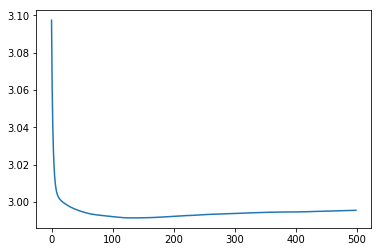

In [204]:
plt.plot([i for i in range(500)],validation_loss)
plt.show()

In [205]:
#re-initialize this net (so re-initialize the parameters)
doc2vec10_net = Net(10, 6, 1)
#print(list(doc2vec10_net.parameters())[0])

In [206]:
#final model for nn:
for epoch in range(127):
    for step, (batch_x, batch_y) in enumerate(train_total_loader):
        print('Epoch:', epoch, '| Step: ', step)
        b_x = Variable(batch_x.float())
        b_y = Variable(batch_y.float())
        
        prediction = doc2vec10_net(b_x)
        train_loss = loss_func(prediction, b_y)
        print('training loss is: ',train_loss.data[0])
        print('\n')

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

      
        

Epoch: 0 | Step:  0
training loss is:  3.258312940597534


Epoch: 0 | Step:  1
training loss is:  3.2725183963775635


Epoch: 0 | Step:  2
training loss is:  2.8866074085235596


Epoch: 0 | Step:  3
training loss is:  3.2951815128326416


Epoch: 0 | Step:  4
training loss is:  3.042487382888794


Epoch: 0 | Step:  5
training loss is:  2.687108039855957


Epoch: 0 | Step:  6
training loss is:  2.986205816268921


Epoch: 0 | Step:  7
training loss is:  3.615833044052124


Epoch: 0 | Step:  8
training loss is:  2.5547516345977783


Epoch: 0 | Step:  9
training loss is:  3.191347360610962


Epoch: 0 | Step:  10
training loss is:  3.0468316078186035


Epoch: 0 | Step:  11
training loss is:  2.7395598888397217


Epoch: 0 | Step:  12
training loss is:  2.7053513526916504


Epoch: 0 | Step:  13
training loss is:  4.045436859130859


Epoch: 0 | Step:  14
training loss is:  2.6915640830993652


Epoch: 0 | Step:  15
training loss is:  3.736567974090576


Epoch: 0 | Step:  16
training loss is:  3.

Epoch: 5 | Step:  0
training loss is:  3.258312940597534


Epoch: 5 | Step:  1
training loss is:  3.2725183963775635


Epoch: 5 | Step:  2
training loss is:  2.8866074085235596


Epoch: 5 | Step:  3
training loss is:  3.2951815128326416


Epoch: 5 | Step:  4
training loss is:  3.042487382888794


Epoch: 5 | Step:  5
training loss is:  2.687108039855957


Epoch: 5 | Step:  6
training loss is:  2.986205816268921


Epoch: 5 | Step:  7
training loss is:  3.615833044052124


Epoch: 5 | Step:  8
training loss is:  2.5547516345977783


Epoch: 5 | Step:  9
training loss is:  3.191347360610962


Epoch: 5 | Step:  10
training loss is:  3.0468316078186035


Epoch: 5 | Step:  11
training loss is:  2.7395598888397217


Epoch: 5 | Step:  12
training loss is:  2.7053513526916504


Epoch: 5 | Step:  13
training loss is:  4.045436859130859


Epoch: 5 | Step:  14
training loss is:  2.6915640830993652


Epoch: 5 | Step:  15
training loss is:  3.736567974090576


Epoch: 5 | Step:  16
training loss is:  3.

Epoch: 10 | Step:  0
training loss is:  3.258312940597534


Epoch: 10 | Step:  1
training loss is:  3.2725183963775635


Epoch: 10 | Step:  2
training loss is:  2.8866074085235596


Epoch: 10 | Step:  3
training loss is:  3.2951815128326416


Epoch: 10 | Step:  4
training loss is:  3.042487382888794


Epoch: 10 | Step:  5
training loss is:  2.687108039855957


Epoch: 10 | Step:  6
training loss is:  2.986205816268921


Epoch: 10 | Step:  7
training loss is:  3.615833044052124


Epoch: 10 | Step:  8
training loss is:  2.5547516345977783


Epoch: 10 | Step:  9
training loss is:  3.191347360610962


Epoch: 10 | Step:  10
training loss is:  3.0468316078186035


Epoch: 10 | Step:  11
training loss is:  2.7395598888397217


Epoch: 10 | Step:  12
training loss is:  2.7053513526916504


Epoch: 10 | Step:  13
training loss is:  4.045436859130859


Epoch: 10 | Step:  14
training loss is:  2.6915640830993652


Epoch: 10 | Step:  15
training loss is:  3.736567974090576


Epoch: 10 | Step:  16
trai

Epoch: 15 | Step:  0
training loss is:  3.258312940597534


Epoch: 15 | Step:  1
training loss is:  3.2725183963775635


Epoch: 15 | Step:  2
training loss is:  2.8866074085235596


Epoch: 15 | Step:  3
training loss is:  3.2951815128326416


Epoch: 15 | Step:  4
training loss is:  3.042487382888794


Epoch: 15 | Step:  5
training loss is:  2.687108039855957


Epoch: 15 | Step:  6
training loss is:  2.986205816268921


Epoch: 15 | Step:  7
training loss is:  3.615833044052124


Epoch: 15 | Step:  8
training loss is:  2.5547516345977783


Epoch: 15 | Step:  9
training loss is:  3.191347360610962


Epoch: 15 | Step:  10
training loss is:  3.0468316078186035


Epoch: 15 | Step:  11
training loss is:  2.7395598888397217


Epoch: 15 | Step:  12
training loss is:  2.7053513526916504


Epoch: 15 | Step:  13
training loss is:  4.045436859130859


Epoch: 15 | Step:  14
training loss is:  2.6915640830993652


Epoch: 15 | Step:  15
training loss is:  3.736567974090576


Epoch: 15 | Step:  16
trai

Epoch: 20 | Step:  0
training loss is:  3.258312940597534


Epoch: 20 | Step:  1
training loss is:  3.2725183963775635


Epoch: 20 | Step:  2
training loss is:  2.8866074085235596


Epoch: 20 | Step:  3
training loss is:  3.2951815128326416


Epoch: 20 | Step:  4
training loss is:  3.042487382888794


Epoch: 20 | Step:  5
training loss is:  2.687108039855957


Epoch: 20 | Step:  6
training loss is:  2.986205816268921


Epoch: 20 | Step:  7
training loss is:  3.615833044052124


Epoch: 20 | Step:  8
training loss is:  2.5547516345977783


Epoch: 20 | Step:  9
training loss is:  3.191347360610962


Epoch: 20 | Step:  10
training loss is:  3.0468316078186035


Epoch: 20 | Step:  11
training loss is:  2.7395598888397217


Epoch: 20 | Step:  12
training loss is:  2.7053513526916504


Epoch: 20 | Step:  13
training loss is:  4.045436859130859


Epoch: 20 | Step:  14
training loss is:  2.6915640830993652


Epoch: 20 | Step:  15
training loss is:  3.736567974090576


Epoch: 20 | Step:  16
trai

Epoch: 25 | Step:  0
training loss is:  3.258312940597534


Epoch: 25 | Step:  1
training loss is:  3.2725183963775635


Epoch: 25 | Step:  2
training loss is:  2.8866074085235596


Epoch: 25 | Step:  3
training loss is:  3.2951815128326416


Epoch: 25 | Step:  4
training loss is:  3.042487382888794


Epoch: 25 | Step:  5
training loss is:  2.687108039855957


Epoch: 25 | Step:  6
training loss is:  2.986205816268921


Epoch: 25 | Step:  7
training loss is:  3.615833044052124


Epoch: 25 | Step:  8
training loss is:  2.5547516345977783


Epoch: 25 | Step:  9
training loss is:  3.191347360610962


Epoch: 25 | Step:  10
training loss is:  3.0468316078186035


Epoch: 25 | Step:  11
training loss is:  2.7395598888397217


Epoch: 25 | Step:  12
training loss is:  2.7053513526916504


Epoch: 25 | Step:  13
training loss is:  4.045436859130859


Epoch: 25 | Step:  14
training loss is:  2.6915640830993652


Epoch: 25 | Step:  15
training loss is:  3.736567974090576


Epoch: 25 | Step:  16
trai

Epoch: 30 | Step:  0
training loss is:  3.258312940597534


Epoch: 30 | Step:  1
training loss is:  3.2725183963775635


Epoch: 30 | Step:  2
training loss is:  2.8866074085235596


Epoch: 30 | Step:  3
training loss is:  3.2951815128326416


Epoch: 30 | Step:  4
training loss is:  3.042487382888794


Epoch: 30 | Step:  5
training loss is:  2.687108039855957


Epoch: 30 | Step:  6
training loss is:  2.986205816268921


Epoch: 30 | Step:  7
training loss is:  3.615833044052124


Epoch: 30 | Step:  8
training loss is:  2.5547516345977783


Epoch: 30 | Step:  9
training loss is:  3.191347360610962


Epoch: 30 | Step:  10
training loss is:  3.0468316078186035


Epoch: 30 | Step:  11
training loss is:  2.7395598888397217


Epoch: 30 | Step:  12
training loss is:  2.7053513526916504


Epoch: 30 | Step:  13
training loss is:  4.045436859130859


Epoch: 30 | Step:  14
training loss is:  2.6915640830993652


Epoch: 30 | Step:  15
training loss is:  3.736567974090576


Epoch: 30 | Step:  16
trai

Epoch: 35 | Step:  0
training loss is:  3.258312940597534


Epoch: 35 | Step:  1
training loss is:  3.2725183963775635


Epoch: 35 | Step:  2
training loss is:  2.8866074085235596


Epoch: 35 | Step:  3
training loss is:  3.2951815128326416


Epoch: 35 | Step:  4
training loss is:  3.042487382888794


Epoch: 35 | Step:  5
training loss is:  2.687108039855957


Epoch: 35 | Step:  6
training loss is:  2.986205816268921


Epoch: 35 | Step:  7
training loss is:  3.615833044052124


Epoch: 35 | Step:  8
training loss is:  2.5547516345977783


Epoch: 35 | Step:  9
training loss is:  3.191347360610962


Epoch: 35 | Step:  10
training loss is:  3.0468316078186035


Epoch: 35 | Step:  11
training loss is:  2.7395598888397217


Epoch: 35 | Step:  12
training loss is:  2.7053513526916504


Epoch: 35 | Step:  13
training loss is:  4.045436859130859


Epoch: 35 | Step:  14
training loss is:  2.6915640830993652


Epoch: 35 | Step:  15
training loss is:  3.736567974090576


Epoch: 35 | Step:  16
trai

Epoch: 40 | Step:  0
training loss is:  3.258312940597534


Epoch: 40 | Step:  1
training loss is:  3.2725183963775635


Epoch: 40 | Step:  2
training loss is:  2.8866074085235596


Epoch: 40 | Step:  3
training loss is:  3.2951815128326416


Epoch: 40 | Step:  4
training loss is:  3.042487382888794


Epoch: 40 | Step:  5
training loss is:  2.687108039855957


Epoch: 40 | Step:  6
training loss is:  2.986205816268921


Epoch: 40 | Step:  7
training loss is:  3.615833044052124


Epoch: 40 | Step:  8
training loss is:  2.5547516345977783


Epoch: 40 | Step:  9
training loss is:  3.191347360610962


Epoch: 40 | Step:  10
training loss is:  3.0468316078186035


Epoch: 40 | Step:  11
training loss is:  2.7395598888397217


Epoch: 40 | Step:  12
training loss is:  2.7053513526916504


Epoch: 40 | Step:  13
training loss is:  4.045436859130859


Epoch: 40 | Step:  14
training loss is:  2.6915640830993652


Epoch: 40 | Step:  15
training loss is:  3.736567974090576


Epoch: 40 | Step:  16
trai

Epoch: 45 | Step:  0
training loss is:  3.258312940597534


Epoch: 45 | Step:  1
training loss is:  3.2725183963775635


Epoch: 45 | Step:  2
training loss is:  2.8866074085235596


Epoch: 45 | Step:  3
training loss is:  3.2951815128326416


Epoch: 45 | Step:  4
training loss is:  3.042487382888794


Epoch: 45 | Step:  5
training loss is:  2.687108039855957


Epoch: 45 | Step:  6
training loss is:  2.986205816268921


Epoch: 45 | Step:  7
training loss is:  3.615833044052124


Epoch: 45 | Step:  8
training loss is:  2.5547516345977783


Epoch: 45 | Step:  9
training loss is:  3.191347360610962


Epoch: 45 | Step:  10
training loss is:  3.0468316078186035


Epoch: 45 | Step:  11
training loss is:  2.7395598888397217


Epoch: 45 | Step:  12
training loss is:  2.7053513526916504


Epoch: 45 | Step:  13
training loss is:  4.045436859130859


Epoch: 45 | Step:  14
training loss is:  2.6915640830993652


Epoch: 45 | Step:  15
training loss is:  3.736567974090576


Epoch: 45 | Step:  16
trai



Epoch: 49 | Step:  25
training loss is:  4.0525221824646


Epoch: 49 | Step:  26
training loss is:  2.6806252002716064


Epoch: 49 | Step:  27
training loss is:  3.1466894149780273


Epoch: 50 | Step:  0
training loss is:  3.258312940597534


Epoch: 50 | Step:  1
training loss is:  3.2725183963775635


Epoch: 50 | Step:  2
training loss is:  2.8866074085235596


Epoch: 50 | Step:  3
training loss is:  3.2951815128326416


Epoch: 50 | Step:  4
training loss is:  3.042487382888794


Epoch: 50 | Step:  5
training loss is:  2.687108039855957


Epoch: 50 | Step:  6
training loss is:  2.986205816268921


Epoch: 50 | Step:  7
training loss is:  3.615833044052124


Epoch: 50 | Step:  8
training loss is:  2.5547516345977783


Epoch: 50 | Step:  9
training loss is:  3.191347360610962


Epoch: 50 | Step:  10
training loss is:  3.0468316078186035


Epoch: 50 | Step:  11
training loss is:  2.7395598888397217


Epoch: 50 | Step:  12
training loss is:  2.7053513526916504


Epoch: 50 | Step:  13
tra

training loss is:  3.0755655765533447


Epoch: 54 | Step:  20
training loss is:  3.7376832962036133


Epoch: 54 | Step:  21
training loss is:  2.8888251781463623


Epoch: 54 | Step:  22
training loss is:  3.5729589462280273


Epoch: 54 | Step:  23
training loss is:  3.231546640396118


Epoch: 54 | Step:  24
training loss is:  3.522817611694336


Epoch: 54 | Step:  25
training loss is:  4.0525221824646


Epoch: 54 | Step:  26
training loss is:  2.6806252002716064


Epoch: 54 | Step:  27
training loss is:  3.1466894149780273


Epoch: 55 | Step:  0
training loss is:  3.258312940597534


Epoch: 55 | Step:  1
training loss is:  3.2725183963775635


Epoch: 55 | Step:  2
training loss is:  2.8866074085235596


Epoch: 55 | Step:  3
training loss is:  3.2951815128326416


Epoch: 55 | Step:  4
training loss is:  3.042487382888794


Epoch: 55 | Step:  5
training loss is:  2.687108039855957


Epoch: 55 | Step:  6
training loss is:  2.986205816268921


Epoch: 55 | Step:  7
training loss is:  3.6158

training loss is:  5.484503746032715


Epoch: 59 | Step:  19
training loss is:  3.0755655765533447


Epoch: 59 | Step:  20
training loss is:  3.7376832962036133


Epoch: 59 | Step:  21
training loss is:  2.8888251781463623


Epoch: 59 | Step:  22
training loss is:  3.5729589462280273


Epoch: 59 | Step:  23
training loss is:  3.231546640396118


Epoch: 59 | Step:  24
training loss is:  3.522817611694336


Epoch: 59 | Step:  25
training loss is:  4.0525221824646


Epoch: 59 | Step:  26
training loss is:  2.6806252002716064


Epoch: 59 | Step:  27
training loss is:  3.1466894149780273


Epoch: 60 | Step:  0
training loss is:  3.258312940597534


Epoch: 60 | Step:  1
training loss is:  3.2725183963775635


Epoch: 60 | Step:  2
training loss is:  2.8866074085235596


Epoch: 60 | Step:  3
training loss is:  3.2951815128326416


Epoch: 60 | Step:  4
training loss is:  3.042487382888794


Epoch: 60 | Step:  5
training loss is:  2.687108039855957


Epoch: 60 | Step:  6
training loss is:  2.986

Epoch: 64 | Step:  17
training loss is:  3.0852901935577393


Epoch: 64 | Step:  18
training loss is:  5.484503746032715


Epoch: 64 | Step:  19
training loss is:  3.0755655765533447


Epoch: 64 | Step:  20
training loss is:  3.7376832962036133


Epoch: 64 | Step:  21
training loss is:  2.8888251781463623


Epoch: 64 | Step:  22
training loss is:  3.5729589462280273


Epoch: 64 | Step:  23
training loss is:  3.231546640396118


Epoch: 64 | Step:  24
training loss is:  3.522817611694336


Epoch: 64 | Step:  25
training loss is:  4.0525221824646


Epoch: 64 | Step:  26
training loss is:  2.6806252002716064


Epoch: 64 | Step:  27
training loss is:  3.1466894149780273


Epoch: 65 | Step:  0
training loss is:  3.258312940597534


Epoch: 65 | Step:  1
training loss is:  3.2725183963775635


Epoch: 65 | Step:  2
training loss is:  2.8866074085235596


Epoch: 65 | Step:  3
training loss is:  3.2951815128326416


Epoch: 65 | Step:  4
training loss is:  3.042487382888794


Epoch: 65 | Step:  5



Epoch: 69 | Step:  18
training loss is:  5.484503746032715


Epoch: 69 | Step:  19
training loss is:  3.0755655765533447


Epoch: 69 | Step:  20
training loss is:  3.7376832962036133


Epoch: 69 | Step:  21
training loss is:  2.8888251781463623


Epoch: 69 | Step:  22
training loss is:  3.5729589462280273


Epoch: 69 | Step:  23
training loss is:  3.231546640396118


Epoch: 69 | Step:  24
training loss is:  3.522817611694336


Epoch: 69 | Step:  25
training loss is:  4.0525221824646


Epoch: 69 | Step:  26
training loss is:  2.6806252002716064


Epoch: 69 | Step:  27
training loss is:  3.1466894149780273


Epoch: 70 | Step:  0
training loss is:  3.258312940597534


Epoch: 70 | Step:  1
training loss is:  3.2725183963775635


Epoch: 70 | Step:  2
training loss is:  2.8866074085235596


Epoch: 70 | Step:  3
training loss is:  3.2951815128326416


Epoch: 70 | Step:  4
training loss is:  3.042487382888794


Epoch: 70 | Step:  5
training loss is:  2.687108039855957


Epoch: 70 | Step:  6
t

Epoch: 74 | Step:  16
training loss is:  3.4722180366516113


Epoch: 74 | Step:  17
training loss is:  3.0852901935577393


Epoch: 74 | Step:  18
training loss is:  5.484503746032715


Epoch: 74 | Step:  19
training loss is:  3.0755655765533447


Epoch: 74 | Step:  20
training loss is:  3.7376832962036133


Epoch: 74 | Step:  21
training loss is:  2.8888251781463623


Epoch: 74 | Step:  22
training loss is:  3.5729589462280273


Epoch: 74 | Step:  23
training loss is:  3.231546640396118


Epoch: 74 | Step:  24
training loss is:  3.522817611694336


Epoch: 74 | Step:  25
training loss is:  4.0525221824646


Epoch: 74 | Step:  26
training loss is:  2.6806252002716064


Epoch: 74 | Step:  27
training loss is:  3.1466894149780273


Epoch: 75 | Step:  0
training loss is:  3.258312940597534


Epoch: 75 | Step:  1
training loss is:  3.2725183963775635


Epoch: 75 | Step:  2
training loss is:  2.8866074085235596


Epoch: 75 | Step:  3
training loss is:  3.2951815128326416


Epoch: 75 | Step:  

training loss is:  4.045436859130859


Epoch: 79 | Step:  14
training loss is:  2.6915640830993652


Epoch: 79 | Step:  15
training loss is:  3.736567974090576


Epoch: 79 | Step:  16
training loss is:  3.4722180366516113


Epoch: 79 | Step:  17
training loss is:  3.0852901935577393


Epoch: 79 | Step:  18
training loss is:  5.484503746032715


Epoch: 79 | Step:  19
training loss is:  3.0755655765533447


Epoch: 79 | Step:  20
training loss is:  3.7376832962036133


Epoch: 79 | Step:  21
training loss is:  2.8888251781463623


Epoch: 79 | Step:  22
training loss is:  3.5729589462280273


Epoch: 79 | Step:  23
training loss is:  3.231546640396118


Epoch: 79 | Step:  24
training loss is:  3.522817611694336


Epoch: 79 | Step:  25
training loss is:  4.0525221824646


Epoch: 79 | Step:  26
training loss is:  2.6806252002716064


Epoch: 79 | Step:  27
training loss is:  3.1466894149780273


Epoch: 80 | Step:  0
training loss is:  3.258312940597534


Epoch: 80 | Step:  1
training loss is:  

training loss is:  3.4722180366516113


Epoch: 84 | Step:  17
training loss is:  3.0852901935577393


Epoch: 84 | Step:  18
training loss is:  5.484503746032715


Epoch: 84 | Step:  19
training loss is:  3.0755655765533447


Epoch: 84 | Step:  20
training loss is:  3.7376832962036133


Epoch: 84 | Step:  21
training loss is:  2.8888251781463623


Epoch: 84 | Step:  22
training loss is:  3.5729589462280273


Epoch: 84 | Step:  23
training loss is:  3.231546640396118


Epoch: 84 | Step:  24
training loss is:  3.522817611694336


Epoch: 84 | Step:  25
training loss is:  4.0525221824646


Epoch: 84 | Step:  26
training loss is:  2.6806252002716064


Epoch: 84 | Step:  27
training loss is:  3.1466894149780273


Epoch: 85 | Step:  0
training loss is:  3.258312940597534


Epoch: 85 | Step:  1
training loss is:  3.2725183963775635


Epoch: 85 | Step:  2
training loss is:  2.8866074085235596


Epoch: 85 | Step:  3
training loss is:  3.2951815128326416


Epoch: 85 | Step:  4
training loss is:  3

training loss is:  3.736567974090576


Epoch: 89 | Step:  16
training loss is:  3.4722180366516113


Epoch: 89 | Step:  17
training loss is:  3.0852901935577393


Epoch: 89 | Step:  18
training loss is:  5.484503746032715


Epoch: 89 | Step:  19
training loss is:  3.0755655765533447


Epoch: 89 | Step:  20
training loss is:  3.7376832962036133


Epoch: 89 | Step:  21
training loss is:  2.8888251781463623


Epoch: 89 | Step:  22
training loss is:  3.5729589462280273


Epoch: 89 | Step:  23
training loss is:  3.231546640396118


Epoch: 89 | Step:  24
training loss is:  3.522817611694336


Epoch: 89 | Step:  25
training loss is:  4.0525221824646


Epoch: 89 | Step:  26
training loss is:  2.6806252002716064


Epoch: 89 | Step:  27
training loss is:  3.1466894149780273


Epoch: 90 | Step:  0
training loss is:  3.258312940597534


Epoch: 90 | Step:  1
training loss is:  3.2725183963775635


Epoch: 90 | Step:  2
training loss is:  2.8866074085235596


Epoch: 90 | Step:  3
training loss is:  3

Epoch: 94 | Step:  10
training loss is:  3.0468316078186035


Epoch: 94 | Step:  11
training loss is:  2.7395598888397217


Epoch: 94 | Step:  12
training loss is:  2.7053513526916504


Epoch: 94 | Step:  13
training loss is:  4.045436859130859


Epoch: 94 | Step:  14
training loss is:  2.6915640830993652


Epoch: 94 | Step:  15
training loss is:  3.736567974090576


Epoch: 94 | Step:  16
training loss is:  3.4722180366516113


Epoch: 94 | Step:  17
training loss is:  3.0852901935577393


Epoch: 94 | Step:  18
training loss is:  5.484503746032715


Epoch: 94 | Step:  19
training loss is:  3.0755655765533447


Epoch: 94 | Step:  20
training loss is:  3.7376832962036133


Epoch: 94 | Step:  21
training loss is:  2.8888251781463623


Epoch: 94 | Step:  22
training loss is:  3.5729589462280273


Epoch: 94 | Step:  23
training loss is:  3.231546640396118


Epoch: 94 | Step:  24
training loss is:  3.522817611694336


Epoch: 94 | Step:  25
training loss is:  4.0525221824646


Epoch: 94 | Step

training loss is:  3.0755655765533447


Epoch: 99 | Step:  20
training loss is:  3.7376832962036133


Epoch: 99 | Step:  21
training loss is:  2.8888251781463623


Epoch: 99 | Step:  22
training loss is:  3.5729589462280273


Epoch: 99 | Step:  23
training loss is:  3.231546640396118


Epoch: 99 | Step:  24
training loss is:  3.522817611694336


Epoch: 99 | Step:  25
training loss is:  4.0525221824646


Epoch: 99 | Step:  26
training loss is:  2.6806252002716064


Epoch: 99 | Step:  27
training loss is:  3.1466894149780273


Epoch: 100 | Step:  0
training loss is:  3.258312940597534


Epoch: 100 | Step:  1
training loss is:  3.2725183963775635


Epoch: 100 | Step:  2
training loss is:  2.8866074085235596


Epoch: 100 | Step:  3
training loss is:  3.2951815128326416


Epoch: 100 | Step:  4
training loss is:  3.042487382888794


Epoch: 100 | Step:  5
training loss is:  2.687108039855957


Epoch: 100 | Step:  6
training loss is:  2.986205816268921


Epoch: 100 | Step:  7
training loss is:

Epoch: 105 | Step:  0
training loss is:  3.258312940597534


Epoch: 105 | Step:  1
training loss is:  3.2725183963775635


Epoch: 105 | Step:  2
training loss is:  2.8866074085235596


Epoch: 105 | Step:  3
training loss is:  3.2951815128326416


Epoch: 105 | Step:  4
training loss is:  3.042487382888794


Epoch: 105 | Step:  5
training loss is:  2.687108039855957


Epoch: 105 | Step:  6
training loss is:  2.986205816268921


Epoch: 105 | Step:  7
training loss is:  3.615833044052124


Epoch: 105 | Step:  8
training loss is:  2.5547516345977783


Epoch: 105 | Step:  9
training loss is:  3.191347360610962


Epoch: 105 | Step:  10
training loss is:  3.0468316078186035


Epoch: 105 | Step:  11
training loss is:  2.7395598888397217


Epoch: 105 | Step:  12
training loss is:  2.7053513526916504


Epoch: 105 | Step:  13
training loss is:  4.045436859130859


Epoch: 105 | Step:  14
training loss is:  2.6915640830993652


Epoch: 105 | Step:  15
training loss is:  3.736567974090576


Epoch: 105

Epoch: 110 | Step:  0
training loss is:  3.258312940597534


Epoch: 110 | Step:  1
training loss is:  3.2725183963775635


Epoch: 110 | Step:  2
training loss is:  2.8866074085235596


Epoch: 110 | Step:  3
training loss is:  3.2951815128326416


Epoch: 110 | Step:  4
training loss is:  3.042487382888794


Epoch: 110 | Step:  5
training loss is:  2.687108039855957


Epoch: 110 | Step:  6
training loss is:  2.986205816268921


Epoch: 110 | Step:  7
training loss is:  3.615833044052124


Epoch: 110 | Step:  8
training loss is:  2.5547516345977783


Epoch: 110 | Step:  9
training loss is:  3.191347360610962


Epoch: 110 | Step:  10
training loss is:  3.0468316078186035


Epoch: 110 | Step:  11
training loss is:  2.7395598888397217


Epoch: 110 | Step:  12
training loss is:  2.7053513526916504


Epoch: 110 | Step:  13
training loss is:  4.045436859130859


Epoch: 110 | Step:  14
training loss is:  2.6915640830993652


Epoch: 110 | Step:  15
training loss is:  3.736567974090576


Epoch: 110

Epoch: 115 | Step:  0
training loss is:  3.258312940597534


Epoch: 115 | Step:  1
training loss is:  3.2725183963775635


Epoch: 115 | Step:  2
training loss is:  2.8866074085235596


Epoch: 115 | Step:  3
training loss is:  3.2951815128326416


Epoch: 115 | Step:  4
training loss is:  3.042487382888794


Epoch: 115 | Step:  5
training loss is:  2.687108039855957


Epoch: 115 | Step:  6
training loss is:  2.986205816268921


Epoch: 115 | Step:  7
training loss is:  3.615833044052124


Epoch: 115 | Step:  8
training loss is:  2.5547516345977783


Epoch: 115 | Step:  9
training loss is:  3.191347360610962


Epoch: 115 | Step:  10
training loss is:  3.0468316078186035


Epoch: 115 | Step:  11
training loss is:  2.7395598888397217


Epoch: 115 | Step:  12
training loss is:  2.7053513526916504


Epoch: 115 | Step:  13
training loss is:  4.045436859130859


Epoch: 115 | Step:  14
training loss is:  2.6915640830993652


Epoch: 115 | Step:  15
training loss is:  3.736567974090576


Epoch: 115

Epoch: 120 | Step:  0
training loss is:  3.258312940597534


Epoch: 120 | Step:  1
training loss is:  3.2725183963775635


Epoch: 120 | Step:  2
training loss is:  2.8866074085235596


Epoch: 120 | Step:  3
training loss is:  3.2951815128326416


Epoch: 120 | Step:  4
training loss is:  3.042487382888794


Epoch: 120 | Step:  5
training loss is:  2.687108039855957


Epoch: 120 | Step:  6
training loss is:  2.986205816268921


Epoch: 120 | Step:  7
training loss is:  3.615833044052124


Epoch: 120 | Step:  8
training loss is:  2.5547516345977783


Epoch: 120 | Step:  9
training loss is:  3.191347360610962


Epoch: 120 | Step:  10
training loss is:  3.0468316078186035


Epoch: 120 | Step:  11
training loss is:  2.7395598888397217


Epoch: 120 | Step:  12
training loss is:  2.7053513526916504


Epoch: 120 | Step:  13
training loss is:  4.045436859130859


Epoch: 120 | Step:  14
training loss is:  2.6915640830993652


Epoch: 120 | Step:  15
training loss is:  3.736567974090576


Epoch: 120

Epoch: 125 | Step:  0
training loss is:  3.258312940597534


Epoch: 125 | Step:  1
training loss is:  3.2725183963775635


Epoch: 125 | Step:  2
training loss is:  2.8866074085235596


Epoch: 125 | Step:  3
training loss is:  3.2951815128326416


Epoch: 125 | Step:  4
training loss is:  3.042487382888794


Epoch: 125 | Step:  5
training loss is:  2.687108039855957


Epoch: 125 | Step:  6
training loss is:  2.986205816268921


Epoch: 125 | Step:  7
training loss is:  3.615833044052124


Epoch: 125 | Step:  8
training loss is:  2.5547516345977783


Epoch: 125 | Step:  9
training loss is:  3.191347360610962


Epoch: 125 | Step:  10
training loss is:  3.0468316078186035


Epoch: 125 | Step:  11
training loss is:  2.7395598888397217


Epoch: 125 | Step:  12
training loss is:  2.7053513526916504


Epoch: 125 | Step:  13
training loss is:  4.045436859130859


Epoch: 125 | Step:  14
training loss is:  2.6915640830993652


Epoch: 125 | Step:  15
training loss is:  3.736567974090576


Epoch: 125

In [211]:
#save the network
torch.save(doc2vec10_net.state_dict(),'doc2vec10_net.pkl')

In [212]:
#restore the network
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden) 
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict=torch.nn.Linear(n_hidden,1) 
    #forward:
    def forward(self,x):
        x=F.relu(self.hidden(x)) 
        x=self.hidden2(x)
        x=self.predict(x) 
        return x
    
doc2vec_net = Net(26, 13, 1)

optimizer=torch.optim.SGD(doc2vec10_net.parameters(),lr=0.008)
loss_func=torch.nn.MSELoss()
loss_func_MAe=torch.nn.L1Loss()

doc2vec10_net.load_state_dict(torch.load('doc2vec10_net.pkl'))

In [213]:
#final prediction
final_prediction_y = doc2vec10_net(x_test).data.numpy()
true_y = y_test.data.numpy()
plt.scatter(true_y, final_prediction_y)

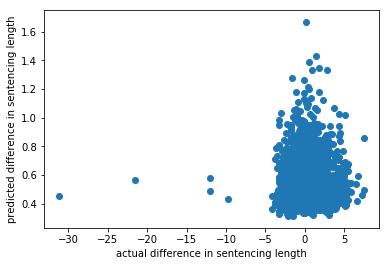

In [214]:
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

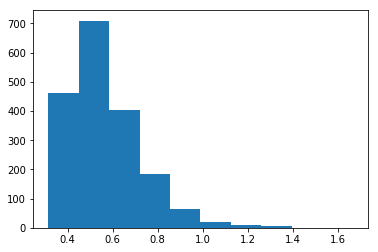

In [215]:
plt.hist(final_prediction_y)
plt.show()

In [216]:
#final result avoid overfitting
print('mean squared error is: {}'.format(mean_squared_error(true_y, final_prediction_y)))
print('mean absolute error is {}'.format(mean_absolute_error(true_y, final_prediction_y)))

mean squared error is: 4.23680305480957
mean absolute error is 1.432876706123352


In [218]:
#std
np.std(final_prediction_y)

0.16139334

In [219]:
#mean
np.mean(final_prediction_y)

0.5669466

In [217]:
print('R2 is {}'.format(r2_score(true_y, final_prediction_y)))

R2 is -0.03241261424399933


# compare Neural Network result with GBR with its best parameters performance

In [139]:
svd_80_train_df.iloc[:,-1]

0       0.608711
1       0.228592
2      -3.150298
3      -1.195514
4      -0.082692
5      -1.952032
6       0.855352
7       3.731262
8       0.729401
9       0.760434
10      0.973780
11     -1.930957
12     -1.636408
13      0.308966
14      1.531688
15     -1.672693
16      0.309356
17      2.008592
18      0.779555
19     -0.660848
20     -0.285322
21     -2.535885
22      1.259840
23      0.490622
24      1.179164
25     -0.621066
26     -0.010986
27      0.421632
28      0.592588
29     -0.191471
          ...   
5503   -0.497116
5504   -0.280298
5505   -2.077597
5506    5.241403
5507   -2.388459
5508   -2.135797
5509   -0.258852
5510   -1.343981
5511   -0.166765
5512    4.959885
5513   -2.117241
5514   -1.259774
5515    1.089598
5516    1.094150
5517   -1.960389
5518    1.157542
5519    0.634144
5520    1.059720
5521    2.598694
5522   -1.499407
5523   -1.938785
5524   -2.049534
5525    0.560467
5526   -2.012394
5527    2.219812
5528   -0.990451
5529    1.965008
5530   -0.3326

In [ ]:
#joblib.dump(regressor_rfr,'regressor_rfr2')
#regressor_rfr=joblib.load('regressor_rfr2.')

In [ ]:
#svd80

In [18]:
%%time
gbr = GradientBoostingRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
gbr_cv = GridSearchCV(gbr, parameters)
gbr_cv.fit(svd_80_train_df.iloc[:,1:-1], svd_80_train_df.iloc[:,-1])


CPU times: user 3min 52s, sys: 469 ms, total: 3min 52s
Wall time: 3min 53s


In [19]:
gbr_cv.best_params_

{'max_depth': 2, 'max_features': 'log2', 'n_estimators': 10}

In [20]:
gbr_opt = GradientBoostingRegressor(max_depth= 2, max_features='log2', n_estimators= 10, random_state = 100)
gbr_opt.fit(svd_80_train_df.iloc[:,1:-1], svd_80_train_df.iloc[:,-1])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=100, subsample=1.0, verbose=0, warm_start=False)

In [21]:
#save the model
joblib.dump(gbr_opt,'DLS_gbr_svd80')

['DLS_gbr']

In [40]:
#load back the model
gbr_opt = joblib.load('DLS_gbr_svd80')

In [24]:
#double check
svd_80_test_df.iloc[:,1:-1].head()

0         1         2         3         4         5         6  \
0  0.119560 -0.025109  0.006438 -0.007404  0.016002 -0.019776  0.026109   
1  0.225139 -0.005882 -0.016542 -0.041020  0.020823 -0.080195 -0.008058   
2  0.335446 -0.088022 -0.039261 -0.161905 -0.059537  0.038900  0.040520   
3  0.099370 -0.008746  0.038461  0.022873  0.025342 -0.033024  0.035557   
4  0.248678 -0.052280 -0.046642 -0.072317 -0.028221  0.027054  0.023326   

          7         8         9     ...            71        72        73  \
0 -0.022353 -0.004703  0.016800     ...      0.003536 -0.002189 -0.004307   
1  0.229446  0.192719 -0.001701     ...     -0.012602  0.000728  0.000797   
2  0.014652 -0.039186 -0.038314     ...     -0.004119  0.030543  0.011942   
3 -0.004343 -0.004816  0.044422     ...      0.026607  0.000255 -0.035879   
4  0.031732 -0.029729 -0.031930     ...      0.012108  0.011121 -0.007850   

         74        75        76        77        78        79  Res_binary  
0 -0.001435  0.003439  0.001334 -0.004446  0.009664 -0.000136         2.0  
1 -0.017789 -0.010660 -0.009809  0.011780  0.024659 -0.018850         1.0  
2 -0.029525 -0.001460 -0.013784  0.009994 -0.006725  0.027584         1.0  
3  0.006139  0.006691 -0.010826 -0.015188  0.001024  0.012109         1.0  
4 -0.005257  0.013521  0.014197 -0.020057  0.002573 -0.002373         1.0  

[5 rows x 81 columns]

In [41]:
gbr_opt_dls_pred = gbr_opt.predict(svd_80_test_df.iloc[:,1:-1])
gbr_opt_dls_mse = mean_squared_error(svd_80_test_df.iloc[:,-1], gbr_opt_dls_pred)
gbr_opt_dls_mae = mean_absolute_error(svd_80_test_df.iloc[:,-1], gbr_opt_dls_pred)

In [42]:
#double check
gbr_opt_dls_pred

array([0.2719958 , 0.23550341, 0.22879988, ..., 0.2719958 , 0.24716304,
       0.22751336])

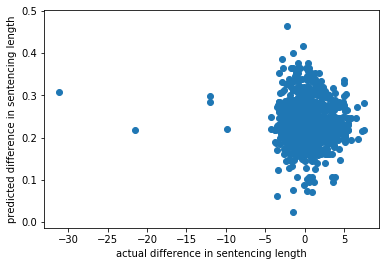

In [43]:
#prediction scatter plot
plt.scatter(svd_80_test_df.iloc[:,-1], gbr_opt_dls_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

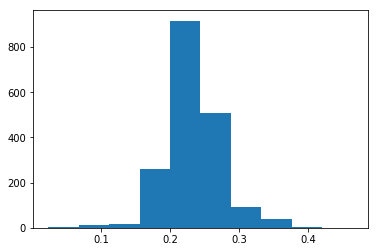

In [44]:
#hist
plt.hist(gbr_opt_dls_pred)
plt.show()

In [45]:
print('mean squared error is {}'.format(gbr_opt_dls_mse))
print('mean absolute error is {}'.format(gbr_opt_dls_mae))

mean squared error is 4.111736351898328
mean absolute error is 1.3934725835438861


In [46]:
#std
np.std(gbr_opt_dls_pred)

0.041200337700411115

In [47]:
#mean
np.mean(gbr_opt_dls_pred)

0.23469569366376494

In [48]:
print(r2_score(svd_80_test_df.iloc[:,-1],gbr_opt_dls_pred))

-0.0019366936372837706


In [ ]:
#svd25

In [49]:
svd_25_train_df.head()

Unnamed: 0         0         1         2         3         4         5  \
0           1  0.100533  0.021049  0.007306  0.001950  0.001177 -0.019885   
1           2  0.157620 -0.026298 -0.043520 -0.057412 -0.039803  0.026673   
2           3  0.141970 -0.026448 -0.080584 -0.054686 -0.016306  0.081739   
3           5  0.190061  0.104726  0.008651  0.053578  0.034260  0.072505   
4           6  0.228796 -0.007014  0.070922 -0.003453 -0.030457 -0.000778   

          6         7         8    ...           17        18        19  \
0 -0.008458  0.018879 -0.024918    ...    -0.005037  0.034504 -0.002435   
1  0.008052 -0.012448 -0.011200    ...     0.044531 -0.007872  0.019703   
2 -0.037346  0.017909 -0.010613    ...     0.022744  0.028002  0.041845   
3  0.050786 -0.012770 -0.008438    ...    -0.057134 -0.010369  0.041399   
4  0.019796 -0.032056 -0.012846    ...     0.037565 -0.008186  0.048420   

         20        21        22        23        24  Res_binary         y  
0 -0.006420 -0.013477 -0.009905  0.003840 -0.003227         1.0  0.608711  
1  0.015246  0.016913  0.023312  0.009395  0.010931         1.0  0.228592  
2 -0.002937  0.010306 -0.006271  0.009760  0.020639         1.0 -3.150298  
3  0.009176 -0.055803  0.024573 -0.007181  0.081284         1.0 -1.195514  
4  0.020534  0.013580  0.034352 -0.069956 -0.031446         2.0 -0.082692  

[5 rows x 28 columns]

In [50]:
%%time
gbr = GradientBoostingRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
gbr_cv = GridSearchCV(gbr, parameters)
gbr_cv.fit(svd_25_train_df.iloc[:,1:-1], svd_25_train_df.iloc[:,-1])


CPU times: user 1min 27s, sys: 341 ms, total: 1min 28s
Wall time: 1min 30s


In [51]:
gbr_cv.best_params_

{'max_depth': 2, 'max_features': 'log2', 'n_estimators': 10}

In [52]:
gbr_opt = GradientBoostingRegressor(max_depth= 2, max_features='log2', n_estimators= 10, random_state = 101)
gbr_opt.fit(svd_25_train_df.iloc[:,1:-1], svd_25_train_df.iloc[:,-1])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=101, subsample=1.0, verbose=0, warm_start=False)

In [54]:
#save the model
joblib.dump(gbr_opt,'DLS_gbr_svd25')

['DLS_gbr_svd25']

In [55]:
#load back the model
gbr_opt = joblib.load('DLS_gbr_svd25')

In [56]:
gbr_opt_dls_pred = gbr_opt.predict(svd_25_test_df.iloc[:,1:-1])
gbr_opt_dls_mse = mean_squared_error(svd_25_test_df.iloc[:,-1], gbr_opt_dls_pred)
gbr_opt_dls_mae = mean_absolute_error(svd_25_test_df.iloc[:,-1], gbr_opt_dls_pred)

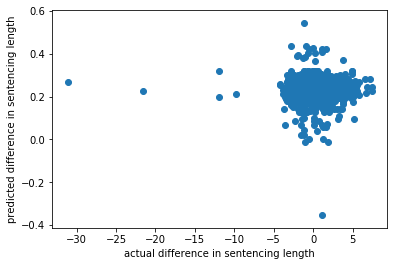

In [60]:
#prediction scatter plot
plt.scatter(svd_25_test_df.iloc[:,-1], gbr_opt_dls_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

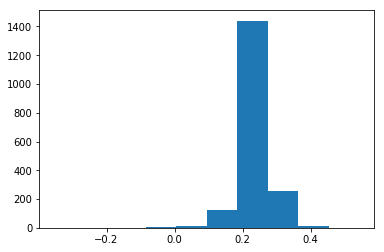

In [61]:
#hist
plt.hist(gbr_opt_dls_pred)
plt.show()

In [57]:
print('mean squared error is {}'.format(gbr_opt_dls_mse))
print('mean absolute error is {}'.format(gbr_opt_dls_mae))


mean squared error is 4.108579806907746
mean absolute error is 1.393557590844666


In [62]:
#std
np.std(gbr_opt_dls_pred)

0.04497811839373906

In [65]:
#mean
np.mean(gbr_opt_dls_pred)

0.2369292610882114

In [66]:
print(r2_score(svd_25_test_df.iloc[:,-1],gbr_opt_dls_pred))

-0.0011675153679326922


In [74]:
#train_data_doc2vec.iloc[:,1:-1]

1         2         3         4         5         6         7  \
0    -0.326839 -0.526210 -0.254383 -0.661842  0.568348  0.333107 -0.101216   
1     0.021020 -1.644101  0.510810 -1.636032  0.752580 -0.162840 -0.157619   
2    -0.609428 -2.635859  0.826938 -1.316913  1.163220 -0.217264 -1.174153   
3    -0.215344 -2.186464 -0.196173 -1.053601  0.518545 -0.125764 -0.451903   
4    -0.339514 -1.579341 -0.022062 -1.320665  0.566175 -0.507670 -0.112583   
5    -0.178419 -0.949754 -0.002895 -1.170243  0.177281 -0.449704 -0.036928   
6    -2.576577 -4.921033  2.093983 -3.537436  2.430235  2.024512 -1.244108   
7    -0.729068 -1.397095  0.661251 -1.768316  0.109301 -0.017660 -0.614747   
8    -0.307642 -1.757436  0.319647 -1.071039  0.671713 -0.280361 -0.308557   
9    -0.493858 -1.428843 -0.217874 -0.595879  0.106733 -0.356740 -0.326650   
10   -1.799158 -4.114706  0.352271 -3.073130  1.032273 -0.415062 -0.740891   
11    0.080263 -0.427765 -0.163431 -0.209975 -0.140034 -0.152056 -0.013247   
12   -1.609750 -2.689872  0.217875 -1.783552  1.947930 -1.399161 -0.585379   
13   -0.244381 -1.017055  0.149560 -0.546735  0.153079 -0.444708 -0.708347   
14   -0.186899 -0.395622  0.223401 -0.070427 -0.072423 -0.012890 -0.119367   
15   -0.060764 -1.155514 -0.149244 -1.205706  0.783780 -0.012364 -0.278983   
16   -1.199930 -2.890261  0.561216 -1.799358  2.382416 -0.728754 -1.886685   
17   -1.783520 -3.966763  1.137281 -2.376040  1.828701 -0.380560 -0.152459   
18   -0.068223 -0.028215 -0.044911 -0.039606  0.050623  0.034804 -0.108516   
19    0.016283 -1.026615  0.739989 -0.799656  0.804342 -0.026371  0.244279   
20   -1.842838 -3.750229  0.044205 -2.689738  1.310070 -0.295262 -0.346539   
21   -0.668579 -1.698068 -0.280684 -1.347887  0.307920 -0.883711  0.516864   
22   -0.403636 -0.764613 -0.359114 -0.291140  0.894096 -0.685896 -0.256106   
23   -0.295284 -0.599514  0.172599 -0.755062  0.537014  0.063276 -0.096981   
24   -0.937434 -2.172035 -0.263725 -0.985264  0.924775  0.104980  0.141296   
25   -0.841084 -2.403892 -0.129043 -1.823904  1.426710 -0.082361 -0.687856   
26   -1.162137 -3.694086 -0.407630 -2.555549  2.235854 -1.095410 -0.842605   
27   -0.632612 -1.359169 -0.041975 -0.401253  0.465952 -0.162871 -0.074525   
28   -2.080916 -2.162809 -0.046215 -1.055884  1.031138 -0.020573 -0.767636   
29   -0.169403 -1.269121 -0.157528 -0.812654  0.606799 -0.081477 -0.227230   
...        ...       ...       ...       ...       ...       ...       ...   
5503 -0.877461 -2.354280  0.338993 -1.244306  1.380504 -0.491851  0.085372   
5504 -0.396800 -1.894467  0.309788 -1.229933  1.341171  0.228634 -0.936338   
5505 -1.769246 -3.523328  1.082386 -3.202107  1.874148 -0.283934 -0.792478   
5506 -0.775604 -2.637496 -0.288097 -1.410303  1.734910 -0.325573 -0.403217   
5507 -0.742142 -1.107878  0.706805 -0.778757  0.793792 -0.414804 -0.280839   
5508 -1.624623 -2.069194  0.336794 -1.464633  1.178073 -0.208569 -0.357562   
5509 -0.167276 -2.868848 -0.180745 -2.918909  2.072088 -0.609998 -1.353894   
5510 -0.964804 -2.439183  0.241688 -0.653864  0.715198  0.353023 -0.990090   
5511 -0.810646 -2.805674  0.396756 -2.043179  1.941975 -0.488596 -0.996661   
5512 -0.518174 -1.880123 -0.111604 -1.047834  0.665265 -0.377092  0.041497   
5513 -0.709886 -1.145753  0.811888 -0.965894  0.873457 -0.315504 -0.426548   
5514 -0.647794 -0.870652  0.440821 -0.375803  0.515483 -0.271582 -0.225370   
5515 -0.702279 -1.601198  0.144216 -1.496534  0.893567 -0.793230 -0.068087   
5516 -0.919456 -1.694858 -0.058697 -1.276859  0.937528  0.046563 -0.136377   
5517 -0.291414 -1.465601 -0.175510 -1.347890  1.222999  0.050361 -0.591869   
5518 -1.235448 -1.399322 -0.242420 -2.213117  1.083771 -0.354103 -0.615957   
5519 -0.515428 -0.759034  0.026180 -0.538241  0.598973  0.060227  0.046660   
5520 -0.299422 -0.618941  0.143010 -0.191921  0.086002 -0.232709 -0.178497   
5521 -1.343417 -3.338217  0.101724 -2.104308  1.252079 -0.448054 -0.720966   
5522 -0.539217 -0.941792 -0.384868 

In [67]:
#doc2vec25

In [75]:
%%time
gbr = GradientBoostingRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
gbr_cv = GridSearchCV(gbr, parameters)
gbr_cv.fit(train_data_doc2vec.iloc[:,1:-1], train_data_doc2vec.iloc[:,-1])


CPU times: user 1min 23s, sys: 143 ms, total: 1min 24s
Wall time: 1min 24s


In [76]:
gbr_cv.best_params_

{'max_depth': 2, 'max_features': 'log2', 'n_estimators': 10}

In [77]:
gbr_opt = GradientBoostingRegressor(max_depth= 2, max_features='log2', n_estimators= 10, random_state = 102)
gbr_opt.fit(train_data_doc2vec.iloc[:,1:-1], train_data_doc2vec.iloc[:,-1])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=102, subsample=1.0, verbose=0, warm_start=False)

In [82]:
#save the model
joblib.dump(gbr_opt,'DLS_gbr_doc2vec25')

['DLS_gbr_doc2vec25']

In [83]:
#load back the model
gbr_opt = joblib.load('DLS_gbr_doc2vec25')

In [84]:
gbr_opt_dls_pred = gbr_opt.predict(test_data_doc2vec.iloc[:,1:-1])
gbr_opt_dls_mse = mean_squared_error(test_data_doc2vec.iloc[:,-1], gbr_opt_dls_pred)
gbr_opt_dls_mae = mean_absolute_error(test_data_doc2vec.iloc[:,-1], gbr_opt_dls_pred)

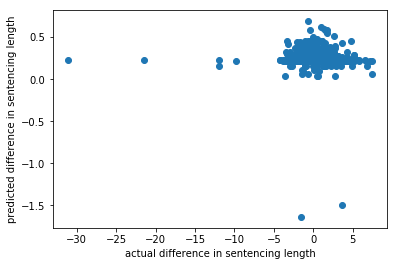

In [87]:
#prediction scatter plot
plt.scatter(test_data_doc2vec.iloc[:,-1], gbr_opt_dls_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

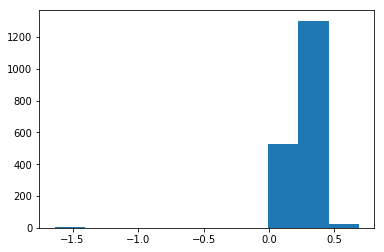

In [88]:
#hist
plt.hist(gbr_opt_dls_pred)
plt.show()

In [85]:
print('mean squared error is {}'.format(gbr_opt_dls_mse))
print('mean absolute error is {}'.format(gbr_opt_dls_mae))


mean squared error is 4.112745076623454
mean absolute error is 1.3926309155952032


In [90]:
#std
np.std(gbr_opt_dls_pred)

0.07538566230229674

In [91]:
#mean
np.mean(gbr_opt_dls_pred)

0.23592058599656404

In [86]:
print(r2_score(test_data_doc2vec.iloc[:,-1],gbr_opt_dls_pred))

-0.0021824969255748172


In [ ]:
#doc2vec10

In [93]:
%%time
gbr = GradientBoostingRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
gbr_cv = GridSearchCV(gbr, parameters)
gbr_cv.fit(train_data_doc2vec10.iloc[:,1:-1], train_data_doc2vec10.iloc[:,-1])


CPU times: user 41.1 s, sys: 83.5 ms, total: 41.2 s
Wall time: 41.6 s


In [94]:
gbr_cv.best_params_

{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 10}

In [95]:
gbr_opt = GradientBoostingRegressor(max_depth= 3, max_features='auto', n_estimators= 10, random_state = 102)
gbr_opt.fit(train_data_doc2vec10.iloc[:,1:-1], train_data_doc2vec10.iloc[:,-1])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=102, subsample=1.0, verbose=0, warm_start=False)

In [99]:
#save the model
joblib.dump(gbr_opt,'DLS_gbr_doc2vec10')

['DLS_gbr_doc2vec10']

In [100]:
#load back the model
gbr_opt = joblib.load('DLS_gbr_doc2vec10')

In [101]:
gbr_opt_dls_pred = gbr_opt.predict(test_data_doc2vec10.iloc[:,1:-1])
gbr_opt_dls_mse = mean_squared_error(test_data_doc2vec10.iloc[:,-1], gbr_opt_dls_pred)
gbr_opt_dls_mae = mean_absolute_error(test_data_doc2vec10.iloc[:,-1], gbr_opt_dls_pred)

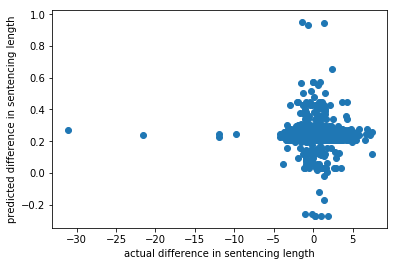

In [104]:
#prediction scatter plot
plt.scatter(test_data_doc2vec10.iloc[:,-1], gbr_opt_dls_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

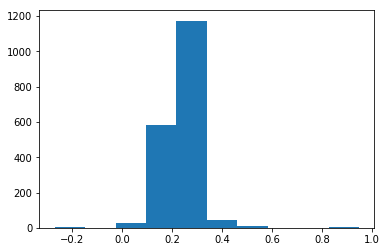

In [105]:
#hist
plt.hist(gbr_opt_dls_pred)
plt.show()

In [102]:
print('mean squared error is {}'.format(gbr_opt_dls_mse))
print('mean absolute error is {}'.format(gbr_opt_dls_mae))


mean squared error is 4.113964960692135
mean absolute error is 1.3941106749839935


In [106]:
#std
np.std(gbr_opt_dls_pred)

0.06618719646759123

In [107]:
#mean
np.mean(gbr_opt_dls_pred)

0.2348800935197502

In [108]:
print(r2_score(test_data_doc2vec10.iloc[:,-1],gbr_opt_dls_pred))

-0.0024797549464667945


# Look at R^2:

## doc2vec25

In [302]:
inference_data = pd.read_csv('bio_txt2.csv')

In [303]:
inference_data.columns.values

array(['Unnamed: 0', 'index', 'x_dem_dm', 'x_republican_dm',
       'x_instate_ba_dm', 'x_elev_dm', 'x_unity_dm', 'x_aba_dm',
       'x_crossa_dm', 'x_pfedjdge_dm', 'x_pindreg1_dm', 'x_plawprof_dm',
       'x_pscab_dm', 'x_pcab_dm', 'x_pusa_dm', 'x_pssenate_dm',
       'x_paag_dm', 'x_psp_dm', 'x_pslc_dm', 'x_pssc_dm', 'x_pshouse_dm',
       'x_psg_dm', 'x_psgo_dm', 'x_psenate_dm', 'x_psatty_dm',
       'x_pprivate_dm', 'x_pmayor_dm', 'x_plocct_dm', 'x_phouse_dm',
       'x_pgov_dm', 'x_pda_dm', 'x_pcc_dm', 'x_pccoun_dm', 'x_pausa_dm',
       'x_pasatty_dm', 'x_pag_dm', 'x_pada_dm', 'x_pgovt_dm',
       'x_llm_sjd_dm', 'x_protestant_dm', 'x_evangelical_dm',
       'x_mainline_dm', 'x_noreligion_dm', 'x_catholic_dm', 'x_jewish_dm',
       'x_black_dm', 'x_nonwhite_dm', 'x_female_dm', 'x_jd_public_dm',
       'x_ba_public_dm', 'x_b10s_dm', 'x_b20s_dm', 'x_b30s_dm',
       'x_b40s_dm', 'x_b50s_dm', 'x_pbank_dm', 'x_pmag_dm',
       'x_ageon40s_dm', 'x_ageon50s_dm', 'x_ageon60s_dm',
      

In [304]:
true_df = inference_data[['index', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24','25','res', 'length_3m_dif']]

In [305]:
predicted_df = inference_data[['index', '1_hat', '2_hat', '3_hat',
       '4_hat', '5_hat', '6_hat', '7_hat', '8_hat', '9_hat', '10_hat',
       '11_hat', '12_hat', '13_hat', '14_hat', '15_hat', '16_hat',
       '17_hat', '18_hat', '19_hat', '20_hat', '21_hat', '22_hat',
       '23_hat', '24_hat','25_hat','res','length_3m_dif']]

In [306]:
predicted_df = predicted_df.drop(['index'],axis=1)
true_df = true_df.drop(['index'],axis=1)

In [307]:
#prepare data:
np.random.seed(2)
msk = np.random.rand(7388) < 0.8

predicted_df_x = predicted_df.iloc[:,:-1]
predicted_df_y = predicted_df.iloc[:,-1]

predicted_df_train_x = predicted_df_x[msk]
predicted_df_test_x = predicted_df_x[~msk]

predicted_df_train_y = predicted_df_y[msk]
predicted_df_test_y = predicted_df_y[~msk]


true_df_x = true_df.iloc[:,:-1]
true_df_y = true_df.iloc[:,-1]

true_df_train_x = true_df_x[msk]
true_df_test_x = true_df_x[~msk]

true_df_train_y = true_df_y[msk]
true_df_test_y = true_df_y[~msk]

In [308]:
msk

array([ True,  True,  True, ..., False,  True, False])

In [309]:
#random forest regressor:

In [119]:
#predicted values R2 score
rfr_predicted_r2 = RandomForestRegressor(n_estimators=1000, random_state = 1)
rfr_predicted_r2.fit(predicted_df_train_x, predicted_df_train_y)
rfr_predicted_r2_pred = rfr_predicted_r2.predict(predicted_df_test_x)

rfr_predicted_r2score = r2_score(predicted_df_test_y,rfr_predicted_r2_pred)

In [121]:
np.std(rfr_predicted_r2_pred)

0.8682360249554821

In [122]:
np.mean(rfr_predicted_r2_pred)

0.26300803446370535

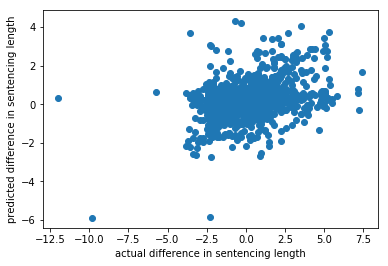

In [128]:
#prediction scatter plot
plt.scatter(predicted_df_test_y,rfr_predicted_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

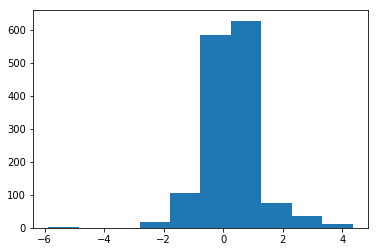

In [129]:
#hist
plt.hist(rfr_predicted_r2_pred)
plt.show()

In [120]:
print('mean squared error is {}'.format(mean_squared_error(predicted_df_test_y, rfr_predicted_r2_pred)))
print('mean absolute error is {}'.format(mean_absolute_error(predicted_df_test_y, rfr_predicted_r2_pred)))

mean squared error is 2.945874909297404
mean absolute error is 1.274497189113781


In [118]:
print(rfr_predicted_r2score)

0.09250232549085269


In [123]:
#True values R2 score
rfr_true_r2 = RandomForestRegressor(n_estimators=1000, random_state=1)
rfr_true_r2.fit(true_df_train_x, true_df_train_y)
rfr_true_r2_pred = rfr_true_r2.predict(true_df_test_x)

rfr_true_r2score = r2_score(true_df_test_y,rfr_true_r2_pred)

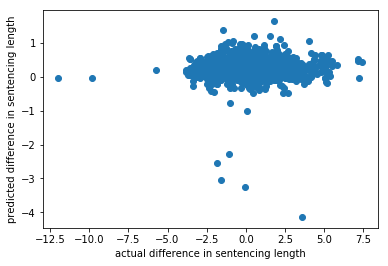

In [130]:
#prediction scatter plot
plt.scatter(true_df_test_y,rfr_true_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

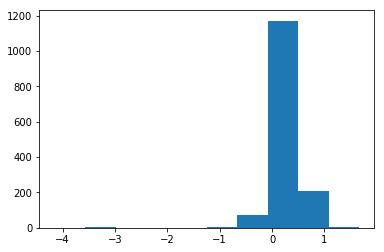

In [131]:
#hist
plt.hist(rfr_true_r2_pred)
plt.show()

In [127]:
np.std(rfr_true_r2_pred)

0.3107325924344816

In [126]:
np.mean(rfr_true_r2_pred)

0.25775797578470583

In [124]:
print('mean squared error is {}'.format(mean_squared_error(true_df_test_y, rfr_true_r2_pred)))
print('mean absolute error is {}'.format(mean_absolute_error(true_df_test_y, rfr_true_r2_pred)))

mean squared error is 3.3221048980166787
mean absolute error is 1.3790978763970905


In [125]:
print(rfr_true_r2score)

-0.023397992871536877


In [ ]:
#zuo dao ci chu, zhi jie run ji ke

In [408]:
#Linear regression

In [139]:
#predicted value R2 score
lr_predicted_r2= linear_model.LinearRegression()
lr_predicted_r2.fit(predicted_df_train_x, predicted_df_train_y)
lr_predicted_r2_pred = lr_predicted_r2.predict(predicted_df_test_x)

lr_predicted_r2score = r2_score(predicted_df_test_y,lr_predicted_r2_pred)

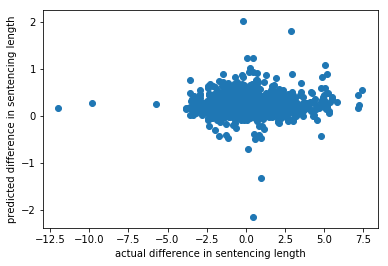

In [140]:
#prediction scatter plot
plt.scatter(predicted_df_test_y,lr_predicted_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

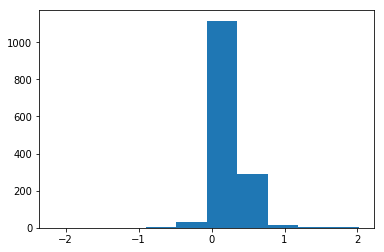

In [141]:
#hist
plt.hist(lr_predicted_r2_pred)
plt.show()

In [541]:
print('mean squared error is {}'.format(mean_squared_error(predicted_df_test_y, lr_predicted_r2_pred)))
print('mean absolute error is {}'.format(mean_absolute_error(predicted_df_test_y, lr_predicted_r2_pred)))

mean squared error is 3.25044940333731
mean absolute error is 1.3659234994885647


In [142]:
np.std(lr_predicted_r2_pred)

0.20125665307352258

In [143]:
np.mean(lr_predicted_r2_pred)

0.24128022469140914

In [542]:
print(lr_predicted_r2score)

-0.0013240091520996256


In [145]:
#True values R2 score
lr_true_r2= linear_model.LinearRegression()
lr_true_r2.fit(true_df_train_x, true_df_train_y)
lr_true_r2_pred = lr_true_r2.predict(true_df_test_x)

lr_true_r2score = r2_score(true_df_test_y,lr_true_r2_pred)

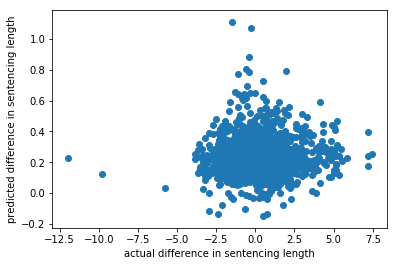

In [146]:
#prediction scatter plot
plt.scatter(predicted_df_test_y,lr_true_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

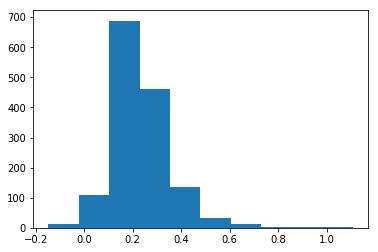

In [147]:
#hist
plt.hist(lr_true_r2_pred)
plt.show()

In [148]:
np.std(lr_true_r2_pred)

0.12083501240731946

In [149]:
np.mean(lr_true_r2_pred)

0.23537736764474745

In [51]:
print('mean squared error is {}'.format(mean_squared_error(true_df_test_y, lr_true_r2_pred)))
print('mean absolute error is {}'.format(mean_absolute_error(true_df_test_y, lr_true_r2_pred)))

mean squared error is 3.2489685960330763
mean absolute error is 1.3644267757219721


In [52]:
print(lr_true_r2score)

-0.0008678359518232703


In [413]:
#Gradient boosting regressor

In [ ]:
#True

In [150]:
%%time
gbr = GradientBoostingRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
gbr_cv = GridSearchCV(gbr, parameters)
gbr_cv.fit(true_df_train_x, true_df_train_y)


CPU times: user 1min 35s, sys: 504 ms, total: 1min 35s
Wall time: 1min 37s


In [151]:
gbr_cv.best_params_

{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 10}

In [152]:
#True value R2 score
gbr_opt_true_r2 = GradientBoostingRegressor(max_depth= 3, max_features='sqrt', n_estimators= 10)
gbr_opt_true_r2.fit(true_df_train_x, true_df_train_y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [157]:
#save the model
joblib.dump(gbr_opt_true_r2,'2ndStage_gbr_doc2vec25')

['2ndStage_gbr_doc2vec25']

In [195]:
#load back the model
gbr_opt = joblib.load('2ndStage_gbr_doc2vec25')

In [196]:
gbr_opt_true_r2_pred = gbr_opt_true_r2.predict(true_df_test_x)
gbr_opt_true_r2score = r2_score(true_df_test_y,gbr_opt_true_r2_pred)

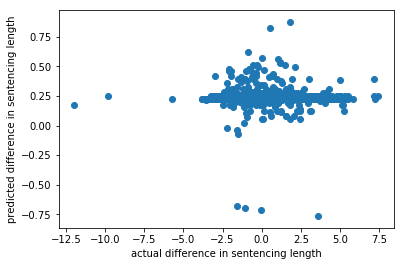

In [197]:
#prediction scatter plot
plt.scatter(true_df_test_y,gbr_opt_true_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

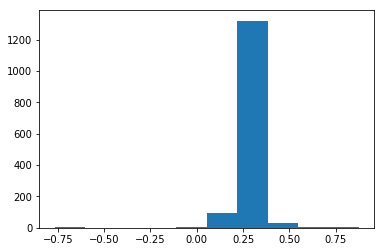

In [198]:
#hist
plt.hist(gbr_opt_true_r2_pred)
plt.show()

In [165]:
print(gbr_opt_true_r2score)

-0.001681354000867774


In [200]:
np.std(gbr_opt_true_r2_pred)

0.07225536745324043

In [201]:
np.mean(gbr_opt_true_r2_pred)

0.23295393189262364

In [166]:
print(mean_squared_error(true_df_test_y,gbr_opt_true_r2_pred))

3.2516093988431085


In [167]:
print(mean_absolute_error(true_df_test_y,gbr_opt_true_r2_pred))

1.3589165116986774


In [ ]:
####
#predicted features

In [313]:
%%time
gbr = GradientBoostingRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
gbr_cv = GridSearchCV(gbr, parameters)
gbr_cv.fit(predicted_df_train_x, predicted_df_train_y)


CPU times: user 1min 24s, sys: 175 ms, total: 1min 24s
Wall time: 1min 25s


In [314]:
gbr_cv.best_params_

{'max_depth': 3, 'max_features': 'log2', 'n_estimators': 10}

In [315]:
#predicted value R2 score
gbr_opt_pred_r2 = GradientBoostingRegressor(max_depth= 3, max_features='log2', n_estimators= 10)
gbr_opt_pred_r2.fit(predicted_df_train_x, predicted_df_train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [316]:
#save the model
joblib.dump(gbr_opt_pred_r2,'2ndStage_gbr_doc2vec25_predicted')

['2ndStage_gbr_doc2vec25_predicted']

In [317]:
#load back the model
gbr_opt_pred_r2 = joblib.load('2ndStage_gbr_doc2vec25_predicted')

In [318]:
gbr_opt_pred_r2_pred = gbr_opt_pred_r2.predict(predicted_df_test_x)
gbr_opt_pred_r2score = r2_score(predicted_df_test_y,gbr_opt_pred_r2_pred)

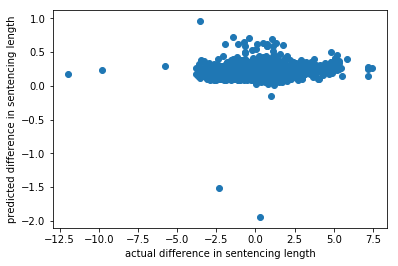

In [319]:
#prediction scatter plot
plt.scatter(predicted_df_test_y,gbr_opt_pred_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

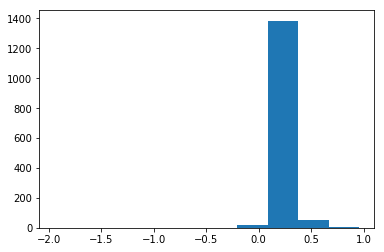

In [320]:
#hist
plt.hist(gbr_opt_pred_r2_pred)
plt.show()

In [321]:
np.std(gbr_opt_pred_r2_pred)

0.11197159710645756

In [322]:
np.mean(gbr_opt_pred_r2_pred)

0.2355187290866336

In [323]:
print(gbr_opt_pred_r2score)

0.0051097206705761344


In [324]:
print(mean_squared_error(predicted_df_test_y,gbr_opt_pred_r2_pred))

3.229564541821747


In [325]:
print(mean_absolute_error(predicted_df_test_y,gbr_opt_pred_r2_pred))

1.356848131009421


## doc2vec 10

In [202]:
inference_data10 = pd.read_csv('bio_txt_10.csv')

In [203]:
inference_data10.columns.values

array(['Unnamed: 0', 'index', 'x_dem_dm', 'x_republican_dm',
       'x_instate_ba_dm', 'x_elev_dm', 'x_unity_dm', 'x_aba_dm',
       'x_crossa_dm', 'x_pfedjdge_dm', 'x_pindreg1_dm', 'x_plawprof_dm',
       'x_pscab_dm', 'x_pcab_dm', 'x_pusa_dm', 'x_pssenate_dm',
       'x_paag_dm', 'x_psp_dm', 'x_pslc_dm', 'x_pssc_dm', 'x_pshouse_dm',
       'x_psg_dm', 'x_psgo_dm', 'x_psenate_dm', 'x_psatty_dm',
       'x_pprivate_dm', 'x_pmayor_dm', 'x_plocct_dm', 'x_phouse_dm',
       'x_pgov_dm', 'x_pda_dm', 'x_pcc_dm', 'x_pccoun_dm', 'x_pausa_dm',
       'x_pasatty_dm', 'x_pag_dm', 'x_pada_dm', 'x_pgovt_dm',
       'x_llm_sjd_dm', 'x_protestant_dm', 'x_evangelical_dm',
       'x_mainline_dm', 'x_noreligion_dm', 'x_catholic_dm', 'x_jewish_dm',
       'x_black_dm', 'x_nonwhite_dm', 'x_female_dm', 'x_jd_public_dm',
       'x_ba_public_dm', 'x_b10s_dm', 'x_b20s_dm', 'x_b30s_dm',
       'x_b40s_dm', 'x_b50s_dm', 'x_pbank_dm', 'x_pmag_dm',
       'x_ageon40s_dm', 'x_ageon50s_dm', 'x_ageon60s_dm',
      

In [204]:
true_df = inference_data10[['index', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', 'res', 'length_3m_dif']]

In [205]:
predicted_df = inference_data10[['index', '1_hat', '2_hat', '3_hat',
       '4_hat', '5_hat', '6_hat', '7_hat', '8_hat', '9_hat', '10_hat',
       'res','length_3m_dif']]

In [206]:
predicted_df = predicted_df.drop(['index'],axis=1)
true_df = true_df.drop(['index'],axis=1)

In [207]:
#prepare data:
np.random.seed(2)
msk = np.random.rand(7388) < 0.8

predicted_df_x = predicted_df.iloc[:,:-1]
predicted_df_y = predicted_df.iloc[:,-1]

predicted_df_train_x = predicted_df_x[msk]
predicted_df_test_x = predicted_df_x[~msk]

predicted_df_train_y = predicted_df_y[msk]
predicted_df_test_y = predicted_df_y[~msk]


true_df_x = true_df.iloc[:,:-1]
true_df_y = true_df.iloc[:,-1]

true_df_train_x = true_df_x[msk]
true_df_test_x = true_df_x[~msk]

true_df_train_y = true_df_y[msk]
true_df_test_y = true_df_y[~msk]

In [208]:
msk

array([ True,  True,  True, ..., False,  True, False])

In [209]:
#random forest regressor:

In [210]:
predicted_df_train_x.head()

1_hat     2_hat     3_hat     4_hat     5_hat     6_hat     7_hat  \
0  0.614546  1.451421 -0.372001 -0.454239  0.283505 -0.482936  1.687319   
1  0.790374  1.704064 -0.479346 -0.458057  0.293395 -0.554319  2.047174   
2  0.790374  1.704064 -0.479346 -0.458057  0.293395 -0.554319  2.047174   
3  0.734731  1.795475 -0.433799 -0.500703  0.344791 -0.556112  2.087511   
4  0.824737  1.789501 -0.490336 -0.482083  0.327905 -0.598364  2.078187   

      8_hat     9_hat    10_hat  res  
0 -0.363259 -1.937866  1.170908    1  
1 -0.384036 -2.263060  1.322191    1  
2 -0.384036 -2.263060  1.322191    2  
3 -0.437217 -2.332205  1.455578    1  
4 -0.515528 -2.359429  1.438902    1

In [211]:
predicted_df_test_x.head()

1_hat     2_hat     3_hat     4_hat     5_hat     6_hat     7_hat  \
16  0.757459  1.755861 -0.476695 -0.513702  0.306855 -0.626891  2.363928   
18  0.839552  1.696651 -0.433076 -0.457375  0.336391 -0.514216  2.014090   
40  0.735775  1.648978 -0.442140 -0.491782  0.391397 -0.784868  2.215249   
42  0.734979  1.667354 -0.416358 -0.545949  0.333714 -0.748242  1.997791   
49  0.774136  1.616837 -0.398153 -0.474144  0.308696 -0.590901  2.045102   

       8_hat     9_hat    10_hat  res  
16 -0.378912 -2.647471  1.581580    1  
18 -0.393937 -2.305430  1.274129    1  
40 -0.464571 -2.339140  1.458761    1  
42 -0.422668 -2.282826  1.481269    1  
49 -0.348977 -2.331122  1.351439    1

In [214]:
#predicted values R2 score
rfr_predicted_r2 = RandomForestRegressor(n_estimators=1000, random_state = 1)
rfr_predicted_r2.fit(predicted_df_train_x, predicted_df_train_y)
rfr_predicted_r2_pred = rfr_predicted_r2.predict(predicted_df_test_x)

rfr_predicted_r2score = r2_score(predicted_df_test_y,rfr_predicted_r2_pred)

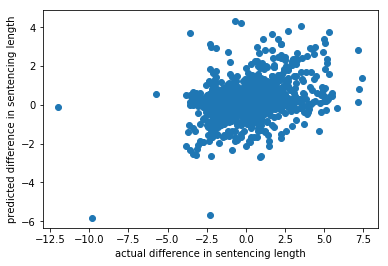

In [215]:
#prediction scatter plot
plt.scatter(predicted_df_test_y,rfr_predicted_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

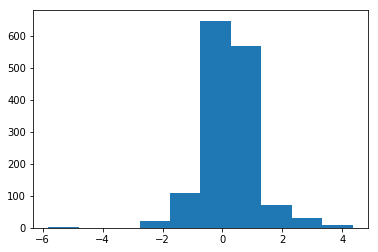

In [216]:
#hist
plt.hist(rfr_predicted_r2_pred)
plt.show()

In [217]:
np.std(rfr_predicted_r2_pred)

0.8618209160515199

In [218]:
np.mean(rfr_predicted_r2_pred)

0.2607641595500187

In [219]:
print('mean squared error is {}'.format(mean_squared_error(predicted_df_test_y, rfr_predicted_r2_pred)))
print('mean absolute error is {}'.format(mean_absolute_error(predicted_df_test_y, rfr_predicted_r2_pred)))

mean squared error is 2.962113183796434
mean absolute error is 1.2812856575613107


In [220]:
print(rfr_predicted_r2score)

0.08750000977832784


In [221]:
#True values R2 score
rfr_true_r2 = RandomForestRegressor(n_estimators=1000, random_state=2)
rfr_true_r2.fit(true_df_train_x, true_df_train_y)
rfr_true_r2_pred = rfr_true_r2.predict(true_df_test_x)

rfr_true_r2score = r2_score(true_df_test_y,rfr_true_r2_pred)

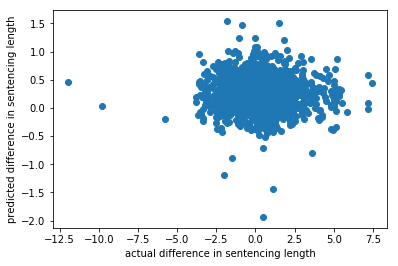

In [222]:
#prediction scatter plot
plt.scatter(true_df_test_y,rfr_true_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

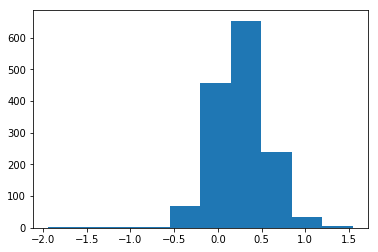

In [223]:
#hist
plt.hist(rfr_true_r2_pred)
plt.show()

In [224]:
print('mean squared error is {}'.format(mean_squared_error(true_df_test_y, rfr_true_r2_pred)))
print('mean absolute error is {}'.format(mean_absolute_error(true_df_test_y, rfr_true_r2_pred)))

mean squared error is 3.3475065844063563
mean absolute error is 1.3868865990650046


In [225]:
print(rfr_true_r2score)

-0.03122316265538938


In [276]:
#Linear regression

In [226]:
#predicted value R2 score
lr_predicted_r2= linear_model.LinearRegression()
lr_predicted_r2.fit(predicted_df_train_x, predicted_df_train_y)
lr_predicted_r2_pred = lr_predicted_r2.predict(predicted_df_test_x)

lr_predicted_r2score = r2_score(predicted_df_test_y,lr_predicted_r2_pred)

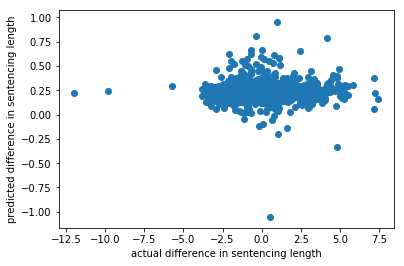

In [227]:
#prediction scatter plot
plt.scatter(predicted_df_test_y,lr_predicted_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

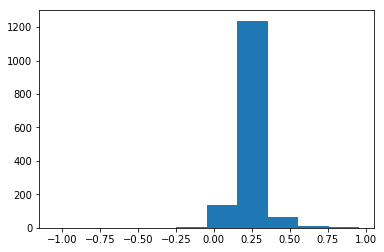

In [228]:
#hist
plt.hist(lr_predicted_r2_pred)
plt.show()

In [229]:
np.std(lr_predicted_r2_pred)

0.09151521954016589

In [230]:
np.mean(lr_predicted_r2_pred)

0.23437114168341536

In [231]:
print('mean squared error is {}'.format(mean_squared_error(predicted_df_test_y, lr_predicted_r2_pred)))
print('mean absolute error is {}'.format(mean_absolute_error(predicted_df_test_y, lr_predicted_r2_pred)))

mean squared error is 3.2546572779699714
mean absolute error is 1.3622956647185889


In [232]:
print(lr_predicted_r2score)

-0.002620274798585287


In [233]:
#True values R2 score
lr_true_r2= linear_model.LinearRegression()
lr_true_r2.fit(true_df_train_x, true_df_train_y)
lr_true_r2_pred = lr_true_r2.predict(true_df_test_x)

lr_true_r2score = r2_score(true_df_test_y,lr_true_r2_pred)

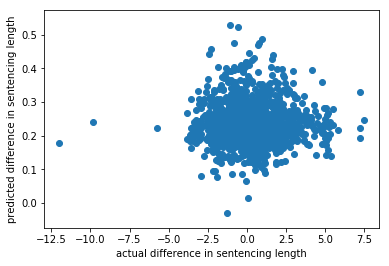

In [234]:
#prediction scatter plot
plt.scatter(true_df_test_y,lr_true_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

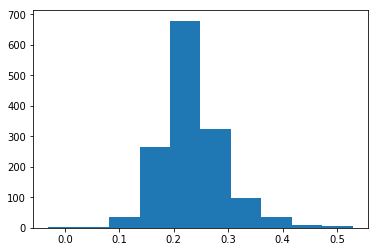

In [235]:
#hist
plt.hist(lr_true_r2_pred)
plt.show()

In [236]:
np.std(lr_true_r2_pred)

0.058901849100230864

In [237]:
np.mean(lr_true_r2_pred)

0.2336069354632672

In [238]:
print('mean squared error is {}'.format(mean_squared_error(predicted_df_test_y, lr_true_r2_pred)))
print('mean absolute error is {}'.format(mean_absolute_error(predicted_df_test_y, lr_true_r2_pred)))

mean squared error is 3.248954433584746
mean absolute error is 1.3603172618458288


In [239]:
print(lr_true_r2score)

-0.0008634731090952918


In [283]:
#Gradient boosting regressor

In [246]:
%%time
gbr = GradientBoostingRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
gbr_cv = GridSearchCV(gbr, parameters)
gbr_cv.fit(true_df_train_x, true_df_train_y)


CPU times: user 47.1 s, sys: 116 ms, total: 47.2 s
Wall time: 47.8 s


In [247]:
gbr_cv.best_params_

{'max_depth': 2, 'max_features': 'auto', 'n_estimators': 10}

In [248]:
#True value R2 score
gbr_opt_true_r2 = GradientBoostingRegressor(max_depth= 2, max_features='auto', n_estimators= 10, random_state=1)
gbr_opt_true_r2.fit(true_df_train_x, true_df_train_y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=1, subsample=1.0, verbose=0, warm_start=False)

In [249]:
#save the model
joblib.dump(gbr_opt_true_r2,'2ndStage_gbr_doc2vec10')

['2ndStage_gbr_doc2vec10']

In [291]:
#load back the model
gbr_opt_true_r2 = joblib.load('2ndStage_gbr_doc2vec10')

In [292]:
gbr_opt_true_r2_pred = gbr_opt_true_r2.predict(true_df_test_x)
gbr_opt_true_r2score = r2_score(true_df_test_y,gbr_opt_true_r2_pred)

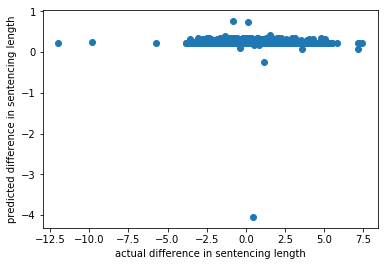

In [293]:
#prediction scatter plot
plt.scatter(true_df_test_y,gbr_opt_true_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

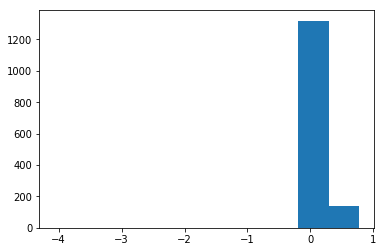

In [294]:
#hist
plt.hist(gbr_opt_true_r2_pred)
plt.show()

In [295]:
np.std(gbr_opt_true_r2_pred)

0.11901837182707178

In [296]:
np.mean(gbr_opt_true_r2_pred)

0.23186298579653566

In [297]:
print(mean_squared_error(true_df_test_y,gbr_opt_true_r2_pred))

3.2662135078772665


In [298]:
print(mean_absolute_error(true_df_test_y,gbr_opt_true_r2_pred))

1.363027165970799


In [299]:
print(gbr_opt_true_r2score)

-0.0061802534432537914


In [442]:
#predicted value R2 score

In [271]:
%%time
gbr = GradientBoostingRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
gbr_cv = GridSearchCV(gbr, parameters)
gbr_cv.fit(predicted_df_train_x, predicted_df_train_y)


CPU times: user 43.6 s, sys: 120 ms, total: 43.7 s
Wall time: 44.3 s


In [272]:
gbr_cv.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}

In [262]:
#predicted value R2 score
gbr_opt_pred_r2 = GradientBoostingRegressor(max_depth= 3, max_features='sqrt', n_estimators= 10)
gbr_opt_pred_r2.fit(predicted_df_train_x, predicted_df_train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [281]:
#save the model
joblib.dump(gbr_opt_pred_r2,'2ndStage_gbr_doc2vec10_predicted')

['2ndStage_gbr_doc2vec10_predicted']

In [282]:
#load back the model
gbr_opt_pred_r2 = joblib.load('2ndStage_gbr_doc2vec10_predicted')

In [283]:
gbr_opt_pred_r2_pred = gbr_opt_pred_r2.predict(predicted_df_test_x)
gbr_opt_pred_r2score = r2_score(predicted_df_test_y,gbr_opt_pred_r2_pred)

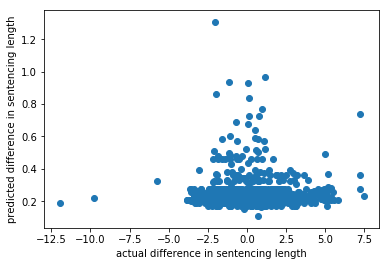

In [284]:
#prediction scatter plot
plt.scatter(predicted_df_test_y,gbr_opt_pred_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

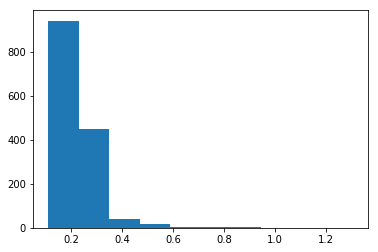

In [285]:
#hist
plt.hist(gbr_opt_pred_r2_pred)
plt.show()

In [286]:
np.std(gbr_opt_pred_r2_pred)

0.07879699795371588

In [287]:
np.mean(gbr_opt_pred_r2_pred)

0.2380829903662961

In [288]:
print(gbr_opt_pred_r2score)

-0.0017049015525947286


In [289]:
print(mean_squared_error(predicted_df_test_y,gbr_opt_pred_r2_pred))

3.25168583776274


In [290]:
print(mean_absolute_error(predicted_df_test_y,gbr_opt_pred_r2_pred))

1.3614947482747284


## svd25

In [326]:
inference_data = pd.read_csv('bio_txt.csv')

In [327]:
inference_data.columns.values

array(['Unnamed: 0', 'index', 'x_dem', 'x_republican', 'x_instate_ba',
       'x_elev', 'x_unity', 'x_aba', 'x_crossa', 'x_pfedjdge',
       'x_pindreg1', 'x_plawprof', 'x_pscab', 'x_pcab', 'x_pusa',
       'x_pssenate', 'x_paag', 'x_psp', 'x_pslc', 'x_pssc', 'x_pshouse',
       'x_psg', 'x_psgo', 'x_psenate', 'x_psatty', 'x_pprivate',
       'x_pmayor', 'x_plocct', 'x_phouse', 'x_pgov', 'x_pda', 'x_pcc',
       'x_pccoun', 'x_pausa', 'x_pasatty', 'x_pag', 'x_pada', 'x_pgovt',
       'x_llm_sjd', 'x_protestant', 'x_evangelical', 'x_mainline',
       'x_noreligion', 'x_catholic', 'x_jewish', 'x_black', 'x_nonwhite',
       'x_female', 'x_jd_public', 'x_ba_public', 'x_b10s', 'x_b20s',
       'x_b30s', 'x_b40s', 'x_b50s', 'x_pbank', 'x_pmag', 'x_ageon40s',
       'x_ageon50s', 'x_ageon60s', 'x_ageon40orless', 'x_ageon70ormore',
       'x_pago', 'x_apptoter', 'x_term', 'x_hdem', 'x_hrep', 'x_sdem',
       'x_srep', 'x_hother', 'x_sother', 'x_agecommi', 'res', '0', '1',
       '2', '3', '4'

In [328]:
true_df = inference_data[['index','0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24','Res_binary', 'length_3m_dif']]

In [329]:
predicted_df = inference_data[['index', '0_hat','1_hat', '2_hat', '3_hat',
       '4_hat', '5_hat', '6_hat', '7_hat', '8_hat', '9_hat', '10_hat',
       '11_hat', '12_hat', '13_hat', '14_hat', '15_hat', '16_hat',
       '17_hat', '18_hat', '19_hat', '20_hat', '21_hat', '22_hat',
       '23_hat', '24_hat','Res_binary','length_3m_dif']]

In [330]:
predicted_df = predicted_df.drop(['index'],axis=1)
true_df = true_df.drop(['index'],axis=1)

In [331]:
#prepare data:
np.random.seed(2)
msk = np.random.rand(7388) < 0.8

predicted_df_x = predicted_df.iloc[:,:-1]
predicted_df_y = predicted_df.iloc[:,-1]

predicted_df_train_x = predicted_df_x[msk]
predicted_df_test_x = predicted_df_x[~msk]

predicted_df_train_y = predicted_df_y[msk]
predicted_df_test_y = predicted_df_y[~msk]


true_df_x = true_df.iloc[:,:-1]
true_df_y = true_df.iloc[:,-1]

true_df_train_x = true_df_x[msk]
true_df_test_x = true_df_x[~msk]

true_df_train_y = true_df_y[msk]
true_df_test_y = true_df_y[~msk]

In [332]:
#random forest regressor:

In [334]:
#predicted values R2 score
rfr_predicted_r2 = RandomForestRegressor(n_estimators=1000, random_state=1)
rfr_predicted_r2.fit(predicted_df_train_x, predicted_df_train_y)
rfr_predicted_r2_pred = rfr_predicted_r2.predict(predicted_df_test_x)

rfr_predicted_r2score = r2_score(predicted_df_test_y,rfr_predicted_r2_pred)

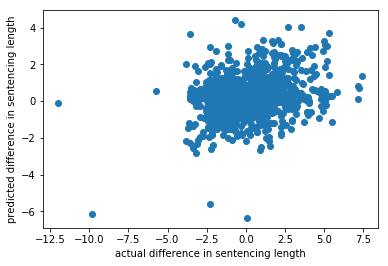

In [342]:
#prediction scatter plot
plt.scatter(predicted_df_test_y,rfr_predicted_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

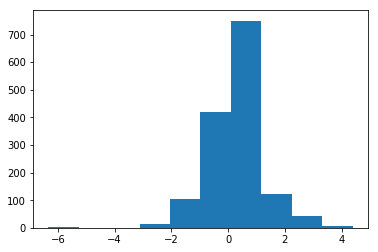

In [343]:
#hist
plt.hist(rfr_predicted_r2_pred)
plt.show()

In [344]:
np.std(rfr_predicted_r2_pred)

0.9514764604069149

In [345]:
np.mean(rfr_predicted_r2_pred)

0.26921237272837334

In [346]:
print('mean squared error is {}'.format(mean_squared_error(predicted_df_test_y, rfr_predicted_r2_pred)))
print('mean absolute error is {}'.format(mean_absolute_error(predicted_df_test_y, rfr_predicted_r2_pred)))

mean squared error is 3.211652110957351
mean absolute error is 1.3272737865653157


In [347]:
print(rfr_predicted_r2score)

0.010627772133977365


In [341]:
#True values R2 score
rfr_true_r2 = RandomForestRegressor(n_estimators=1000,random_state=1)
rfr_true_r2.fit(true_df_train_x, true_df_train_y)
rfr_true_r2_pred = rfr_true_r2.predict(true_df_test_x)

rfr_true_r2score = r2_score(true_df_test_y,rfr_true_r2_pred)

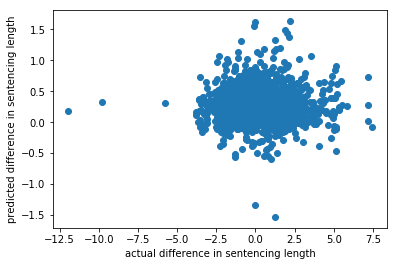

In [348]:
#prediction scatter plot
plt.scatter(true_df_test_y,rfr_true_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

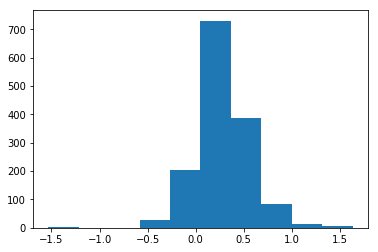

In [349]:
#hist
plt.hist(rfr_true_r2_pred)
plt.show()

In [350]:
np.std(rfr_true_r2_pred)

0.2787430450412432

In [351]:
np.mean(rfr_true_r2_pred)

0.28517288708554744

In [352]:
print('mean squared error is {}'.format(mean_squared_error(true_df_test_y, rfr_true_r2_pred)))
print('mean absolute error is {}'.format(mean_absolute_error(true_df_test_y, rfr_true_r2_pred)))

mean squared error is 3.3037157025909396
mean absolute error is 1.3712205136905675


In [353]:
print(rfr_true_r2score)

-0.01773307070112029


In [432]:
#Linear regression

In [354]:
#predicted value R2 score
lr_predicted_r2= linear_model.LinearRegression()
lr_predicted_r2.fit(predicted_df_train_x, predicted_df_train_y)
lr_predicted_r2_pred = lr_predicted_r2.predict(predicted_df_test_x)

lr_predicted_r2score = r2_score(predicted_df_test_y,lr_predicted_r2_pred)

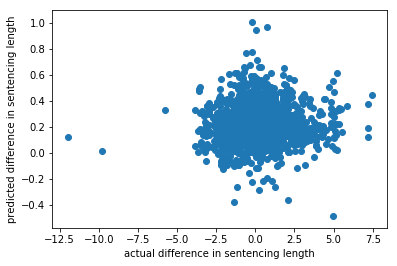

In [355]:
#prediction scatter plot
plt.scatter(predicted_df_test_y,lr_predicted_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

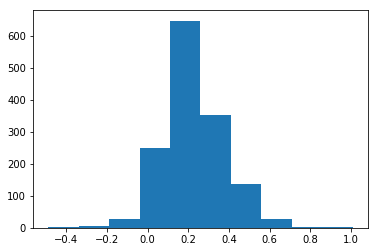

In [356]:
#hist
plt.hist(lr_predicted_r2_pred)
plt.show()

In [357]:
np.std(lr_predicted_r2_pred)

0.15191998411726207

In [358]:
np.mean(lr_predicted_r2_pred)

0.22639592692106394

In [359]:
print('mean squared error is {}'.format(mean_squared_error(predicted_df_test_y, lr_predicted_r2_pred)))
print('mean absolute error is {}'.format(mean_absolute_error(predicted_df_test_y, lr_predicted_r2_pred)))

mean squared error is 3.249919913207928
mean absolute error is 1.3659866313134417


In [360]:
print(lr_predicted_r2score)

-0.0011608959596238755


In [361]:
#True values R2 score
lr_true_r2= linear_model.LinearRegression()
lr_true_r2.fit(true_df_train_x, true_df_train_y)
lr_true_r2_pred = lr_true_r2.predict(true_df_test_x)

lr_true_r2score = r2_score(true_df_test_y,lr_true_r2_pred)

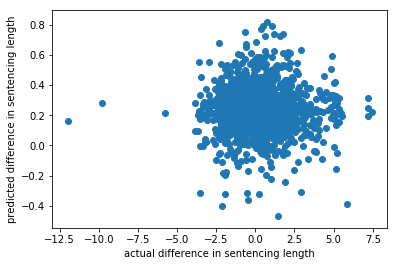

In [362]:
#prediction scatter plot
plt.scatter(true_df_test_y,lr_true_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

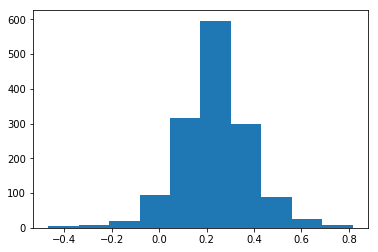

In [363]:
#hist
plt.hist(lr_true_r2_pred)
plt.show()

In [364]:
np.std(lr_true_r2_pred)

0.15180877754056235

In [365]:
np.mean(lr_true_r2_pred)

0.2366874064167864

In [366]:
#此处写mix
print('mean squared error is {}'.format(mean_squared_error(true_df_test_y, lr_true_r2_pred)))
print('mean absolute error is {}'.format(mean_absolute_error(true_df_test_y, lr_true_r2_pred)))

mean squared error is 3.2634479692996368
mean absolute error is 1.3602874733001373


In [367]:
print(lr_true_r2score)

-0.0053283096556735465


In [437]:
#Gradient boosting regressor

In [168]:
true_df_train_x.head()

0         1         2         3         4         5         6  \
0  0.140287  0.087036 -0.085699 -0.065482 -0.106237  0.015115 -0.024475   
1  0.190182  0.029736 -0.049500 -0.014207  0.226907  0.008245 -0.084914   
2  0.119560 -0.025109  0.006438 -0.007403  0.016007 -0.019776  0.026116   
3  0.140887  0.018310  0.034565 -0.016656 -0.079231 -0.017305 -0.021889   
4  0.112983 -0.040488 -0.003843  0.000338  0.011445 -0.018464  0.013634   

          7         8         9     ...            16        17        18  \
0 -0.001075 -0.004262  0.005790     ...     -0.005460 -0.063543  0.006126   
1 -0.038797  0.065706 -0.052084     ...      0.053455 -0.004037 -0.034489   
2 -0.022396 -0.004759  0.016801     ...      0.008732 -0.028321 -0.028142   
3  0.031851  0.252273  0.002998     ...      0.004668  0.015230  0.013202   
4  0.016474  0.012167 -0.015540     ...      0.002088 -0.018823  0.011427   

         19        20        21        22        23        24  Res_binary  
0  0.019510  0.120225  0.005959  0.002670  0.059737  0.002761           1  
1 -0.005308  0.036385  0.026705 -0.006951 -0.054538 -0.014368           1  
2  0.010797  0.002833 -0.004601 -0.001949 -0.008434 -0.010712           2  
3 -0.015806 -0.026787 -0.036935  0.008133 -0.032495 -0.032697           1  
4 -0.006991  0.009903 -0.012493 -0.009417 -0.001979  0.012651           1  

[5 rows x 26 columns]

In [172]:
#True value R2 score

In [369]:
%%time
gbr = GradientBoostingRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
gbr_cv = GridSearchCV(gbr, parameters)
gbr_cv.fit(true_df_train_x, true_df_train_y)


CPU times: user 1min 34s, sys: 411 ms, total: 1min 35s
Wall time: 1min 36s


In [370]:
gbr_cv.best_params_

{'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 10}

In [373]:
#predicted value R2 score
gbr_opt_true_r2 = GradientBoostingRegressor(max_depth= 3, max_features='sqrt', n_estimators= 10, random_state=1)
gbr_opt_true_r2.fit(true_df_train_x, true_df_train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [371]:
#save the model
joblib.dump(gbr_opt_true_r2,'2ndStage_gbr_svd25_true')

['2ndStage_gbr_svd25_predicted']

In [282]:
#load back the model
gbr_opt_true_r2 = joblib.load('2ndStage_gbr_svd25_true')

In [374]:
gbr_opt_true_r2_pred = gbr_opt_true_r2.predict(true_df_test_x)
gbr_opt_true_r2score = r2_score(true_df_test_y,gbr_opt_true_r2_pred)

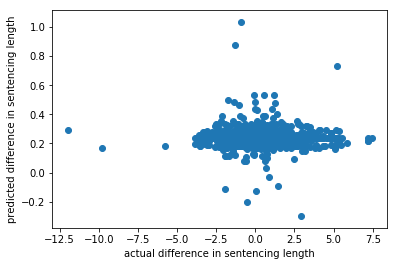

In [375]:
#prediction scatter plot
plt.scatter(true_df_test_y,gbr_opt_true_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

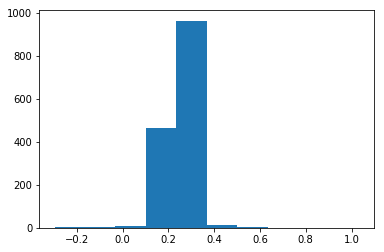

In [376]:
#hist
plt.hist(gbr_opt_true_r2_pred)
plt.show()

In [377]:
np.std(gbr_opt_true_r2_pred)

0.05723558843323142

In [378]:
np.mean(gbr_opt_true_r2_pred)

0.23802278449911024

In [380]:
print(mean_squared_error(true_df_test_y,gbr_opt_true_r2_pred))

3.2505519390383446


In [381]:
print(mean_absolute_error(true_df_test_y,gbr_opt_true_r2_pred))

1.35914135543624


In [382]:
print(gbr_opt_true_r2score)

-0.0013555960025626312


In [476]:
###GBR result is not stable too, each time run get slightly different result
#predicted value R2 score
gbr_opt_pred_r2 = GradientBoostingRegressor(max_depth= 2, max_features='log2', n_estimators= 10)
gbr_opt_pred_r2.fit(predicted_df_train_x, predicted_df_train_y)
gbr_opt_pred_r2_pred = gbr_opt_pred_r2.predict(predicted_df_test_x)

gbr_opt_pred_r2score = r2_score(predicted_df_test_y,gbr_opt_pred_r2_pred)

In [383]:
%%time
gbr = GradientBoostingRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
gbr_cv = GridSearchCV(gbr, parameters)
gbr_cv.fit(predicted_df_train_x, predicted_df_train_y)


CPU times: user 1min 27s, sys: 381 ms, total: 1min 27s
Wall time: 1min 29s


In [384]:
gbr_cv.best_params_

{'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 10}

In [385]:
#predicted value R2 score
gbr_opt_pred_r2 = GradientBoostingRegressor(max_depth= 2, max_features='sqrt', n_estimators= 10, random_state = 1)
gbr_opt_pred_r2.fit(predicted_df_train_x, predicted_df_train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=1, subsample=1.0, verbose=0, warm_start=False)

In [394]:
#save the model
joblib.dump(gbr_opt_pred_r2,'2ndStage_gbr_svd25_predicted')

['2ndStage_gbr_svd25_predicted']

In [395]:
#load back the model
gbr_opt_pred_r2 = joblib.load('2ndStage_gbr_svd25_predicted')

In [396]:
gbr_opt_pred_r2_pred = gbr_opt_pred_r2.predict(predicted_df_test_x)
gbr_opt_pred_r2score = r2_score(predicted_df_test_y,gbr_opt_pred_r2_pred)

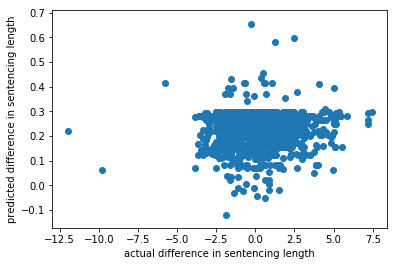

In [397]:
#prediction scatter plot
plt.scatter(predicted_df_test_y,gbr_opt_pred_r2_pred)
plt.ylabel('predicted difference in sentencing length')
plt.xlabel('actual difference in sentencing length')
plt.show()

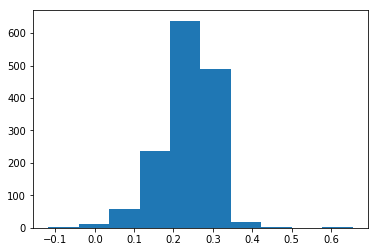

In [398]:
#hist
plt.hist(gbr_opt_pred_r2_pred)
plt.show()

In [399]:
np.std(gbr_opt_pred_r2_pred)

0.06632067832120885

In [400]:
np.mean(gbr_opt_pred_r2_pred)

0.23372933027731752

In [401]:
print(gbr_opt_pred_r2score)

0.0023314385609367605


In [402]:
print(mean_squared_error(predicted_df_test_y,gbr_opt_pred_r2_pred))

3.2385832663734804


In [403]:
print(mean_absolute_error(predicted_df_test_y,gbr_opt_pred_r2_pred))

1.3571861702057122
